

---


**IMPORTANT: Each task was performed using a separate notebook. Each notebook is now a new main heading (including setup steps) and it can be run individually.**


---



---



#  1.&nbsp;GoEmotions data analysis and visualisation


This notebook is used to get a better understanding of the data that we are dealing with.
Comparisons will be made in the report using the graphs and charts generated from this notebook.



---


#### Data Preprocessing

Loading the dataset and getting it ready to be used. The group has also decided to use the same labels and made decisions regarding merging or deleting labels. Analysis is performed both before, and after the merging of labels - however, more focus is on the dataset used by us after merging.


---



In [ ]:
# Install required packages
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from datasets import load_dataset
import pandas as pd

# load the GoEmotions dataset
goemotions_dataset = load_dataset('go_emotions')

# get the train, validation, and test splits as Pandas dataframes
train_df = goemotions_dataset['train'].to_pandas()
val_df = goemotions_dataset['validation'].to_pandas()
test_df = goemotions_dataset['test'].to_pandas()

# concatenate the splits into a single dataframe
df = pd.concat([train_df, val_df, test_df], ignore_index=True)

# duplicate the records with multiple labels
df = df.explode('labels')

# reset the index of the dataframe
df = df.reset_index(drop=True)


  0%|          | 0/3 [00:00<?, ?it/s]



---


## A. Overview of original dataset before merging labels + Class Distribution


---



---



First 5 rows of the data: 
                                                text labels       id
0  My favourite food is anything I didn't have to...     27  eebbqej
1  Now if he does off himself, everyone will thin...     27  ed00q6i
2                     WHY THE FUCK IS BAYLESS ISOING      2  eezlygj
3                        To make her feel threatened     14  ed7ypvh
4                             Dirty Southern Wankers      3  ed0bdzj

Shape of the dataset: (63812, 3)

Null values in the dataset: 
text      0
labels    0
id        0
dtype: int64

Comment 1:
 It might be linked to the trust factor of your friend.
Comment 2:
 Demographics? I don’t know anybody under 35 who has cable tv.
Comment 3:
 Aww... she'll probably come around eventually, I'm sure she was just jealous of [NAME]... I mean, what woman wouldn't be! lol 
Comment 4:
 Aww... she'll probably come around eventually, I'm sure she was just jealous of [NAME]... I mean, what woman wouldn't be! lol 
Comment 5:
 Hello everyone

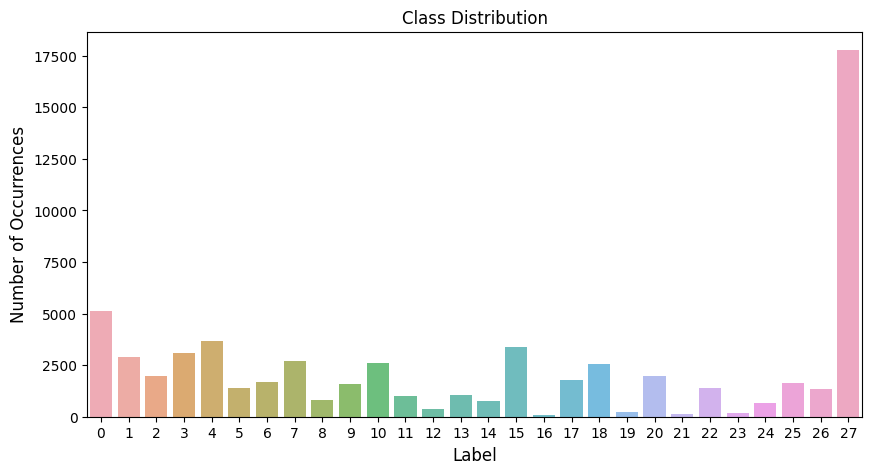

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from collections import OrderedDict

print(f'First 5 rows of the data: \n{df.head()}') # print the first five rows of the resulting dataframe
print(f'\nShape of the dataset: {df.shape}') # check the shape of dataset
print(f'\nNull values in the dataset: \n{df.isnull().sum()}\n') # check for null values

# the following code has been adapted from https://www.analyticsvidhya.com/blog/2020/04/beginners-guide-exploratory-data-analysis-text-data/
for index,text in enumerate(df['text'][10:20]):
  print('Comment %d:\n'%(index+1),text)

# Plotting the class distribution - the following code has been generated using chatGPT and changed
print('\nClass Distribution: \n')

# count instances for each 'label'
class_dist = df['labels'].value_counts()
# plot a diagram
plt.figure(figsize=(10, 5))
sns.barplot(x=class_dist.index, y=class_dist.values, alpha=0.8)
plt.title('Class Distribution')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Label', fontsize=12)
plt.show()


#### merging and deleting labels / instances

In [ ]:
from torchtext.data.functional import to_map_style_dataset

### MERGING EMOTION LABELS FROM GROUP DECISIONS ###

for i, row in df.iterrows():
  # Converting Annoyance [3] into Anger [2]
  if row['labels']==3:
    row['labels']=2
  # Disappointment [9] and Grief [16] into Sadness [25]
  if row['labels']==9 or row['labels']==16:
    row['labels']=25
  # Converting Nervousness [19] into Fear [14]
  if row['labels']==19:
    row['labels']=14
  # Converting Excitement [13] into Joy [17]
  if row['labels']==13:
    row['labels']=17

#keeps just one of the records where there are labelled with both merged classes
df = df.drop_duplicates(keep = 'first')
drop_labels = (3,11,12,9,16,19,22,26,21,13,0,23,20,5)
#drops labels we are not using
df_cut = df[~df.labels.isin(drop_labels)] 
#deletes duplicates
df_cut = df_cut.drop_duplicates(subset = ['text'], keep = False)
df_cut = df_cut.reset_index(drop = True)

### REORDERING SO THAT LABELS ARE 0-13 ###
for i, row in df_cut.iterrows():
    # Converting Neutral [27] to Neutral [0]
    if row['labels']==27:
        row['labels']=0
    # Converting Sadness [25] to Sadness [3]
    if row['labels']==25:
        row['labels']=3
    # Converting Remorse [24] to Remorse [5]
    if row['labels']==24:
        row['labels']=5
    # Converting Love [18] to Love [9]
    if row['labels']==18:
        row['labels']=9
    # Converting Fear [14] to Fear [11]
    if row['labels']==14:
        row['labels']=11
    # Converting Gratitude [15] to Gratitude [12]
    if row['labels']==15:
        row['labels']=12
    # Converting Joy [17] to Joy [13]
    if row['labels']==17:
        row['labels']=13

df = df_cut
# reset the index of the dataframe
df = df.reset_index(drop=True)


So now only the chosen labels remain and they are ordered from 0-13 (expected by pyTorch at a later stage).<br>
<br>
We also save the dataset at this point so it can be reused for the remaining experiments (which are originally carried out in separate notebooks)



---


## B. Overview of dataset after merging labels + Class Distribution


---



---



First 5 rows of the data: 
                                                text labels       id
0  My favourite food is anything I didn't have to...      0  eebbqej
1  Now if he does off himself, everyone will thin...      0  ed00q6i
2                     WHY THE FUCK IS BAYLESS ISOING      2  eezlygj
3                        To make her feel threatened     11  ed7ypvh
4                             Dirty Southern Wankers      2  ed0bdzj

Shape of the dataset: (41131, 3)

Preview of some comments: 

Comment 1:
 [NAME] - same fucking problem, slightly better command of the English language.
Comment 2:
 Shit, I guess I accidentally bought a Pay-Per-View boxing match
Comment 3:
 Thank you friend
Comment 4:
 Fucking coward.
Comment 5:
 that is what retardation looks like
Comment 6:
 Maybe that’s what happened to the great white at Houston zoo
Comment 7:
 You are going to do the dishes now
Comment 8:
 Slowing things down now
Comment 9:
 His name has already been released. Just can't post it 

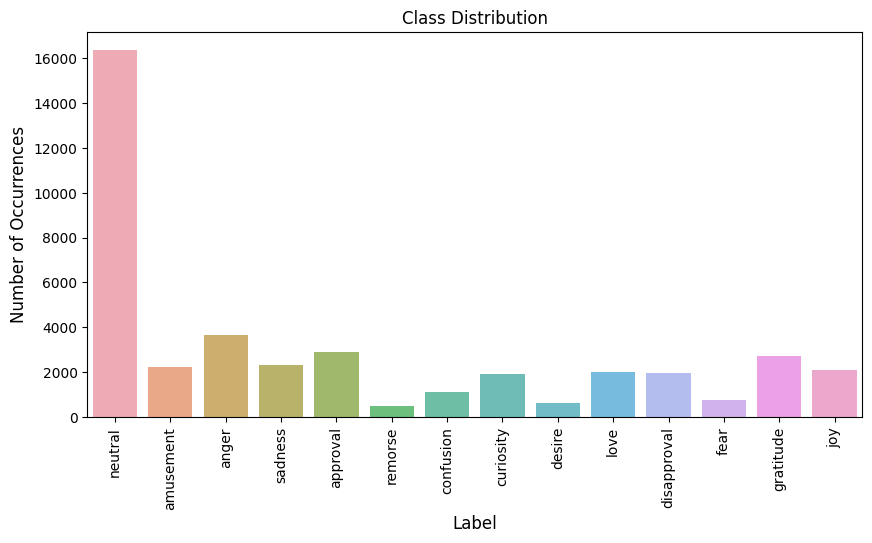


Class Distribution Values: 

neutral: 16354 instances
amusement: 2237 instances
anger: 3639 instances
sadness: 2304 instances
approval: 2898 instances
remorse: 497 instances
confusion: 1130 instances
curiosity: 1932 instances
desire: 605 instances
love: 2022 instances
disapproval: 1940 instances
fear: 758 instances
gratitude: 2741 instances
joy: 2074 instances


In [ ]:

print(f'First 5 rows of the data: \n{df.head()}') # print the first five rows of the resulting dataframe
print(f'\nShape of the dataset: {df.shape}') # check the shape of dataset

# the following code has been adapted from https://www.analyticsvidhya.com/blog/2020/04/beginners-guide-exploratory-data-analysis-text-data/
print('\nPreview of some comments: \n')
for index,text in enumerate(df['text'][10:20]):
  print('Comment %d:\n'%(index+1),text)

# Plotting the class distribution - the following code has been generated using chatGPT and changed
print('\nClass Distribution: \n')
# count instances for each 'label'
class_dist = df['labels'].value_counts()
# plot a diagram
labels = OrderedDict([("neutral", 1), ("amusement", 1), ("anger", 1), ("sadness", 1), ("approval", 1), ("remorse", 1), ("confusion", 1), ("curiosity", 1), ("desire", 1), ("love", 1), ("disapproval", 1), ("fear", 1), ("gratitude", 1), ("joy", 1)])
plt.figure(figsize=(10, 5))
sns.barplot(x=class_dist.index, y=class_dist.values, alpha=0.8)
plt.xticks(rotation=90)
plt.gca().set_xticklabels(labels)
plt.title('Class Distribution')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Label', fontsize=12)
plt.show()

# print the class distribution to get exact values
print('\nClass Distribution Values: \n')
for label, count in sorted(class_dist.items(), key=lambda x: int(x[0])):
    print(f"{list(labels.keys())[label]}: {count} instances")


Generating word clouds for each label to observe the most common words being used in reddit comments which are classified as the particular emotion. This is after we have processed the data and merged/dropped labels. It will give us a better look at whether or not the labels merging makes sense or not.

### Word Clouds for each label

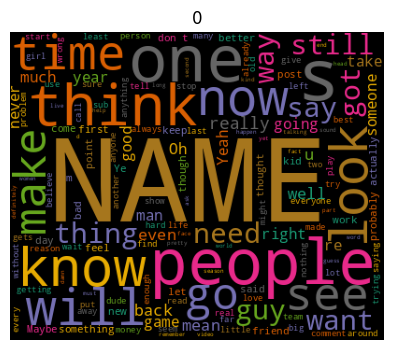

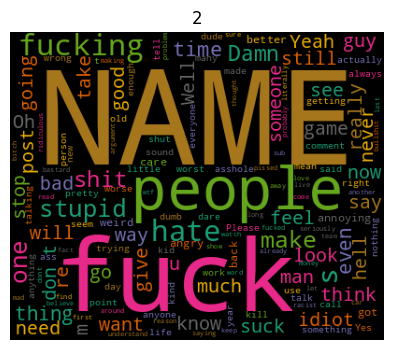

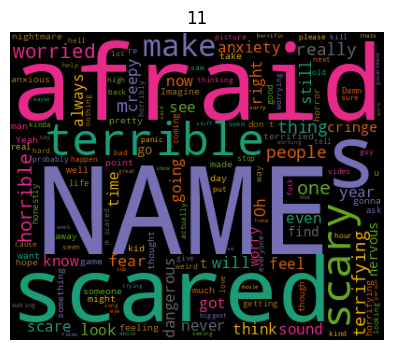

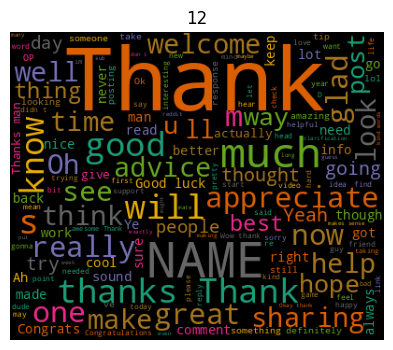

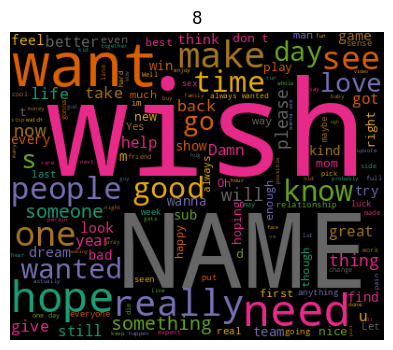

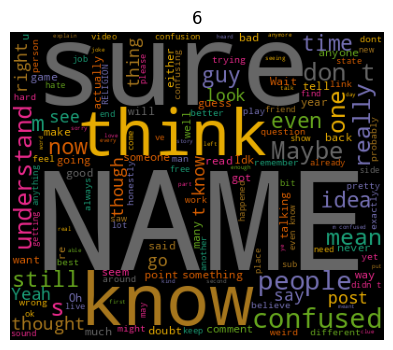

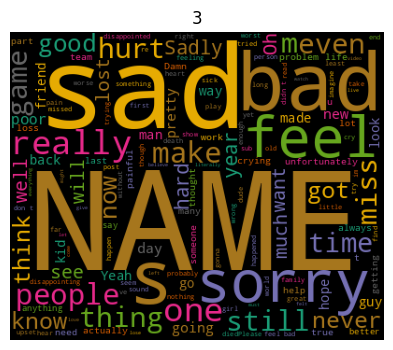

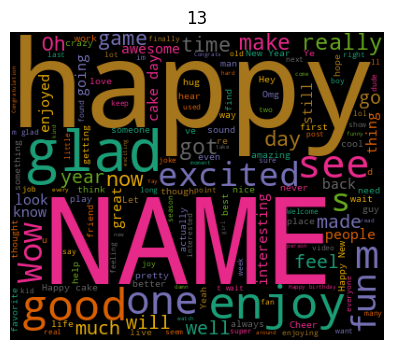

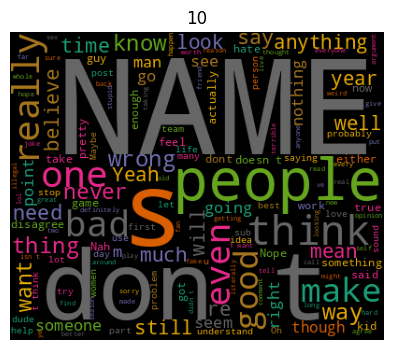

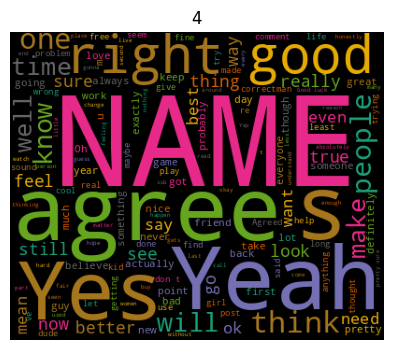

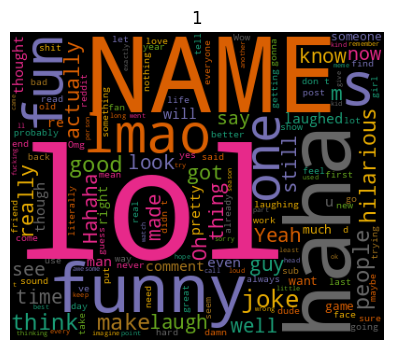

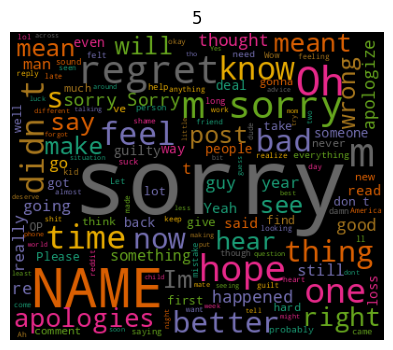

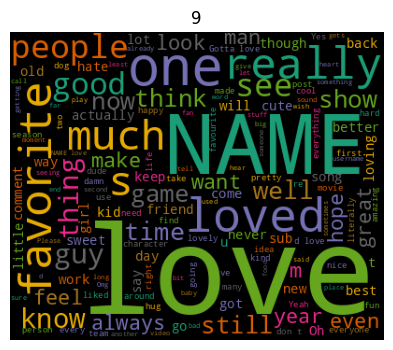

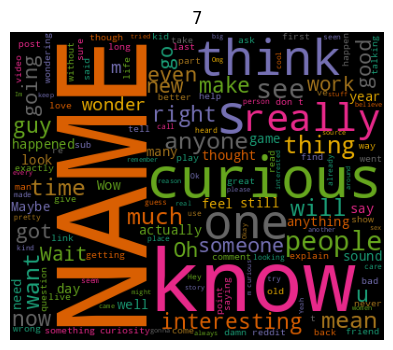

In [ ]:
# the following code has been adapted from several sources including the website mentioned above and chatGPT
# heavy debugging and a different approach was required to make it work

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a dictionary to store the text data for each label
label_text = {}
for label in df['labels'].unique():
    text = ' '.join(df[df['labels'] == label]['text'].tolist())
    label_text[label] = text

# Create a WordCloud for each label and display it
for label, text in label_text.items():
    wordcloud = WordCloud(width=400, height=330, max_words=150, colormap="Dark2").generate(text)
    plt.figure(figsize=(5, 4))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title(label)
    plt.show()
    print('\n')

### Text count by length

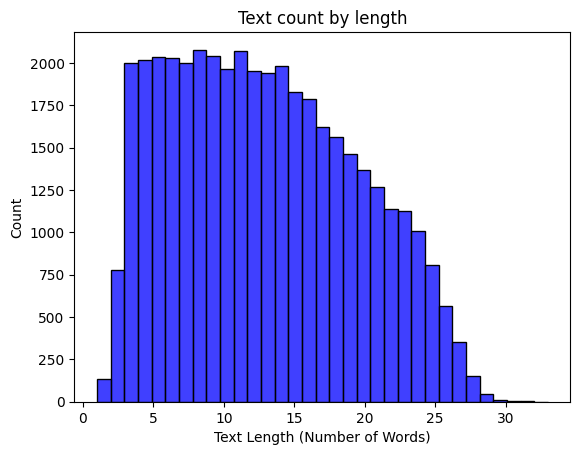

In [ ]:
# Create a list of text lengths
text_lengths = df['text'].str.split().apply(len)

# Plot histogram
sns.histplot(text_lengths, color='blue', bins=33)
plt.xlabel('Text Length (Number of Words)')
plt.ylabel('Count')
plt.title('Text count by length')
plt.show()

### Average text length by label

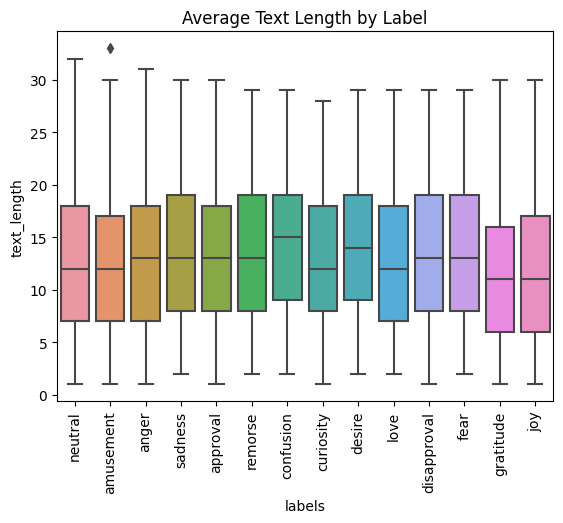

In [ ]:
# average text length for each label
df['text_length'] = df['text'].apply(lambda x: len(x.split()))
# Add labels and title
plt.xlabel('Label')
labels = OrderedDict([("neutral", 1), ("amusement", 1), ("anger", 1), ("sadness", 1), ("approval", 1), ("remorse", 1), ("confusion", 1), ("curiosity", 1), ("desire", 1), ("love", 1), ("disapproval", 1), ("fear", 1), ("gratitude", 1), ("joy", 1)])
plt.ylabel('Text Length')
plt.title('Average Text Length by Label')
# Create boxplot
sns.boxplot(x='labels', y='text_length', data=df)
plt.xticks(rotation=90)
plt.gca().set_xticklabels(labels)
plt.show()


### n-grams

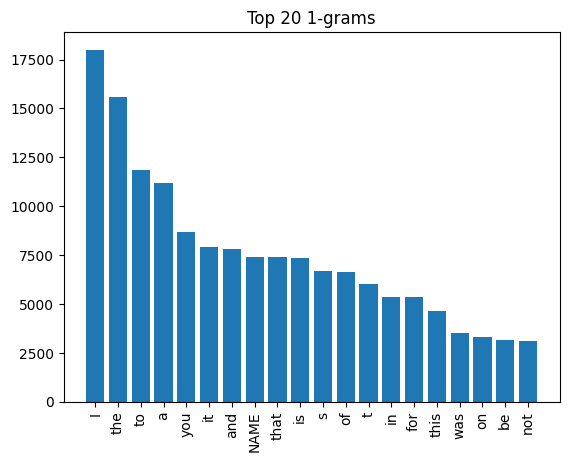

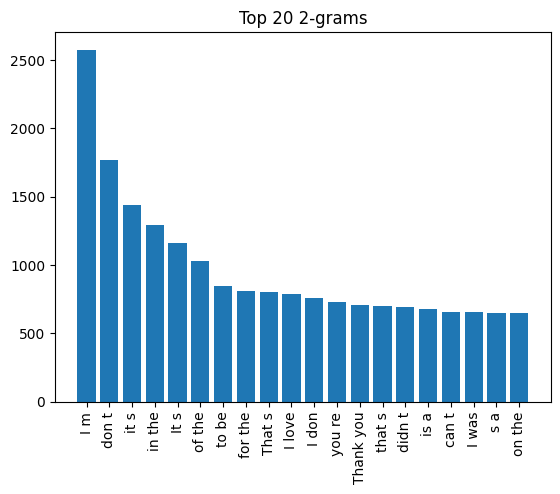

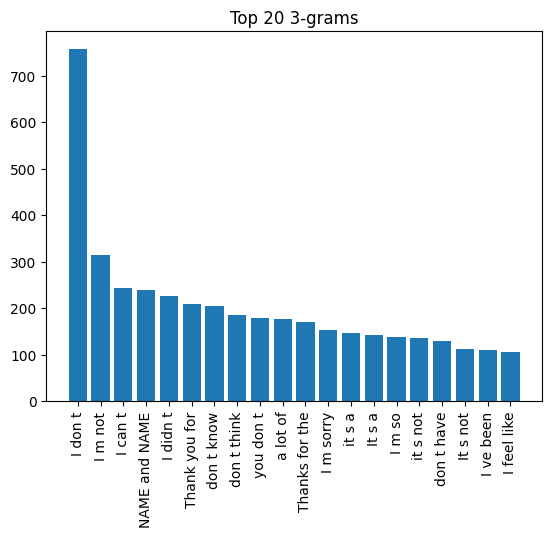

In [ ]:
# used chatGPT, Lab 1, and https://towardsdatascience.com/a-complete-exploratory-data-analysis-and-visualization-for-text-data-29fb1b96fb6a
# all above sources were only used as reference and I had to debug and implement most of it 

import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import RegexpTokenizer
from nltk.util import ngrams
from collections import Counter

# Load dataframe
df2 = df
# Tokenize the text column
tokenizer = RegexpTokenizer(r"\w+")
df2['tokens'] = df2['text'].apply(tokenizer.tokenize)

# define a function to plot ngrams frequency distribution based on entered 'n' value
def plotngrams(n):
  # Generate n-grams
  ngrams_list = []
  for tokens in df2['tokens']:
      ngrams_list += list(ngrams(tokens, n))
      
  # Get the most common n-grams
  top_ngrams = Counter(ngrams_list).most_common(20)

  # Convert n-grams to strings
  top_ngrams_str = [' '.join(ng) for ng, count in top_ngrams]

  # Create plot of top n most common n-grams
  plt.bar(range(len(top_ngrams_str)), [count for ng, count in top_ngrams], tick_label=top_ngrams_str)
  plt.xticks(rotation=90)
  plt.title(f"Top 20 {n}-grams")
  plt.show()
  print('\n')

plotngrams(1)
plotngrams(2)
plotngrams(3)



---



---



---



#### Splitting the dataset into train-test-val

We will now check if the training dataset reflects the characterisitcs of the main dataset

In [ ]:
# splitting the dataset into test-train-valid subsets
from torch.utils.data import random_split

# convert dataframe to list
text = df[['text','labels']].values.tolist()

# convert the dataset into a "map-style dataset"
data = to_map_style_dataset(text)

split_ratio = 0.7  # 70/30 split

# split dataset into train and test sets
train_samples = int(split_ratio * len(data))
test_samples = len(data) - train_samples
train_data, test_data = random_split(data, [train_samples, test_samples])

# split train subset into train and validation sets
train_samples = int(split_ratio * len(train_data))
valid_samples = len(train_data) - train_samples
train_data, valid_data = random_split(train_data, [train_samples, valid_samples])

print(f'Number of training examples: {len(train_data)}')
print(f'Number of validation examples: {len(valid_data)}')
print(f'Number of testing examples: {len(test_data)}')

Number of training examples: 20153
Number of validation examples: 8638
Number of testing examples: 12340


In [ ]:
# convert back to a df after splitting the dataset
text = [row[0] for row in train_data]
labels = [row[1] for row in train_data]
train_df = pd.DataFrame({'text': text, 'labels': labels})

---
## C. Overview of training dataset + Class Distribution
---

First 5 rows of the data: 
                                                text  labels
0  All the time here! Say have kid an ex wife and...       0
1  Someone who seems great while texting might no...      10
2  For most people after 4 to 5 hours it gets up ...       4
3  Oh certainly this winter has been mild. It jus...       0
4  For games starting at 7, the bus was leaving t...       0

Shape of the dataset: (20153, 2)

Preview of some comments: 

Comment 1:
 Good luck! It's a long road ahead for us :P i have a job interview next week and i'm going all in for it.
Comment 2:
 Those Boys risked their lives for a strong independent woman.
Comment 3:
 How? That’s silly. Clearly Lowries impact is higher.
Comment 4:
 Real lpt always in the comments
Comment 5:
 He happily accepts the hugs. He hugs me now and again. He also has no problem accepting hugs from his mum.
Comment 6:
 Some reasonable Seahawks fans credit him with [NAME] development.
Comment 7:
 She's going to OD without a clue t

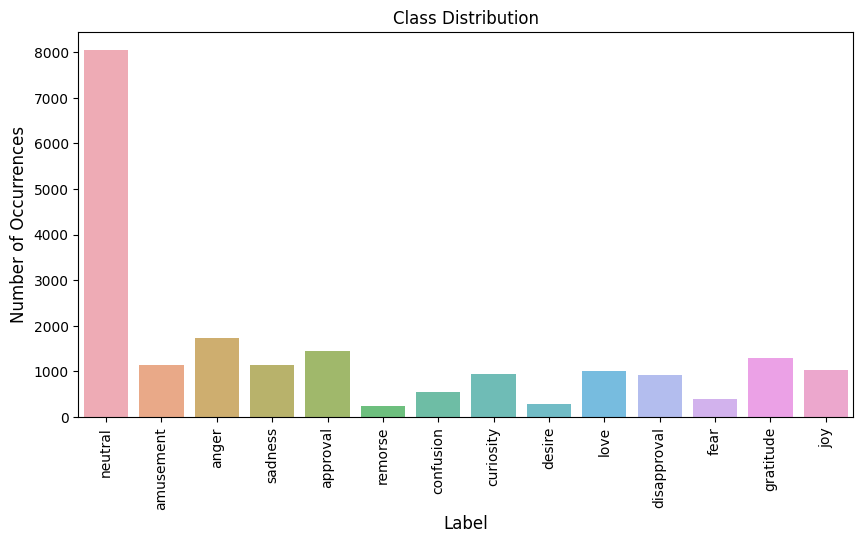


Class Distribution Values: 

neutral: 8039 instances
amusement: 1137 instances
anger: 1737 instances
sadness: 1132 instances
approval: 1437 instances
remorse: 242 instances
confusion: 553 instances
curiosity: 946 instances
desire: 285 instances
love: 1012 instances
disapproval: 923 instances
fear: 384 instances
gratitude: 1297 instances
joy: 1029 instances


In [ ]:

print(f'First 5 rows of the data: \n{train_df.head()}') # print the first five rows of the resulting dataframe
print(f'\nShape of the dataset: {train_df.shape}') # check the shape of dataset

# the following code has been adapted from https://www.analyticsvidhya.com/blog/2020/04/beginners-guide-exploratory-data-analysis-text-data/
print('\nPreview of some comments: \n')
for index,text in enumerate(train_df['text'][10:20]):
  print('Comment %d:\n'%(index+1),text)

# Plotting the class distribution - the following code has been generated using chatGPT and changed
print('\nClass Distribution: \n')
# count instances for each 'label'
class_dist = train_df['labels'].value_counts()
# plot a diagram
labels = OrderedDict([("neutral", 1), ("amusement", 1), ("anger", 1), ("sadness", 1), ("approval", 1), ("remorse", 1), ("confusion", 1), ("curiosity", 1), ("desire", 1), ("love", 1), ("disapproval", 1), ("fear", 1), ("gratitude", 1), ("joy", 1)])
plt.figure(figsize=(10, 5))
sns.barplot(x=class_dist.index, y=class_dist.values, alpha=0.8)
plt.xticks(rotation=90)
plt.gca().set_xticklabels(labels)
plt.title('Class Distribution')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Label', fontsize=12)
plt.show()

# print the class distribution to get exact values
print('\nClass Distribution Values: \n')
for label, count in sorted(class_dist.items(), key=lambda x: int(x[0])):
    print(f"{list(labels.keys())[label]}: {count} instances")


### Text count by length

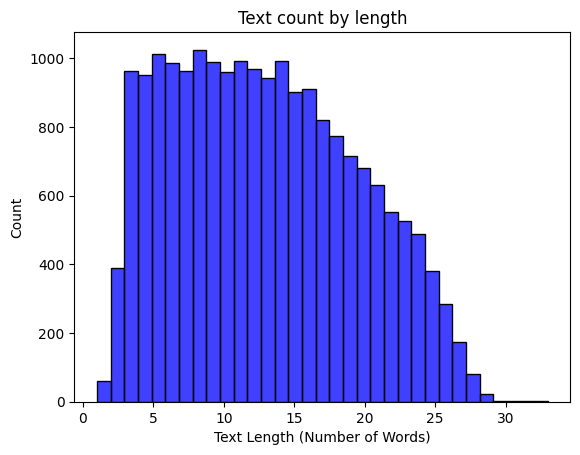

In [ ]:
# Create a list of text lengths
text_lengths = train_df['text'].str.split().apply(len)

# Plot histogram
sns.histplot(text_lengths, color='blue', bins=33)
plt.xlabel('Text Length (Number of Words)')
plt.ylabel('Count')
plt.title('Text count by length')
plt.show()

### Average text length by label

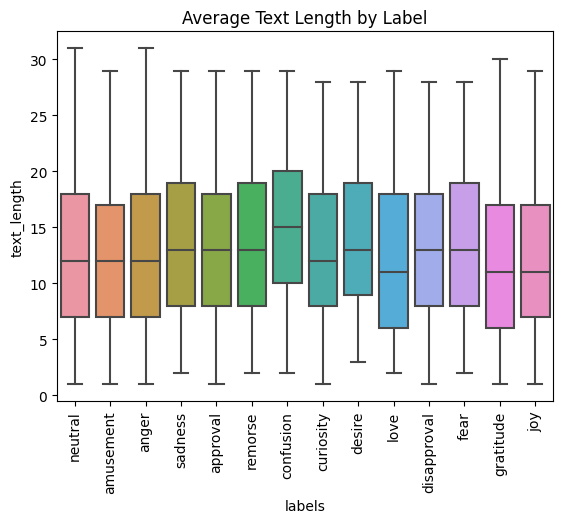

In [ ]:
# average text length for each label
train_df['text_length'] = train_df['text'].apply(lambda x: len(x.split()))
# Add labels and title
plt.xlabel('Label')
labels = OrderedDict([("neutral", 1), ("amusement", 1), ("anger", 1), ("sadness", 1), ("approval", 1), ("remorse", 1), ("confusion", 1), ("curiosity", 1), ("desire", 1), ("love", 1), ("disapproval", 1), ("fear", 1), ("gratitude", 1), ("joy", 1)])
plt.ylabel('Text Length')
plt.title('Average Text Length by Label')
# Create boxplot
sns.boxplot(x='labels', y='text_length', data=train_df)
plt.xticks(rotation=90)
plt.gca().set_xticklabels(labels)
plt.show()




---



---



---

Thus, we now have a better idea of the dataset and how it has been modified for this project



---



---



---

# 2.&nbsp;GoEmotions Initial Experimentation
In this notebook, some initial experimentation is carried out to determine feasible values for various parameters in the pipeline. This is additional to the 4 experiments

### Set up steps for notebook
Required packages and dependencies are installed with compatible versions and the notebook is set up to use GPU when available.

In [ ]:
# Install datasets
!pip install datasets

# Install dependencies
%pip install torch==1.11.0+cu113 torchdata==0.3.0 torchtext==0.12.0 -f https://download.pytorch.org/whl/cu113/torch_stable.html
%pip install spacy tqdm
!python -m spacy download en_core_web_sm

# Initialise torch and use GPU
import torch
import torchtext

SEED = 1234
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

print("PyTorch Version: ", torch.__version__)
print("torchtext Version: ", torchtext.__version__)
print(f"Using {'GPU' if str(DEVICE) == 'cuda' else 'CPU'}.")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 KB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 KB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 1.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/cu113/torch_stable.html


Use this cell to mount your Google Drive on the notebook. Some files in the zip folder are used to reduce repeating of some setup steps.

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive




---



---



---

## 2.1 Baseline Experiment using default parameters 



---


### Data Preprocessing


---



Converting the dataset to a dataframe and **duplicating any records that have multiple labels** so that each datapoint has 1 label.

In [ ]:
from datasets import load_dataset
import pandas as pd

# load the GoEmotions dataset
goemotions_dataset = load_dataset('go_emotions')

# get the train, validation, and test splits as Pandas dataframes
train_df = goemotions_dataset['train'].to_pandas()
val_df = goemotions_dataset['validation'].to_pandas()
test_df = goemotions_dataset['test'].to_pandas()

# concatenate the splits into a single dataframe
df = pd.concat([train_df, val_df, test_df], ignore_index=True)

# duplicate the records with multiple labels
df = df.explode('labels')

# reset the index of the dataframe
df = df.reset_index(drop=True)

# print the first five rows of the resulting dataframe
print(df.head())


Generating train split:   0%|          | 0/43410 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/5426 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5427 [00:00<?, ? examples/s]

Dataset go_emotions downloaded and prepared to /root/.cache/huggingface/datasets/go_emotions/simplified/0.0.0/2637cfdd4e64d30249c3ed2150fa2b9d279766bfcd6a809b9f085c61a90d776d. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

                                                text labels       id
0  My favourite food is anything I didn't have to...     27  eebbqej
1  Now if he does off himself, everyone will thin...     27  ed00q6i
2                     WHY THE FUCK IS BAYLESS ISOING      2  eezlygj
3                        To make her feel threatened     14  ed7ypvh
4                             Dirty Southern Wankers      3  ed0bdzj


Merging some of the labels according to published academic research relating emotions to one another and as per the correlation values of the labels in the original dataset. Dropping the remaining instances where labels are not used. Also dropping instances where text is repeated with different label values.<br>
Also converting to a map-style dataset as pytorch provides the data in an iterable-style format. This needs to be done for further processing and using the data.

In [ ]:
from torchtext.data.functional import to_map_style_dataset

### MERGING EMOTION LABELS FROM GROUP DECISIONS ###

for i, row in df.iterrows():
  # Converting Annoyance [3] into Anger [2]
  if row['labels']==3:
    row['labels']=2
  # Disappointment [9] and Grief [16] into Sadness [25]
  if row['labels']==9 or row['labels']==16:
    row['labels']=25
  # Converting Nervousness [19] into Fear [14]
  if row['labels']==19:
    row['labels']=14
  # Converting Excitement [13] into Joy [17]
  if row['labels']==13:
    row['labels']=17

#keeps just one of the records where there are labelled with both merged classes
df = df.drop_duplicates(keep = 'first')
drop_labels = (3,11,12,9,16,19,22,26,21,13,0,23,20,5)
#drops labels we are not using
df_cut = df[~df.labels.isin(drop_labels)] 
#deletes duplicates
df_cut = df_cut.drop_duplicates(subset = ['text'], keep = False)
df_cut = df_cut.reset_index(drop = True)

### REORDERING SO THAT LABELS ARE 0-13 ###
for i, row in df_cut.iterrows():
    # Converting Neutral [27] to Neutral [0]
    if row['labels']==27:
        row['labels']=0
    # Converting Sadness [25] to Sadness [3]
    if row['labels']==25:
        row['labels']=3
    # Converting Remorse [24] to Remorse [5]
    if row['labels']==24:
        row['labels']=5
    # Converting Love [18] to Love [9]
    if row['labels']==18:
        row['labels']=9
    # Converting Fear [14] to Fear [11]
    if row['labels']==14:
        row['labels']=11
    # Converting Gratitude [15] to Gratitude [12]
    if row['labels']==15:
        row['labels']=12
    # Converting Joy [17] to Joy [13]
    if row['labels']==17:
        row['labels']=13

df = df_cut
# reset the index of the dataframe
df = df.reset_index(drop=True)
df.head()

# convert dataframe to list
text = df[['text','labels']].values.tolist()

# convert the dataset into a "map-style dataset"
data = to_map_style_dataset(text)

So now only the chosen labels remain and they are ordered from 0-13 (expected by pyTorch at a later stage).<br>
<br>
We also save the dataset at this point so it can be reused for the remaining experiments (which may be in a different notebook)

In [ ]:
# if __name__ == '__main__':
#   torch.save(text, "preprocessed_data_1.pt")

In [ ]:
# text = torch.load("/content/drive/MyDrive/Colab Notebooks/NLP CW/preprocessed_data_1.pt")
# data = to_map_style_dataset(text)
# data[0]

["My favourite food is anything I didn't have to cook myself.", 0]

Splitting the dataset into train, test, and validation sets

In [ ]:
from torch.utils.data import random_split

split_ratio = 0.7  # 70/30 split

# split dataset into train and test sets
train_samples = int(split_ratio * len(data))
test_samples = len(data) - train_samples
train_data, test_data = random_split(data, [train_samples, test_samples])

# split train subset into train and validation sets
train_samples = int(split_ratio * len(train_data))
valid_samples = len(train_data) - train_samples
train_data, valid_data = random_split(train_data, [train_samples, valid_samples])

print(f'Number of training examples: {len(train_data)}')
print(f'Number of validation examples: {len(valid_data)}')
print(f'Number of testing examples: {len(test_data)}')

Number of training examples: 20153
Number of validation examples: 8638
Number of testing examples: 12340


Tokenizing the data and building vocabularies

In [ ]:
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator, vocab
from collections import OrderedDict

import torchtext.transforms as T

# defining a tokenizer as a PyTorch module
class SpacyTokenizer(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.tokenizer = get_tokenizer("spacy", language="en_core_web_sm")
    
    def forward(self, input):
        if isinstance(input, list):
            tokens = []
            for text in input:
                tokens.append(self.tokenizer(text))
            return tokens
        elif isinstance(input, str):
            return self.tokenizer(input)
        raise ValueError(f"Type {type(input)} is not supported.")

# defining auxilary functions for tokenizing

tokenizer = SpacyTokenizer()
MAX_VOCAB_SIZE = 25_000

def _process_texts_for_vocab(data):
    for line in data:
        yield tokenizer(line[0])
        
def _get_labels_for_vocab(data):
    for line in data:
        yield [line[1]]

# defining a function to transform each text into its length
class ToLengths(torch.nn.Module):
    def forward(self, input):
        if isinstance(input[1], list):    # changed to match the order in dataset
            lengths = []
            for text in input:
                lengths.append(len(text))
            return lengths
        elif isinstance(input, list):
            return len(input)
        raise ValueError(f"Type {type(input)} is not supported.")

In [ ]:
# tokenizing text and label vocabs
text_vocab = build_vocab_from_iterator(_process_texts_for_vocab(train_data), specials=('<unk>', '<pad>'), max_tokens=MAX_VOCAB_SIZE)
label_vocab = vocab(OrderedDict([("neutral", 1), ("amusement", 1), ("anger", 1), ("sadness", 1), ("approval", 1), ("remorse", 1), ("confusion", 1), ("curiosity", 1), ("desire", 1), ("love", 1), ("disapproval", 1), ("fear", 1), ("gratitude", 1), ("joy", 1)]))
text_vocab.set_default_index(text_vocab["<unk>"])

In [ ]:
saving the vocabularies for future use
if __name__ == '__main__':
  torch.save(text_vocab, "text_vocab.pt")
  torch.save(label_vocab, "label_vocab.pt")

In [ ]:
text_vocab = torch.load("text_vocab.pt")
label_vocab = torch.load("label_vocab.pt")

Make sure everything is in order after performing previous steps:

In [ ]:
# check the tokens in text and label vocabulary
print(f"Unique tokens in text vocabulary: {len(text_vocab)}")
print(f"Unique tokens in label vocabulary: {len(label_vocab)}")

Unique tokens in text vocabulary: 22695
Unique tokens in label vocabulary: 14


In [ ]:
# check the items in each vocabulary
# text_vocab.get_itos()[:10]
# label_vocab.get_stoi()
# label_vocab.get_itos()

{'joy': 13,
 'amusement': 1,
 'neutral': 0,
 'anger': 2,
 'sadness': 3,
 'approval': 4,
 'remorse': 5,
 'curiosity': 7,
 'confusion': 6,
 'love': 9,
 'disapproval': 10,
 'gratitude': 12,
 'desire': 8,
 'fear': 11}

In [ ]:
# view most frequent words in the vocabulary
from collections import Counter

counter = Counter()
for (line, label) in train_data:
    counter.update(tokenizer(line))
    
counter.most_common(20)

[('.', 16890),
 ('I', 8855),
 ('the', 7585),
 (',', 6511),
 ('to', 5852),
 ('a', 5593),
 ('you', 4253),
 ('and', 3925),
 ('it', 3905),
 ('is', 3878),
 ('!', 3822),
 ('that', 3734),
 (']', 3717),
 ('[', 3707),
 ('NAME', 3635),
 ('of', 3268),
 ('in', 2637),
 ('for', 2597),
 ('?', 2576),
 ('this', 2278)]

To use the required texts, labels, and lengths in an RNN with pytorch, we need to convert them to the required tensor format. This is done slightly differently for each.

In [ ]:
# convert texts, labels, and lengths into tensors appropriately

text_transform = T.Sequential(
    SpacyTokenizer(),  # Tokenize
    T.VocabTransform(text_vocab),  # Conver to vocab IDs
    T.ToTensor(padding_value=text_vocab["<pad>"]),  # Convert to tensor and pad
)

label_transform = T.Sequential(
    T.ToTensor(),  # Convert to tensor
)

lengths_transform = T.Sequential(
    SpacyTokenizer(),   # tokenize
    ToLengths(),    # convert to lengths
    T.ToTensor(),   # convert to tensor
)

In [ ]:
# check if the pipeline works as expected by testing a sample

# sample_text, sample_label = train_data[0]

# print(f"Text before any processing: {sample_text}")
# print(f"Label before any processing: {sample_label}\n")

# # Text Processing Pipeline
# tokenizer = SpacyTokenizer()
# sample_text = tokenizer(sample_text)
# print(f"Text after Tokenizer: {sample_text}\n")

# vocab_transform = T.VocabTransform(text_vocab)
# sample_text = vocab_transform(sample_text)
# print(f"Text after Vocab Transform: {sample_text}\n")

# tensor_transform = T.ToTensor(padding_value=text_vocab["<pad>"])
# sample_text = tensor_transform(sample_text)
# print(f"Text after Tensor Transform: {sample_text}\n")

# # Label Processing Pipeline
# print(f"Label after label transform: {label_transform([sample_label])}\n")

# Length Processing Pipeline
# print(f"Text after length transform: {lengths_transform([train_data[0][0]])}") # changed to match order of texts and labels

Text before any processing: [NAME] had more of a Pro Bowl season than [NAME].
Label before any processing: 0

Text after Tokenizer: ['[', 'NAME', ']', 'had', 'more', 'of', 'a', 'Pro', 'Bowl', 'season', 'than', '[', 'NAME', ']', '.']

Text after Vocab Transform: [15, 16, 14, 104, 74, 17, 7, 7290, 3600, 365, 105, 15, 16, 14, 2]

Text after Tensor Transform: tensor([  15,   16,   14,  104,   74,   17,    7, 7290, 3600,  365,  105,   15,
          16,   14,    2])

Label after label transform: tensor([0])



Define dataloader for pytorch and load the train, test, and validation sets

In [ ]:
from torch.utils.data import DataLoader

BATCH_SIZE = 64

def collate_batch(batch):
    texts, labels = zip(*batch)

    lengths = lengths_transform(list(texts))
    texts = text_transform(list(texts))
    labels = torch.tensor(list(labels), dtype=torch.int64)

    return labels.to(DEVICE), texts.to(DEVICE), lengths.cpu()


def _get_dataloader(data):
    return DataLoader(data, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_batch)
    

In [ ]:
train_dataloader = _get_dataloader(train_data)
valid_dataloader = _get_dataloader(valid_data)
test_dataloader = _get_dataloader(test_data)

---
### Functions required for training and evaluation
---

In [ ]:
from tqdm import tqdm
import numpy as np
from sklearn.metrics import f1_score, roc_auc_score, classification_report, confusion_matrix
import time

# defining a function for training the model
# Taken from lab but changed to be used for multi-class classification training instead of binary classification

def train(model, iterator, optimizer, criterion):    
    epoch_loss = 0
    epoch_acc = 0
    
    model.train()
    
    for batch in tqdm(iterator, desc="\tTraining"):
        optimizer.zero_grad()
                
        labels, texts, lengths = batch  # Note that this has to match the order in collate_batch
        predictions = model(texts, lengths)
        loss = criterion(predictions, labels)
        acc = categorical_accuracy(predictions, labels)
        
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

# Defining a function to evaluate using the trained model (on either validation or test sets)
# Taken from lab 5 but changed to be used for multi-class classification evaluation instead of binary classification
# Further modified to return metrics like F1 score, confusion matrix, and classification report to check scores for each class
# ChatGPT was used for debugging aur_roc code

def evaluate(model, iterator, criterion):
    epoch_loss = 0
    epoch_acc = 0
    predicted_probs = []
    true_labels = []
    
    model.eval()
    
    with torch.no_grad():
        for batch in tqdm(iterator, desc="\tEvaluation"):
            labels, texts, lengths = batch  # Note that this has to match the order in collate_batch
            predictions = model(texts, lengths)
            probs = torch.softmax(predictions, dim=1)
            loss = criterion(predictions, labels)
            acc = categorical_accuracy(predictions, labels)

            epoch_loss += loss.item()
            epoch_acc += acc.item()
            predicted_probs.extend(probs.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())
        
    predicted_probs = np.array(predicted_probs)
    true_labels = np.array(true_labels)
    predicted_labels = np.argmax(predicted_probs, axis=1)

    epoch_f1 = f1_score(true_labels, predicted_labels, average='weighted')
    epoch_auc_roc = roc_auc_score(true_labels, predicted_probs, multi_class='ovo', average='weighted')
    epoch_classification_report = classification_report(true_labels, predicted_labels)
    epoch_confusion_matrix = confusion_matrix(true_labels, predicted_labels)

    return epoch_loss / len(iterator), epoch_acc / len(iterator), epoch_f1, epoch_auc_roc, epoch_classification_report, epoch_confusion_matrix


# defining a function to check duration taken for training and testing
# taken from lab 5

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs


#defining a function to check number of parameters in the model

def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)


# defining a categorical accuracy function instead of binary accuracy
# ChatGPT was used to find this piece of code and further debugging was required to make it work as expected

def categorical_accuracy(preds, y):
    """
    Returns accuracy per batch, i.e. if you get 8/10 right, this returns 0.8, NOT 8
    """
    top_pred = preds.argmax(1, keepdim = True)
    correct = top_pred.eq(y.view_as(top_pred)).sum()
    acc = correct.float() / y.shape[0]
    return acc



---

### Model Building

---



Using basic RNN provided in lab 6 as a baseline model for comparison of performance after changing some parameters

In [ ]:
import torch.nn as nn

# Define an RNN class
class RNN(nn.Module):
    def __init__(self, input_dim, embedding_dim, hidden_dim, output_dim):        
        super().__init__()

        self.embedding = nn.Embedding(input_dim, embedding_dim)
        self.rnn = nn.RNN(embedding_dim, hidden_dim, batch_first=True)        
        self.fc = nn.Linear(hidden_dim, output_dim)
        # self.fc = nn.Linear(hidden_dim, output_dim[1]) # output_dim[0] is hidden_dim, output_dim[1] is output_dim
        
    def forward(self, texts, lengths):
        embedded = self.embedding(texts)                          # VV note that lengths need to be on the CPU
        embedded = nn.utils.rnn.pack_padded_sequence(embedded, lengths.cpu(), batch_first=True, enforce_sorted=False)

        output, hidden = self.rnn(embedded)

        return self.fc(hidden.squeeze(0))


# Setting model building arguments
INPUT_DIM = len(text_vocab)
EMBEDDING_DIM = 100
HIDDEN_DIM = 256
OUTPUT_DIM = len(label_vocab) # 14 output nodes

model = RNN(INPUT_DIM, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM) # create a RNN model using the arguments
print(f'The model has {count_parameters(model):,} trainable parameters')

# Set other parameters
optimizer = optim.Adam(model.parameters())
criterion = nn.CrossEntropyLoss()

# Use GPU
model = model.to(DEVICE)
criterion = criterion.to(DEVICE)

The model has 2,364,746 trainable parameters


Training the model in epochs and saving the one with the lowest validation loss

In [ ]:
N_EPOCHS = 50
train_loss_list = []
train_acc_list = []
valid_loss_list = []
valid_acc_list = []

best_valid_loss = float('inf')
print(f"Using {'GPU' if str(DEVICE) == 'cuda' else 'CPU'} for training.")

for epoch in range(N_EPOCHS):
    print(f'Epoch: {epoch+1:02}')
    start_time = time.time()
    
    train_loss, train_acc = train(model, train_dataloader, optimizer, criterion)
    train_loss_list.append(train_loss)
    train_acc_list.append(train_acc)
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    
    valid_loss, valid_acc, valid_f1, valid_auc_roc, valid_report, valid_cm  = evaluate(model, valid_dataloader, criterion)
    valid_loss_list.append(valid_loss)
    valid_acc_list.append(valid_acc)
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')
    
    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'baseline-model.pt')

Using GPU for training.
Epoch: 01


	Training: 100%|██████████| 315/315 [00:08<00:00, 36.00it/s]


	Train Loss: 2.053 | Train Acc: 41.54%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 83.62it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.959 |  Val. Acc: 44.26%
Epoch: 02


	Training: 100%|██████████| 315/315 [00:03<00:00, 93.63it/s]


	Train Loss: 1.899 | Train Acc: 45.11%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 134.61it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.959 |  Val. Acc: 44.93%
Epoch: 03


	Training: 100%|██████████| 315/315 [00:04<00:00, 65.72it/s]


	Train Loss: 1.778 | Train Acc: 47.55%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 95.69it/s] 
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.830 |  Val. Acc: 47.24%
Epoch: 04


	Training: 100%|██████████| 315/315 [00:03<00:00, 94.18it/s]


	Train Loss: 1.890 | Train Acc: 44.09%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 136.81it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.896 |  Val. Acc: 46.30%
Epoch: 05


	Training: 100%|██████████| 315/315 [00:03<00:00, 93.11it/s]


	Train Loss: 1.863 | Train Acc: 44.20%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 136.71it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.963 |  Val. Acc: 43.75%
Epoch: 06


	Training: 100%|██████████| 315/315 [00:04<00:00, 67.09it/s]


	Train Loss: 1.785 | Train Acc: 46.59%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 97.51it/s] 
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.903 |  Val. Acc: 46.30%
Epoch: 07


	Training: 100%|██████████| 315/315 [00:03<00:00, 92.39it/s]


	Train Loss: 1.732 | Train Acc: 47.47%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 134.91it/s]


	 Val. Loss: 1.927 |  Val. Acc: 42.20%
Epoch: 08


	Training: 100%|██████████| 315/315 [00:03<00:00, 93.00it/s]


	Train Loss: 1.565 | Train Acc: 52.29%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 138.68it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.857 |  Val. Acc: 46.90%
Epoch: 09


	Training: 100%|██████████| 315/315 [00:04<00:00, 64.88it/s]


	Train Loss: 1.459 | Train Acc: 55.17%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 110.28it/s]


	 Val. Loss: 1.830 |  Val. Acc: 46.97%
Epoch: 10


	Training: 100%|██████████| 315/315 [00:03<00:00, 90.46it/s]


	Train Loss: 1.421 | Train Acc: 56.11%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 133.78it/s]


	 Val. Loss: 2.015 |  Val. Acc: 42.55%
Epoch: 11


	Training: 100%|██████████| 315/315 [00:03<00:00, 92.71it/s]


	Train Loss: 1.350 | Train Acc: 57.69%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 135.54it/s]


	 Val. Loss: 1.944 |  Val. Acc: 44.22%
Epoch: 12


	Training: 100%|██████████| 315/315 [00:04<00:00, 64.74it/s]


	Train Loss: 1.222 | Train Acc: 61.86%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 125.25it/s]


	 Val. Loss: 1.981 |  Val. Acc: 45.64%
Epoch: 13


	Training: 100%|██████████| 315/315 [00:03<00:00, 93.16it/s]


	Train Loss: 1.070 | Train Acc: 67.03%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 132.58it/s]


	 Val. Loss: 2.093 |  Val. Acc: 42.97%
Epoch: 14


	Training: 100%|██████████| 315/315 [00:03<00:00, 92.68it/s]


	Train Loss: 1.027 | Train Acc: 68.03%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 129.61it/s]


	 Val. Loss: 2.045 |  Val. Acc: 43.42%
Epoch: 15


	Training: 100%|██████████| 315/315 [00:04<00:00, 63.49it/s]


	Train Loss: 0.867 | Train Acc: 73.18%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 140.00it/s]


	 Val. Loss: 2.187 |  Val. Acc: 41.21%
Epoch: 16


	Training: 100%|██████████| 315/315 [00:03<00:00, 93.67it/s]


	Train Loss: 0.760 | Train Acc: 76.69%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 137.19it/s]


	 Val. Loss: 2.210 |  Val. Acc: 43.46%
Epoch: 17


	Training: 100%|██████████| 315/315 [00:03<00:00, 93.03it/s]


	Train Loss: 0.634 | Train Acc: 80.58%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 132.30it/s]


	 Val. Loss: 2.355 |  Val. Acc: 42.05%
Epoch: 18


	Training: 100%|██████████| 315/315 [00:04<00:00, 65.75it/s]


	Train Loss: 0.563 | Train Acc: 82.94%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 135.48it/s]


	 Val. Loss: 2.471 |  Val. Acc: 41.70%
Epoch: 19


	Training: 100%|██████████| 315/315 [00:03<00:00, 92.07it/s]


	Train Loss: 0.458 | Train Acc: 86.26%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 136.04it/s]


	 Val. Loss: 2.609 |  Val. Acc: 41.04%
Epoch: 20


	Training: 100%|██████████| 315/315 [00:03<00:00, 93.01it/s]


	Train Loss: 0.686 | Train Acc: 78.89%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 130.65it/s]


	 Val. Loss: 2.656 |  Val. Acc: 43.76%
Epoch: 21


	Training: 100%|██████████| 315/315 [00:04<00:00, 64.51it/s]


	Train Loss: 0.385 | Train Acc: 88.96%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 136.52it/s]


	 Val. Loss: 2.818 |  Val. Acc: 42.08%
Epoch: 22


	Training: 100%|██████████| 315/315 [00:03<00:00, 92.69it/s]


	Train Loss: 0.349 | Train Acc: 89.96%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 137.90it/s]


	 Val. Loss: 3.097 |  Val. Acc: 37.58%
Epoch: 23


	Training: 100%|██████████| 315/315 [00:03<00:00, 92.06it/s]


	Train Loss: 0.382 | Train Acc: 88.66%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 119.83it/s]


	 Val. Loss: 3.253 |  Val. Acc: 41.37%
Epoch: 24


	Training: 100%|██████████| 315/315 [00:04<00:00, 64.33it/s]


	Train Loss: 0.377 | Train Acc: 88.69%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 137.47it/s]


	 Val. Loss: 3.195 |  Val. Acc: 38.50%
Epoch: 25


	Training: 100%|██████████| 315/315 [00:03<00:00, 92.90it/s]


	Train Loss: 0.477 | Train Acc: 85.14%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 134.41it/s]


	 Val. Loss: 3.154 |  Val. Acc: 40.73%
Epoch: 26


	Training: 100%|██████████| 315/315 [00:03<00:00, 92.80it/s]


	Train Loss: 0.226 | Train Acc: 93.58%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 111.20it/s]


	 Val. Loss: 3.309 |  Val. Acc: 38.58%
Epoch: 27


	Training: 100%|██████████| 315/315 [00:04<00:00, 65.36it/s]


	Train Loss: 0.217 | Train Acc: 94.07%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 136.28it/s]


	 Val. Loss: 3.529 |  Val. Acc: 37.84%
Epoch: 28


	Training: 100%|██████████| 315/315 [00:03<00:00, 94.34it/s]


	Train Loss: 0.172 | Train Acc: 95.39%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 136.75it/s]


	 Val. Loss: 3.655 |  Val. Acc: 38.72%
Epoch: 29


	Training: 100%|██████████| 315/315 [00:03<00:00, 92.65it/s]


	Train Loss: 0.154 | Train Acc: 95.99%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 119.64it/s]


	 Val. Loss: 3.895 |  Val. Acc: 34.41%
Epoch: 30


	Training: 100%|██████████| 315/315 [00:04<00:00, 65.28it/s]


	Train Loss: 0.240 | Train Acc: 92.75%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 135.97it/s]


	 Val. Loss: 3.897 |  Val. Acc: 36.28%
Epoch: 31


	Training: 100%|██████████| 315/315 [00:03<00:00, 92.25it/s]


	Train Loss: 0.233 | Train Acc: 93.08%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 134.57it/s]


	 Val. Loss: 3.858 |  Val. Acc: 38.86%
Epoch: 32


	Training: 100%|██████████| 315/315 [00:03<00:00, 93.68it/s]


	Train Loss: 0.260 | Train Acc: 92.07%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 105.75it/s]


	 Val. Loss: 3.846 |  Val. Acc: 39.51%
Epoch: 33


	Training: 100%|██████████| 315/315 [00:04<00:00, 66.18it/s]


	Train Loss: 0.090 | Train Acc: 97.88%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 136.98it/s]


	 Val. Loss: 4.053 |  Val. Acc: 38.69%
Epoch: 34


	Training: 100%|██████████| 315/315 [00:03<00:00, 93.50it/s]


	Train Loss: 0.054 | Train Acc: 99.00%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 137.73it/s]


	 Val. Loss: 4.211 |  Val. Acc: 39.03%
Epoch: 35


	Training: 100%|██████████| 315/315 [00:03<00:00, 92.25it/s]


	Train Loss: 0.028 | Train Acc: 99.68%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 106.59it/s]


	 Val. Loss: 4.336 |  Val. Acc: 40.44%
Epoch: 36


	Training: 100%|██████████| 315/315 [00:04<00:00, 65.99it/s]


	Train Loss: 0.043 | Train Acc: 99.11%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 134.70it/s]


	 Val. Loss: 4.475 |  Val. Acc: 38.74%
Epoch: 37


	Training: 100%|██████████| 315/315 [00:03<00:00, 91.72it/s]


	Train Loss: 0.047 | Train Acc: 98.99%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 133.64it/s]


	 Val. Loss: 4.668 |  Val. Acc: 38.48%
Epoch: 38


	Training: 100%|██████████| 315/315 [00:03<00:00, 93.11it/s]


	Train Loss: 0.087 | Train Acc: 97.46%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 95.25it/s]


	 Val. Loss: 4.582 |  Val. Acc: 37.88%
Epoch: 39


	Training: 100%|██████████| 315/315 [00:04<00:00, 68.90it/s]


	Train Loss: 0.176 | Train Acc: 94.57%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 134.26it/s]


	 Val. Loss: 4.504 |  Val. Acc: 40.38%
Epoch: 40


	Training: 100%|██████████| 315/315 [00:03<00:00, 93.11it/s]


	Train Loss: 0.145 | Train Acc: 95.59%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 136.56it/s]


	 Val. Loss: 4.706 |  Val. Acc: 41.41%
Epoch: 41


	Training: 100%|██████████| 315/315 [00:03<00:00, 91.99it/s]


	Train Loss: 0.143 | Train Acc: 95.67%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 87.34it/s]


	 Val. Loss: 4.530 |  Val. Acc: 42.29%
Epoch: 42


	Training: 100%|██████████| 315/315 [00:04<00:00, 69.57it/s]


	Train Loss: 0.128 | Train Acc: 96.28%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 139.37it/s]


	 Val. Loss: 4.649 |  Val. Acc: 38.03%
Epoch: 43


	Training: 100%|██████████| 315/315 [00:03<00:00, 92.69it/s]


	Train Loss: 0.050 | Train Acc: 98.71%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 137.70it/s]


	 Val. Loss: 4.845 |  Val. Acc: 38.27%
Epoch: 44


	Training: 100%|██████████| 315/315 [00:03<00:00, 92.97it/s]


	Train Loss: 0.050 | Train Acc: 98.77%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 89.50it/s]


	 Val. Loss: 4.775 |  Val. Acc: 39.75%
Epoch: 45


	Training: 100%|██████████| 315/315 [00:04<00:00, 69.80it/s]


	Train Loss: 0.018 | Train Acc: 99.70%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 134.06it/s]


	 Val. Loss: 4.913 |  Val. Acc: 39.98%
Epoch: 46


	Training: 100%|██████████| 315/315 [00:03<00:00, 91.87it/s]


	Train Loss: 0.008 | Train Acc: 99.96%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 136.86it/s]


	 Val. Loss: 5.005 |  Val. Acc: 39.98%
Epoch: 47


	Training: 100%|██████████| 315/315 [00:03<00:00, 90.60it/s]


	Train Loss: 0.023 | Train Acc: 99.45%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 91.71it/s]


	 Val. Loss: 5.101 |  Val. Acc: 39.56%
Epoch: 48


	Training: 100%|██████████| 315/315 [00:04<00:00, 72.22it/s]


	Train Loss: 0.093 | Train Acc: 97.21%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 129.70it/s]


	 Val. Loss: 5.181 |  Val. Acc: 40.64%
Epoch: 49


	Training: 100%|██████████| 315/315 [00:03<00:00, 91.11it/s]


	Train Loss: 0.295 | Train Acc: 91.40%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 135.57it/s]


	 Val. Loss: 4.630 |  Val. Acc: 38.94%
Epoch: 50


	Training: 100%|██████████| 315/315 [00:03<00:00, 87.12it/s]


	Train Loss: 0.138 | Train Acc: 95.43%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 87.08it/s]


	 Val. Loss: 4.796 |  Val. Acc: 41.19%


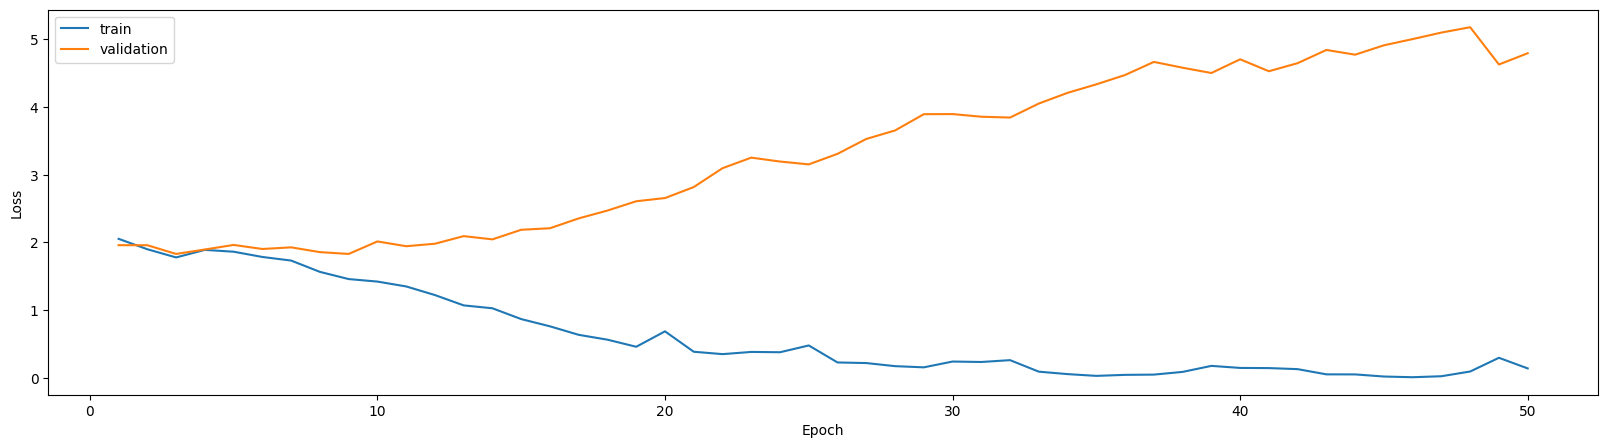

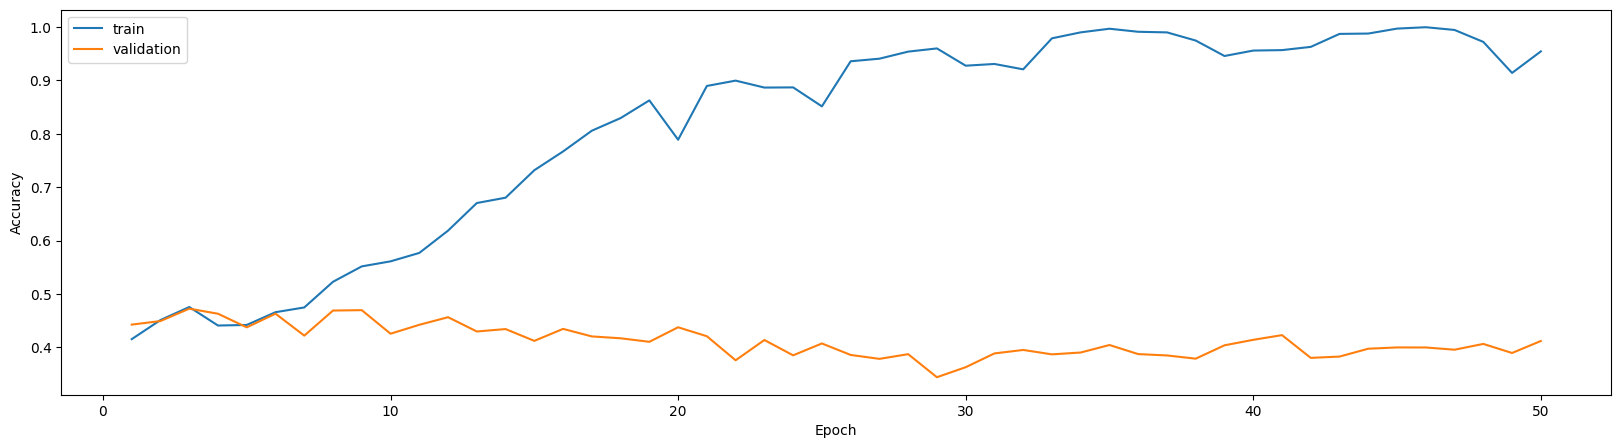

In [ ]:
# plot training curves

import matplotlib.pyplot as plt

# create epoch list
epochs = list(range(1, N_EPOCHS+1))

# plot training and validation loss
plt.figure(figsize=(20, 5))
plt.plot(epochs, train_loss_list, label='train')
plt.plot(epochs, valid_loss_list, label='validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plot training and validation accuracy
plt.figure(figsize=(20, 5))
plt.plot(epochs, train_acc_list, label='train')
plt.plot(epochs, valid_acc_list, label='validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

	Evaluation: 100%|██████████| 193/193 [00:02<00:00, 88.14it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Test Loss: 1.817 | Test Acc: 47.87% | Test F1: 0.382 | Test ROC AUC: 0.713

Classification report:
              precision    recall  f1-score   support

           0       0.47      0.87      0.61      4983
           1       0.35      0.36      0.36       672
           2       0.21      0.01      0.02      1070
           3       0.27      0.04      0.08       667
           4       0.12      0.05      0.07       837
           5       0.40      0.03      0.05       144
           6       0.20      0.01      0.01       351
           7       0.35      0.19      0.24       551
           8       0.00      0.00      0.00       200
           9       0.53      0.63      0.58       614
          10       0.00      0.00      0.00       570
          11       0.00      0.00      0.00       208
          12       0.92      0.82      0.87       844
          13       0.34      0.07      0.11       629

    accuracy                           0.48     12340
   macro avg       0.30      0.22 

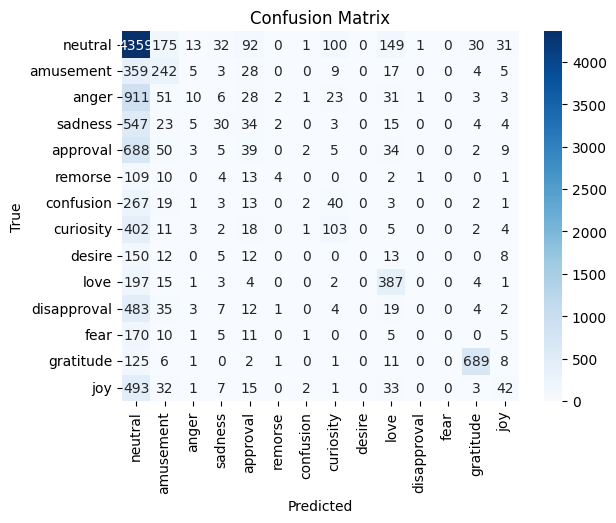

In [ ]:
# print out required metrics

import seaborn as sns
model.load_state_dict(torch.load('baseline-model.pt'))

test_loss, test_acc, test_f1, test_roc_auc, test_report, test_cm = evaluate(model, test_dataloader, criterion)
print(f'\nTest Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}% | Test F1: {test_f1:.3f} | Test ROC AUC: {test_roc_auc:.3f}\n')
# print(f'Confusion matrix:\n{test_cm}')
print(f'Classification report:\n{test_report}')

# plot confusion matrix
# labels for the plot - same as labels used for label_vocab
labels = OrderedDict([("neutral", 1), ("amusement", 1), ("anger", 1), ("sadness", 1), ("approval", 1), ("remorse", 1), ("confusion", 1), ("curiosity", 1), ("desire", 1), ("love", 1), ("disapproval", 1), ("fear", 1), ("gratitude", 1), ("joy", 1)])
# create the heatmap
sns.heatmap(test_cm, cmap="Blues", annot=True, fmt='g', xticklabels=labels, yticklabels=labels)
# add labels and title
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()



--------------------------------

--------------------------------
-------


## 2.2 Class Imbalance
First, undersampling will be used to fix class imbalance where neutral class is not as dominant.

In [ ]:
# load the customized dataset with chosen labels
# text = torch.load("/content/drive/MyDrive/Colab Notebooks/NLP CW/preprocessed_data_1.pt")
# data = to_map_style_dataset(text)
# train_data[0]

['[NAME] had more of a Pro Bowl season than [NAME].', 0]

In [ ]:
from datasets import load_dataset
import pandas as pd

# load the GoEmotions dataset
goemotions_dataset = load_dataset('go_emotions')

# get the train, validation, and test splits as Pandas dataframes
train_df = goemotions_dataset['train'].to_pandas()
val_df = goemotions_dataset['validation'].to_pandas()
test_df = goemotions_dataset['test'].to_pandas()

# concatenate the splits into a single dataframe
df = pd.concat([train_df, val_df, test_df], ignore_index=True)

# duplicate the records with multiple labels
df = df.explode('labels')

# reset the index of the dataframe
df = df.reset_index(drop=True)

# print the first five rows of the resulting dataframe
print(df.head())

from torchtext.data.functional import to_map_style_dataset

### MERGING EMOTION LABELS FROM GROUP DECISIONS ###

for i, row in df.iterrows():
  # Converting Annoyance [3] into Anger [2]
  if row['labels']==3:
    row['labels']=2
  # Disappointment [9] and Grief [16] into Sadness [25]
  if row['labels']==9 or row['labels']==16:
    row['labels']=25
  # Converting Nervousness [19] into Fear [14]
  if row['labels']==19:
    row['labels']=14
  # Converting Excitement [13] into Joy [17]
  if row['labels']==13:
    row['labels']=17

#keeps just one of the records where there are labelled with both merged classes
df = df.drop_duplicates(keep = 'first')
drop_labels = (3,11,12,9,16,19,22,26,21,13,0,23,20,5)
#drops labels we are not using
df_cut = df[~df.labels.isin(drop_labels)] 
#deletes duplicates
df_cut = df_cut.drop_duplicates(subset = ['text'], keep = False)
df_cut = df_cut.reset_index(drop = True)

### REORDERING SO THAT LABELS ARE 0-13 ###
for i, row in df_cut.iterrows():
    # Converting Neutral [27] to Neutral [0]
    if row['labels']==27:
        row['labels']=0
    # Converting Sadness [25] to Sadness [3]
    if row['labels']==25:
        row['labels']=3
    # Converting Remorse [24] to Remorse [5]
    if row['labels']==24:
        row['labels']=5
    # Converting Love [18] to Love [9]
    if row['labels']==18:
        row['labels']=9
    # Converting Fear [14] to Fear [11]
    if row['labels']==14:
        row['labels']=11
    # Converting Gratitude [15] to Gratitude [12]
    if row['labels']==15:
        row['labels']=12
    # Converting Joy [17] to Joy [13]
    if row['labels']==17:
        row['labels']=13

df = df_cut
# reset the index of the dataframe
df = df.reset_index(drop=True)
df.head()

# convert dataframe to list
text = df[['text','labels']].values.tolist()

# convert the dataset into a "map-style dataset"
data = to_map_style_dataset(text)

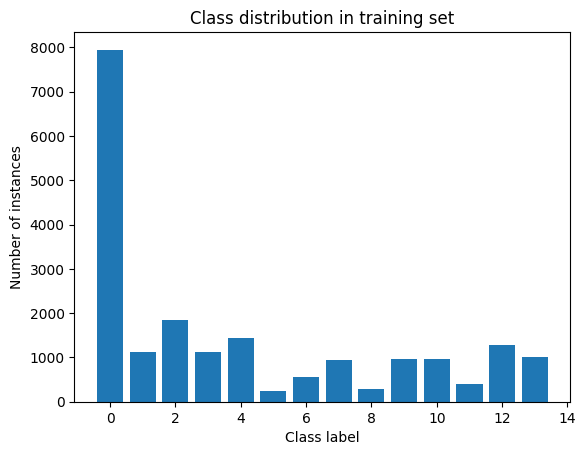

In [ ]:
# Used chatGPT to generate plotting code and adjusted/debugged

import matplotlib.pyplot as plt
import numpy as np

# Extract labels from train_data
labels = [example[1] for example in train_data]

# Compute class distribution
unique_labels, counts = np.unique(labels, return_counts=True)
class_dist = dict(zip(unique_labels, counts))

# Plot class distribution
fig, ax = plt.subplots()
ax.bar(class_dist.keys(), class_dist.values())
ax.set_xlabel('Class label')
ax.set_ylabel('Number of instances')
ax.set_title('Class distribution in training set')
plt.show()


In [ ]:
import random

# Define the number of samples to select
num_samples = 2000

# Create a list to hold the selected samples
selected_samples = []

# Loop through the train_data and select the desired number of class 0 samples
for text, label in train_data:
    if label == 0:
        # Add the sample to the selected_samples list
        selected_samples.append((text, label))
        # If we've selected the desired number of class 0 samples, break out of the loop
        if len(selected_samples) == num_samples:
            break

# Combine the selected class 0 samples with the remaining samples
remaining_samples = [(text, label) for text, label in train_data if label != 0]
new_train_data = selected_samples + remaining_samples

# Shuffle the new_train_data to ensure that the class 0 samples are distributed randomly throughout the dataset
random.shuffle(new_train_data)
train_data = new_train_data

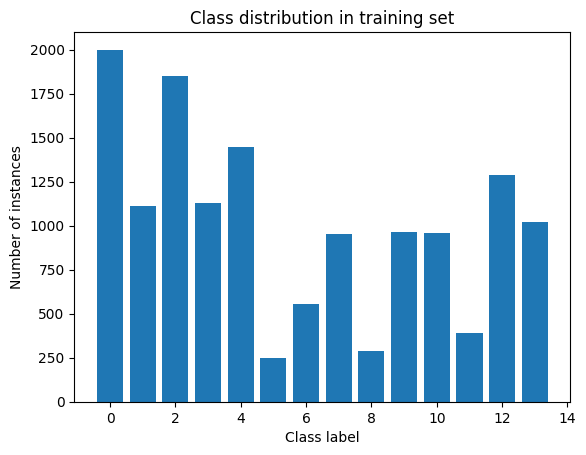

In [ ]:
# Used chatGPT to generate plotting code and adjusted/debugged

import matplotlib.pyplot as plt
import numpy as np

# Extract labels from train_data
labels = [example[1] for example in train_data]

# Compute class distribution
unique_labels, counts = np.unique(labels, return_counts=True)
class_dist = dict(zip(unique_labels, counts))

# Plot class distribution
fig, ax = plt.subplots()
ax.bar(class_dist.keys(), class_dist.values())
ax.set_xlabel('Class label')
ax.set_ylabel('Number of instances')
ax.set_title('Class distribution in training set')
plt.show()

In [ ]:
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator, vocab
from collections import OrderedDict

import torchtext.transforms as T

# defining a tokenizer as a PyTorch module
class SpacyTokenizer(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.tokenizer = get_tokenizer("spacy", language="en_core_web_sm")
    
    def forward(self, input):
        if isinstance(input, list):
            tokens = []
            for text in input:
                tokens.append(self.tokenizer(text))
            return tokens
        elif isinstance(input, str):
            return self.tokenizer(input)
        raise ValueError(f"Type {type(input)} is not supported.")

# defining auxilary functions for tokenizing

tokenizer = SpacyTokenizer()
MAX_VOCAB_SIZE = 25_000

def _process_texts_for_vocab(data):
    for line in data:
        yield tokenizer(line[0])
        
def _get_labels_for_vocab(data):
    for line in data:
        yield [line[1]]

# defining a function to transform each text into its length
class ToLengths(torch.nn.Module):
    def forward(self, input):
        if isinstance(input[1], list):    # changed to match the order in dataset
            lengths = []
            for text in input:
                lengths.append(len(text))
            return lengths
        elif isinstance(input, list):
            return len(input)
        raise ValueError(f"Type {type(input)} is not supported.")

In [ ]:
# tokenizing text and label vocabs
text_vocab = build_vocab_from_iterator(_process_texts_for_vocab(train_data), specials=('<unk>', '<pad>'), max_tokens=MAX_VOCAB_SIZE)
label_vocab = vocab(OrderedDict([("neutral", 1), ("amusement", 1), ("anger", 1), ("sadness", 1), ("approval", 1), ("remorse", 1), ("confusion", 1), ("curiosity", 1), ("desire", 1), ("love", 1), ("disapproval", 1), ("fear", 1), ("gratitude", 1), ("joy", 1)]))
text_vocab.set_default_index(text_vocab["<unk>"])

In [ ]:
# check the tokens in text and label vocabulary
print(f"Unique tokens in text vocabulary: {len(text_vocab)}")
print(f"Unique tokens in label vocabulary: {len(label_vocab)}")

Unique tokens in text vocabulary: 17723
Unique tokens in label vocabulary: 14


In [ ]:
# convert texts, labels, and lengths into tensors appropriately

text_transform = T.Sequential(
    SpacyTokenizer(),  # Tokenize
    T.VocabTransform(text_vocab),  # Conver to vocab IDs
    T.ToTensor(padding_value=text_vocab["<pad>"]),  # Convert to tensor and pad
)

label_transform = T.Sequential(
    T.ToTensor(),  # Convert to tensor
)

lengths_transform = T.Sequential(
    SpacyTokenizer(),   # tokenize
    ToLengths(),    # convert to lengths
    T.ToTensor(),   # convert to tensor
)

In [ ]:
from torch.utils.data import DataLoader

BATCH_SIZE = 64

def collate_batch(batch):
    texts, labels = zip(*batch)

    lengths = lengths_transform(list(texts))
    texts = text_transform(list(texts))
    labels = torch.tensor(list(labels), dtype=torch.int64)

    return labels.to(DEVICE), texts.to(DEVICE), lengths.cpu()


def _get_dataloader(data):
    return DataLoader(data, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_batch)
    

In [ ]:
train_dataloader = _get_dataloader(train_data)
valid_dataloader = _get_dataloader(valid_data)
test_dataloader = _get_dataloader(test_data)

---
### Functions required for training and evaluation
---

In [ ]:
from tqdm import tqdm
import numpy as np
from sklearn.metrics import f1_score, roc_auc_score, classification_report, confusion_matrix
import time

# defining a function for training the model
# Taken from lab but changed to be used for multi-class classification training instead of binary classification

def train(model, iterator, optimizer, criterion):    
    epoch_loss = 0
    epoch_acc = 0
    
    model.train()
    
    for batch in tqdm(iterator, desc="\tTraining"):
        optimizer.zero_grad()
                
        labels, texts, lengths = batch  # Note that this has to match the order in collate_batch
        predictions = model(texts, lengths)
        loss = criterion(predictions, labels)
        acc = categorical_accuracy(predictions, labels)
        
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

# Defining a function to evaluate using the trained model (on either validation or test sets)
# Taken from lab 5 but changed to be used for multi-class classification evaluation instead of binary classification
# Further modified to return metrics like F1 score, confusion matrix, and classification report to check scores for each class
# ChatGPT was used for debugging aur_roc code

def evaluate(model, iterator, criterion):
    epoch_loss = 0
    epoch_acc = 0
    predicted_probs = []
    true_labels = []
    
    model.eval()
    
    with torch.no_grad():
        for batch in tqdm(iterator, desc="\tEvaluation"):
            labels, texts, lengths = batch  # Note that this has to match the order in collate_batch
            predictions = model(texts, lengths)
            probs = torch.softmax(predictions, dim=1)
            loss = criterion(predictions, labels)
            acc = categorical_accuracy(predictions, labels)

            epoch_loss += loss.item()
            epoch_acc += acc.item()
            predicted_probs.extend(probs.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())
        
    predicted_probs = np.array(predicted_probs)
    true_labels = np.array(true_labels)
    predicted_labels = np.argmax(predicted_probs, axis=1)

    epoch_f1 = f1_score(true_labels, predicted_labels, average='weighted')
    epoch_auc_roc = roc_auc_score(true_labels, predicted_probs, multi_class='ovo', average='weighted')
    epoch_classification_report = classification_report(true_labels, predicted_labels)
    epoch_confusion_matrix = confusion_matrix(true_labels, predicted_labels)

    return epoch_loss / len(iterator), epoch_acc / len(iterator), epoch_f1, epoch_auc_roc, epoch_classification_report, epoch_confusion_matrix


# defining a function to check duration taken for training and testing
# taken from lab 5

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs


#defining a function to check number of parameters in the model

def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)


# defining a categorical accuracy function instead of binary accuracy
# ChatGPT was used to find this piece of code and further debugging was required to make it work as expected

def categorical_accuracy(preds, y):
    """
    Returns accuracy per batch, i.e. if you get 8/10 right, this returns 0.8, NOT 8
    """
    top_pred = preds.argmax(1, keepdim = True)
    correct = top_pred.eq(y.view_as(top_pred)).sum()
    acc = correct.float() / y.shape[0]
    return acc



---

### Model Building

---



In [ ]:
import torch.nn as nn
from torch import optim

# Define an RNN class
class RNN(nn.Module):
    def __init__(self, input_dim, embedding_dim, hidden_dim, output_dim):        
        super().__init__()

        self.embedding = nn.Embedding(input_dim, embedding_dim)
        self.rnn = nn.RNN(embedding_dim, hidden_dim, batch_first=True)        
        self.fc = nn.Linear(hidden_dim, output_dim)
        # self.fc = nn.Linear(hidden_dim, output_dim[1]) # output_dim[0] is hidden_dim, output_dim[1] is output_dim
        
    def forward(self, texts, lengths):
        embedded = self.embedding(texts)                          # VV note that lengths need to be on the CPU
        embedded = nn.utils.rnn.pack_padded_sequence(embedded, lengths.cpu(), batch_first=True, enforce_sorted=False)

        output, hidden = self.rnn(embedded)

        return self.fc(hidden.squeeze(0))


# Setting model building arguments
INPUT_DIM = len(text_vocab)
EMBEDDING_DIM = 100
HIDDEN_DIM = 256
OUTPUT_DIM = len(label_vocab) # 14 output nodes

model = RNN(INPUT_DIM, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM) # create a RNN model using the arguments
print(f'The model has {count_parameters(model):,} trainable parameters')

# Set other parameters
optimizer = optim.Adam(model.parameters())
criterion = nn.CrossEntropyLoss()

# Use GPU
model = model.to(DEVICE)
criterion = criterion.to(DEVICE)

The model has 1,867,546 trainable parameters


In [ ]:
N_EPOCHS = 50
train_loss_list = []
train_acc_list = []
valid_loss_list = []
valid_acc_list = []

best_valid_loss = float('inf')
print(f"Using {'GPU' if str(DEVICE) == 'cuda' else 'CPU'} for training.")

for epoch in range(N_EPOCHS):
    print(f'Epoch: {epoch+1:02}')
    start_time = time.time()
    
    train_loss, train_acc = train(model, train_dataloader, optimizer, criterion)
    train_loss_list.append(train_loss)
    train_acc_list.append(train_acc)
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    
    valid_loss, valid_acc, valid_f1, valid_auc_roc, valid_report, valid_cm  = evaluate(model, valid_dataloader, criterion)
    valid_loss_list.append(valid_loss)
    valid_acc_list.append(valid_acc)
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')
    
    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'balanced-baseline-model.pt')

Using GPU for training.
Epoch: 01


	Training: 100%|██████████| 222/222 [00:05<00:00, 41.36it/s]


	Train Loss: 2.306 | Train Acc: 22.66%


	Evaluation: 100%|██████████| 135/135 [00:02<00:00, 52.61it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 2.102 |  Val. Acc: 23.83%
Epoch: 02


	Training: 100%|██████████| 222/222 [00:02<00:00, 96.99it/s]


	Train Loss: 2.202 | Train Acc: 27.78%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 138.34it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 2.211 |  Val. Acc: 32.11%
Epoch: 03


	Training: 100%|██████████| 222/222 [00:02<00:00, 96.39it/s]


	Train Loss: 2.127 | Train Acc: 29.91%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 140.78it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 2.211 |  Val. Acc: 22.32%
Epoch: 04


	Training: 100%|██████████| 222/222 [00:02<00:00, 95.94it/s]


	Train Loss: 2.049 | Train Acc: 33.04%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 102.45it/s]


	 Val. Loss: 2.202 |  Val. Acc: 22.82%
Epoch: 05


	Training: 100%|██████████| 222/222 [00:03<00:00, 67.26it/s]


	Train Loss: 1.906 | Train Acc: 37.55%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 110.88it/s]


	 Val. Loss: 2.133 |  Val. Acc: 28.86%
Epoch: 06


	Training: 100%|██████████| 222/222 [00:03<00:00, 70.37it/s]


	Train Loss: 1.801 | Train Acc: 41.92%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 137.87it/s]


	 Val. Loss: 2.236 |  Val. Acc: 25.47%
Epoch: 07


	Training: 100%|██████████| 222/222 [00:02<00:00, 91.79it/s]


	Train Loss: 1.711 | Train Acc: 44.75%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 136.12it/s]


	 Val. Loss: 2.202 |  Val. Acc: 27.50%
Epoch: 08


	Training: 100%|██████████| 222/222 [00:02<00:00, 82.00it/s]


	Train Loss: 1.538 | Train Acc: 50.46%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 92.01it/s]


	 Val. Loss: 2.233 |  Val. Acc: 27.97%
Epoch: 09


	Training: 100%|██████████| 222/222 [00:02<00:00, 74.94it/s]


	Train Loss: 1.383 | Train Acc: 55.82%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 140.03it/s]


	 Val. Loss: 2.146 |  Val. Acc: 33.17%
Epoch: 10


	Training: 100%|██████████| 222/222 [00:02<00:00, 98.02it/s]


	Train Loss: 1.218 | Train Acc: 61.93%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 138.19it/s]


	 Val. Loss: 2.315 |  Val. Acc: 30.49%
Epoch: 11


	Training: 100%|██████████| 222/222 [00:02<00:00, 96.50it/s]


	Train Loss: 1.029 | Train Acc: 67.64%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 137.49it/s]


	 Val. Loss: 2.501 |  Val. Acc: 27.73%
Epoch: 12


	Training: 100%|██████████| 222/222 [00:02<00:00, 78.11it/s]


	Train Loss: 0.877 | Train Acc: 73.06%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 92.60it/s]


	 Val. Loss: 2.688 |  Val. Acc: 29.06%
Epoch: 13


	Training: 100%|██████████| 222/222 [00:02<00:00, 79.14it/s]


	Train Loss: 0.744 | Train Acc: 77.72%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 139.61it/s]


	 Val. Loss: 2.900 |  Val. Acc: 26.25%
Epoch: 14


	Training: 100%|██████████| 222/222 [00:02<00:00, 97.50it/s]


	Train Loss: 0.833 | Train Acc: 74.60%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 137.23it/s]


	 Val. Loss: 2.842 |  Val. Acc: 30.02%
Epoch: 15


	Training: 100%|██████████| 222/222 [00:02<00:00, 92.44it/s]


	Train Loss: 0.523 | Train Acc: 84.98%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 136.48it/s]


	 Val. Loss: 3.143 |  Val. Acc: 29.03%
Epoch: 16


	Training: 100%|██████████| 222/222 [00:03<00:00, 72.84it/s]


	Train Loss: 0.361 | Train Acc: 90.45%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 88.58it/s]


	 Val. Loss: 3.441 |  Val. Acc: 29.25%
Epoch: 17


	Training: 100%|██████████| 222/222 [00:02<00:00, 85.01it/s]


	Train Loss: 0.338 | Train Acc: 90.67%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 136.45it/s]


	 Val. Loss: 3.583 |  Val. Acc: 29.83%
Epoch: 18


	Training: 100%|██████████| 222/222 [00:02<00:00, 94.43it/s]


	Train Loss: 0.193 | Train Acc: 95.47%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 138.33it/s]


	 Val. Loss: 3.827 |  Val. Acc: 29.02%
Epoch: 19


	Training: 100%|██████████| 222/222 [00:02<00:00, 95.79it/s]


	Train Loss: 0.114 | Train Acc: 97.95%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 132.40it/s]


	 Val. Loss: 4.113 |  Val. Acc: 27.43%
Epoch: 20


	Training: 100%|██████████| 222/222 [00:03<00:00, 69.72it/s]


	Train Loss: 0.221 | Train Acc: 94.00%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 86.37it/s]


	 Val. Loss: 4.034 |  Val. Acc: 29.46%
Epoch: 21


	Training: 100%|██████████| 222/222 [00:02<00:00, 92.95it/s]


	Train Loss: 0.344 | Train Acc: 89.57%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 139.83it/s]


	 Val. Loss: 4.123 |  Val. Acc: 28.73%
Epoch: 22


	Training: 100%|██████████| 222/222 [00:02<00:00, 75.26it/s]


	Train Loss: 0.149 | Train Acc: 96.37%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 129.20it/s]


	 Val. Loss: 4.426 |  Val. Acc: 27.91%
Epoch: 23


	Training: 100%|██████████| 222/222 [00:02<00:00, 96.68it/s]


	Train Loss: 0.106 | Train Acc: 97.70%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 98.25it/s]


	 Val. Loss: 4.541 |  Val. Acc: 28.94%
Epoch: 24


	Training: 100%|██████████| 222/222 [00:03<00:00, 66.57it/s]


	Train Loss: 0.049 | Train Acc: 99.22%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 119.62it/s]


	 Val. Loss: 4.735 |  Val. Acc: 28.16%
Epoch: 25


	Training: 100%|██████████| 222/222 [00:02<00:00, 98.46it/s]


	Train Loss: 0.039 | Train Acc: 99.52%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 137.01it/s]


	 Val. Loss: 4.815 |  Val. Acc: 29.23%
Epoch: 26


	Training: 100%|██████████| 222/222 [00:02<00:00, 97.13it/s]


	Train Loss: 0.013 | Train Acc: 99.97%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 138.48it/s]


	 Val. Loss: 4.941 |  Val. Acc: 29.16%
Epoch: 27


	Training: 100%|██████████| 222/222 [00:02<00:00, 96.46it/s]


	Train Loss: 0.008 | Train Acc: 100.00%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 90.70it/s]


	 Val. Loss: 5.042 |  Val. Acc: 29.33%
Epoch: 28


	Training: 100%|██████████| 222/222 [00:03<00:00, 67.07it/s]


	Train Loss: 0.007 | Train Acc: 99.99%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 130.96it/s]


	 Val. Loss: 5.129 |  Val. Acc: 29.36%
Epoch: 29


	Training: 100%|██████████| 222/222 [00:02<00:00, 96.15it/s]


	Train Loss: 0.005 | Train Acc: 99.99%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 140.44it/s]


	 Val. Loss: 5.237 |  Val. Acc: 29.28%
Epoch: 30


	Training: 100%|██████████| 222/222 [00:02<00:00, 96.50it/s]


	Train Loss: 0.004 | Train Acc: 100.00%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 138.35it/s]


	 Val. Loss: 5.301 |  Val. Acc: 29.41%
Epoch: 31


	Training: 100%|██████████| 222/222 [00:02<00:00, 92.65it/s]


	Train Loss: 0.003 | Train Acc: 100.00%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 90.44it/s]


	 Val. Loss: 5.376 |  Val. Acc: 29.43%
Epoch: 32


	Training: 100%|██████████| 222/222 [00:03<00:00, 68.33it/s]


	Train Loss: 0.003 | Train Acc: 100.00%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 136.79it/s]


	 Val. Loss: 5.424 |  Val. Acc: 29.71%
Epoch: 33


	Training: 100%|██████████| 222/222 [00:02<00:00, 95.06it/s]


	Train Loss: 0.002 | Train Acc: 100.00%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 138.38it/s]


	 Val. Loss: 5.520 |  Val. Acc: 29.66%
Epoch: 34


	Training: 100%|██████████| 222/222 [00:02<00:00, 97.92it/s]


	Train Loss: 0.002 | Train Acc: 100.00%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 136.73it/s]


	 Val. Loss: 5.579 |  Val. Acc: 29.65%
Epoch: 35


	Training: 100%|██████████| 222/222 [00:02<00:00, 88.22it/s]


	Train Loss: 0.002 | Train Acc: 100.00%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 89.06it/s]


	 Val. Loss: 5.650 |  Val. Acc: 29.66%
Epoch: 36


	Training: 100%|██████████| 222/222 [00:03<00:00, 69.06it/s]


	Train Loss: 0.001 | Train Acc: 100.00%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 133.27it/s]


	 Val. Loss: 5.715 |  Val. Acc: 29.67%
Epoch: 37


	Training: 100%|██████████| 222/222 [00:02<00:00, 94.36it/s]


	Train Loss: 0.001 | Train Acc: 100.00%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 138.00it/s]


	 Val. Loss: 5.773 |  Val. Acc: 29.72%
Epoch: 38


	Training: 100%|██████████| 222/222 [00:02<00:00, 94.88it/s]


	Train Loss: 0.001 | Train Acc: 100.00%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 137.07it/s]


	 Val. Loss: 5.830 |  Val. Acc: 29.67%
Epoch: 39


	Training: 100%|██████████| 222/222 [00:02<00:00, 82.52it/s]


	Train Loss: 0.001 | Train Acc: 100.00%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 89.05it/s]


	 Val. Loss: 5.896 |  Val. Acc: 29.58%
Epoch: 40


	Training: 100%|██████████| 222/222 [00:02<00:00, 75.13it/s]


	Train Loss: 0.001 | Train Acc: 100.00%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 137.90it/s]


	 Val. Loss: 5.952 |  Val. Acc: 29.65%
Epoch: 41


	Training: 100%|██████████| 222/222 [00:02<00:00, 96.30it/s]


	Train Loss: 0.001 | Train Acc: 100.00%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 139.77it/s]


	 Val. Loss: 5.993 |  Val. Acc: 29.85%
Epoch: 42


	Training: 100%|██████████| 222/222 [00:02<00:00, 95.88it/s]


	Train Loss: 0.001 | Train Acc: 100.00%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 140.96it/s]


	 Val. Loss: 6.070 |  Val. Acc: 29.69%
Epoch: 43


	Training: 100%|██████████| 222/222 [00:02<00:00, 77.74it/s]


	Train Loss: 0.001 | Train Acc: 100.00%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 90.44it/s]


	 Val. Loss: 6.136 |  Val. Acc: 29.83%
Epoch: 44


	Training: 100%|██████████| 222/222 [00:02<00:00, 79.01it/s]


	Train Loss: 0.001 | Train Acc: 100.00%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 137.74it/s]


	 Val. Loss: 6.188 |  Val. Acc: 29.79%
Epoch: 45


	Training: 100%|██████████| 222/222 [00:02<00:00, 95.62it/s]


	Train Loss: 0.000 | Train Acc: 100.00%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 131.59it/s]


	 Val. Loss: 6.249 |  Val. Acc: 29.75%
Epoch: 46


	Training: 100%|██████████| 222/222 [00:02<00:00, 96.64it/s]


	Train Loss: 0.000 | Train Acc: 100.00%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 138.28it/s]


	 Val. Loss: 6.321 |  Val. Acc: 29.74%
Epoch: 47


	Training: 100%|██████████| 222/222 [00:03<00:00, 71.26it/s]


	Train Loss: 0.000 | Train Acc: 100.00%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 90.50it/s]


	 Val. Loss: 6.371 |  Val. Acc: 29.78%
Epoch: 48


	Training: 100%|██████████| 222/222 [00:02<00:00, 84.04it/s]


	Train Loss: 0.000 | Train Acc: 100.00%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 135.01it/s]


	 Val. Loss: 6.418 |  Val. Acc: 29.86%
Epoch: 49


	Training: 100%|██████████| 222/222 [00:03<00:00, 63.66it/s]


	Train Loss: 0.000 | Train Acc: 100.00%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 138.41it/s]


	 Val. Loss: 6.482 |  Val. Acc: 29.82%
Epoch: 50


	Training: 100%|██████████| 222/222 [00:02<00:00, 97.83it/s]


	Train Loss: 0.000 | Train Acc: 100.00%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 99.46it/s]


	 Val. Loss: 6.528 |  Val. Acc: 29.82%


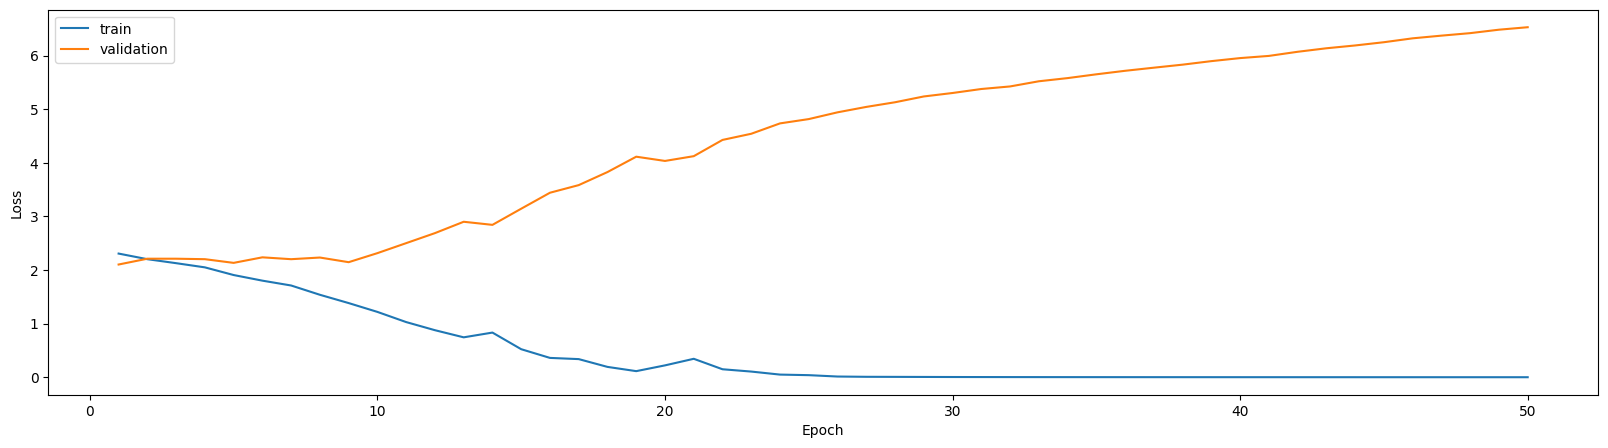

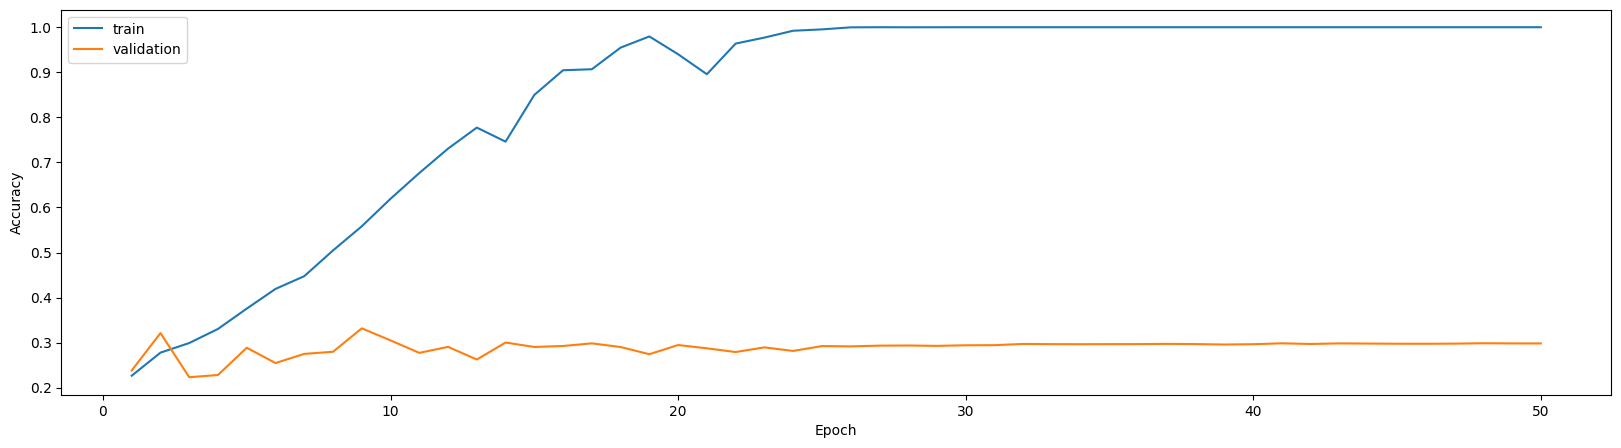

In [ ]:
# plot training curves

import matplotlib.pyplot as plt

# create epoch list
epochs = list(range(1, N_EPOCHS+1))

# plot training and validation loss
plt.figure(figsize=(20, 5))
plt.plot(epochs, train_loss_list, label='train')
plt.plot(epochs, valid_loss_list, label='validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plot training and validation accuracy
plt.figure(figsize=(20, 5))
plt.plot(epochs, train_acc_list, label='train')
plt.plot(epochs, valid_acc_list, label='validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

	Evaluation: 100%|██████████| 193/193 [00:03<00:00, 53.25it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Test Loss: 2.095 | Test Acc: 24.07% | Test F1: 0.217 | Test ROC AUC: 0.676

Classification report:
              precision    recall  f1-score   support

           0       0.51      0.13      0.20      4983
           1       0.30      0.34      0.31       672
           2       0.10      0.60      0.18      1070
           3       0.17      0.07      0.10       667
           4       0.13      0.08      0.10       837
           5       0.40      0.01      0.03       144
           6       0.00      0.00      0.00       351
           7       0.36      0.56      0.44       551
           8       0.00      0.00      0.00       200
           9       0.46      0.59      0.52       614
          10       0.02      0.00      0.00       570
          11       0.00      0.00      0.00       208
          12       0.44      0.74      0.55       844
          13       0.22      0.09      0.13       629

    accuracy                           0.24     12340
   macro avg       0.22      0.23 

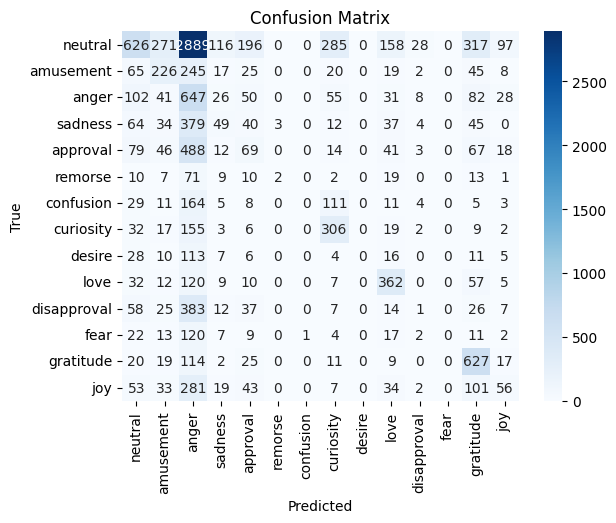

In [ ]:
# print out required metrics

import seaborn as sns
model.load_state_dict(torch.load('balanced-baseline-model.pt'))

test_loss, test_acc, test_f1, test_roc_auc, test_report, test_cm = evaluate(model, test_dataloader, criterion)
print(f'\nTest Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}% | Test F1: {test_f1:.3f} | Test ROC AUC: {test_roc_auc:.3f}\n')
# print(f'Confusion matrix:\n{test_cm}')
print(f'Classification report:\n{test_report}')

# plot confusion matrix
# labels for the plot - same as labels used for label_vocab
labels = OrderedDict([("neutral", 1), ("amusement", 1), ("anger", 1), ("sadness", 1), ("approval", 1), ("remorse", 1), ("confusion", 1), ("curiosity", 1), ("desire", 1), ("love", 1), ("disapproval", 1), ("fear", 1), ("gratitude", 1), ("joy", 1)])
# create the heatmap
sns.heatmap(test_cm, cmap="Blues", annot=True, fmt='g', xticklabels=labels, yticklabels=labels)
# add labels and title
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

The test accuracy, test F1 score, and test ROC AUC all go down after using undersampled data. This is again due to the high proportion of neutral lablled data. Since the number of training samples for 'neutral' and 'anger' were similar and higher than the rest of the labels, the model now predicts the majority of test data as 'anger' hoping to be correct.<br>
The F1 score for some individual classes may have risen but since the overall score is lower, we can conclude that **Undersampling does not increase the overall performance of an RNN.** 



---



---



---



## 2.3 Stemming / Lematization / other preprocessing

In [ ]:
# # load the customized dataset with chosen labels
# text = torch.load("preprocessed_data_1.pt")
# data = to_map_style_dataset(text)
# train_data[0]

('wait look s', 7)

In [ ]:
from datasets import load_dataset
import pandas as pd

# load the GoEmotions dataset
goemotions_dataset = load_dataset('go_emotions')

# get the train, validation, and test splits as Pandas dataframes
train_df = goemotions_dataset['train'].to_pandas()
val_df = goemotions_dataset['validation'].to_pandas()
test_df = goemotions_dataset['test'].to_pandas()

# concatenate the splits into a single dataframe
df = pd.concat([train_df, val_df, test_df], ignore_index=True)

# duplicate the records with multiple labels
df = df.explode('labels')

# reset the index of the dataframe
df = df.reset_index(drop=True)

# print the first five rows of the resulting dataframe
print(df.head())

from torchtext.data.functional import to_map_style_dataset

### MERGING EMOTION LABELS FROM GROUP DECISIONS ###

for i, row in df.iterrows():
  # Converting Annoyance [3] into Anger [2]
  if row['labels']==3:
    row['labels']=2
  # Disappointment [9] and Grief [16] into Sadness [25]
  if row['labels']==9 or row['labels']==16:
    row['labels']=25
  # Converting Nervousness [19] into Fear [14]
  if row['labels']==19:
    row['labels']=14
  # Converting Excitement [13] into Joy [17]
  if row['labels']==13:
    row['labels']=17

#keeps just one of the records where there are labelled with both merged classes
df = df.drop_duplicates(keep = 'first')
drop_labels = (3,11,12,9,16,19,22,26,21,13,0,23,20,5)
#drops labels we are not using
df_cut = df[~df.labels.isin(drop_labels)] 
#deletes duplicates
df_cut = df_cut.drop_duplicates(subset = ['text'], keep = False)
df_cut = df_cut.reset_index(drop = True)

### REORDERING SO THAT LABELS ARE 0-13 ###
for i, row in df_cut.iterrows():
    # Converting Neutral [27] to Neutral [0]
    if row['labels']==27:
        row['labels']=0
    # Converting Sadness [25] to Sadness [3]
    if row['labels']==25:
        row['labels']=3
    # Converting Remorse [24] to Remorse [5]
    if row['labels']==24:
        row['labels']=5
    # Converting Love [18] to Love [9]
    if row['labels']==18:
        row['labels']=9
    # Converting Fear [14] to Fear [11]
    if row['labels']==14:
        row['labels']=11
    # Converting Gratitude [15] to Gratitude [12]
    if row['labels']==15:
        row['labels']=12
    # Converting Joy [17] to Joy [13]
    if row['labels']==17:
        row['labels']=13

df = df_cut
# reset the index of the dataframe
df = df.reset_index(drop=True)
df.head()

# convert dataframe to list
text = df[['text','labels']].values.tolist()

# convert the dataset into a "map-style dataset"
data = to_map_style_dataset(text)

In [ ]:
import nltk
nltk.download("wordnet")
nltk.download("omw-1.4")
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as sklearn_stop_words

def remove_stopwords(text):
    stop_words = sklearn_stop_words
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

def stem_text(text):
    stemmer = PorterStemmer()
    words = word_tokenize(text)
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)

def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    words = word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

def preprocess_text(text):
    # text = text.lower() # convert to lowercase
    # text = re.sub(r'\d+', '', text) # remove numbers
    # text = re.sub(r'[^\w\s]', '', text) # remove punctuation
    # text = re.sub(r'\s+', ' ', text) # remove extra whitespace
    # text = text.strip() # remove leading/trailing whitespace
    text = remove_stopwords(text) # remove stopwords
    text = stem_text(text) # perform stemming
    text = lemmatize_text(text) # perform lemmatization
    return text

def preprocess_data(data):
    preprocessed_data = []
    for sentence, label in data:
        preprocessed_sentence = preprocess_text(sentence)
        if len(preprocessed_sentence) > 0:
            preprocessed_data.append((preprocessed_sentence, label))
    return preprocessed_data

train_data = preprocess_data(train_data)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
# tokenizing text and label vocabs
text_vocab = build_vocab_from_iterator(_process_texts_for_vocab(train_data), specials=('<unk>', '<pad>'), max_tokens=MAX_VOCAB_SIZE)
label_vocab = vocab(OrderedDict([("neutral", 1), ("amusement", 1), ("anger", 1), ("sadness", 1), ("approval", 1), ("remorse", 1), ("confusion", 1), ("curiosity", 1), ("desire", 1), ("love", 1), ("disapproval", 1), ("fear", 1), ("gratitude", 1), ("joy", 1)]))
text_vocab.set_default_index(text_vocab["<unk>"])

In [ ]:
# view most frequent words in the vocabulary

from collections import Counter

counter = Counter()
for (line, label) in train_data:
    counter.update(tokenizer(line))
    
counter.most_common(20)

[('nt', 3001),
 ('i', 2184),
 ('just', 1731),
 ('like', 1715),
 ('m', 1596),
 ('do', 1222),
 ('thank', 1034),
 ('love', 977),
 ('did', 900),
 ('peopl', 882),
 ('make', 846),
 ('think', 830),
 ('good', 787),
 ('know', 772),
 ('look', 743),
 ('realli', 718),
 ('time', 685),
 ('want', 607),
 ('say', 556),
 ('thing', 547)]

In [ ]:
# convert texts, labels, and lengths into tensors appropriately

text_transform = T.Sequential(
    SpacyTokenizer(),  # Tokenize
    T.VocabTransform(text_vocab),  # Conver to vocab IDs
    T.ToTensor(padding_value=text_vocab["<pad>"]),  # Convert to tensor and pad
)

label_transform = T.Sequential(
    # T.LabelToIndex(label_vocab.get_itos()),  # Convert to integer #labels are already integers
    T.ToTensor(),  # Convert to tensor
)

lengths_transform = T.Sequential(
    SpacyTokenizer(),
    ToLengths(),
    T.ToTensor(),
)

train_dataloader = _get_dataloader(train_data)
valid_dataloader = _get_dataloader(valid_data)
test_dataloader = _get_dataloader(test_data)

In [ ]:
INPUT_DIM = len(text_vocab)
EMBEDDING_DIM = 100
HIDDEN_DIM = 256
OUTPUT_DIM = len(label_vocab)

model_ppdata = RNN(INPUT_DIM, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM)

#####
# import torch.optim as optim

optimizer = optim.SGD(model.parameters(), lr=1e-3)

criterion = nn.CrossEntropyLoss()

model_ppdata = model_ppdata.to(DEVICE)
criterion = criterion.to(DEVICE)
######
N_EPOCHS = 50
train_loss_list = []
train_acc_list = []
valid_loss_list = []
valid_acc_list = []

best_valid_loss = float('inf')
print(f"Using {'GPU' if str(DEVICE) == 'cuda' else 'CPU'} for training.")

for epoch in range(N_EPOCHS):
    print(f'Epoch: {epoch+1:02}')
    start_time = time.time()
    
    train_loss, train_acc = train(model_ppdata, train_dataloader, optimizer, criterion)
    train_loss_list.append(train_loss)
    train_acc_list.append(train_acc)
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    
    # valid_loss, valid_acc = evaluate(model, valid_dataloader, criterion)
    valid_loss, valid_acc, valid_f1, valid_auc_roc, valid_report, valid_cm  = evaluate(model_ppdata, valid_dataloader, criterion)
    valid_loss_list.append(valid_loss)
    valid_acc_list.append(valid_acc)
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')
    
    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model_ppdata.state_dict(), 'model-on-pp-data.pt')


Using GPU for training.
Epoch: 01


	Training: 100%|██████████| 343/343 [00:03<00:00, 106.07it/s]


	Train Loss: 2.697 | Train Acc: 4.67%


	Evaluation: 100%|██████████| 148/148 [00:03<00:00, 42.25it/s]


	 Val. Loss: 2.684 |  Val. Acc: 5.02%
Epoch: 02


	Training: 100%|██████████| 343/343 [00:02<00:00, 158.23it/s]


	Train Loss: 2.697 | Train Acc: 4.67%


	Evaluation: 100%|██████████| 148/148 [00:01<00:00, 127.85it/s]


	 Val. Loss: 2.684 |  Val. Acc: 5.03%
Epoch: 03


	Training: 100%|██████████| 343/343 [00:02<00:00, 166.25it/s]


	Train Loss: 2.697 | Train Acc: 4.67%


	Evaluation: 100%|██████████| 148/148 [00:01<00:00, 131.61it/s]


	 Val. Loss: 2.684 |  Val. Acc: 5.02%
Epoch: 04


	Training: 100%|██████████| 343/343 [00:02<00:00, 165.73it/s]


	Train Loss: 2.698 | Train Acc: 4.67%


	Evaluation: 100%|██████████| 148/148 [00:01<00:00, 129.94it/s]


	 Val. Loss: 2.684 |  Val. Acc: 5.02%
Epoch: 05


	Training: 100%|██████████| 343/343 [00:02<00:00, 114.49it/s]


	Train Loss: 2.698 | Train Acc: 4.67%


	Evaluation: 100%|██████████| 148/148 [00:01<00:00, 103.08it/s]


	 Val. Loss: 2.684 |  Val. Acc: 5.02%
Epoch: 06


	Training: 100%|██████████| 343/343 [00:02<00:00, 166.12it/s]


	Train Loss: 2.698 | Train Acc: 4.67%


	Evaluation: 100%|██████████| 148/148 [00:01<00:00, 126.41it/s]


	 Val. Loss: 2.684 |  Val. Acc: 5.02%
Epoch: 07


	Training: 100%|██████████| 343/343 [00:02<00:00, 167.05it/s]


	Train Loss: 2.697 | Train Acc: 4.67%


	Evaluation: 100%|██████████| 148/148 [00:01<00:00, 128.24it/s]


	 Val. Loss: 2.684 |  Val. Acc: 5.02%
Epoch: 08


	Training: 100%|██████████| 343/343 [00:02<00:00, 159.61it/s]


	Train Loss: 2.697 | Train Acc: 4.67%


	Evaluation: 100%|██████████| 148/148 [00:01<00:00, 94.08it/s]


	 Val. Loss: 2.684 |  Val. Acc: 5.02%
Epoch: 09


	Training: 100%|██████████| 343/343 [00:02<00:00, 122.31it/s]


	Train Loss: 2.697 | Train Acc: 4.67%


	Evaluation: 100%|██████████| 148/148 [00:01<00:00, 128.44it/s]


	 Val. Loss: 2.684 |  Val. Acc: 5.02%
Epoch: 10


	Training: 100%|██████████| 343/343 [00:02<00:00, 163.05it/s]


	Train Loss: 2.698 | Train Acc: 4.67%


	Evaluation: 100%|██████████| 148/148 [00:01<00:00, 125.56it/s]


	 Val. Loss: 2.684 |  Val. Acc: 5.02%
Epoch: 11


	Training: 100%|██████████| 343/343 [00:02<00:00, 165.24it/s]


	Train Loss: 2.698 | Train Acc: 4.66%


	Evaluation: 100%|██████████| 148/148 [00:01<00:00, 131.41it/s]


	 Val. Loss: 2.684 |  Val. Acc: 5.02%
Epoch: 12


	Training: 100%|██████████| 343/343 [00:02<00:00, 144.67it/s]


	Train Loss: 2.697 | Train Acc: 4.66%


	Evaluation: 100%|██████████| 148/148 [00:01<00:00, 83.72it/s]


	 Val. Loss: 2.684 |  Val. Acc: 5.02%
Epoch: 13


	Training: 100%|██████████| 343/343 [00:02<00:00, 148.31it/s]


	Train Loss: 2.697 | Train Acc: 4.66%


	Evaluation: 100%|██████████| 148/148 [00:01<00:00, 131.39it/s]


	 Val. Loss: 2.684 |  Val. Acc: 5.03%
Epoch: 14


	Training: 100%|██████████| 343/343 [00:02<00:00, 169.23it/s]


	Train Loss: 2.697 | Train Acc: 4.67%


	Evaluation: 100%|██████████| 148/148 [00:01<00:00, 133.14it/s]


	 Val. Loss: 2.684 |  Val. Acc: 5.02%
Epoch: 15


	Training: 100%|██████████| 343/343 [00:02<00:00, 167.52it/s]


	Train Loss: 2.697 | Train Acc: 4.66%


	Evaluation: 100%|██████████| 148/148 [00:01<00:00, 128.72it/s]


	 Val. Loss: 2.684 |  Val. Acc: 5.02%
Epoch: 16


	Training: 100%|██████████| 343/343 [00:02<00:00, 122.02it/s]


	Train Loss: 2.697 | Train Acc: 4.67%


	Evaluation: 100%|██████████| 148/148 [00:01<00:00, 84.16it/s]


	 Val. Loss: 2.684 |  Val. Acc: 5.02%
Epoch: 17


	Training: 100%|██████████| 343/343 [00:02<00:00, 169.92it/s]


	Train Loss: 2.697 | Train Acc: 4.67%


	Evaluation: 100%|██████████| 148/148 [00:01<00:00, 132.02it/s]


	 Val. Loss: 2.684 |  Val. Acc: 5.02%
Epoch: 18


	Training: 100%|██████████| 343/343 [00:02<00:00, 166.60it/s]


	Train Loss: 2.697 | Train Acc: 4.67%


	Evaluation: 100%|██████████| 148/148 [00:01<00:00, 127.35it/s]


	 Val. Loss: 2.684 |  Val. Acc: 5.02%
Epoch: 19


	Training: 100%|██████████| 343/343 [00:02<00:00, 164.98it/s]


	Train Loss: 2.697 | Train Acc: 4.67%


	Evaluation: 100%|██████████| 148/148 [00:01<00:00, 112.99it/s]


	 Val. Loss: 2.684 |  Val. Acc: 5.03%
Epoch: 20


	Training: 100%|██████████| 343/343 [00:03<00:00, 113.13it/s]


	Train Loss: 2.698 | Train Acc: 4.67%


	Evaluation: 100%|██████████| 148/148 [00:01<00:00, 118.55it/s]


	 Val. Loss: 2.684 |  Val. Acc: 5.01%
Epoch: 21


	Training: 100%|██████████| 343/343 [00:02<00:00, 168.06it/s]


	Train Loss: 2.698 | Train Acc: 4.67%


	Evaluation: 100%|██████████| 148/148 [00:01<00:00, 130.13it/s]


	 Val. Loss: 2.684 |  Val. Acc: 5.02%
Epoch: 22


	Training: 100%|██████████| 343/343 [00:02<00:00, 167.16it/s]


	Train Loss: 2.697 | Train Acc: 4.68%


	Evaluation: 100%|██████████| 148/148 [00:01<00:00, 131.11it/s]


	 Val. Loss: 2.684 |  Val. Acc: 5.02%
Epoch: 23


	Training: 100%|██████████| 343/343 [00:02<00:00, 166.92it/s]


	Train Loss: 2.697 | Train Acc: 4.67%


	Evaluation: 100%|██████████| 148/148 [00:01<00:00, 85.37it/s]


	 Val. Loss: 2.683 |  Val. Acc: 5.02%
Epoch: 24


	Training: 100%|██████████| 343/343 [00:02<00:00, 125.35it/s]


	Train Loss: 2.698 | Train Acc: 4.66%


	Evaluation: 100%|██████████| 148/148 [00:01<00:00, 132.79it/s]


	 Val. Loss: 2.684 |  Val. Acc: 5.02%
Epoch: 25


	Training: 100%|██████████| 343/343 [00:02<00:00, 170.16it/s]


	Train Loss: 2.697 | Train Acc: 4.67%


	Evaluation: 100%|██████████| 148/148 [00:01<00:00, 133.36it/s]


	 Val. Loss: 2.684 |  Val. Acc: 5.03%
Epoch: 26


	Training: 100%|██████████| 343/343 [00:02<00:00, 167.78it/s]


	Train Loss: 2.697 | Train Acc: 4.67%


	Evaluation: 100%|██████████| 148/148 [00:01<00:00, 130.12it/s]


	 Val. Loss: 2.684 |  Val. Acc: 5.02%
Epoch: 27


	Training: 100%|██████████| 343/343 [00:02<00:00, 140.57it/s]


	Train Loss: 2.697 | Train Acc: 4.67%


	Evaluation: 100%|██████████| 148/148 [00:01<00:00, 83.10it/s]


	 Val. Loss: 2.684 |  Val. Acc: 5.02%
Epoch: 28


	Training: 100%|██████████| 343/343 [00:02<00:00, 149.53it/s]


	Train Loss: 2.698 | Train Acc: 4.67%


	Evaluation: 100%|██████████| 148/148 [00:01<00:00, 126.61it/s]


	 Val. Loss: 2.684 |  Val. Acc: 5.02%
Epoch: 29


	Training: 100%|██████████| 343/343 [00:02<00:00, 162.96it/s]


	Train Loss: 2.698 | Train Acc: 4.67%


	Evaluation: 100%|██████████| 148/148 [00:01<00:00, 130.00it/s]


	 Val. Loss: 2.684 |  Val. Acc: 5.02%
Epoch: 30


	Training: 100%|██████████| 343/343 [00:02<00:00, 169.29it/s]


	Train Loss: 2.697 | Train Acc: 4.67%


	Evaluation: 100%|██████████| 148/148 [00:01<00:00, 132.87it/s]


	 Val. Loss: 2.684 |  Val. Acc: 5.02%
Epoch: 31


	Training: 100%|██████████| 343/343 [00:02<00:00, 118.26it/s]


	Train Loss: 2.697 | Train Acc: 4.67%


	Evaluation: 100%|██████████| 148/148 [00:01<00:00, 93.28it/s] 


	 Val. Loss: 2.684 |  Val. Acc: 5.02%
Epoch: 32


	Training: 100%|██████████| 343/343 [00:02<00:00, 161.05it/s]


	Train Loss: 2.697 | Train Acc: 4.67%


	Evaluation: 100%|██████████| 148/148 [00:01<00:00, 127.42it/s]


	 Val. Loss: 2.684 |  Val. Acc: 5.02%
Epoch: 33


	Training: 100%|██████████| 343/343 [00:02<00:00, 167.82it/s]


	Train Loss: 2.697 | Train Acc: 4.67%


	Evaluation: 100%|██████████| 148/148 [00:01<00:00, 126.05it/s]


	 Val. Loss: 2.684 |  Val. Acc: 5.02%
Epoch: 34


	Training: 100%|██████████| 343/343 [00:02<00:00, 167.21it/s]


	Train Loss: 2.697 | Train Acc: 4.67%


	Evaluation: 100%|██████████| 148/148 [00:01<00:00, 95.19it/s]


	 Val. Loss: 2.684 |  Val. Acc: 5.02%
Epoch: 35


	Training: 100%|██████████| 343/343 [00:02<00:00, 114.37it/s]


	Train Loss: 2.698 | Train Acc: 4.67%


	Evaluation: 100%|██████████| 148/148 [00:01<00:00, 124.70it/s]


	 Val. Loss: 2.684 |  Val. Acc: 5.02%
Epoch: 36


	Training: 100%|██████████| 343/343 [00:02<00:00, 167.85it/s]


	Train Loss: 2.698 | Train Acc: 4.67%


	Evaluation: 100%|██████████| 148/148 [00:01<00:00, 130.10it/s]


	 Val. Loss: 2.684 |  Val. Acc: 5.02%
Epoch: 37


	Training: 100%|██████████| 343/343 [00:02<00:00, 166.13it/s]


	Train Loss: 2.698 | Train Acc: 4.67%


	Evaluation: 100%|██████████| 148/148 [00:01<00:00, 130.73it/s]


	 Val. Loss: 2.684 |  Val. Acc: 5.02%
Epoch: 38


	Training: 100%|██████████| 343/343 [00:02<00:00, 147.08it/s]


	Train Loss: 2.698 | Train Acc: 4.66%


	Evaluation: 100%|██████████| 148/148 [00:01<00:00, 87.99it/s]


	 Val. Loss: 2.684 |  Val. Acc: 5.02%
Epoch: 39


	Training: 100%|██████████| 343/343 [00:02<00:00, 140.00it/s]


	Train Loss: 2.697 | Train Acc: 4.67%


	Evaluation: 100%|██████████| 148/148 [00:01<00:00, 128.65it/s]


	 Val. Loss: 2.684 |  Val. Acc: 5.02%
Epoch: 40


	Training: 100%|██████████| 343/343 [00:02<00:00, 161.23it/s]


	Train Loss: 2.698 | Train Acc: 4.67%


	Evaluation: 100%|██████████| 148/148 [00:01<00:00, 130.47it/s]


	 Val. Loss: 2.684 |  Val. Acc: 5.02%
Epoch: 41


	Training: 100%|██████████| 343/343 [00:02<00:00, 164.63it/s]


	Train Loss: 2.698 | Train Acc: 4.67%


	Evaluation: 100%|██████████| 148/148 [00:01<00:00, 127.57it/s]


	 Val. Loss: 2.684 |  Val. Acc: 5.02%
Epoch: 42


	Training: 100%|██████████| 343/343 [00:02<00:00, 123.40it/s]


	Train Loss: 2.698 | Train Acc: 4.67%


	Evaluation: 100%|██████████| 148/148 [00:01<00:00, 85.13it/s]


	 Val. Loss: 2.684 |  Val. Acc: 5.02%
Epoch: 43


	Training: 100%|██████████| 343/343 [00:02<00:00, 163.21it/s]


	Train Loss: 2.697 | Train Acc: 4.66%


	Evaluation: 100%|██████████| 148/148 [00:01<00:00, 127.59it/s]


	 Val. Loss: 2.684 |  Val. Acc: 5.02%
Epoch: 44


	Training: 100%|██████████| 343/343 [00:02<00:00, 167.02it/s]


	Train Loss: 2.697 | Train Acc: 4.66%


	Evaluation: 100%|██████████| 148/148 [00:01<00:00, 130.04it/s]


	 Val. Loss: 2.684 |  Val. Acc: 5.02%
Epoch: 45


	Training: 100%|██████████| 343/343 [00:02<00:00, 164.94it/s]


	Train Loss: 2.698 | Train Acc: 4.67%


	Evaluation: 100%|██████████| 148/148 [00:01<00:00, 112.74it/s]


	 Val. Loss: 2.684 |  Val. Acc: 5.02%
Epoch: 46


	Training: 100%|██████████| 343/343 [00:02<00:00, 114.59it/s]


	Train Loss: 2.698 | Train Acc: 4.66%


	Evaluation: 100%|██████████| 148/148 [00:01<00:00, 124.34it/s]


	 Val. Loss: 2.684 |  Val. Acc: 5.01%
Epoch: 47


	Training: 100%|██████████| 343/343 [00:02<00:00, 167.85it/s]


	Train Loss: 2.697 | Train Acc: 4.67%


	Evaluation: 100%|██████████| 148/148 [00:01<00:00, 128.96it/s]


	 Val. Loss: 2.684 |  Val. Acc: 5.03%
Epoch: 48


	Training: 100%|██████████| 343/343 [00:02<00:00, 161.26it/s]


	Train Loss: 2.697 | Train Acc: 4.67%


	Evaluation: 100%|██████████| 148/148 [00:01<00:00, 125.07it/s]


	 Val. Loss: 2.684 |  Val. Acc: 5.02%
Epoch: 49


	Training: 100%|██████████| 343/343 [00:02<00:00, 155.53it/s]


	Train Loss: 2.698 | Train Acc: 4.67%


	Evaluation: 100%|██████████| 148/148 [00:01<00:00, 83.32it/s]


	 Val. Loss: 2.684 |  Val. Acc: 5.02%
Epoch: 50


	Training: 100%|██████████| 343/343 [00:02<00:00, 133.31it/s]


	Train Loss: 2.697 | Train Acc: 4.68%


	Evaluation: 100%|██████████| 148/148 [00:01<00:00, 129.40it/s]


	 Val. Loss: 2.684 |  Val. Acc: 5.02%


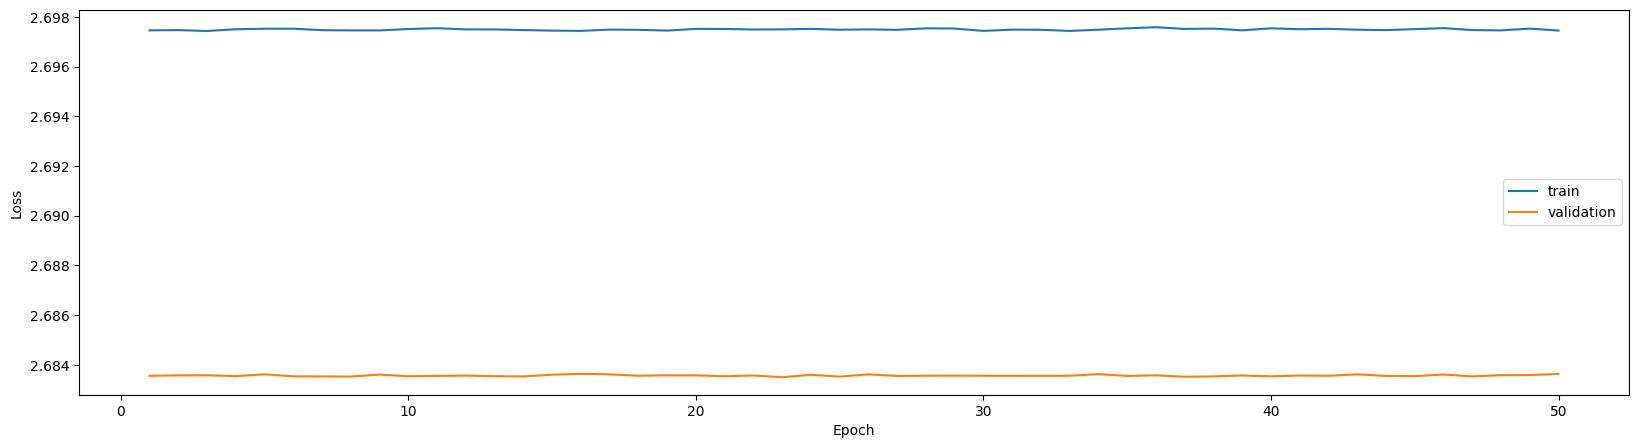

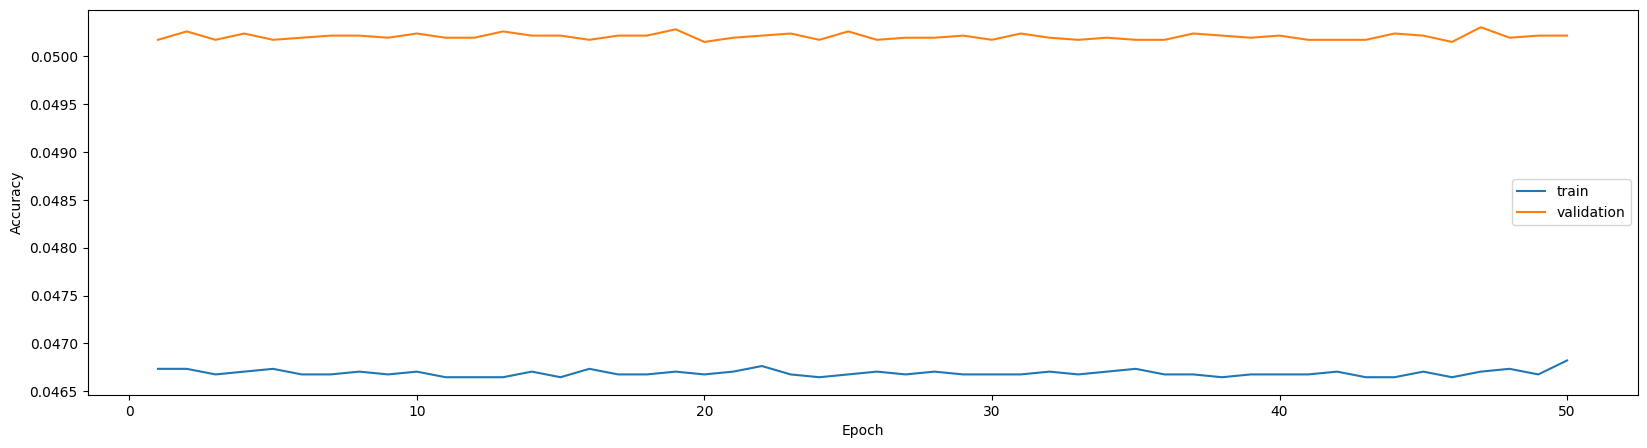

	Evaluation: 100%|██████████| 212/212 [00:02<00:00, 76.33it/s]



Test Loss: 2.679 | Test Acc: 5.01% | Test F1: 0.022 | Test ROC AUC: 0.507

Classification report:
              precision    recall  f1-score   support

           0       0.38      0.00      0.00      4770
           1       0.04      0.02      0.03       633
           2       0.09      0.01      0.02      1112
           3       0.05      0.33      0.09       683
           4       0.12      0.01      0.02      1267
           5       0.02      0.06      0.03       366
           6       0.03      0.03      0.03       300
           7       0.04      0.01      0.02       770
           8       0.01      0.01      0.01       146
           9       0.07      0.00      0.01      1517
          10       0.02      0.00      0.00       530
          11       0.01      0.01      0.01       197
          12       0.06      0.40      0.10       742
          13       0.04      0.13      0.06       483

    accuracy                           0.05     13516
   macro avg       0.07      0.07  

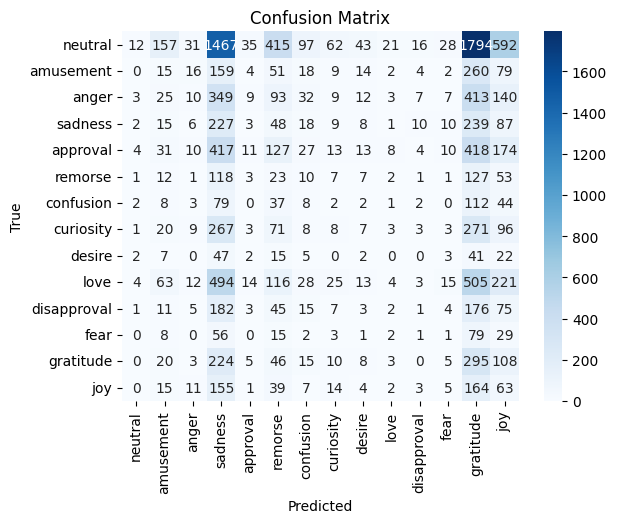

In [ ]:
# plot training curves

import matplotlib.pyplot as plt

# create epoch list
epochs = list(range(1, N_EPOCHS+1))

# plot training and validation loss
plt.figure(figsize=(20, 5))
plt.plot(epochs, train_loss_list, label='train')
plt.plot(epochs, valid_loss_list, label='validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plot training and validation accuracy
plt.figure(figsize=(20, 5))
plt.plot(epochs, train_acc_list, label='train')
plt.plot(epochs, valid_acc_list, label='validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#######
# print out required metrics

import seaborn as sns
model_ppdata.load_state_dict(torch.load('model-on-pp-data.pt'))

test_loss, test_acc, test_f1, test_roc_auc, test_report, test_cm = evaluate(model_ppdata, test_dataloader, criterion)
print(f'\nTest Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}% | Test F1: {test_f1:.3f} | Test ROC AUC: {test_roc_auc:.3f}\n')
# print(f'Confusion matrix:\n{test_cm}')
print(f'Classification report:\n{test_report}')

# plot confusion matrix
# labels for the plot - same as labels used for label_vocab
labels = OrderedDict([("neutral", 1), ("amusement", 1), ("anger", 1), ("sadness", 1), ("approval", 1), ("remorse", 1), ("confusion", 1), ("curiosity", 1), ("desire", 1), ("love", 1), ("disapproval", 1), ("fear", 1), ("gratitude", 1), ("joy", 1)])
# create the heatmap
sns.heatmap(test_cm, cmap="Blues", annot=True, fmt='g', xticklabels=labels, yticklabels=labels)
# add labels and title
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

After performing stemming, lemmatization, stop-words removal, and several other text processing steps, the accuracy significantly drops. This may be because the pre-trained vectors used to build vocabularies may not be trained on stemmed/lemmatized data. Also, these steps are only performed on the training data which makes it look very different to a real world user input (test data).

**Thus, these steps negatively impacted the accuracy and are not required for future experiments**



---





---



---



## 2.4 Vocabulary Size variation

In [ ]:
# defining auxilary functions for tokenizing

tokenizer = SpacyTokenizer()
MAX_VOCAB_SIZE = 100_000

def _process_texts_for_vocab(data):
    for line in data:
        yield tokenizer(line[0])
        
def _get_labels_for_vocab(data):
    for line in data:
        yield [line[1]]

In [ ]:
# tokenizing text and label vocabs
text_vocab = build_vocab_from_iterator(_process_texts_for_vocab(train_data), specials=('<unk>', '<pad>'), max_tokens=MAX_VOCAB_SIZE)
label_vocab = vocab(OrderedDict([("neutral", 1), ("amusement", 1), ("anger", 1), ("sadness", 1), ("approval", 1), ("remorse", 1), ("confusion", 1), ("curiosity", 1), ("desire", 1), ("love", 1), ("disapproval", 1), ("fear", 1), ("gratitude", 1), ("joy", 1)]))
text_vocab.set_default_index(text_vocab["<unk>"])

In [ ]:
# check the tokens in text and label vocabulary
print(f"Unique tokens in text vocabulary: {len(text_vocab)}")
print(f"Unique tokens in label vocabulary: {len(label_vocab)}")

Unique tokens in text vocabulary: 23881
Unique tokens in label vocabulary: 14


In [ ]:
unique_tokens = set()
for sentence, label in data:
    unique_tokens.update(tokenizer(sentence))
print(f"Number of unique tokens in training data: {len(unique_tokens)}")


Number of unique tokens in training data: 35522


### Unique tokens are already less than 25k. Increasing vocab size does not make a difference.

---
---
---


# 3.&nbsp;GoEmotions Experiment 1: Testing different pretrained vectors
In this notebook, different pre-trained vecotrs are tested

### Set up steps for notebook
---
Required packages and dependencies are installed with compatible versions and the notebook is set up to use GPU when available.

---

In [ ]:
# Install datasets
!pip install datasets

# Install dependencies
%pip install torch==1.11.0+cu113 torchdata==0.3.0 torchtext==0.12.0 -f https://download.pytorch.org/whl/cu113/torch_stable.html
%pip install spacy tqdm
!python -m spacy download en_core_web_sm

# Initialise torch and use GPU
import torch
import torchtext

SEED = 1234
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

print("PyTorch Version: ", torch.__version__)
print("torchtext Version: ", torchtext.__version__)
print(f"Using {'GPU' if str(DEVICE) == 'cuda' else 'CPU'}.")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/cu113/torch_stable.html
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
2023-04-10 13:55:50.524780: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-10 13:55:52.506580: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-04-10 13:55:56.289765: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least on

Use this cell to mount your Google Drive on the notebook. Some files in the zip folder are used to reduce repeating of some setup steps.

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Defining necessary functions and classes that will be used in each experiment

---
Functions for tokenizing the data and building vocabularies

---

In [ ]:
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator, vocab
from collections import OrderedDict
import torchtext.transforms as T

# defining a tokenizer as a PyTorch module
class SpacyTokenizer(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.tokenizer = get_tokenizer("spacy", language="en_core_web_sm")
    
    def forward(self, input):
        if isinstance(input, list):
            tokens = []
            for text in input:
                tokens.append(self.tokenizer(text))
            return tokens
        elif isinstance(input, str):
            return self.tokenizer(input)
        raise ValueError(f"Type {type(input)} is not supported.")

# defining a function to transform each text into its length
class ToLengths(torch.nn.Module):
    def forward(self, input):
        if isinstance(input[1], list):    # changed to match the order in dataset
            lengths = []
            for text in input:
                lengths.append(len(text))
            return lengths
        elif isinstance(input, list):
            return len(input)
        raise ValueError(f"Type {type(input)} is not supported.")



---


Functions required for loading data in batches


---






In [ ]:
from torch.utils.data import DataLoader

BATCH_SIZE = 64

def collate_batch(batch):
    texts, labels = zip(*batch)

    lengths = lengths_transform(list(texts))
    texts = text_transform(list(texts))
    labels = torch.tensor(list(labels), dtype=torch.int64)

    return labels.to(DEVICE), texts.to(DEVICE), lengths.cpu()


def _get_dataloader(data):
    return DataLoader(data, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_batch)
    

---
Functions required for training and evaluation

---

In [ ]:
from tqdm import tqdm
import numpy as np
from sklearn.metrics import f1_score, roc_auc_score, classification_report, confusion_matrix
import time

# defining a function for training the model
# Taken from lab but changed to be used for multi-class classification training instead of binary classification

def train(model, iterator, optimizer, criterion):    
    epoch_loss = 0
    epoch_acc = 0
    
    model.train()
    
    for batch in tqdm(iterator, desc="\tTraining"):
        optimizer.zero_grad()
                
        labels, texts, lengths = batch  # Note that this has to match the order in collate_batch
        predictions = model(texts, lengths)
        loss = criterion(predictions, labels)
        acc = categorical_accuracy(predictions, labels)
        
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

# Defining a function to evaluate using the trained model (on either validation or test sets)
# Taken from lab 5 but changed to be used for multi-class classification evaluation instead of binary classification
# Further modified to return metrics like F1 score, confusion matrix, and classification report to check scores for each class
# ChatGPT was used for debugging aur_roc code

def evaluate(model, iterator, criterion):
    epoch_loss = 0
    epoch_acc = 0
    predicted_probs = []
    true_labels = []
    
    model.eval()
    
    with torch.no_grad():
        for batch in tqdm(iterator, desc="\tEvaluation"):
            labels, texts, lengths = batch  # Note that this has to match the order in collate_batch
            predictions = model(texts, lengths)
            probs = torch.softmax(predictions, dim=1)
            loss = criterion(predictions, labels)
            acc = categorical_accuracy(predictions, labels)

            epoch_loss += loss.item()
            epoch_acc += acc.item()
            predicted_probs.extend(probs.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())
        
    predicted_probs = np.array(predicted_probs)
    true_labels = np.array(true_labels)
    predicted_labels = np.argmax(predicted_probs, axis=1)

    epoch_f1 = f1_score(true_labels, predicted_labels, average='weighted')
    epoch_auc_roc = roc_auc_score(true_labels, predicted_probs, multi_class='ovo', average='weighted')
    epoch_classification_report = classification_report(true_labels, predicted_labels)
    epoch_confusion_matrix = confusion_matrix(true_labels, predicted_labels)

    return epoch_loss / len(iterator), epoch_acc / len(iterator), epoch_f1, epoch_auc_roc, epoch_classification_report, epoch_confusion_matrix


# defining a function to check duration taken for training and testing
# taken from lab 5

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs


#defining a function to check number of parameters in the model

def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)


# defining a categorical accuracy function instead of binary accuracy
# ChatGPT was used to find this piece of code and further debugging was required to make it work as expected

def categorical_accuracy(preds, y):
    """
    Returns accuracy per batch, i.e. if you get 8/10 right, this returns 0.8, NOT 8
    """
    top_pred = preds.argmax(1, keepdim = True)
    correct = top_pred.eq(y.view_as(top_pred)).sum()
    acc = correct.float() / y.shape[0]
    return acc



---



---



---

Each variation tested has been implemented using two different methods of loading the pretrained vectors into the embedding layer of the RNN:
1. Initialize the embedding layer and then copy the weights from pretrained embeddings to this layer. Do not freeze so it is allowed to update with training. This is a type of fine-tuning the pretrained model.
2. Initialize the embedding layer with the pretrained weights and freeze these layers so they do not update while training.


## 1.A. GloVe vectors : 6B, dim = 100

In [ ]:
# from torchtext.data.functional import to_map_style_dataset

# text = torch.load("/content/drive/MyDrive/Colab Notebooks/NLP CW/preprocessed_data_1.pt")
# data = to_map_style_dataset(text)
# data[0]

["My favourite food is anything I didn't have to cook myself.", 0]

In [ ]:
from datasets import load_dataset
import pandas as pd

# load the GoEmotions dataset
goemotions_dataset = load_dataset('go_emotions')

# get the train, validation, and test splits as Pandas dataframes
train_df = goemotions_dataset['train'].to_pandas()
val_df = goemotions_dataset['validation'].to_pandas()
test_df = goemotions_dataset['test'].to_pandas()

# concatenate the splits into a single dataframe
df = pd.concat([train_df, val_df, test_df], ignore_index=True)

# duplicate the records with multiple labels
df = df.explode('labels')

# reset the index of the dataframe
df = df.reset_index(drop=True)

# print the first five rows of the resulting dataframe
print(df.head())

from torchtext.data.functional import to_map_style_dataset

### MERGING EMOTION LABELS FROM GROUP DECISIONS ###

for i, row in df.iterrows():
  # Converting Annoyance [3] into Anger [2]
  if row['labels']==3:
    row['labels']=2
  # Disappointment [9] and Grief [16] into Sadness [25]
  if row['labels']==9 or row['labels']==16:
    row['labels']=25
  # Converting Nervousness [19] into Fear [14]
  if row['labels']==19:
    row['labels']=14
  # Converting Excitement [13] into Joy [17]
  if row['labels']==13:
    row['labels']=17

#keeps just one of the records where there are labelled with both merged classes
df = df.drop_duplicates(keep = 'first')
drop_labels = (3,11,12,9,16,19,22,26,21,13,0,23,20,5)
#drops labels we are not using
df_cut = df[~df.labels.isin(drop_labels)] 
#deletes duplicates
df_cut = df_cut.drop_duplicates(subset = ['text'], keep = False)
df_cut = df_cut.reset_index(drop = True)

### REORDERING SO THAT LABELS ARE 0-13 ###
for i, row in df_cut.iterrows():
    # Converting Neutral [27] to Neutral [0]
    if row['labels']==27:
        row['labels']=0
    # Converting Sadness [25] to Sadness [3]
    if row['labels']==25:
        row['labels']=3
    # Converting Remorse [24] to Remorse [5]
    if row['labels']==24:
        row['labels']=5
    # Converting Love [18] to Love [9]
    if row['labels']==18:
        row['labels']=9
    # Converting Fear [14] to Fear [11]
    if row['labels']==14:
        row['labels']=11
    # Converting Gratitude [15] to Gratitude [12]
    if row['labels']==15:
        row['labels']=12
    # Converting Joy [17] to Joy [13]
    if row['labels']==17:
        row['labels']=13

df = df_cut
# reset the index of the dataframe
df = df.reset_index(drop=True)
df.head()

# convert dataframe to list
text = df[['text','labels']].values.tolist()

# convert the dataset into a "map-style dataset"
data = to_map_style_dataset(text)

Splitting the dataset into train, test, and validation sets

In [ ]:
from torch.utils.data import random_split

split_ratio = 0.7  # 70/30 split

# split dataset into train and test sets
train_samples = int(split_ratio * len(data))
test_samples = len(data) - train_samples
train_data, test_data = random_split(data, [train_samples, test_samples])

# split train subset into train and validation sets
train_samples = int(split_ratio * len(train_data))
valid_samples = len(train_data) - train_samples
train_data, valid_data = random_split(train_data, [train_samples, valid_samples])

print(f'Number of training examples: {len(train_data)}')
print(f'Number of validation examples: {len(valid_data)}')
print(f'Number of testing examples: {len(test_data)}')

Number of training examples: 20153
Number of validation examples: 8638
Number of testing examples: 12340


In [ ]:
from torchtext import vocab

MAX_VOCAB_SIZE = 25_000

glove_vectors = vocab.GloVe(
    name="6B",
    dim=100,
    max_vectors=MAX_VOCAB_SIZE
)


.vector_cache/glove.6B.zip: 862MB [02:38, 5.43MB/s]                           
100%|█████████▉| 24999/25000 [00:03<00:00, 7038.20it/s]


In [ ]:
from torchtext.vocab import vocab

text_vocab = vocab(glove_vectors.stoi, min_freq=0, specials=("<unk>", "<pad>"), special_first=True)
text_vocab.set_default_index(text_vocab["<unk>"])

pretrained_embeddings = glove_vectors.vectors
pretrained_embeddings = torch.cat([
    torch.empty(1, glove_vectors.dim).normal_(),  # unk token vector
    torch.zeros(1, glove_vectors.dim),  # padding token vector
    pretrained_embeddings
])

print("Vocab size: ", len(text_vocab))
print("Pretrained vectors shape: ", pretrained_embeddings.shape)
print("<unk> vector: ", pretrained_embeddings[text_vocab["<unk>"]])
print("<pad> vector: ", pretrained_embeddings[text_vocab["<pad>"]])

Vocab size:  25002
Pretrained vectors shape:  torch.Size([25002, 100])
<unk> vector:  tensor([-3.2159e-01, -5.7777e-01, -2.9265e-02, -1.1300e+00, -3.0162e-02,
         4.9286e-01, -1.8823e-01,  7.8837e-01,  2.8984e-01, -1.5768e-01,
         2.6025e-02, -4.0680e-01,  9.8217e-01,  2.1075e+00, -8.3877e-01,
         7.2692e-01, -4.6005e-01,  9.6681e-01,  1.5570e-03,  2.8862e-01,
         7.7407e-01,  5.9272e-01, -5.3478e-01,  1.4071e+00, -2.9485e-01,
         2.2609e-02, -1.9177e-02, -2.3892e+00, -2.7957e-01,  1.6830e+00,
        -7.0656e-01,  2.2796e+00,  1.2711e+00, -4.5737e-01,  5.1229e-01,
        -6.0672e-01, -7.9999e-01,  1.3928e-01,  1.1280e+00,  7.6980e-01,
        -1.2025e+00, -1.1466e+00, -5.6061e-01,  6.0446e-01, -7.0300e-01,
         1.5256e+00, -2.6371e-01,  1.2136e+00, -5.6502e-01,  3.1753e-01,
        -9.6363e-01, -7.4075e-01, -1.0862e-02,  1.2579e-01,  4.8800e-01,
         3.4939e-01,  1.1748e+00, -1.4255e+00, -5.2518e-01, -6.4616e-01,
         3.0664e-01,  1.5075e+00,  6.4

In [ ]:
from collections import OrderedDict
label_vocab = vocab(OrderedDict([("neutral", 1), ("amusement", 1), ("anger", 1), ("sadness", 1), ("approval", 1), ("remorse", 1), ("confusion", 1), ("curiosity", 1), ("desire", 1), ("love", 1), ("disapproval", 1), ("fear", 1), ("gratitude", 1), ("joy", 1)]))


In [ ]:
import torchtext.transforms as T

text_transform = T.Sequential(
    SpacyTokenizer(),  # Tokenize
    T.VocabTransform(text_vocab),  # Conver to vocab IDs
    T.ToTensor(padding_value=text_vocab["<pad>"]),  # Convert to tensor and pad
)

label_transform = T.Sequential(
    # T.LabelToIndex(label_vocab.get_itos()),  # Convert to integer #labels are already integers
    T.ToTensor(),  # Convert to tensor
)

lengths_transform = T.Sequential(
    SpacyTokenizer(),
    ToLengths(),
    T.ToTensor(),
)

In [ ]:
train_dataloader = _get_dataloader(train_data)
valid_dataloader = _get_dataloader(valid_data)
test_dataloader = _get_dataloader(test_data)

In [ ]:
# text_vocab = torch.load("text_vocab.pt")
# label_vocab = torch.load("label_vocab.pt")

In [ ]:
import torch.nn as nn
from torch import optim

# Define an RNN class
class pretrainedRNN(nn.Module):
    def __init__(self, input_dim, embedding_dim, hidden_dim, output_dim, pretrained_embeddings):        
        super().__init__()
        # self.embedding = nn.Embedding.from_pretrained(pretrained_embeddings, freeze=True, padding_idx=pad_idx)        

        self.embedding = nn.Embedding(input_dim, embedding_dim)
        self.embedding.weight.data.copy_(pretrained_embeddings) # copy pre-trained vectors to embedding layer
        self.rnn = nn.RNN(embedding_dim, hidden_dim, batch_first=True)        
        self.fc = nn.Linear(hidden_dim, output_dim)
        # self.fc = nn.Linear(hidden_dim, output_dim[1]) # output_dim[0] is hidden_dim, output_dim[1] is output_dim
        
    def forward(self, texts, lengths):
        embedded = self.embedding(texts)                          # VV note that lengths need to be on the CPU
        embedded = nn.utils.rnn.pack_padded_sequence(embedded, lengths.cpu(), batch_first=True, enforce_sorted=False)

        output, hidden = self.rnn(embedded)

        return self.fc(hidden.squeeze(0))


# Setting model building arguments
INPUT_DIM = len(text_vocab)
EMBEDDING_DIM = 100
HIDDEN_DIM = 256
OUTPUT_DIM = len(label_vocab) # 14 output nodes

model = pretrainedRNN(INPUT_DIM, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM, pretrained_embeddings) # create a RNN model using the arguments
print(f'The model has {count_parameters(model):,} trainable parameters')

# Set other parameters
optimizer = optim.Adam(model.parameters())
criterion = nn.CrossEntropyLoss()

# Use GPU
model = model.to(DEVICE)
criterion = criterion.to(DEVICE)

The model has 2,595,446 trainable parameters


In [ ]:
######
N_EPOCHS = 50
train_loss_list = []
train_acc_list = []
valid_loss_list = []
valid_acc_list = []

best_valid_loss = float('inf')
print(f"Using {'GPU' if str(DEVICE) == 'cuda' else 'CPU'} for training.")

for epoch in range(N_EPOCHS):
    print(f'Epoch: {epoch+1:02}')
    start_time = time.time()
    
    train_loss, train_acc = train(model, train_dataloader, optimizer, criterion)
    train_loss_list.append(train_loss)
    train_acc_list.append(train_acc)
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    
    # valid_loss, valid_acc = evaluate(model, valid_dataloader, criterion)
    valid_loss, valid_acc, valid_f1, valid_auc_roc, valid_report, valid_cm  = evaluate(model, valid_dataloader, criterion)
    valid_loss_list.append(valid_loss)
    valid_acc_list.append(valid_acc)
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')
    
    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'model-glove.pt')


Using GPU for training.
Epoch: 01


	Training: 100%|██████████| 315/315 [00:06<00:00, 45.43it/s]


	Train Loss: 2.059 | Train Acc: 40.07%


	Evaluation: 100%|██████████| 135/135 [00:02<00:00, 50.99it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.932 |  Val. Acc: 43.64%
Epoch: 02


	Training: 100%|██████████| 315/315 [00:03<00:00, 87.99it/s]


	Train Loss: 1.909 | Train Acc: 43.29%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 132.83it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.907 |  Val. Acc: 45.01%
Epoch: 03


	Training: 100%|██████████| 315/315 [00:03<00:00, 90.41it/s]


	Train Loss: 1.854 | Train Acc: 44.17%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 132.56it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.863 |  Val. Acc: 45.93%
Epoch: 04


	Training: 100%|██████████| 315/315 [00:04<00:00, 66.50it/s]


	Train Loss: 1.811 | Train Acc: 45.18%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 89.02it/s] 
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 2.085 |  Val. Acc: 40.52%
Epoch: 05


	Training: 100%|██████████| 315/315 [00:03<00:00, 89.35it/s]


	Train Loss: 1.931 | Train Acc: 42.19%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 130.78it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.889 |  Val. Acc: 44.40%
Epoch: 06


	Training: 100%|██████████| 315/315 [00:03<00:00, 89.32it/s]


	Train Loss: 1.737 | Train Acc: 47.54%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 134.99it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.901 |  Val. Acc: 44.88%
Epoch: 07


	Training: 100%|██████████| 315/315 [00:05<00:00, 62.82it/s]


	Train Loss: 1.652 | Train Acc: 49.86%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 104.51it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.824 |  Val. Acc: 46.57%
Epoch: 08


	Training: 100%|██████████| 315/315 [00:03<00:00, 90.61it/s]


	Train Loss: 1.505 | Train Acc: 53.61%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 130.44it/s]


	 Val. Loss: 1.861 |  Val. Acc: 44.84%
Epoch: 09


	Training: 100%|██████████| 315/315 [00:03<00:00, 89.28it/s]


	Train Loss: 1.392 | Train Acc: 56.64%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 129.66it/s]


	 Val. Loss: 1.908 |  Val. Acc: 45.32%
Epoch: 10


	Training: 100%|██████████| 315/315 [00:05<00:00, 62.68it/s]


	Train Loss: 1.294 | Train Acc: 59.56%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 124.18it/s]


	 Val. Loss: 1.904 |  Val. Acc: 45.00%
Epoch: 11


	Training: 100%|██████████| 315/315 [00:03<00:00, 89.01it/s]


	Train Loss: 1.262 | Train Acc: 60.81%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 129.47it/s]


	 Val. Loss: 2.056 |  Val. Acc: 40.45%
Epoch: 12


	Training: 100%|██████████| 315/315 [00:05<00:00, 62.26it/s]


	Train Loss: 1.175 | Train Acc: 63.38%


	Evaluation: 100%|██████████| 135/135 [00:02<00:00, 56.63it/s]


	 Val. Loss: 2.070 |  Val. Acc: 43.34%
Epoch: 13


	Training: 100%|██████████| 315/315 [00:04<00:00, 74.95it/s]


	Train Loss: 1.255 | Train Acc: 61.11%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 132.61it/s]


	 Val. Loss: 2.258 |  Val. Acc: 42.86%
Epoch: 14


	Training: 100%|██████████| 315/315 [00:03<00:00, 90.52it/s]


	Train Loss: 1.038 | Train Acc: 67.79%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 133.29it/s]


	 Val. Loss: 2.231 |  Val. Acc: 43.33%
Epoch: 15


	Training: 100%|██████████| 315/315 [00:04<00:00, 76.91it/s]


	Train Loss: 0.929 | Train Acc: 71.14%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 87.75it/s]


	 Val. Loss: 2.289 |  Val. Acc: 42.58%
Epoch: 16


	Training: 100%|██████████| 315/315 [00:03<00:00, 79.42it/s]


	Train Loss: 0.870 | Train Acc: 72.75%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 135.21it/s]


	 Val. Loss: 2.422 |  Val. Acc: 38.16%
Epoch: 17


	Training: 100%|██████████| 315/315 [00:03<00:00, 89.43it/s]


	Train Loss: 0.782 | Train Acc: 75.62%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 130.86it/s]


	 Val. Loss: 2.541 |  Val. Acc: 38.20%
Epoch: 18


	Training: 100%|██████████| 315/315 [00:04<00:00, 74.74it/s]


	Train Loss: 0.724 | Train Acc: 77.58%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 86.91it/s]


	 Val. Loss: 2.698 |  Val. Acc: 35.89%
Epoch: 19


	Training: 100%|██████████| 315/315 [00:03<00:00, 82.33it/s]


	Train Loss: 0.710 | Train Acc: 78.25%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 131.85it/s]


	 Val. Loss: 2.707 |  Val. Acc: 38.58%
Epoch: 20


	Training: 100%|██████████| 315/315 [00:03<00:00, 88.92it/s]


	Train Loss: 0.697 | Train Acc: 78.72%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 132.41it/s]


	 Val. Loss: 2.787 |  Val. Acc: 34.15%
Epoch: 21


	Training: 100%|██████████| 315/315 [00:04<00:00, 71.42it/s]


	Train Loss: 0.695 | Train Acc: 78.46%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 85.38it/s]


	 Val. Loss: 2.907 |  Val. Acc: 37.12%
Epoch: 22


	Training: 100%|██████████| 315/315 [00:03<00:00, 87.24it/s]


	Train Loss: 0.536 | Train Acc: 83.37%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 127.24it/s]


	 Val. Loss: 3.000 |  Val. Acc: 38.23%
Epoch: 23


	Training: 100%|██████████| 315/315 [00:03<00:00, 89.89it/s]


	Train Loss: 0.453 | Train Acc: 86.28%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 126.95it/s]


	 Val. Loss: 3.182 |  Val. Acc: 38.20%
Epoch: 24


	Training: 100%|██████████| 315/315 [00:04<00:00, 65.28it/s]


	Train Loss: 0.434 | Train Acc: 86.75%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 90.11it/s]


	 Val. Loss: 3.435 |  Val. Acc: 35.53%
Epoch: 25


	Training: 100%|██████████| 315/315 [00:03<00:00, 89.74it/s]


	Train Loss: 0.383 | Train Acc: 88.29%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 133.75it/s]


	 Val. Loss: 3.461 |  Val. Acc: 36.36%
Epoch: 26


	Training: 100%|██████████| 315/315 [00:03<00:00, 90.05it/s]


	Train Loss: 0.471 | Train Acc: 85.27%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 134.81it/s]


	 Val. Loss: 3.467 |  Val. Acc: 35.82%
Epoch: 27


	Training: 100%|██████████| 315/315 [00:04<00:00, 63.85it/s]


	Train Loss: 0.420 | Train Acc: 87.25%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 105.22it/s]


	 Val. Loss: 3.570 |  Val. Acc: 37.30%
Epoch: 28


	Training: 100%|██████████| 315/315 [00:03<00:00, 90.63it/s]


	Train Loss: 0.297 | Train Acc: 91.09%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 136.35it/s]


	 Val. Loss: 3.712 |  Val. Acc: 36.93%
Epoch: 29


	Training: 100%|██████████| 315/315 [00:03<00:00, 90.94it/s]


	Train Loss: 0.256 | Train Acc: 92.28%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 132.17it/s]


	 Val. Loss: 3.970 |  Val. Acc: 37.10%
Epoch: 30


	Training: 100%|██████████| 315/315 [00:04<00:00, 63.45it/s]


	Train Loss: 0.206 | Train Acc: 93.94%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 122.86it/s]


	 Val. Loss: 4.208 |  Val. Acc: 35.48%
Epoch: 31


	Training: 100%|██████████| 315/315 [00:03<00:00, 92.44it/s]


	Train Loss: 0.234 | Train Acc: 92.82%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 136.64it/s]


	 Val. Loss: 4.252 |  Val. Acc: 38.10%
Epoch: 32


	Training: 100%|██████████| 315/315 [00:03<00:00, 92.55it/s]


	Train Loss: 0.220 | Train Acc: 93.25%


	Evaluation: 100%|██████████| 135/135 [00:02<00:00, 47.30it/s]


	 Val. Loss: 4.353 |  Val. Acc: 35.80%
Epoch: 33


	Training: 100%|██████████| 315/315 [00:04<00:00, 69.21it/s]


	Train Loss: 0.249 | Train Acc: 92.23%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 132.90it/s]


	 Val. Loss: 4.427 |  Val. Acc: 36.18%
Epoch: 34


	Training: 100%|██████████| 315/315 [00:03<00:00, 89.95it/s]


	Train Loss: 0.205 | Train Acc: 93.62%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 130.15it/s]


	 Val. Loss: 4.530 |  Val. Acc: 35.67%
Epoch: 35


	Training: 100%|██████████| 315/315 [00:03<00:00, 86.84it/s]


	Train Loss: 0.176 | Train Acc: 94.59%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 88.14it/s]


	 Val. Loss: 4.744 |  Val. Acc: 34.56%
Epoch: 36


	Training: 100%|██████████| 315/315 [00:04<00:00, 71.30it/s]


	Train Loss: 0.212 | Train Acc: 93.34%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 131.94it/s]


	 Val. Loss: 4.679 |  Val. Acc: 35.65%
Epoch: 37


	Training: 100%|██████████| 315/315 [00:04<00:00, 65.98it/s]


	Train Loss: 0.241 | Train Acc: 92.25%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 133.44it/s]


	 Val. Loss: 4.861 |  Val. Acc: 34.73%
Epoch: 38


	Training: 100%|██████████| 315/315 [00:12<00:00, 25.83it/s]


	Train Loss: 0.161 | Train Acc: 95.09%


	Evaluation: 100%|██████████| 135/135 [00:03<00:00, 41.69it/s]


	 Val. Loss: 4.967 |  Val. Acc: 37.42%
Epoch: 39


	Training: 100%|██████████| 315/315 [00:10<00:00, 29.71it/s]


	Train Loss: 0.146 | Train Acc: 95.54%


	Evaluation: 100%|██████████| 135/135 [00:02<00:00, 65.80it/s]


	 Val. Loss: 4.974 |  Val. Acc: 36.26%
Epoch: 40


	Training: 100%|██████████| 315/315 [00:03<00:00, 89.21it/s]


	Train Loss: 0.111 | Train Acc: 96.77%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 126.16it/s]


	 Val. Loss: 5.084 |  Val. Acc: 35.55%
Epoch: 41


	Training: 100%|██████████| 315/315 [00:04<00:00, 75.05it/s]


	Train Loss: 0.147 | Train Acc: 95.61%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 88.47it/s]


	 Val. Loss: 5.229 |  Val. Acc: 34.22%
Epoch: 42


	Training: 100%|██████████| 315/315 [00:03<00:00, 81.23it/s]


	Train Loss: 0.395 | Train Acc: 87.76%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 127.17it/s]


	 Val. Loss: 4.778 |  Val. Acc: 35.61%
Epoch: 43


	Training: 100%|██████████| 315/315 [00:03<00:00, 90.92it/s]


	Train Loss: 0.220 | Train Acc: 93.11%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 132.75it/s]


	 Val. Loss: 4.847 |  Val. Acc: 35.59%
Epoch: 44


	Training: 100%|██████████| 315/315 [00:04<00:00, 72.26it/s]


	Train Loss: 0.128 | Train Acc: 96.24%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 87.02it/s]


	 Val. Loss: 5.086 |  Val. Acc: 36.94%
Epoch: 45


	Training: 100%|██████████| 315/315 [00:03<00:00, 85.35it/s]


	Train Loss: 0.072 | Train Acc: 98.14%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 135.87it/s]


	 Val. Loss: 5.201 |  Val. Acc: 36.53%
Epoch: 46


	Training: 100%|██████████| 315/315 [00:03<00:00, 90.99it/s]


	Train Loss: 0.053 | Train Acc: 98.66%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 134.95it/s]


	 Val. Loss: 5.285 |  Val. Acc: 36.75%
Epoch: 47


	Training: 100%|██████████| 315/315 [00:04<00:00, 70.97it/s]


	Train Loss: 0.067 | Train Acc: 98.22%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 83.46it/s]


	 Val. Loss: 5.457 |  Val. Acc: 35.74%
Epoch: 48


	Training: 100%|██████████| 315/315 [00:03<00:00, 89.23it/s]


	Train Loss: 0.190 | Train Acc: 93.96%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 130.30it/s]


	 Val. Loss: 5.264 |  Val. Acc: 35.17%
Epoch: 49


	Training: 100%|██████████| 315/315 [00:03<00:00, 89.57it/s]


	Train Loss: 0.435 | Train Acc: 86.83%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 132.31it/s]


	 Val. Loss: 4.883 |  Val. Acc: 32.74%
Epoch: 50


	Training: 100%|██████████| 315/315 [00:04<00:00, 67.02it/s]


	Train Loss: 0.252 | Train Acc: 92.08%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 88.53it/s]


	 Val. Loss: 4.972 |  Val. Acc: 34.75%


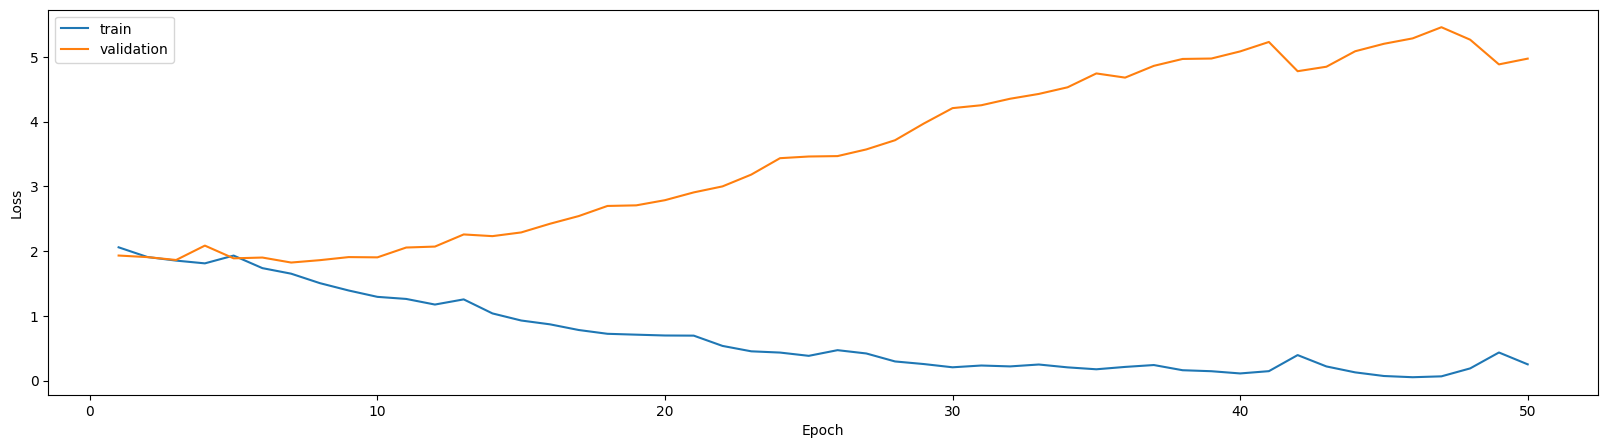

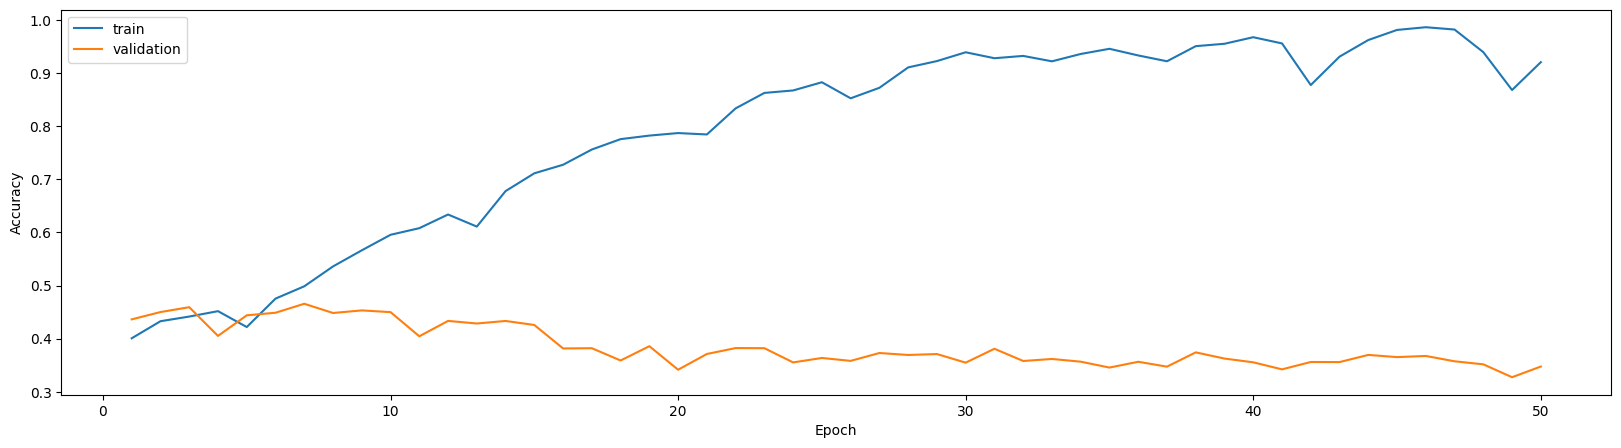

	Evaluation: 100%|██████████| 193/193 [00:02<00:00, 85.84it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Test Loss: 1.801 | Test Acc: 47.24% | Test F1: 0.403 | Test ROC AUC: 0.742

Classification report:
              precision    recall  f1-score   support

           0       0.51      0.83      0.63      4983
           1       0.30      0.13      0.18       672
           2       0.32      0.11      0.17      1070
           3       0.39      0.21      0.27       667
           4       0.12      0.04      0.06       837
           5       0.39      0.14      0.21       144
           6       0.25      0.01      0.02       351
           7       0.40      0.20      0.27       551
           8       0.00      0.00      0.00       200
           9       0.56      0.65      0.60       614
          10       0.17      0.01      0.02       570
          11       0.40      0.20      0.27       208
          12       0.54      0.64      0.58       844
          13       0.24      0.29      0.27       629

    accuracy                           0.47     12340
   macro avg       0.33      0.25 

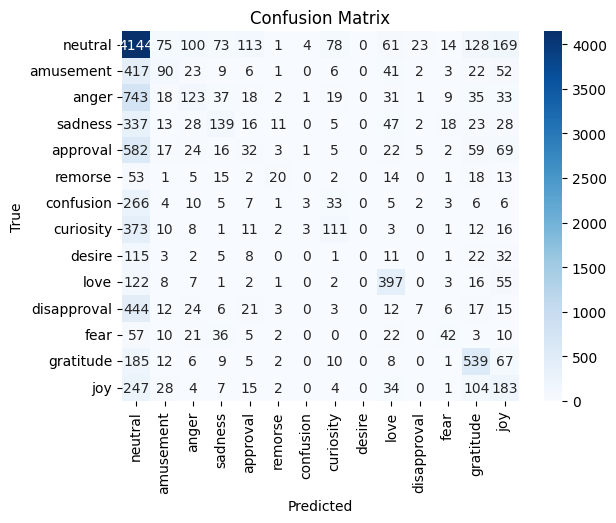

In [ ]:
# plot training curves

import matplotlib.pyplot as plt

# create epoch list
epochs = list(range(1, N_EPOCHS+1))

# plot training and validation loss
plt.figure(figsize=(20, 5))
plt.plot(epochs, train_loss_list, label='train')
plt.plot(epochs, valid_loss_list, label='validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plot training and validation accuracy
plt.figure(figsize=(20, 5))
plt.plot(epochs, train_acc_list, label='train')
plt.plot(epochs, valid_acc_list, label='validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#######
# print out required metrics

import seaborn as sns
model.load_state_dict(torch.load('model-glove.pt'))

test_loss, test_acc, test_f1, test_roc_auc, test_report, test_cm = evaluate(model, test_dataloader, criterion)
print(f'\nTest Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}% | Test F1: {test_f1:.3f} | Test ROC AUC: {test_roc_auc:.3f}\n')
# print(f'Confusion matrix:\n{test_cm}')
print(f'Classification report:\n{test_report}')

# plot confusion matrix
# labels for the plot - same as labels used for label_vocab
labels = OrderedDict([("neutral", 1), ("amusement", 1), ("anger", 1), ("sadness", 1), ("approval", 1), ("remorse", 1), ("confusion", 1), ("curiosity", 1), ("desire", 1), ("love", 1), ("disapproval", 1), ("fear", 1), ("gratitude", 1), ("joy", 1)])
# create the heatmap
sns.heatmap(test_cm, cmap="Blues", annot=True, fmt='g', xticklabels=labels, yticklabels=labels)
# add labels and title
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()



---



---



---



In [ ]:
import torch.nn as nn
from torch import optim

# Define an RNN class
class pretrainedRNN1(nn.Module):
    def __init__(self, input_dim, embedding_dim, hidden_dim, output_dim, pretrained_embeddings, pad_idx):        
        super().__init__()
        self.embedding = nn.Embedding.from_pretrained(pretrained_embeddings, freeze=True, padding_idx=pad_idx)        
        # self.embedding = nn.Embedding(input_dim, embedding_dim)
        # self.embedding.weight.data.copy_(pretrained_embeddings) # copy pre-trained vectors to embedding layer
        self.rnn = nn.RNN(embedding_dim, hidden_dim, batch_first=True)        
        self.fc = nn.Linear(hidden_dim, output_dim)
        # self.fc = nn.Linear(hidden_dim, output_dim[1]) # output_dim[0] is hidden_dim, output_dim[1] is output_dim
        
    def forward(self, texts, lengths):
        embedded = self.embedding(texts)                          # VV note that lengths need to be on the CPU
        embedded = nn.utils.rnn.pack_padded_sequence(embedded, lengths.cpu(), batch_first=True, enforce_sorted=False)

        output, hidden = self.rnn(embedded)

        return self.fc(hidden.squeeze(0))


# Setting model building arguments
INPUT_DIM = len(text_vocab)
EMBEDDING_DIM = 100
HIDDEN_DIM = 256
OUTPUT_DIM = len(label_vocab) # 14 output nodes
PAD_IDX = text_vocab["<pad>"]

model_glove_1 = pretrainedRNN1(INPUT_DIM, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM, pretrained_embeddings, PAD_IDX) # create a RNN model using the arguments
print(f'The model has {count_parameters(model_glove_1):,} trainable parameters')

# Set other parameters
optimizer = optim.Adam(model_glove_1.parameters())
criterion = nn.CrossEntropyLoss()

# Use GPU
model_glove_1 = model_glove_1.to(DEVICE)
criterion = criterion.to(DEVICE)

The model has 95,246 trainable parameters


In [ ]:
######
N_EPOCHS = 50
train_loss_list = []
train_acc_list = []
valid_loss_list = []
valid_acc_list = []

best_valid_loss = float('inf')
print(f"Using {'GPU' if str(DEVICE) == 'cuda' else 'CPU'} for training.")

for epoch in range(N_EPOCHS):
    print(f'Epoch: {epoch+1:02}')
    start_time = time.time()
    
    train_loss, train_acc = train(model_glove_1, train_dataloader, optimizer, criterion)
    train_loss_list.append(train_loss)
    train_acc_list.append(train_acc)
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    
    # valid_loss, valid_acc = evaluate(model, valid_dataloader, criterion)
    valid_loss, valid_acc, valid_f1, valid_auc_roc, valid_report, valid_cm  = evaluate(model_glove_1, valid_dataloader, criterion)
    valid_loss_list.append(valid_loss)
    valid_acc_list.append(valid_acc)
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')
    
    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model_glove_1.state_dict(), 'model_glove_1.pt')


Using GPU for training.
Epoch: 01


	Training: 100%|██████████| 315/315 [00:03<00:00, 87.71it/s]


	Train Loss: 2.063 | Train Acc: 39.90%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 91.82it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 2.019 |  Val. Acc: 41.14%
Epoch: 02


	Training: 100%|██████████| 315/315 [00:03<00:00, 91.24it/s] 


	Train Loss: 1.970 | Train Acc: 41.50%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 139.13it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 2.079 |  Val. Acc: 41.26%
Epoch: 03


	Training: 100%|██████████| 315/315 [00:02<00:00, 107.63it/s]


	Train Loss: 1.913 | Train Acc: 42.86%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 137.40it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.972 |  Val. Acc: 42.30%
Epoch: 04


	Training: 100%|██████████| 315/315 [00:02<00:00, 105.54it/s]


	Train Loss: 1.887 | Train Acc: 43.23%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 92.21it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.888 |  Val. Acc: 44.69%
Epoch: 05


	Training: 100%|██████████| 315/315 [00:04<00:00, 76.56it/s] 


	Train Loss: 1.959 | Train Acc: 41.54%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 139.10it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.942 |  Val. Acc: 42.42%
Epoch: 06


	Training: 100%|██████████| 315/315 [00:02<00:00, 109.20it/s]


	Train Loss: 1.896 | Train Acc: 42.72%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 140.94it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.948 |  Val. Acc: 42.41%
Epoch: 07


	Training: 100%|██████████| 315/315 [00:02<00:00, 106.58it/s]


	Train Loss: 1.906 | Train Acc: 42.96%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 137.92it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.995 |  Val. Acc: 40.72%
Epoch: 08


	Training: 100%|██████████| 315/315 [00:04<00:00, 71.81it/s]


	Train Loss: 1.917 | Train Acc: 42.35%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 103.66it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.910 |  Val. Acc: 43.69%
Epoch: 09


	Training: 100%|██████████| 315/315 [00:03<00:00, 104.77it/s]


	Train Loss: 1.832 | Train Acc: 44.29%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 133.83it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.925 |  Val. Acc: 43.57%
Epoch: 10


	Training: 100%|██████████| 315/315 [00:02<00:00, 107.47it/s]


	Train Loss: 1.947 | Train Acc: 42.57%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 137.77it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 2.004 |  Val. Acc: 41.83%
Epoch: 11


	Training: 100%|██████████| 315/315 [00:03<00:00, 80.51it/s]


	Train Loss: 1.897 | Train Acc: 43.74%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 88.56it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.883 |  Val. Acc: 45.20%
Epoch: 12


	Training: 100%|██████████| 315/315 [00:03<00:00, 96.45it/s] 


	Train Loss: 1.859 | Train Acc: 43.98%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 138.77it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.858 |  Val. Acc: 45.07%
Epoch: 13


	Training: 100%|██████████| 315/315 [00:02<00:00, 106.52it/s]


	Train Loss: 1.774 | Train Acc: 46.29%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 137.99it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.924 |  Val. Acc: 44.76%
Epoch: 14


	Training: 100%|██████████| 315/315 [00:03<00:00, 95.36it/s]


	Train Loss: 1.766 | Train Acc: 46.23%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 93.74it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.908 |  Val. Acc: 44.52%
Epoch: 15


	Training: 100%|██████████| 315/315 [00:05<00:00, 62.82it/s] 


	Train Loss: 1.855 | Train Acc: 44.13%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 131.42it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.961 |  Val. Acc: 42.88%
Epoch: 16


	Training: 100%|██████████| 315/315 [00:02<00:00, 107.36it/s]


	Train Loss: 1.819 | Train Acc: 44.38%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 137.58it/s]


	 Val. Loss: 1.904 |  Val. Acc: 43.55%
Epoch: 17


	Training: 100%|██████████| 315/315 [00:03<00:00, 100.50it/s]


	Train Loss: 1.777 | Train Acc: 45.37%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 92.33it/s]


	 Val. Loss: 1.914 |  Val. Acc: 43.51%
Epoch: 18


	Training: 100%|██████████| 315/315 [00:03<00:00, 78.88it/s] 


	Train Loss: 1.777 | Train Acc: 44.77%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 137.23it/s]


	 Val. Loss: 1.923 |  Val. Acc: 42.68%
Epoch: 19


	Training: 100%|██████████| 315/315 [00:02<00:00, 107.15it/s]


	Train Loss: 1.700 | Train Acc: 47.36%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 138.83it/s]


	 Val. Loss: 1.957 |  Val. Acc: 44.37%
Epoch: 20


	Training: 100%|██████████| 315/315 [00:02<00:00, 108.63it/s]


	Train Loss: 1.729 | Train Acc: 46.61%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 134.48it/s]


	 Val. Loss: 1.918 |  Val. Acc: 41.18%
Epoch: 21


	Training: 100%|██████████| 315/315 [00:04<00:00, 72.17it/s]


	Train Loss: 1.694 | Train Acc: 47.52%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 120.03it/s]


	 Val. Loss: 2.016 |  Val. Acc: 39.76%
Epoch: 22


	Training: 100%|██████████| 315/315 [00:02<00:00, 107.07it/s]


	Train Loss: 1.673 | Train Acc: 48.27%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 140.02it/s]


	 Val. Loss: 1.889 |  Val. Acc: 44.33%
Epoch: 23


	Training: 100%|██████████| 315/315 [00:02<00:00, 108.18it/s]


	Train Loss: 1.623 | Train Acc: 49.23%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 138.95it/s]


	 Val. Loss: 1.866 |  Val. Acc: 46.35%
Epoch: 24


	Training: 100%|██████████| 315/315 [00:03<00:00, 82.02it/s]


	Train Loss: 1.652 | Train Acc: 48.17%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 91.32it/s]


	 Val. Loss: 1.917 |  Val. Acc: 42.95%
Epoch: 25


	Training: 100%|██████████| 315/315 [00:03<00:00, 101.23it/s]


	Train Loss: 1.609 | Train Acc: 49.28%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 136.88it/s]


	 Val. Loss: 1.877 |  Val. Acc: 45.57%
Epoch: 26


	Training: 100%|██████████| 315/315 [00:02<00:00, 106.44it/s]


	Train Loss: 1.633 | Train Acc: 49.13%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 137.87it/s]


	 Val. Loss: 1.909 |  Val. Acc: 44.56%
Epoch: 27


	Training: 100%|██████████| 315/315 [00:03<00:00, 96.77it/s]


	Train Loss: 1.594 | Train Acc: 49.93%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 90.58it/s]


	 Val. Loss: 2.224 |  Val. Acc: 27.18%
Epoch: 28


	Training: 100%|██████████| 315/315 [00:03<00:00, 82.12it/s] 


	Train Loss: 1.768 | Train Acc: 45.52%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 138.32it/s]


	 Val. Loss: 1.933 |  Val. Acc: 43.12%
Epoch: 29


	Training: 100%|██████████| 315/315 [00:02<00:00, 108.37it/s]


	Train Loss: 1.541 | Train Acc: 51.18%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 141.01it/s]


	 Val. Loss: 1.844 |  Val. Acc: 46.33%
Epoch: 30


	Training: 100%|██████████| 315/315 [00:02<00:00, 106.72it/s]


	Train Loss: 1.528 | Train Acc: 51.75%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 112.24it/s]


	 Val. Loss: 1.873 |  Val. Acc: 44.29%
Epoch: 31


	Training: 100%|██████████| 315/315 [00:04<00:00, 72.18it/s]


	Train Loss: 1.552 | Train Acc: 50.90%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 139.61it/s]


	 Val. Loss: 1.924 |  Val. Acc: 43.72%
Epoch: 32


	Training: 100%|██████████| 315/315 [00:03<00:00, 104.20it/s]


	Train Loss: 1.580 | Train Acc: 50.43%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 138.54it/s]


	 Val. Loss: 1.924 |  Val. Acc: 42.75%
Epoch: 33


	Training: 100%|██████████| 315/315 [00:02<00:00, 108.07it/s]


	Train Loss: 1.482 | Train Acc: 52.62%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 138.79it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 2.197 |  Val. Acc: 41.79%
Epoch: 34


	Training: 100%|██████████| 315/315 [00:04<00:00, 77.15it/s]


	Train Loss: 1.612 | Train Acc: 49.16%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 89.93it/s]


	 Val. Loss: 1.929 |  Val. Acc: 44.36%
Epoch: 35


	Training: 100%|██████████| 315/315 [00:02<00:00, 105.50it/s]


	Train Loss: 1.485 | Train Acc: 52.74%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 137.21it/s]


	 Val. Loss: 2.190 |  Val. Acc: 42.23%
Epoch: 36


	Training: 100%|██████████| 315/315 [00:02<00:00, 107.13it/s]


	Train Loss: 1.591 | Train Acc: 49.81%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 132.79it/s]


	 Val. Loss: 1.937 |  Val. Acc: 44.28%
Epoch: 37


	Training: 100%|██████████| 315/315 [00:03<00:00, 89.59it/s]


	Train Loss: 1.809 | Train Acc: 44.58%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 92.07it/s]


	 Val. Loss: 1.994 |  Val. Acc: 41.75%
Epoch: 38


	Training: 100%|██████████| 315/315 [00:03<00:00, 87.13it/s] 


	Train Loss: 1.703 | Train Acc: 46.71%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 141.48it/s]


	 Val. Loss: 1.995 |  Val. Acc: 41.34%
Epoch: 39


	Training: 100%|██████████| 315/315 [00:02<00:00, 107.52it/s]


	Train Loss: 1.623 | Train Acc: 48.68%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 140.12it/s]


	 Val. Loss: 2.015 |  Val. Acc: 41.95%
Epoch: 40


	Training: 100%|██████████| 315/315 [00:02<00:00, 107.49it/s]


	Train Loss: 1.518 | Train Acc: 51.67%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 98.91it/s]


	 Val. Loss: 1.931 |  Val. Acc: 44.37%
Epoch: 41


	Training: 100%|██████████| 315/315 [00:04<00:00, 73.30it/s]


	Train Loss: 1.497 | Train Acc: 52.59%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 140.56it/s]


	 Val. Loss: 1.957 |  Val. Acc: 43.01%
Epoch: 42


	Training: 100%|██████████| 315/315 [00:02<00:00, 107.36it/s]


	Train Loss: 1.410 | Train Acc: 54.78%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 139.88it/s]


	 Val. Loss: 1.988 |  Val. Acc: 44.98%
Epoch: 43


	Training: 100%|██████████| 315/315 [00:02<00:00, 108.48it/s]


	Train Loss: 1.494 | Train Acc: 52.50%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 137.65it/s]


	 Val. Loss: 1.963 |  Val. Acc: 44.39%
Epoch: 44


	Training: 100%|██████████| 315/315 [00:04<00:00, 75.53it/s]


	Train Loss: 1.340 | Train Acc: 56.44%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 88.12it/s]


	 Val. Loss: 2.007 |  Val. Acc: 42.86%
Epoch: 45


	Training: 100%|██████████| 315/315 [00:02<00:00, 107.36it/s]


	Train Loss: 1.531 | Train Acc: 51.97%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 137.43it/s]


	 Val. Loss: 2.009 |  Val. Acc: 42.76%
Epoch: 46


	Training: 100%|██████████| 315/315 [00:02<00:00, 106.70it/s]


	Train Loss: 1.622 | Train Acc: 48.87%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 140.11it/s]


	 Val. Loss: 2.057 |  Val. Acc: 41.45%
Epoch: 47


	Training: 100%|██████████| 315/315 [00:03<00:00, 89.96it/s]


	Train Loss: 1.603 | Train Acc: 49.55%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 91.19it/s]


	 Val. Loss: 1.981 |  Val. Acc: 43.38%
Epoch: 48


	Training: 100%|██████████| 315/315 [00:03<00:00, 87.14it/s] 


	Train Loss: 1.393 | Train Acc: 55.37%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 137.00it/s]


	 Val. Loss: 2.008 |  Val. Acc: 43.57%
Epoch: 49


	Training: 100%|██████████| 315/315 [00:02<00:00, 107.00it/s]


	Train Loss: 1.338 | Train Acc: 56.79%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 126.14it/s]


	 Val. Loss: 2.027 |  Val. Acc: 42.07%
Epoch: 50


	Training: 100%|██████████| 315/315 [00:03<00:00, 104.18it/s]


	Train Loss: 1.324 | Train Acc: 56.68%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 89.80it/s]


	 Val. Loss: 2.047 |  Val. Acc: 41.45%


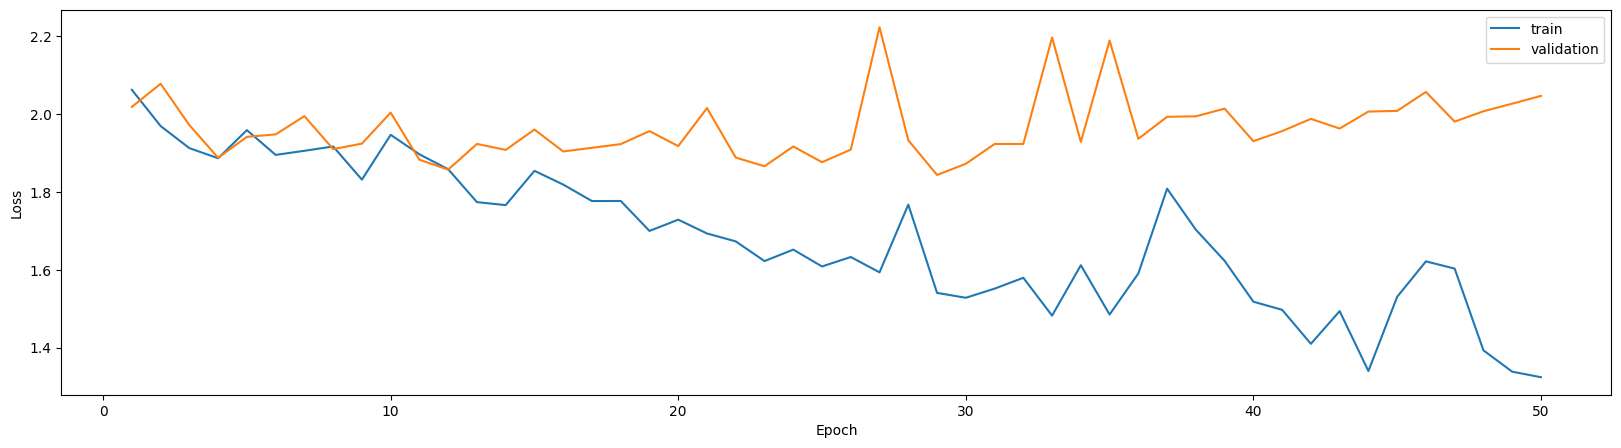

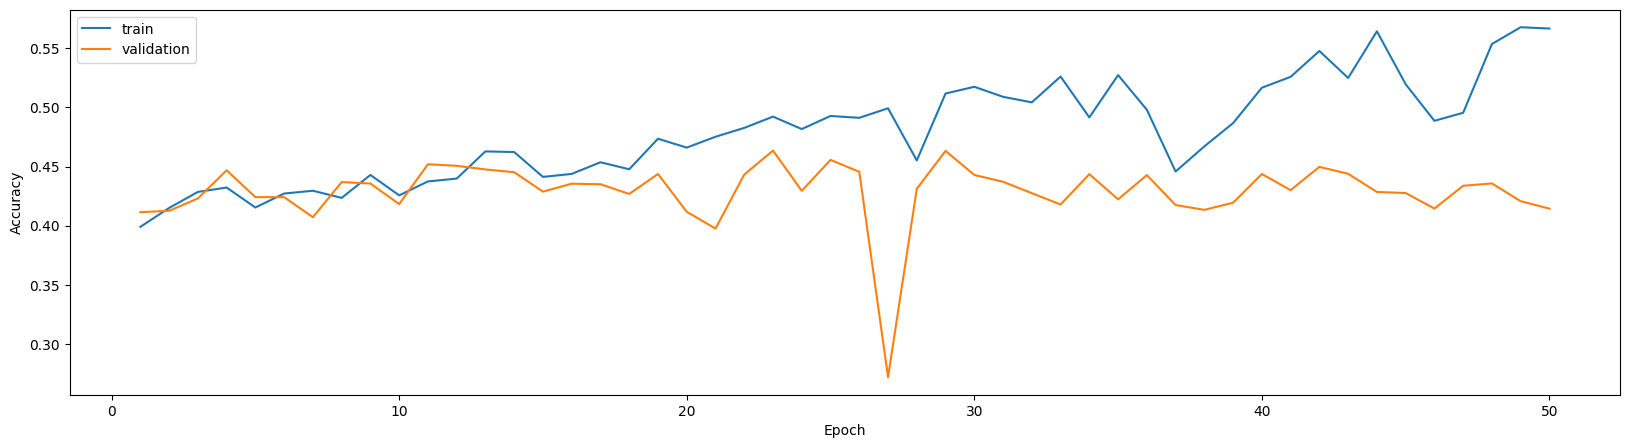

	Evaluation: 100%|██████████| 193/193 [00:02<00:00, 91.63it/s]



Test Loss: 2.027 | Test Acc: 41.92% | Test F1: 0.378 | Test ROC AUC: 0.713

Classification report:
              precision    recall  f1-score   support

           0       0.50      0.71      0.59      4983
           1       0.24      0.13      0.17       672
           2       0.26      0.12      0.16      1070
           3       0.27      0.07      0.11       667
           4       0.11      0.08      0.10       837
           5       0.16      0.07      0.10       144
           6       0.10      0.07      0.09       351
           7       0.33      0.25      0.29       551
           8       0.00      0.00      0.00       200
           9       0.63      0.54      0.58       614
          10       0.12      0.14      0.13       570
          11       0.27      0.07      0.11       208
          12       0.50      0.68      0.58       844
          13       0.31      0.20      0.24       629

    accuracy                           0.42     12340
   macro avg       0.27      0.22 

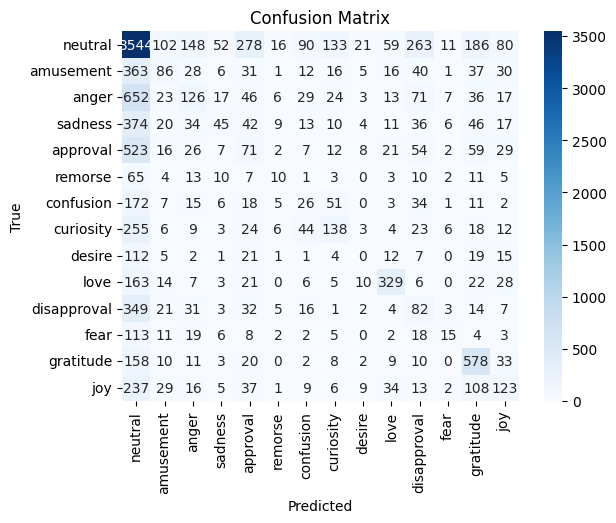

In [ ]:
# plot training curves

import matplotlib.pyplot as plt

# create epoch list
epochs = list(range(1, N_EPOCHS+1))

# plot training and validation loss
plt.figure(figsize=(20, 5))
plt.plot(epochs, train_loss_list, label='train')
plt.plot(epochs, valid_loss_list, label='validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plot training and validation accuracy
plt.figure(figsize=(20, 5))
plt.plot(epochs, train_acc_list, label='train')
plt.plot(epochs, valid_acc_list, label='validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#######
# print out required metrics

import seaborn as sns
model.load_state_dict(torch.load('model_glove_1.pt'))

test_loss, test_acc, test_f1, test_roc_auc, test_report, test_cm = evaluate(model_glove_1, test_dataloader, criterion)
print(f'\nTest Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}% | Test F1: {test_f1:.3f} | Test ROC AUC: {test_roc_auc:.3f}\n')
# print(f'Confusion matrix:\n{test_cm}')
print(f'Classification report:\n{test_report}')

# plot confusion matrix
# labels for the plot - same as labels used for label_vocab
labels = OrderedDict([("neutral", 1), ("amusement", 1), ("anger", 1), ("sadness", 1), ("approval", 1), ("remorse", 1), ("confusion", 1), ("curiosity", 1), ("desire", 1), ("love", 1), ("disapproval", 1), ("fear", 1), ("gratitude", 1), ("joy", 1)])
# create the heatmap
sns.heatmap(test_cm, cmap="Blues", annot=True, fmt='g', xticklabels=labels, yticklabels=labels)
# add labels and title
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()




---



---



---

## 1.B. GloVe vectors : 42B, dim = 300

In [ ]:
# import torchtext
from torchtext import vocab

# torchtext.utils.download_from_url("https://nlp.stanford.edu/data/glove.42B.100d.zip", root=".vector_cache")

MAX_VOCAB_SIZE = 25_000

glove_vectors1 = vocab.GloVe(
    name="42B",
    dim=300,
    max_vectors=MAX_VOCAB_SIZE
)

100%|█████████▉| 24999/25000 [00:02<00:00, 9350.80it/s] 


In [ ]:
from torchtext.vocab import vocab

text_vocab = vocab(glove_vectors1.stoi, min_freq=0, specials=("<unk>", "<pad>"), special_first=True)
text_vocab.set_default_index(text_vocab["<unk>"])

pretrained_embeddings = glove_vectors1.vectors
pretrained_embeddings = torch.cat([
    torch.empty(1, glove_vectors1.dim).normal_(),  # unk token vector
    torch.zeros(1, glove_vectors1.dim),  # padding token vector
    pretrained_embeddings
])

print("Vocab size: ", len(text_vocab))
print("Pretrained vectors shape: ", pretrained_embeddings.shape)
print("<unk> vector: ", pretrained_embeddings[text_vocab["<unk>"]])
print("<pad> vector: ", pretrained_embeddings[text_vocab["<pad>"]])

Vocab size:  25002
Pretrained vectors shape:  torch.Size([25002, 300])
<unk> vector:  tensor([-3.2159e-01, -5.7777e-01, -2.9265e-02, -1.1300e+00, -3.0162e-02,
         4.9286e-01, -1.8823e-01,  7.8837e-01,  2.8984e-01, -1.5768e-01,
         2.6025e-02, -4.0680e-01,  9.8217e-01,  2.1075e+00, -8.3877e-01,
         7.2692e-01, -4.6005e-01,  9.6681e-01,  1.5570e-03,  2.8862e-01,
         7.7407e-01,  5.9272e-01, -5.3478e-01,  1.4071e+00, -2.9485e-01,
         2.2609e-02, -1.9177e-02, -2.3892e+00, -2.7957e-01,  1.6830e+00,
        -7.0656e-01,  2.2796e+00,  1.2711e+00, -4.5737e-01,  5.1229e-01,
        -6.0672e-01, -7.9999e-01,  1.3928e-01,  1.1280e+00,  7.6980e-01,
        -1.2025e+00, -1.1466e+00, -5.6061e-01,  6.0446e-01, -7.0300e-01,
         1.5256e+00, -2.6371e-01,  1.2136e+00, -5.6502e-01,  3.1753e-01,
        -9.6363e-01, -7.4075e-01, -1.0862e-02,  1.2579e-01,  4.8800e-01,
         3.4939e-01,  1.1748e+00, -1.4255e+00, -5.2518e-01, -6.4616e-01,
         3.0664e-01,  1.5075e+00,  6.4

In [ ]:
from collections import OrderedDict
label_vocab = vocab(OrderedDict([("neutral", 1), ("amusement", 1), ("anger", 1), ("sadness", 1), ("approval", 1), ("remorse", 1), ("confusion", 1), ("curiosity", 1), ("desire", 1), ("love", 1), ("disapproval", 1), ("fear", 1), ("gratitude", 1), ("joy", 1)]))


In [ ]:
import torchtext.transforms as T

text_transform = T.Sequential(
    SpacyTokenizer(),  # Tokenize
    T.VocabTransform(text_vocab),  # Conver to vocab IDs
    T.ToTensor(padding_value=text_vocab["<pad>"]),  # Convert to tensor and pad
)

label_transform = T.Sequential(
    # T.LabelToIndex(label_vocab.get_itos()),  # Convert to integer #labels are already integers
    T.ToTensor(),  # Convert to tensor
)

lengths_transform = T.Sequential(
    SpacyTokenizer(),
    ToLengths(),
    T.ToTensor(),
)

In [ ]:
train_dataloader = _get_dataloader(train_data)
valid_dataloader = _get_dataloader(valid_data)
test_dataloader = _get_dataloader(test_data)

In [ ]:
import torch.nn as nn
from torch import optim

# Define an RNN class
class pretrainedRNN(nn.Module):
    def __init__(self, input_dim, embedding_dim, hidden_dim, output_dim, pretrained_embeddings):        
        super().__init__()
        # self.embedding = nn.Embedding.from_pretrained(pretrained_embeddings, freeze=True, padding_idx=pad_idx)        

        self.embedding = nn.Embedding(input_dim, embedding_dim)
        self.embedding.weight.data.copy_(pretrained_embeddings) # copy pre-trained vectors to embedding layer
        self.rnn = nn.RNN(embedding_dim, hidden_dim, batch_first=True)        
        self.fc = nn.Linear(hidden_dim, output_dim)
        # self.fc = nn.Linear(hidden_dim, output_dim[1]) # output_dim[0] is hidden_dim, output_dim[1] is output_dim
        
    def forward(self, texts, lengths):
        embedded = self.embedding(texts)                          # VV note that lengths need to be on the CPU
        embedded = nn.utils.rnn.pack_padded_sequence(embedded, lengths.cpu(), batch_first=True, enforce_sorted=False)

        output, hidden = self.rnn(embedded)

        return self.fc(hidden.squeeze(0))


# Setting model building arguments
INPUT_DIM = len(text_vocab)
EMBEDDING_DIM = 300
HIDDEN_DIM = 256
OUTPUT_DIM = len(label_vocab) # 14 output nodes

model = pretrainedRNN(INPUT_DIM, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM, pretrained_embeddings) # create a RNN model using the arguments
print(f'The model has {count_parameters(model):,} trainable parameters')

# Set other parameters
optimizer = optim.Adam(model.parameters())
criterion = nn.CrossEntropyLoss()

# Use GPU
model = model.to(DEVICE)
criterion = criterion.to(DEVICE)

The model has 7,647,046 trainable parameters


In [ ]:
######
N_EPOCHS = 50
train_loss_list = []
train_acc_list = []
valid_loss_list = []
valid_acc_list = []

best_valid_loss = float('inf')
print(f"Using {'GPU' if str(DEVICE) == 'cuda' else 'CPU'} for training.")

for epoch in range(N_EPOCHS):
    print(f'Epoch: {epoch+1:02}')
    start_time = time.time()
    
    train_loss, train_acc = train(model, train_dataloader, optimizer, criterion)
    train_loss_list.append(train_loss)
    train_acc_list.append(train_acc)
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    
    # valid_loss, valid_acc = evaluate(model, valid_dataloader, criterion)
    valid_loss, valid_acc, valid_f1, valid_auc_roc, valid_report, valid_cm  = evaluate(model, valid_dataloader, criterion)
    valid_loss_list.append(valid_loss)
    valid_acc_list.append(valid_acc)
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')
    
    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'model-glove.pt')


Using GPU for training.
Epoch: 01


	Training: 100%|██████████| 315/315 [00:06<00:00, 46.71it/s]


	Train Loss: 1.976 | Train Acc: 42.59%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 82.04it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.937 |  Val. Acc: 44.85%
Epoch: 02


	Training: 100%|██████████| 315/315 [00:04<00:00, 66.70it/s]


	Train Loss: 1.843 | Train Acc: 45.21%


	Evaluation: 100%|██████████| 135/135 [00:02<00:00, 59.87it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.825 |  Val. Acc: 47.27%
Epoch: 03


	Training: 100%|██████████| 315/315 [00:03<00:00, 79.02it/s]


	Train Loss: 1.724 | Train Acc: 48.62%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 142.04it/s]


	 Val. Loss: 1.748 |  Val. Acc: 49.69%
Epoch: 04


	Training: 100%|██████████| 315/315 [00:04<00:00, 69.14it/s]


	Train Loss: 1.538 | Train Acc: 53.44%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 105.79it/s]


	 Val. Loss: 1.922 |  Val. Acc: 42.49%
Epoch: 05


	Training: 100%|██████████| 315/315 [00:05<00:00, 60.74it/s]


	Train Loss: 1.491 | Train Acc: 54.07%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 137.15it/s]


	 Val. Loss: 1.853 |  Val. Acc: 46.29%
Epoch: 06


	Training: 100%|██████████| 315/315 [00:03<00:00, 79.90it/s]


	Train Loss: 1.326 | Train Acc: 59.37%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 142.37it/s]


	 Val. Loss: 1.798 |  Val. Acc: 49.03%
Epoch: 07


	Training: 100%|██████████| 315/315 [00:05<00:00, 54.26it/s]


	Train Loss: 1.150 | Train Acc: 64.94%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 85.60it/s]


	 Val. Loss: 1.920 |  Val. Acc: 47.87%
Epoch: 08


	Training: 100%|██████████| 315/315 [00:04<00:00, 74.86it/s]


	Train Loss: 1.015 | Train Acc: 69.18%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 144.02it/s]


	 Val. Loss: 1.996 |  Val. Acc: 45.97%
Epoch: 09


	Training: 100%|██████████| 315/315 [00:03<00:00, 80.03it/s]


	Train Loss: 0.900 | Train Acc: 72.74%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 139.43it/s]


	 Val. Loss: 2.256 |  Val. Acc: 40.12%
Epoch: 10


	Training: 100%|██████████| 315/315 [00:05<00:00, 56.58it/s]


	Train Loss: 0.835 | Train Acc: 74.41%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 135.76it/s]


	 Val. Loss: 2.166 |  Val. Acc: 44.85%
Epoch: 11


	Training: 100%|██████████| 315/315 [00:04<00:00, 77.47it/s]


	Train Loss: 0.734 | Train Acc: 77.45%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 137.52it/s]


	 Val. Loss: 2.275 |  Val. Acc: 44.27%
Epoch: 12


	Training: 100%|██████████| 315/315 [00:04<00:00, 72.36it/s]


	Train Loss: 0.617 | Train Acc: 81.49%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 84.31it/s]


	 Val. Loss: 2.455 |  Val. Acc: 44.37%
Epoch: 13


	Training: 100%|██████████| 315/315 [00:04<00:00, 64.83it/s]


	Train Loss: 0.577 | Train Acc: 82.49%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 138.71it/s]


	 Val. Loss: 2.557 |  Val. Acc: 41.65%
Epoch: 14


	Training: 100%|██████████| 315/315 [00:04<00:00, 77.21it/s]


	Train Loss: 0.494 | Train Acc: 84.99%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 135.81it/s]


	 Val. Loss: 2.784 |  Val. Acc: 42.09%
Epoch: 15


	Training: 100%|██████████| 315/315 [00:05<00:00, 60.39it/s]


	Train Loss: 0.437 | Train Acc: 86.85%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 90.40it/s] 


	 Val. Loss: 2.913 |  Val. Acc: 40.69%
Epoch: 16


	Training: 100%|██████████| 315/315 [00:04<00:00, 78.53it/s]


	Train Loss: 0.578 | Train Acc: 82.35%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 135.96it/s]


	 Val. Loss: 2.853 |  Val. Acc: 42.41%
Epoch: 17


	Training: 100%|██████████| 315/315 [00:04<00:00, 77.54it/s]


	Train Loss: 0.391 | Train Acc: 88.45%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 100.87it/s]


	 Val. Loss: 3.062 |  Val. Acc: 43.16%
Epoch: 18


	Training: 100%|██████████| 315/315 [00:05<00:00, 59.53it/s]


	Train Loss: 0.323 | Train Acc: 90.48%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 137.09it/s]


	 Val. Loss: 3.217 |  Val. Acc: 40.43%
Epoch: 19


	Training: 100%|██████████| 315/315 [00:04<00:00, 77.77it/s]


	Train Loss: 0.270 | Train Acc: 92.24%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 142.89it/s]


	 Val. Loss: 3.419 |  Val. Acc: 41.35%
Epoch: 20


	Training: 100%|██████████| 315/315 [00:04<00:00, 69.47it/s]


	Train Loss: 0.263 | Train Acc: 92.21%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 89.78it/s]


	 Val. Loss: 3.500 |  Val. Acc: 41.19%
Epoch: 21


	Training: 100%|██████████| 315/315 [00:05<00:00, 57.85it/s]


	Train Loss: 0.274 | Train Acc: 91.81%


	Evaluation: 100%|██████████| 135/135 [00:02<00:00, 53.34it/s]


	 Val. Loss: 3.537 |  Val. Acc: 41.92%
Epoch: 22


	Training: 100%|██████████| 315/315 [00:04<00:00, 66.43it/s]


	Train Loss: 0.199 | Train Acc: 94.24%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 89.82it/s]


	 Val. Loss: 3.751 |  Val. Acc: 41.31%
Epoch: 23


	Training: 100%|██████████| 315/315 [00:04<00:00, 66.55it/s]


	Train Loss: 0.174 | Train Acc: 94.99%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 141.07it/s]


	 Val. Loss: 3.838 |  Val. Acc: 42.01%
Epoch: 24


	Training: 100%|██████████| 315/315 [00:03<00:00, 79.04it/s]


	Train Loss: 0.168 | Train Acc: 95.09%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 140.80it/s]


	 Val. Loss: 4.064 |  Val. Acc: 38.94%
Epoch: 25


	Training: 100%|██████████| 315/315 [00:04<00:00, 63.65it/s]


	Train Loss: 0.249 | Train Acc: 92.68%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 83.77it/s]


	 Val. Loss: 3.942 |  Val. Acc: 40.64%
Epoch: 26


	Training: 100%|██████████| 315/315 [00:03<00:00, 79.05it/s]


	Train Loss: 0.236 | Train Acc: 92.73%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 144.18it/s]


	 Val. Loss: 3.998 |  Val. Acc: 41.46%
Epoch: 27


	Training: 100%|██████████| 315/315 [00:12<00:00, 25.70it/s]


	Train Loss: 0.164 | Train Acc: 95.14%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 73.66it/s] 


	 Val. Loss: 4.135 |  Val. Acc: 40.96%
Epoch: 28


	Training: 100%|██████████| 315/315 [00:03<00:00, 78.95it/s]


	Train Loss: 0.134 | Train Acc: 96.15%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 142.14it/s]


	 Val. Loss: 4.385 |  Val. Acc: 40.18%
Epoch: 29


	Training: 100%|██████████| 315/315 [00:05<00:00, 54.85it/s]


	Train Loss: 0.250 | Train Acc: 92.41%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 84.65it/s]


	 Val. Loss: 4.252 |  Val. Acc: 39.86%
Epoch: 30


	Training: 100%|██████████| 315/315 [00:04<00:00, 75.47it/s]


	Train Loss: 0.141 | Train Acc: 95.77%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 139.16it/s]


	 Val. Loss: 4.340 |  Val. Acc: 40.82%
Epoch: 31


	Training: 100%|██████████| 315/315 [00:03<00:00, 79.06it/s]


	Train Loss: 0.167 | Train Acc: 94.98%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 136.62it/s]


	 Val. Loss: 4.390 |  Val. Acc: 39.20%
Epoch: 32


	Training: 100%|██████████| 315/315 [00:05<00:00, 55.89it/s]


	Train Loss: 0.131 | Train Acc: 96.21%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 132.89it/s]


	 Val. Loss: 4.551 |  Val. Acc: 39.07%
Epoch: 33


	Training: 100%|██████████| 315/315 [00:04<00:00, 77.35it/s]


	Train Loss: 0.134 | Train Acc: 95.97%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 139.22it/s]


	 Val. Loss: 4.575 |  Val. Acc: 39.35%
Epoch: 34


	Training: 100%|██████████| 315/315 [00:04<00:00, 71.71it/s]


	Train Loss: 0.100 | Train Acc: 97.10%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 86.02it/s]


	 Val. Loss: 4.701 |  Val. Acc: 40.43%
Epoch: 35


	Training: 100%|██████████| 315/315 [00:08<00:00, 36.73it/s]


	Train Loss: 0.106 | Train Acc: 97.00%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 136.44it/s]


	 Val. Loss: 4.842 |  Val. Acc: 37.03%
Epoch: 36


	Training: 100%|██████████| 315/315 [00:04<00:00, 75.38it/s]


	Train Loss: 0.232 | Train Acc: 92.93%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 90.44it/s]


	 Val. Loss: 4.592 |  Val. Acc: 39.28%
Epoch: 37


	Training: 100%|██████████| 315/315 [00:04<00:00, 64.98it/s]


	Train Loss: 0.125 | Train Acc: 96.17%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 139.33it/s]


	 Val. Loss: 4.761 |  Val. Acc: 38.99%
Epoch: 38


	Training: 100%|██████████| 315/315 [00:03<00:00, 80.34it/s]


	Train Loss: 0.170 | Train Acc: 94.77%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 139.93it/s]


	 Val. Loss: 4.811 |  Val. Acc: 39.27%
Epoch: 39


	Training: 100%|██████████| 315/315 [00:04<00:00, 64.92it/s]


	Train Loss: 0.112 | Train Acc: 96.76%


	Evaluation: 100%|██████████| 135/135 [00:02<00:00, 57.40it/s]


	 Val. Loss: 4.858 |  Val. Acc: 41.11%
Epoch: 40


	Training: 100%|██████████| 315/315 [00:04<00:00, 76.95it/s]


	Train Loss: 0.085 | Train Acc: 97.58%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 135.01it/s]


	 Val. Loss: 5.040 |  Val. Acc: 39.44%
Epoch: 41


	Training: 100%|██████████| 315/315 [00:03<00:00, 79.78it/s]


	Train Loss: 0.153 | Train Acc: 95.22%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 102.80it/s]


	 Val. Loss: 4.897 |  Val. Acc: 40.34%
Epoch: 42


	Training: 100%|██████████| 315/315 [00:05<00:00, 60.17it/s]


	Train Loss: 0.239 | Train Acc: 92.92%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 135.75it/s]


	 Val. Loss: 4.937 |  Val. Acc: 36.75%
Epoch: 43


	Training: 100%|██████████| 315/315 [00:03<00:00, 78.82it/s]


	Train Loss: 0.230 | Train Acc: 92.75%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 133.50it/s]


	 Val. Loss: 4.749 |  Val. Acc: 38.85%
Epoch: 44


	Training: 100%|██████████| 315/315 [00:04<00:00, 69.66it/s]


	Train Loss: 0.109 | Train Acc: 96.68%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 86.95it/s]


	 Val. Loss: 4.922 |  Val. Acc: 38.07%
Epoch: 45


	Training: 100%|██████████| 315/315 [00:04<00:00, 68.35it/s]


	Train Loss: 0.083 | Train Acc: 97.44%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 142.33it/s]


	 Val. Loss: 4.964 |  Val. Acc: 39.36%
Epoch: 46


	Training: 100%|██████████| 315/315 [00:04<00:00, 78.22it/s]


	Train Loss: 0.064 | Train Acc: 98.25%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 138.88it/s]


	 Val. Loss: 5.117 |  Val. Acc: 40.53%
Epoch: 47


	Training: 100%|██████████| 315/315 [00:05<00:00, 60.71it/s]


	Train Loss: 0.071 | Train Acc: 98.04%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 96.14it/s] 


	 Val. Loss: 5.171 |  Val. Acc: 38.94%
Epoch: 48


	Training: 100%|██████████| 315/315 [00:04<00:00, 65.08it/s]


	Train Loss: 0.076 | Train Acc: 97.74%


	Evaluation: 100%|██████████| 135/135 [00:02<00:00, 67.28it/s] 


	 Val. Loss: 5.318 |  Val. Acc: 39.80%
Epoch: 49


	Training: 100%|██████████| 315/315 [00:07<00:00, 40.52it/s]


	Train Loss: 0.089 | Train Acc: 97.34%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 77.98it/s]


	 Val. Loss: 5.350 |  Val. Acc: 38.78%
Epoch: 50


	Training: 100%|██████████| 315/315 [00:05<00:00, 53.38it/s]


	Train Loss: 0.116 | Train Acc: 96.49%


	Evaluation: 100%|██████████| 135/135 [00:02<00:00, 64.17it/s]


	 Val. Loss: 5.401 |  Val. Acc: 37.59%


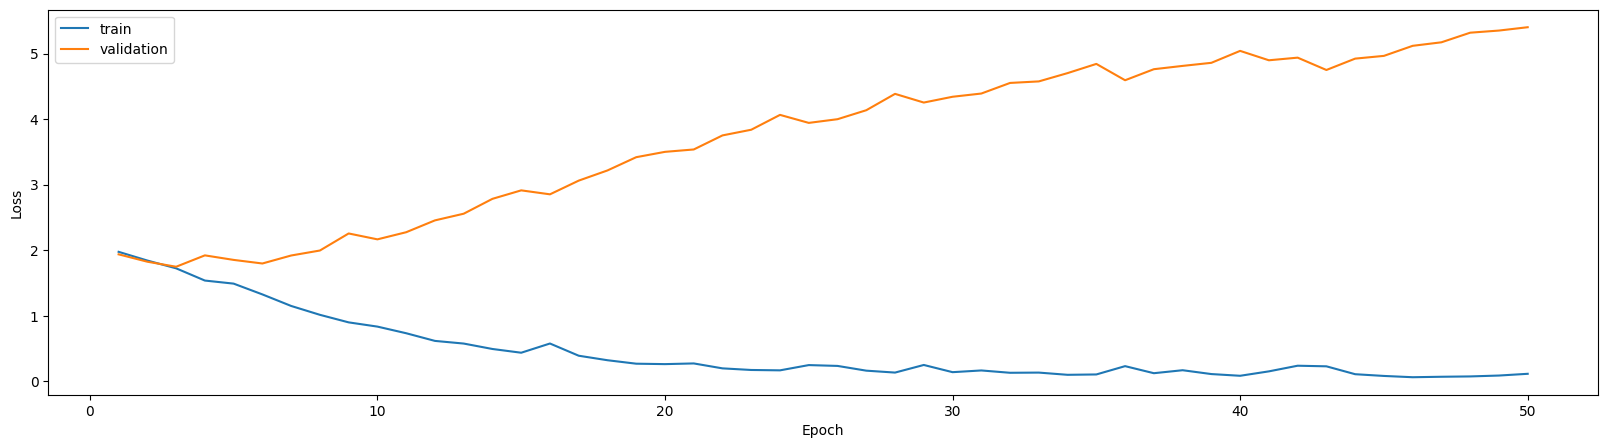

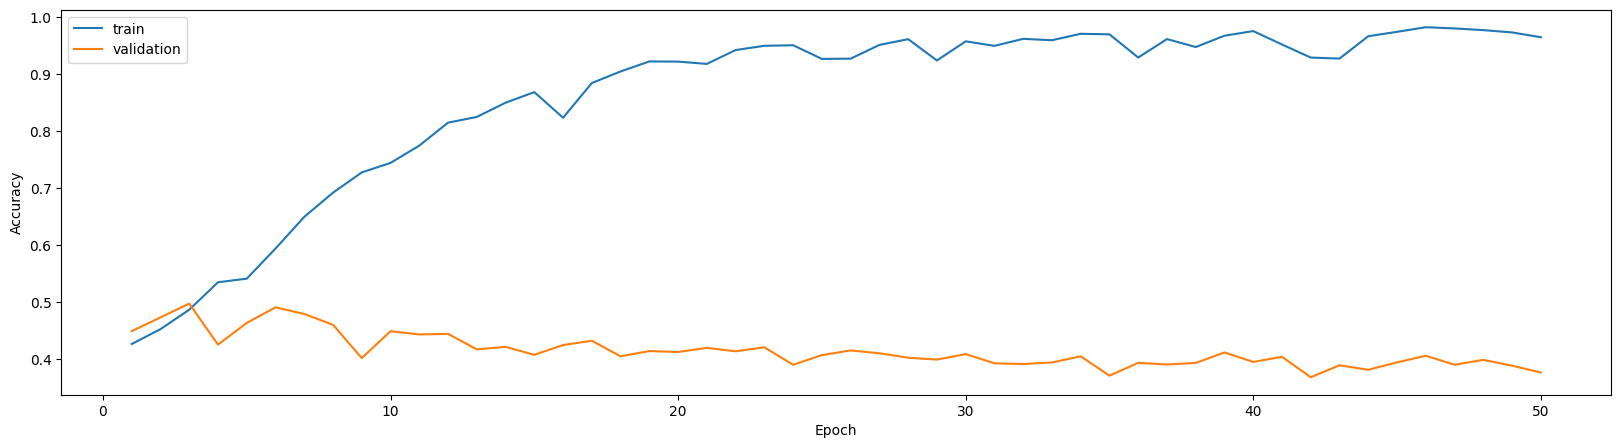

	Evaluation: 100%|██████████| 193/193 [00:03<00:00, 49.71it/s]



Test Loss: 1.719 | Test Acc: 50.07% | Test F1: 0.413 | Test ROC AUC: 0.754

Classification report:
              precision    recall  f1-score   support

           0       0.49      0.91      0.64      4983
           1       0.68      0.42      0.52       672
           2       0.50      0.18      0.26      1070
           3       0.53      0.08      0.14       667
           4       0.15      0.01      0.01       837
           5       0.64      0.05      0.09       144
           6       0.23      0.02      0.03       351
           7       0.38      0.21      0.27       551
           8       0.00      0.00      0.00       200
           9       0.64      0.64      0.64       614
          10       0.33      0.01      0.01       570
          11       0.71      0.08      0.15       208
          12       0.53      0.58      0.55       844
          13       0.39      0.14      0.20       629

    accuracy                           0.50     12340
   macro avg       0.44      0.24 

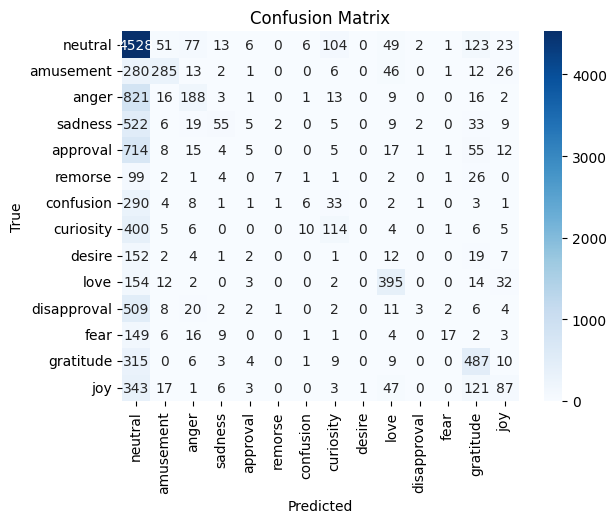

In [ ]:
# plot training curves

import matplotlib.pyplot as plt

# create epoch list
epochs = list(range(1, N_EPOCHS+1))

# plot training and validation loss
plt.figure(figsize=(20, 5))
plt.plot(epochs, train_loss_list, label='train')
plt.plot(epochs, valid_loss_list, label='validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plot training and validation accuracy
plt.figure(figsize=(20, 5))
plt.plot(epochs, train_acc_list, label='train')
plt.plot(epochs, valid_acc_list, label='validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#######
# print out required metrics

import seaborn as sns
model.load_state_dict(torch.load('model-glove.pt'))

test_loss, test_acc, test_f1, test_roc_auc, test_report, test_cm = evaluate(model, test_dataloader, criterion)
print(f'\nTest Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}% | Test F1: {test_f1:.3f} | Test ROC AUC: {test_roc_auc:.3f}\n')
# print(f'Confusion matrix:\n{test_cm}')
print(f'Classification report:\n{test_report}')

# plot confusion matrix
# labels for the plot - same as labels used for label_vocab
labels = OrderedDict([("neutral", 1), ("amusement", 1), ("anger", 1), ("sadness", 1), ("approval", 1), ("remorse", 1), ("confusion", 1), ("curiosity", 1), ("desire", 1), ("love", 1), ("disapproval", 1), ("fear", 1), ("gratitude", 1), ("joy", 1)])
# create the heatmap
sns.heatmap(test_cm, cmap="Blues", annot=True, fmt='g', xticklabels=labels, yticklabels=labels)
# add labels and title
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
import torch.nn as nn
from torch import optim

# Define an RNN class
class pretrainedRNN1(nn.Module):
    def __init__(self, input_dim, embedding_dim, hidden_dim, output_dim, pretrained_embeddings, pad_idx):        
        super().__init__()
        self.embedding = nn.Embedding.from_pretrained(pretrained_embeddings, freeze=True, padding_idx=pad_idx)        
        # self.embedding = nn.Embedding(input_dim, embedding_dim)
        # self.embedding.weight.data.copy_(pretrained_embeddings) # copy pre-trained vectors to embedding layer
        self.rnn = nn.RNN(embedding_dim, hidden_dim, batch_first=True)        
        self.fc = nn.Linear(hidden_dim, output_dim)
        # self.fc = nn.Linear(hidden_dim, output_dim[1]) # output_dim[0] is hidden_dim, output_dim[1] is output_dim
        
    def forward(self, texts, lengths):
        embedded = self.embedding(texts)                          # VV note that lengths need to be on the CPU
        embedded = nn.utils.rnn.pack_padded_sequence(embedded, lengths.cpu(), batch_first=True, enforce_sorted=False)

        output, hidden = self.rnn(embedded)

        return self.fc(hidden.squeeze(0))


# Setting model building arguments
INPUT_DIM = len(text_vocab)
EMBEDDING_DIM = 300
HIDDEN_DIM = 256
OUTPUT_DIM = len(label_vocab) # 14 output nodes
PAD_IDX = text_vocab["<pad>"]

model_glove_2 = pretrainedRNN1(INPUT_DIM, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM, pretrained_embeddings, PAD_IDX) # create a RNN model using the arguments
print(f'The model has {count_parameters(model_glove_2):,} trainable parameters')

# Set other parameters
optimizer = optim.Adam(model_glove_2.parameters())
criterion = nn.CrossEntropyLoss()

# Use GPU
model_glove_2 = model_glove_2.to(DEVICE)
criterion = criterion.to(DEVICE)

The model has 146,446 trainable parameters


In [ ]:
######
N_EPOCHS = 50
train_loss_list = []
train_acc_list = []
valid_loss_list = []
valid_acc_list = []

best_valid_loss = float('inf')
print(f"Using {'GPU' if str(DEVICE) == 'cuda' else 'CPU'} for training.")

for epoch in range(N_EPOCHS):
    print(f'Epoch: {epoch+1:02}')
    start_time = time.time()
    
    train_loss, train_acc = train(model_glove_2, train_dataloader, optimizer, criterion)
    train_loss_list.append(train_loss)
    train_acc_list.append(train_acc)
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    
    # valid_loss, valid_acc = evaluate(model, valid_dataloader, criterion)
    valid_loss, valid_acc, valid_f1, valid_auc_roc, valid_report, valid_cm  = evaluate(model_glove_2, valid_dataloader, criterion)
    valid_loss_list.append(valid_loss)
    valid_acc_list.append(valid_acc)
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')
    
    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model_glove_2.state_dict(), 'model_glove_2.pt')


Using GPU for training.
Epoch: 01


	Training: 100%|██████████| 315/315 [00:03<00:00, 103.24it/s]


	Train Loss: 1.987 | Train Acc: 42.19%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 132.71it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.878 |  Val. Acc: 45.00%
Epoch: 02


	Training: 100%|██████████| 315/315 [00:03<00:00, 104.99it/s]


	Train Loss: 1.858 | Train Acc: 44.79%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 128.97it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.800 |  Val. Acc: 46.81%
Epoch: 03


	Training: 100%|██████████| 315/315 [00:04<00:00, 68.06it/s]


	Train Loss: 1.772 | Train Acc: 47.72%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 106.53it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.955 |  Val. Acc: 41.82%
Epoch: 04


	Training: 100%|██████████| 315/315 [00:03<00:00, 103.28it/s]


	Train Loss: 1.790 | Train Acc: 46.54%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 133.29it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.747 |  Val. Acc: 49.91%
Epoch: 05


	Training: 100%|██████████| 315/315 [00:03<00:00, 103.15it/s]


	Train Loss: 1.697 | Train Acc: 49.03%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 137.21it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.809 |  Val. Acc: 46.64%
Epoch: 06


	Training: 100%|██████████| 315/315 [00:04<00:00, 75.99it/s]


	Train Loss: 1.690 | Train Acc: 48.65%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 83.37it/s]


	 Val. Loss: 1.783 |  Val. Acc: 48.75%
Epoch: 07


	Training: 100%|██████████| 315/315 [00:03<00:00, 100.54it/s]


	Train Loss: 1.731 | Train Acc: 48.37%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 132.60it/s]


	 Val. Loss: 1.804 |  Val. Acc: 48.14%
Epoch: 08


	Training: 100%|██████████| 315/315 [00:03<00:00, 104.28it/s]


	Train Loss: 1.627 | Train Acc: 50.53%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 133.62it/s]


	 Val. Loss: 1.758 |  Val. Acc: 50.35%
Epoch: 09


	Training: 100%|██████████| 315/315 [00:03<00:00, 84.21it/s]


	Train Loss: 1.718 | Train Acc: 47.82%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 88.01it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.795 |  Val. Acc: 48.50%
Epoch: 10


	Training: 100%|██████████| 315/315 [00:03<00:00, 88.72it/s] 


	Train Loss: 1.784 | Train Acc: 46.19%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 130.08it/s]


	 Val. Loss: 1.861 |  Val. Acc: 43.78%
Epoch: 11


	Training: 100%|██████████| 315/315 [00:03<00:00, 103.50it/s]


	Train Loss: 1.755 | Train Acc: 47.08%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 132.44it/s]


	 Val. Loss: 1.933 |  Val. Acc: 45.06%
Epoch: 12


	Training: 100%|██████████| 315/315 [00:03<00:00, 96.50it/s]


	Train Loss: 1.693 | Train Acc: 48.55%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 89.62it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.987 |  Val. Acc: 43.79%
Epoch: 13


	Training: 100%|██████████| 315/315 [00:03<00:00, 79.70it/s] 


	Train Loss: 1.735 | Train Acc: 47.41%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 135.44it/s]


	 Val. Loss: 1.935 |  Val. Acc: 44.11%
Epoch: 14


	Training: 100%|██████████| 315/315 [00:03<00:00, 103.72it/s]


	Train Loss: 1.666 | Train Acc: 49.02%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 131.55it/s]


	 Val. Loss: 1.831 |  Val. Acc: 46.93%
Epoch: 15


	Training: 100%|██████████| 315/315 [00:03<00:00, 102.67it/s]


	Train Loss: 1.594 | Train Acc: 50.76%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 99.33it/s]


	 Val. Loss: 1.864 |  Val. Acc: 44.96%
Epoch: 16


	Training: 100%|██████████| 315/315 [00:04<00:00, 72.10it/s]


	Train Loss: 1.550 | Train Acc: 51.98%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 134.53it/s]


	 Val. Loss: 1.794 |  Val. Acc: 48.38%
Epoch: 17


	Training: 100%|██████████| 315/315 [00:03<00:00, 104.08it/s]


	Train Loss: 1.464 | Train Acc: 54.20%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 130.91it/s]


	 Val. Loss: 1.711 |  Val. Acc: 49.88%
Epoch: 18


	Training: 100%|██████████| 315/315 [00:03<00:00, 100.40it/s]


	Train Loss: 1.410 | Train Acc: 55.89%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 127.28it/s]


	 Val. Loss: 1.758 |  Val. Acc: 49.79%
Epoch: 19


	Training: 100%|██████████| 315/315 [00:04<00:00, 68.79it/s]


	Train Loss: 1.402 | Train Acc: 56.31%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 77.69it/s]


	 Val. Loss: 1.790 |  Val. Acc: 45.60%
Epoch: 20


	Training: 100%|██████████| 315/315 [00:03<00:00, 101.67it/s]


	Train Loss: 1.372 | Train Acc: 56.87%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 130.88it/s]


	 Val. Loss: 1.744 |  Val. Acc: 49.69%
Epoch: 21


	Training: 100%|██████████| 315/315 [00:03<00:00, 98.29it/s]


	Train Loss: 1.415 | Train Acc: 55.85%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 126.60it/s]


	 Val. Loss: 1.902 |  Val. Acc: 44.59%
Epoch: 22


	Training: 100%|██████████| 315/315 [00:04<00:00, 67.96it/s]


	Train Loss: 1.476 | Train Acc: 54.17%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 113.87it/s]


	 Val. Loss: 1.890 |  Val. Acc: 48.07%
Epoch: 23


	Training: 100%|██████████| 315/315 [00:03<00:00, 102.27it/s]


	Train Loss: 1.329 | Train Acc: 58.10%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 130.50it/s]


	 Val. Loss: 1.849 |  Val. Acc: 47.86%
Epoch: 24


	Training: 100%|██████████| 315/315 [00:03<00:00, 100.50it/s]


	Train Loss: 1.264 | Train Acc: 60.19%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 130.16it/s]


	 Val. Loss: 1.835 |  Val. Acc: 47.30%
Epoch: 25


	Training: 100%|██████████| 315/315 [00:04<00:00, 70.13it/s]


	Train Loss: 1.217 | Train Acc: 61.64%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 85.57it/s]


	 Val. Loss: 1.838 |  Val. Acc: 47.66%
Epoch: 26


	Training: 100%|██████████| 315/315 [00:03<00:00, 101.65it/s]


	Train Loss: 1.326 | Train Acc: 58.61%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 134.36it/s]


	 Val. Loss: 1.866 |  Val. Acc: 49.47%
Epoch: 27


	Training: 100%|██████████| 315/315 [00:03<00:00, 101.59it/s]


	Train Loss: 1.166 | Train Acc: 63.47%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 128.72it/s]


	 Val. Loss: 1.886 |  Val. Acc: 48.06%
Epoch: 28


	Training: 100%|██████████| 315/315 [00:04<00:00, 78.54it/s]


	Train Loss: 1.227 | Train Acc: 61.54%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 85.75it/s]


	 Val. Loss: 1.977 |  Val. Acc: 47.12%
Epoch: 29


	Training: 100%|██████████| 315/315 [00:03<00:00, 93.36it/s] 


	Train Loss: 1.160 | Train Acc: 63.30%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 130.19it/s]


	 Val. Loss: 1.947 |  Val. Acc: 46.90%
Epoch: 30


	Training: 100%|██████████| 315/315 [00:03<00:00, 103.87it/s]


	Train Loss: 1.071 | Train Acc: 66.15%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 130.45it/s]


	 Val. Loss: 1.946 |  Val. Acc: 46.67%
Epoch: 31


	Training: 100%|██████████| 315/315 [00:03<00:00, 87.53it/s]


	Train Loss: 1.049 | Train Acc: 67.48%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 85.45it/s]


	 Val. Loss: 2.007 |  Val. Acc: 45.95%
Epoch: 32


	Training: 100%|██████████| 315/315 [00:03<00:00, 84.03it/s] 


	Train Loss: 1.143 | Train Acc: 64.46%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 132.23it/s]


	 Val. Loss: 3.440 |  Val. Acc: 14.77%
Epoch: 33


	Training: 100%|██████████| 315/315 [00:03<00:00, 97.59it/s]


	Train Loss: 1.670 | Train Acc: 48.58%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 124.98it/s]


	 Val. Loss: 2.054 |  Val. Acc: 43.86%
Epoch: 34


	Training: 100%|██████████| 315/315 [00:03<00:00, 88.48it/s]


	Train Loss: 1.310 | Train Acc: 58.47%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 81.92it/s]


	 Val. Loss: 1.992 |  Val. Acc: 44.48%
Epoch: 35


	Training: 100%|██████████| 315/315 [00:04<00:00, 77.73it/s]


	Train Loss: 1.182 | Train Acc: 62.67%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 129.09it/s]


	 Val. Loss: 2.014 |  Val. Acc: 45.70%
Epoch: 36


	Training: 100%|██████████| 315/315 [00:03<00:00, 101.33it/s]


	Train Loss: 1.093 | Train Acc: 65.64%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 129.60it/s]


	 Val. Loss: 2.040 |  Val. Acc: 46.34%
Epoch: 37


	Training: 100%|██████████| 315/315 [00:03<00:00, 96.33it/s]


	Train Loss: 1.052 | Train Acc: 66.98%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 86.64it/s]


	 Val. Loss: 2.092 |  Val. Acc: 44.29%
Epoch: 38


	Training: 100%|██████████| 315/315 [00:04<00:00, 76.79it/s] 


	Train Loss: 1.087 | Train Acc: 66.07%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 133.46it/s]


	 Val. Loss: 2.290 |  Val. Acc: 39.29%
Epoch: 39


	Training: 100%|██████████| 315/315 [00:03<00:00, 103.07it/s]


	Train Loss: 1.090 | Train Acc: 65.88%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 131.04it/s]


	 Val. Loss: 2.210 |  Val. Acc: 42.90%
Epoch: 40


	Training: 100%|██████████| 315/315 [00:03<00:00, 101.09it/s]


	Train Loss: 1.212 | Train Acc: 62.45%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 103.36it/s]


	 Val. Loss: 2.198 |  Val. Acc: 43.47%
Epoch: 41


	Training: 100%|██████████| 315/315 [00:05<00:00, 60.12it/s]


	Train Loss: 1.327 | Train Acc: 58.15%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 128.24it/s]


	 Val. Loss: 2.095 |  Val. Acc: 44.34%
Epoch: 42


	Training: 100%|██████████| 315/315 [00:03<00:00, 103.40it/s]


	Train Loss: 1.209 | Train Acc: 61.92%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 132.26it/s]


	 Val. Loss: 2.100 |  Val. Acc: 44.86%
Epoch: 43


	Training: 100%|██████████| 315/315 [00:03<00:00, 103.37it/s]


	Train Loss: 1.011 | Train Acc: 68.89%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 128.18it/s]


	 Val. Loss: 2.130 |  Val. Acc: 44.96%
Epoch: 44


	Training: 100%|██████████| 315/315 [00:04<00:00, 68.44it/s]


	Train Loss: 0.926 | Train Acc: 71.14%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 109.64it/s]


	 Val. Loss: 2.165 |  Val. Acc: 44.35%
Epoch: 45


	Training: 100%|██████████| 315/315 [00:03<00:00, 102.27it/s]


	Train Loss: 0.942 | Train Acc: 70.93%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 131.95it/s]


	 Val. Loss: 2.221 |  Val. Acc: 44.54%
Epoch: 46


	Training: 100%|██████████| 315/315 [00:03<00:00, 101.34it/s]


	Train Loss: 0.900 | Train Acc: 72.52%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 130.17it/s]


	 Val. Loss: 2.351 |  Val. Acc: 44.27%
Epoch: 47


	Training: 100%|██████████| 315/315 [00:04<00:00, 74.03it/s]


	Train Loss: 0.843 | Train Acc: 73.76%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 85.46it/s]


	 Val. Loss: 2.287 |  Val. Acc: 44.04%
Epoch: 48


	Training: 100%|██████████| 315/315 [00:03<00:00, 103.08it/s]


	Train Loss: 0.779 | Train Acc: 75.96%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 134.23it/s]


	 Val. Loss: 2.369 |  Val. Acc: 44.94%
Epoch: 49


	Training: 100%|██████████| 315/315 [00:03<00:00, 104.99it/s]


	Train Loss: 0.800 | Train Acc: 75.79%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 137.55it/s]


	 Val. Loss: 2.380 |  Val. Acc: 44.94%
Epoch: 50


	Training: 100%|██████████| 315/315 [00:03<00:00, 84.32it/s]


	Train Loss: 0.710 | Train Acc: 78.42%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 89.00it/s]


	 Val. Loss: 2.422 |  Val. Acc: 45.32%


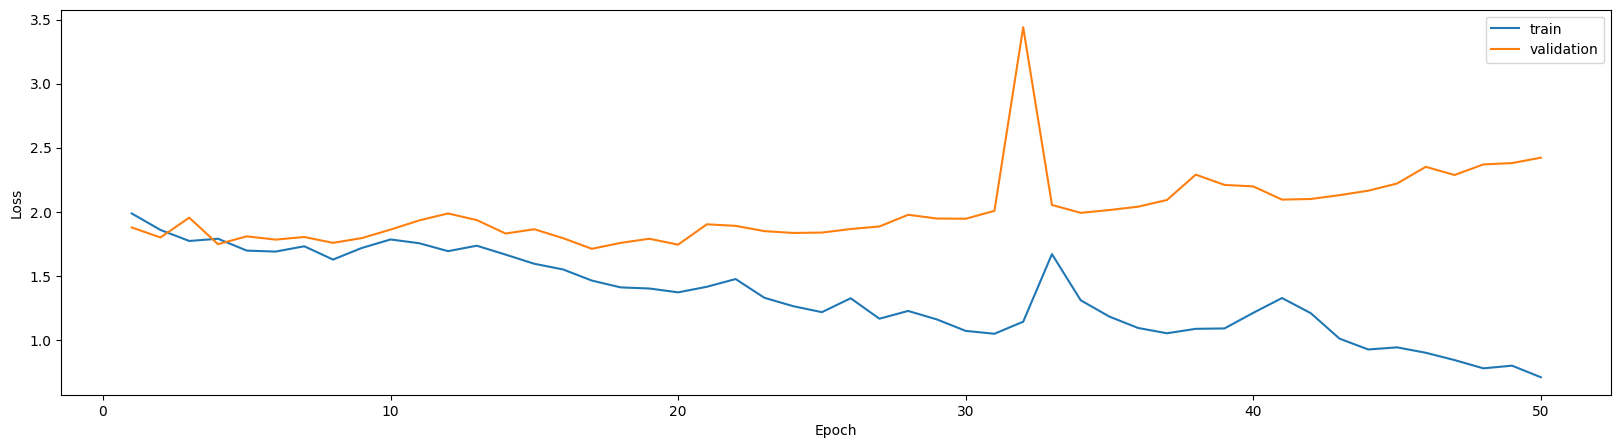

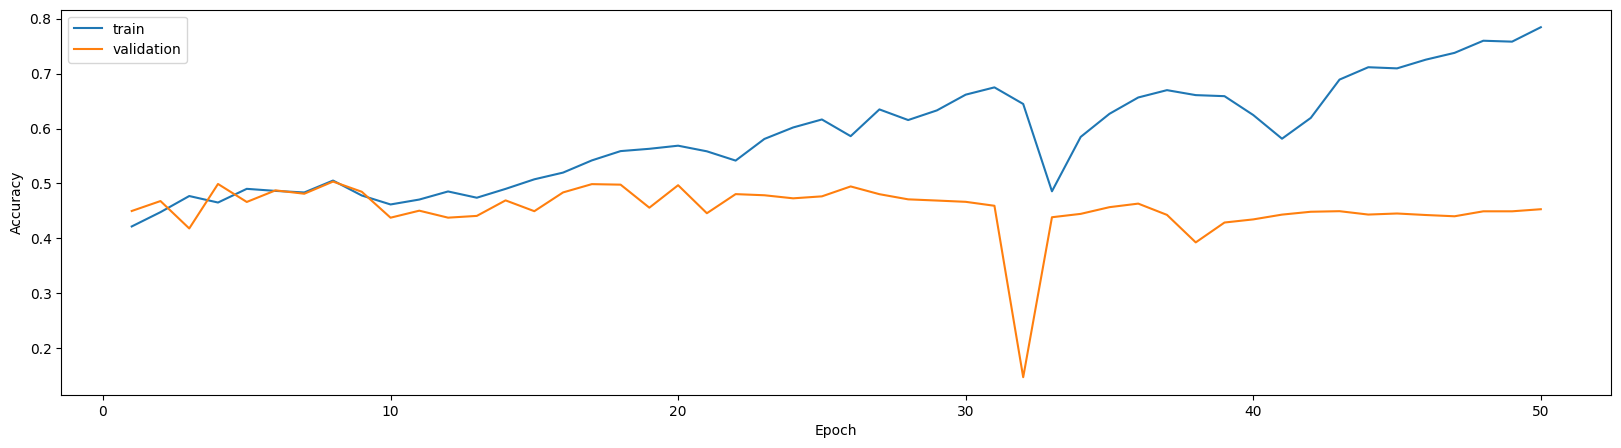

	Evaluation: 100%|██████████| 193/193 [00:01<00:00, 109.52it/s]



Test Loss: 1.706 | Test Acc: 49.96% | Test F1: 0.445 | Test ROC AUC: 0.771

Classification report:
              precision    recall  f1-score   support

           0       0.52      0.83      0.64      4983
           1       0.51      0.48      0.50       672
           2       0.40      0.22      0.28      1070
           3       0.36      0.25      0.29       667
           4       0.15      0.04      0.07       837
           5       0.26      0.08      0.13       144
           6       0.16      0.03      0.06       351
           7       0.37      0.31      0.33       551
           8       0.02      0.01      0.01       200
           9       0.61      0.65      0.63       614
          10       0.17      0.05      0.07       570
          11       0.58      0.14      0.23       208
          12       0.71      0.61      0.65       844
          13       0.47      0.19      0.27       629

    accuracy                           0.50     12340
   macro avg       0.38      0.28 

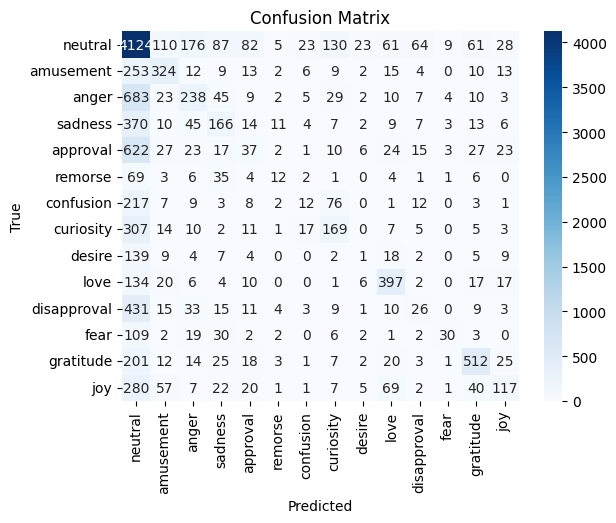

In [ ]:
# plot training curves

import matplotlib.pyplot as plt

# create epoch list
epochs = list(range(1, N_EPOCHS+1))

# plot training and validation loss
plt.figure(figsize=(20, 5))
plt.plot(epochs, train_loss_list, label='train')
plt.plot(epochs, valid_loss_list, label='validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plot training and validation accuracy
plt.figure(figsize=(20, 5))
plt.plot(epochs, train_acc_list, label='train')
plt.plot(epochs, valid_acc_list, label='validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#######
# print out required metrics

import seaborn as sns
model_glove_2.load_state_dict(torch.load('model_glove_2.pt'))

test_loss, test_acc, test_f1, test_roc_auc, test_report, test_cm = evaluate(model_glove_2, test_dataloader, criterion)
print(f'\nTest Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}% | Test F1: {test_f1:.3f} | Test ROC AUC: {test_roc_auc:.3f}\n')
# print(f'Confusion matrix:\n{test_cm}')
print(f'Classification report:\n{test_report}')

# plot confusion matrix
# labels for the plot - same as labels used for label_vocab
labels = OrderedDict([("neutral", 1), ("amusement", 1), ("anger", 1), ("sadness", 1), ("approval", 1), ("remorse", 1), ("confusion", 1), ("curiosity", 1), ("desire", 1), ("love", 1), ("disapproval", 1), ("fear", 1), ("gratitude", 1), ("joy", 1)])
# create the heatmap
sns.heatmap(test_cm, cmap="Blues", annot=True, fmt='g', xticklabels=labels, yticklabels=labels)
# add labels and title
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()




---



---



---

## 1.C. Fasttext vectors : dim = 300

In [ ]:
from torchtext import vocab

MAX_VOCAB_SIZE = 25_000

fasttext_vectors = vocab.FastText(
    language="en",
    max_vectors=MAX_VOCAB_SIZE
)

.vector_cache/wiki.en.vec: 6.60GB [01:13, 89.5MB/s]                           
100%|██████████| 25000/25000 [00:02<00:00, 10869.21it/s]


In [ ]:
from torchtext.vocab import vocab

text_vocab = vocab(fasttext_vectors.stoi, min_freq=0, specials=("<unk>", "<pad>"), special_first=True)
text_vocab.set_default_index(text_vocab["<unk>"])

pretrained_embeddings = fasttext_vectors.vectors
pretrained_embeddings = torch.cat([
    torch.empty(1, fasttext_vectors.dim).normal_(),  # unk token vector
    torch.zeros(1, fasttext_vectors.dim),  # padding token vector
    pretrained_embeddings
])

print("Vocab size: ", len(text_vocab))
print("Pretrained vectors shape: ", pretrained_embeddings.shape)
print("<unk> vector: ", pretrained_embeddings[text_vocab["<unk>"]])
print("<pad> vector: ", pretrained_embeddings[text_vocab["<pad>"]])

Vocab size:  25002
Pretrained vectors shape:  torch.Size([25002, 300])
<unk> vector:  tensor([-0.8869,  1.6772, -0.3701,  2.1944,  0.7692, -0.8924, -0.0489,  0.0755,
        -0.5123, -0.4590,  1.0897,  1.2543, -0.0622, -0.6588,  1.6449, -0.6965,
        -1.7057,  0.3655,  0.5852, -0.8624,  0.9218,  1.8720, -0.5654,  0.6636,
         1.4384,  1.4106, -1.8768,  0.1441, -0.6793,  1.1582, -0.4731, -1.2247,
         0.1365,  1.4445, -0.8124,  0.5407,  0.0713, -0.8875,  0.8623, -0.8465,
        -0.5437,  0.5982, -0.1350, -0.3506,  1.1884,  0.8026, -0.9347, -2.4160,
        -0.2055, -0.2914, -2.1832,  0.7252, -0.0376,  0.6736, -0.7453,  2.0802,
         0.1693, -1.4845, -0.7576, -0.3879, -0.2893, -2.2448,  0.8364,  0.2927,
         0.6777, -1.2699, -0.8632, -0.7130,  0.2570, -0.8474,  0.0434,  1.9785,
        -2.4183,  0.8928,  1.2539,  1.6336,  0.6081, -0.3671, -0.6618, -0.4481,
         0.6064,  0.7948, -0.1796,  0.4069, -1.6601, -0.4753, -1.6116, -0.4127,
        -0.1949,  1.0342, -0.8149,

In [ ]:
from collections import OrderedDict
label_vocab = vocab(OrderedDict([("neutral", 1), ("amusement", 1), ("anger", 1), ("sadness", 1), ("approval", 1), ("remorse", 1), ("confusion", 1), ("curiosity", 1), ("desire", 1), ("love", 1), ("disapproval", 1), ("fear", 1), ("gratitude", 1), ("joy", 1)]))


In [ ]:
import torchtext.transforms as T

text_transform = T.Sequential(
    SpacyTokenizer(),  # Tokenize
    T.VocabTransform(text_vocab),  # Conver to vocab IDs
    T.ToTensor(padding_value=text_vocab["<pad>"]),  # Convert to tensor and pad
)

label_transform = T.Sequential(
    # T.LabelToIndex(label_vocab.get_itos()),  # Convert to integer #labels are already integers
    T.ToTensor(),  # Convert to tensor
)

lengths_transform = T.Sequential(
    SpacyTokenizer(),
    ToLengths(),
    T.ToTensor(),
)

In [ ]:
train_dataloader = _get_dataloader(train_data)
valid_dataloader = _get_dataloader(valid_data)
test_dataloader = _get_dataloader(test_data)

In [ ]:
import torch.nn as nn
from torch import optim

# Define an RNN class
class pretrainedRNN(nn.Module):
    def __init__(self, input_dim, embedding_dim, hidden_dim, output_dim, pretrained_embeddings):        
        super().__init__()
        # self.embedding = nn.Embedding.from_pretrained(pretrained_embeddings, freeze=True, padding_idx=pad_idx)        

        self.embedding = nn.Embedding(input_dim, embedding_dim)
        self.embedding.weight.data.copy_(pretrained_embeddings) # copy pre-trained vectors to embedding layer
        self.rnn = nn.RNN(embedding_dim, hidden_dim, batch_first=True)        
        self.fc = nn.Linear(hidden_dim, output_dim)
        # self.fc = nn.Linear(hidden_dim, output_dim[1]) # output_dim[0] is hidden_dim, output_dim[1] is output_dim
        
    def forward(self, texts, lengths):
        embedded = self.embedding(texts)                          # VV note that lengths need to be on the CPU
        embedded = nn.utils.rnn.pack_padded_sequence(embedded, lengths.cpu(), batch_first=True, enforce_sorted=False)

        output, hidden = self.rnn(embedded)

        return self.fc(hidden.squeeze(0))


# Setting model building arguments
INPUT_DIM = len(text_vocab)
EMBEDDING_DIM = 300
HIDDEN_DIM = 256
OUTPUT_DIM = len(label_vocab) # 14 output nodes

model = pretrainedRNN(INPUT_DIM, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM, pretrained_embeddings) # create a RNN model using the arguments
print(f'The model has {count_parameters(model):,} trainable parameters')

# Set other parameters
optimizer = optim.Adam(model.parameters())
criterion = nn.CrossEntropyLoss()

# Use GPU
model = model.to(DEVICE)
criterion = criterion.to(DEVICE)

The model has 7,647,046 trainable parameters


In [ ]:
######
N_EPOCHS = 50
train_loss_list = []
train_acc_list = []
valid_loss_list = []
valid_acc_list = []

best_valid_loss = float('inf')
print(f"Using {'GPU' if str(DEVICE) == 'cuda' else 'CPU'} for training.")

for epoch in range(N_EPOCHS):
    print(f'Epoch: {epoch+1:02}')
    start_time = time.time()
    
    train_loss, train_acc = train(model, train_dataloader, optimizer, criterion)
    train_loss_list.append(train_loss)
    train_acc_list.append(train_acc)
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    
    # valid_loss, valid_acc = evaluate(model, valid_dataloader, criterion)
    valid_loss, valid_acc, valid_f1, valid_auc_roc, valid_report, valid_cm  = evaluate(model, valid_dataloader, criterion)
    valid_loss_list.append(valid_loss)
    valid_acc_list.append(valid_acc)
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')
    
    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'model-fasttext.pt')


Using GPU for training.
Epoch: 01


	Training: 100%|██████████| 315/315 [00:07<00:00, 43.22it/s]


	Train Loss: 2.065 | Train Acc: 40.60%


	Evaluation: 100%|██████████| 135/135 [00:02<00:00, 67.41it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.939 |  Val. Acc: 43.74%
Epoch: 02


	Training: 100%|██████████| 315/315 [00:05<00:00, 60.13it/s]


	Train Loss: 1.890 | Train Acc: 44.73%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 138.94it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.920 |  Val. Acc: 44.76%
Epoch: 03


	Training: 100%|██████████| 315/315 [00:04<00:00, 78.31it/s]


	Train Loss: 1.741 | Train Acc: 48.10%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 138.44it/s]


	 Val. Loss: 1.831 |  Val. Acc: 47.81%
Epoch: 04


	Training: 100%|██████████| 315/315 [00:04<00:00, 67.24it/s]


	Train Loss: 1.632 | Train Acc: 50.99%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 87.18it/s]


	 Val. Loss: 1.874 |  Val. Acc: 47.19%
Epoch: 05


	Training: 100%|██████████| 315/315 [00:04<00:00, 73.82it/s]


	Train Loss: 1.451 | Train Acc: 55.70%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 137.73it/s]


	 Val. Loss: 1.917 |  Val. Acc: 44.11%
Epoch: 06


	Training: 100%|██████████| 315/315 [00:04<00:00, 78.16it/s]


	Train Loss: 1.350 | Train Acc: 59.45%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 139.16it/s]


	 Val. Loss: 1.998 |  Val. Acc: 44.16%
Epoch: 07


	Training: 100%|██████████| 315/315 [00:05<00:00, 56.47it/s]


	Train Loss: 1.306 | Train Acc: 60.72%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 132.59it/s]


	 Val. Loss: 2.010 |  Val. Acc: 44.56%
Epoch: 08


	Training: 100%|██████████| 315/315 [00:03<00:00, 79.13it/s]


	Train Loss: 1.141 | Train Acc: 65.68%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 140.58it/s]


	 Val. Loss: 2.076 |  Val. Acc: 43.76%
Epoch: 09


	Training: 100%|██████████| 315/315 [00:04<00:00, 76.63it/s]


	Train Loss: 1.063 | Train Acc: 67.73%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 88.28it/s]


	 Val. Loss: 2.161 |  Val. Acc: 43.89%
Epoch: 10


	Training: 100%|██████████| 315/315 [00:04<00:00, 63.59it/s]


	Train Loss: 0.930 | Train Acc: 72.20%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 140.65it/s]


	 Val. Loss: 2.236 |  Val. Acc: 42.60%
Epoch: 11


	Training: 100%|██████████| 315/315 [00:04<00:00, 78.41it/s]


	Train Loss: 0.841 | Train Acc: 74.92%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 140.16it/s]


	 Val. Loss: 2.468 |  Val. Acc: 40.23%
Epoch: 12


	Training: 100%|██████████| 315/315 [00:04<00:00, 65.36it/s]


	Train Loss: 0.776 | Train Acc: 76.69%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 85.09it/s]


	 Val. Loss: 2.523 |  Val. Acc: 38.44%
Epoch: 13


	Training: 100%|██████████| 315/315 [00:04<00:00, 74.99it/s]


	Train Loss: 0.757 | Train Acc: 77.16%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 133.99it/s]


	 Val. Loss: 2.514 |  Val. Acc: 41.40%
Epoch: 14


	Training: 100%|██████████| 315/315 [00:04<00:00, 63.89it/s]


	Train Loss: 0.671 | Train Acc: 79.97%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 97.69it/s]


	 Val. Loss: 2.713 |  Val. Acc: 44.10%
Epoch: 15


	Training: 100%|██████████| 315/315 [00:05<00:00, 60.25it/s]


	Train Loss: 0.620 | Train Acc: 81.35%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 138.93it/s]


	 Val. Loss: 2.750 |  Val. Acc: 40.21%
Epoch: 16


	Training: 100%|██████████| 315/315 [00:09<00:00, 32.72it/s]


	Train Loss: 0.598 | Train Acc: 82.02%


	Evaluation: 100%|██████████| 135/135 [00:03<00:00, 38.78it/s]


	 Val. Loss: 2.823 |  Val. Acc: 42.20%
Epoch: 17


	Training: 100%|██████████| 315/315 [00:07<00:00, 44.43it/s]


	Train Loss: 0.519 | Train Acc: 84.58%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 74.99it/s]


	 Val. Loss: 3.005 |  Val. Acc: 39.08%
Epoch: 18


	Training: 100%|██████████| 315/315 [00:07<00:00, 43.81it/s]


	Train Loss: 0.478 | Train Acc: 85.94%


	Evaluation: 100%|██████████| 135/135 [00:02<00:00, 63.89it/s]


	 Val. Loss: 3.096 |  Val. Acc: 41.30%
Epoch: 19


	Training: 100%|██████████| 315/315 [00:06<00:00, 48.27it/s]


	Train Loss: 0.477 | Train Acc: 85.78%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 76.22it/s]


	 Val. Loss: 3.129 |  Val. Acc: 40.57%
Epoch: 20


	Training: 100%|██████████| 315/315 [00:08<00:00, 37.21it/s]


	Train Loss: 0.423 | Train Acc: 87.40%


	Evaluation: 100%|██████████| 135/135 [00:03<00:00, 44.67it/s]


	 Val. Loss: 3.334 |  Val. Acc: 39.85%
Epoch: 21


	Training: 100%|██████████| 315/315 [00:08<00:00, 39.29it/s]


	Train Loss: 0.435 | Train Acc: 86.95%


	Evaluation: 100%|██████████| 135/135 [00:02<00:00, 62.65it/s]


	 Val. Loss: 3.356 |  Val. Acc: 39.82%
Epoch: 22


	Training: 100%|██████████| 315/315 [00:04<00:00, 78.29it/s]


	Train Loss: 0.388 | Train Acc: 88.53%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 137.34it/s]


	 Val. Loss: 3.499 |  Val. Acc: 39.75%
Epoch: 23


	Training: 100%|██████████| 315/315 [00:04<00:00, 73.51it/s]


	Train Loss: 0.354 | Train Acc: 89.67%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 89.51it/s]


	 Val. Loss: 3.637 |  Val. Acc: 39.22%
Epoch: 24


	Training: 100%|██████████| 315/315 [00:04<00:00, 67.70it/s]


	Train Loss: 0.435 | Train Acc: 86.97%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 137.78it/s]


	 Val. Loss: 3.553 |  Val. Acc: 41.11%
Epoch: 25


	Training: 100%|██████████| 315/315 [00:03<00:00, 79.23it/s]


	Train Loss: 0.335 | Train Acc: 90.05%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 138.64it/s]


	 Val. Loss: 3.765 |  Val. Acc: 39.86%
Epoch: 26


	Training: 100%|██████████| 315/315 [00:04<00:00, 63.69it/s]


	Train Loss: 0.488 | Train Acc: 85.54%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 84.62it/s]


	 Val. Loss: 3.620 |  Val. Acc: 38.75%
Epoch: 27


	Training: 100%|██████████| 315/315 [00:04<00:00, 76.38it/s]


	Train Loss: 0.359 | Train Acc: 89.39%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 139.51it/s]


	 Val. Loss: 3.806 |  Val. Acc: 38.40%
Epoch: 28


	Training: 100%|██████████| 315/315 [00:03<00:00, 78.82it/s]


	Train Loss: 0.286 | Train Acc: 91.77%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 121.11it/s]


	 Val. Loss: 3.909 |  Val. Acc: 38.25%
Epoch: 29


	Training: 100%|██████████| 315/315 [00:05<00:00, 57.82it/s]


	Train Loss: 0.274 | Train Acc: 92.03%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 137.69it/s]


	 Val. Loss: 4.088 |  Val. Acc: 38.16%
Epoch: 30


	Training: 100%|██████████| 315/315 [00:04<00:00, 78.20it/s]


	Train Loss: 0.266 | Train Acc: 92.18%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 134.25it/s]


	 Val. Loss: 4.121 |  Val. Acc: 38.85%
Epoch: 31


	Training: 100%|██████████| 315/315 [00:04<00:00, 70.96it/s]


	Train Loss: 0.240 | Train Acc: 92.93%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 86.07it/s]


	 Val. Loss: 4.185 |  Val. Acc: 39.39%
Epoch: 32


	Training: 100%|██████████| 315/315 [00:04<00:00, 65.45it/s]


	Train Loss: 0.210 | Train Acc: 94.07%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 136.92it/s]


	 Val. Loss: 4.355 |  Val. Acc: 38.82%
Epoch: 33


	Training: 100%|██████████| 315/315 [00:04<00:00, 77.82it/s]


	Train Loss: 0.201 | Train Acc: 94.22%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 136.56it/s]


	 Val. Loss: 4.510 |  Val. Acc: 37.13%
Epoch: 34


	Training: 100%|██████████| 315/315 [00:05<00:00, 59.07it/s]


	Train Loss: 0.281 | Train Acc: 91.58%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 99.62it/s] 


	 Val. Loss: 4.458 |  Val. Acc: 39.19%
Epoch: 35


	Training: 100%|██████████| 315/315 [00:04<00:00, 77.09it/s]


	Train Loss: 0.389 | Train Acc: 88.43%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 131.86it/s]


	 Val. Loss: 4.387 |  Val. Acc: 31.24%
Epoch: 36


	Training: 100%|██████████| 315/315 [00:04<00:00, 68.04it/s]


	Train Loss: 0.275 | Train Acc: 91.82%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 88.39it/s]


	 Val. Loss: 4.363 |  Val. Acc: 39.32%
Epoch: 37


	Training: 100%|██████████| 315/315 [00:04<00:00, 63.90it/s]


	Train Loss: 0.205 | Train Acc: 94.10%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 137.97it/s]


	 Val. Loss: 4.486 |  Val. Acc: 39.52%
Epoch: 38


	Training: 100%|██████████| 315/315 [00:04<00:00, 69.47it/s]


	Train Loss: 0.168 | Train Acc: 95.23%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 133.66it/s]


	 Val. Loss: 4.709 |  Val. Acc: 38.39%
Epoch: 39


	Training: 100%|██████████| 315/315 [00:05<00:00, 57.63it/s]


	Train Loss: 0.171 | Train Acc: 95.12%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 106.99it/s]


	 Val. Loss: 4.717 |  Val. Acc: 38.24%
Epoch: 40


	Training: 100%|██████████| 315/315 [00:04<00:00, 76.93it/s]


	Train Loss: 0.158 | Train Acc: 95.40%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 135.25it/s]


	 Val. Loss: 4.853 |  Val. Acc: 38.77%
Epoch: 41


	Training: 100%|██████████| 315/315 [00:04<00:00, 74.97it/s]


	Train Loss: 0.169 | Train Acc: 95.05%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 88.06it/s]


	 Val. Loss: 4.868 |  Val. Acc: 36.50%
Epoch: 42


	Training: 100%|██████████| 315/315 [00:05<00:00, 61.75it/s]


	Train Loss: 0.427 | Train Acc: 87.13%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 132.95it/s]


	 Val. Loss: 4.403 |  Val. Acc: 36.24%
Epoch: 43


	Training: 100%|██████████| 315/315 [00:04<00:00, 78.44it/s]


	Train Loss: 0.283 | Train Acc: 91.32%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 138.02it/s]


	 Val. Loss: 4.619 |  Val. Acc: 36.64%
Epoch: 44


	Training: 100%|██████████| 315/315 [00:04<00:00, 65.10it/s]


	Train Loss: 0.224 | Train Acc: 93.35%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 84.71it/s]


	 Val. Loss: 4.754 |  Val. Acc: 38.39%
Epoch: 45


	Training: 100%|██████████| 315/315 [00:04<00:00, 76.39it/s]


	Train Loss: 0.145 | Train Acc: 95.90%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 140.57it/s]


	 Val. Loss: 4.811 |  Val. Acc: 38.65%
Epoch: 46


	Training: 100%|██████████| 315/315 [00:03<00:00, 78.91it/s]


	Train Loss: 0.180 | Train Acc: 95.01%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 135.34it/s]


	 Val. Loss: 4.799 |  Val. Acc: 37.51%
Epoch: 47


	Training: 100%|██████████| 315/315 [00:05<00:00, 56.54it/s]


	Train Loss: 0.191 | Train Acc: 94.37%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 136.82it/s]


	 Val. Loss: 4.876 |  Val. Acc: 38.32%
Epoch: 48


	Training: 100%|██████████| 315/315 [00:03<00:00, 79.58it/s]


	Train Loss: 0.235 | Train Acc: 92.95%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 139.00it/s]


	 Val. Loss: 4.943 |  Val. Acc: 36.53%
Epoch: 49


	Training: 100%|██████████| 315/315 [00:04<00:00, 75.95it/s]


	Train Loss: 0.198 | Train Acc: 93.93%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 89.60it/s]


	 Val. Loss: 4.983 |  Val. Acc: 37.28%
Epoch: 50


	Training: 100%|██████████| 315/315 [00:04<00:00, 64.68it/s]


	Train Loss: 0.152 | Train Acc: 95.43%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 139.26it/s]


	 Val. Loss: 5.163 |  Val. Acc: 38.12%


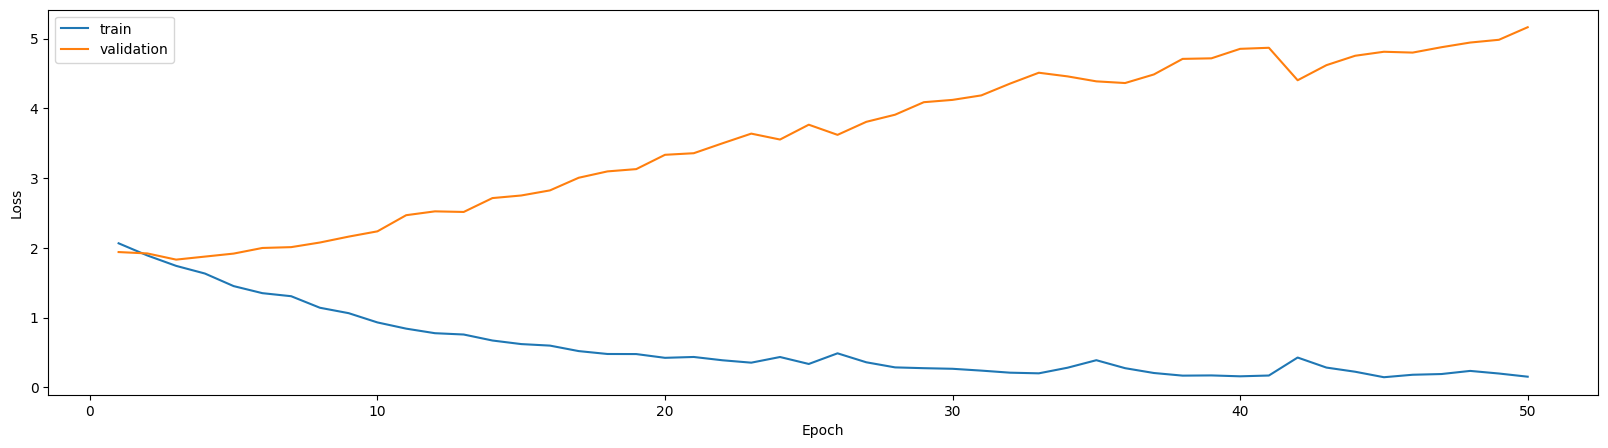

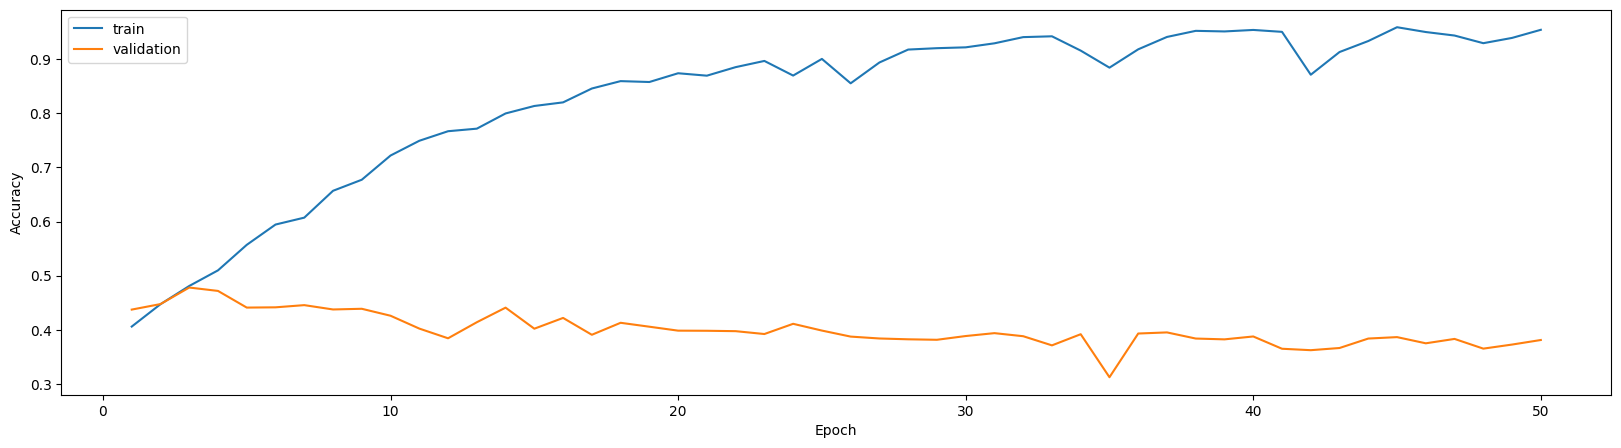

	Evaluation: 100%|██████████| 193/193 [00:02<00:00, 86.53it/s]



Test Loss: 1.814 | Test Acc: 48.51% | Test F1: 0.398 | Test ROC AUC: 0.721

Classification report:
              precision    recall  f1-score   support

           0       0.47      0.91      0.62      4983
           1       0.72      0.27      0.39       672
           2       0.50      0.09      0.16      1070
           3       0.29      0.18      0.22       667
           4       0.26      0.01      0.02       837
           5       0.68      0.09      0.16       144
           6       0.33      0.01      0.01       351
           7       0.40      0.28      0.33       551
           8       0.20      0.01      0.01       200
           9       0.69      0.64      0.66       614
          10       0.00      0.00      0.00       570
          11       0.75      0.07      0.13       208
          12       0.59      0.45      0.51       844
          13       0.46      0.15      0.22       629

    accuracy                           0.49     12340
   macro avg       0.45      0.23 

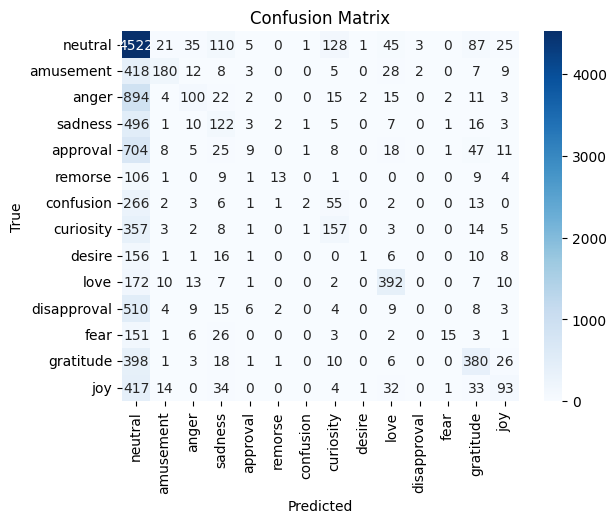

In [ ]:
# plot training curves

import matplotlib.pyplot as plt

# create epoch list
epochs = list(range(1, N_EPOCHS+1))

# plot training and validation loss
plt.figure(figsize=(20, 5))
plt.plot(epochs, train_loss_list, label='train')
plt.plot(epochs, valid_loss_list, label='validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plot training and validation accuracy
plt.figure(figsize=(20, 5))
plt.plot(epochs, train_acc_list, label='train')
plt.plot(epochs, valid_acc_list, label='validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#######
# print out required metrics

import seaborn as sns
model.load_state_dict(torch.load('model-fasttext.pt'))

test_loss, test_acc, test_f1, test_roc_auc, test_report, test_cm = evaluate(model, test_dataloader, criterion)
print(f'\nTest Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}% | Test F1: {test_f1:.3f} | Test ROC AUC: {test_roc_auc:.3f}\n')
# print(f'Confusion matrix:\n{test_cm}')
print(f'Classification report:\n{test_report}')

# plot confusion matrix
# labels for the plot - same as labels used for label_vocab
labels = OrderedDict([("neutral", 1), ("amusement", 1), ("anger", 1), ("sadness", 1), ("approval", 1), ("remorse", 1), ("confusion", 1), ("curiosity", 1), ("desire", 1), ("love", 1), ("disapproval", 1), ("fear", 1), ("gratitude", 1), ("joy", 1)])
# create the heatmap
sns.heatmap(test_cm, cmap="Blues", annot=True, fmt='g', xticklabels=labels, yticklabels=labels)
# add labels and title
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
import torch.nn as nn
from torch import optim

# Define an RNN class
class pretrainedRNN1(nn.Module):
    def __init__(self, input_dim, embedding_dim, hidden_dim, output_dim, pretrained_embeddings, pad_idx):        
        super().__init__()
        self.embedding = nn.Embedding.from_pretrained(pretrained_embeddings, freeze=True, padding_idx=pad_idx)        
        # self.embedding = nn.Embedding(input_dim, embedding_dim)
        # self.embedding.weight.data.copy_(pretrained_embeddings) # copy pre-trained vectors to embedding layer
        self.rnn = nn.RNN(embedding_dim, hidden_dim, batch_first=True)        
        self.fc = nn.Linear(hidden_dim, output_dim)
        # self.fc = nn.Linear(hidden_dim, output_dim[1]) # output_dim[0] is hidden_dim, output_dim[1] is output_dim
        
    def forward(self, texts, lengths):
        embedded = self.embedding(texts)                          # VV note that lengths need to be on the CPU
        embedded = nn.utils.rnn.pack_padded_sequence(embedded, lengths.cpu(), batch_first=True, enforce_sorted=False)

        output, hidden = self.rnn(embedded)

        return self.fc(hidden.squeeze(0))


# Setting model building arguments
INPUT_DIM = len(text_vocab)
EMBEDDING_DIM = 300
HIDDEN_DIM = 256
OUTPUT_DIM = len(label_vocab) # 14 output nodes
PAD_IDX = text_vocab["<pad>"]

model_fasttext_2 = pretrainedRNN1(INPUT_DIM, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM, pretrained_embeddings, PAD_IDX) # create a RNN model using the arguments
print(f'The model has {count_parameters(model_fasttext_2):,} trainable parameters')

# Set other parameters
optimizer = optim.Adam(model_fasttext_2.parameters())
criterion = nn.CrossEntropyLoss()

# Use GPU
model_fasttext_2 = model_fasttext_2.to(DEVICE)
criterion = criterion.to(DEVICE)

The model has 146,446 trainable parameters


In [ ]:
######
N_EPOCHS = 50
train_loss_list = []
train_acc_list = []
valid_loss_list = []
valid_acc_list = []

best_valid_loss = float('inf')
print(f"Using {'GPU' if str(DEVICE) == 'cuda' else 'CPU'} for training.")

for epoch in range(N_EPOCHS):
    print(f'Epoch: {epoch+1:02}')
    start_time = time.time()
    
    train_loss, train_acc = train(model_fasttext_2, train_dataloader, optimizer, criterion)
    train_loss_list.append(train_loss)
    train_acc_list.append(train_acc)
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    
    # valid_loss, valid_acc = evaluate(model, valid_dataloader, criterion)
    valid_loss, valid_acc, valid_f1, valid_auc_roc, valid_report, valid_cm  = evaluate(model_fasttext_2, valid_dataloader, criterion)
    valid_loss_list.append(valid_loss)
    valid_acc_list.append(valid_acc)
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')
    
    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model_fasttext_2.state_dict(), 'model_fasttext_2.pt')


Using GPU for training.
Epoch: 01


	Training: 100%|██████████| 315/315 [00:03<00:00, 85.52it/s]


	Train Loss: 2.075 | Train Acc: 40.67%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 90.59it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.999 |  Val. Acc: 42.91%
Epoch: 02


	Training: 100%|██████████| 315/315 [00:03<00:00, 89.97it/s] 


	Train Loss: 1.973 | Train Acc: 42.82%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 135.89it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.985 |  Val. Acc: 42.80%
Epoch: 03


	Training: 100%|██████████| 315/315 [00:03<00:00, 88.77it/s]


	Train Loss: 1.935 | Train Acc: 43.97%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 133.20it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.956 |  Val. Acc: 43.17%
Epoch: 04


	Training: 100%|██████████| 315/315 [00:03<00:00, 90.11it/s]


	Train Loss: 1.887 | Train Acc: 44.92%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 92.42it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.912 |  Val. Acc: 45.81%
Epoch: 05


	Training: 100%|██████████| 315/315 [00:03<00:00, 86.16it/s] 


	Train Loss: 1.863 | Train Acc: 45.77%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 128.22it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.913 |  Val. Acc: 45.40%
Epoch: 06


	Training: 100%|██████████| 315/315 [00:03<00:00, 90.63it/s] 


	Train Loss: 1.849 | Train Acc: 45.32%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 132.44it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.870 |  Val. Acc: 45.10%
Epoch: 07


	Training: 100%|██████████| 315/315 [00:03<00:00, 94.23it/s]


	Train Loss: 1.800 | Train Acc: 46.25%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 90.60it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.814 |  Val. Acc: 45.86%
Epoch: 08


	Training: 100%|██████████| 315/315 [00:03<00:00, 79.73it/s] 


	Train Loss: 1.777 | Train Acc: 46.60%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 132.93it/s]


	 Val. Loss: 1.877 |  Val. Acc: 44.32%
Epoch: 09


	Training: 100%|██████████| 315/315 [00:03<00:00, 102.49it/s]


	Train Loss: 1.806 | Train Acc: 45.94%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 134.84it/s]


	 Val. Loss: 1.864 |  Val. Acc: 45.17%
Epoch: 10


	Training: 100%|██████████| 315/315 [00:02<00:00, 105.62it/s]


	Train Loss: 1.768 | Train Acc: 47.00%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 92.17it/s]


	 Val. Loss: 1.816 |  Val. Acc: 47.11%
Epoch: 11


	Training: 100%|██████████| 315/315 [00:04<00:00, 74.35it/s]


	Train Loss: 1.818 | Train Acc: 45.62%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 132.91it/s]


	 Val. Loss: 1.919 |  Val. Acc: 41.92%
Epoch: 12


	Training: 100%|██████████| 315/315 [00:03<00:00, 104.04it/s]


	Train Loss: 1.742 | Train Acc: 47.26%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 133.69it/s]


	 Val. Loss: 1.818 |  Val. Acc: 46.63%
Epoch: 13


	Training: 100%|██████████| 315/315 [00:03<00:00, 104.79it/s]


	Train Loss: 1.786 | Train Acc: 46.61%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 139.50it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 2.005 |  Val. Acc: 44.09%
Epoch: 14


	Training: 100%|██████████| 315/315 [00:04<00:00, 70.01it/s]


	Train Loss: 1.690 | Train Acc: 49.08%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 104.80it/s]


	 Val. Loss: 1.818 |  Val. Acc: 47.40%
Epoch: 15


	Training: 100%|██████████| 315/315 [00:03<00:00, 103.83it/s]


	Train Loss: 1.630 | Train Acc: 50.74%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 135.60it/s]


	 Val. Loss: 1.751 |  Val. Acc: 49.91%
Epoch: 16


	Training: 100%|██████████| 315/315 [00:03<00:00, 104.44it/s]


	Train Loss: 1.646 | Train Acc: 49.93%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 133.99it/s]


	 Val. Loss: 1.870 |  Val. Acc: 46.01%
Epoch: 17


	Training: 100%|██████████| 315/315 [00:04<00:00, 78.67it/s]


	Train Loss: 1.707 | Train Acc: 48.40%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 88.68it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.957 |  Val. Acc: 45.30%
Epoch: 18


	Training: 100%|██████████| 315/315 [00:03<00:00, 102.38it/s]


	Train Loss: 1.707 | Train Acc: 48.60%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 137.69it/s]


	 Val. Loss: 1.967 |  Val. Acc: 42.19%
Epoch: 19


	Training: 100%|██████████| 315/315 [00:03<00:00, 99.21it/s] 


	Train Loss: 1.666 | Train Acc: 49.45%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 134.38it/s]


	 Val. Loss: 1.978 |  Val. Acc: 45.06%
Epoch: 20


	Training: 100%|██████████| 315/315 [00:03<00:00, 84.31it/s]


	Train Loss: 1.651 | Train Acc: 49.63%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 90.08it/s]


	 Val. Loss: 1.892 |  Val. Acc: 44.88%
Epoch: 21


	Training: 100%|██████████| 315/315 [00:03<00:00, 87.23it/s] 


	Train Loss: 1.618 | Train Acc: 50.64%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 134.62it/s]


	 Val. Loss: 1.851 |  Val. Acc: 47.01%
Epoch: 22


	Training: 100%|██████████| 315/315 [00:03<00:00, 103.28it/s]


	Train Loss: 1.558 | Train Acc: 52.27%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 136.94it/s]


	 Val. Loss: 1.854 |  Val. Acc: 45.83%
Epoch: 23


	Training: 100%|██████████| 315/315 [00:03<00:00, 96.19it/s]


	Train Loss: 1.578 | Train Acc: 51.45%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 89.04it/s]


	 Val. Loss: 1.936 |  Val. Acc: 45.77%
Epoch: 24


	Training: 100%|██████████| 315/315 [00:04<00:00, 78.06it/s] 


	Train Loss: 1.598 | Train Acc: 50.91%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 131.31it/s]


	 Val. Loss: 1.993 |  Val. Acc: 42.97%
Epoch: 25


	Training: 100%|██████████| 315/315 [00:03<00:00, 87.68it/s]


	Train Loss: 1.558 | Train Acc: 51.69%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 135.05it/s]


	 Val. Loss: 1.987 |  Val. Acc: 45.38%
Epoch: 26


	Training: 100%|██████████| 315/315 [00:03<00:00, 100.58it/s]


	Train Loss: 1.466 | Train Acc: 54.28%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 87.78it/s]


	 Val. Loss: 2.004 |  Val. Acc: 44.05%
Epoch: 27


	Training: 100%|██████████| 315/315 [00:04<00:00, 74.71it/s]


	Train Loss: 1.435 | Train Acc: 55.23%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 91.76it/s]


	 Val. Loss: 1.941 |  Val. Acc: 45.02%
Epoch: 28


	Training: 100%|██████████| 315/315 [00:03<00:00, 104.88it/s]


	Train Loss: 1.408 | Train Acc: 56.46%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 137.26it/s]


	 Val. Loss: 1.974 |  Val. Acc: 45.37%
Epoch: 29


	Training: 100%|██████████| 315/315 [00:02<00:00, 105.92it/s]


	Train Loss: 1.380 | Train Acc: 57.12%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 98.45it/s]


	 Val. Loss: 2.080 |  Val. Acc: 44.59%
Epoch: 30


	Training: 100%|██████████| 315/315 [00:04<00:00, 72.20it/s]


	Train Loss: 1.567 | Train Acc: 52.27%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 134.39it/s]


	 Val. Loss: 2.204 |  Val. Acc: 37.96%
Epoch: 31


	Training: 100%|██████████| 315/315 [00:03<00:00, 102.87it/s]


	Train Loss: 1.697 | Train Acc: 48.15%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 135.61it/s]


	 Val. Loss: 2.132 |  Val. Acc: 41.98%
Epoch: 32


	Training: 100%|██████████| 315/315 [00:03<00:00, 104.08it/s]


	Train Loss: 1.505 | Train Acc: 53.59%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 133.53it/s]


	 Val. Loss: 2.163 |  Val. Acc: 42.53%
Epoch: 33


	Training: 100%|██████████| 315/315 [00:04<00:00, 70.48it/s]


	Train Loss: 1.400 | Train Acc: 56.59%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 99.51it/s] 


	 Val. Loss: 2.125 |  Val. Acc: 42.36%
Epoch: 34


	Training: 100%|██████████| 315/315 [00:03<00:00, 102.20it/s]


	Train Loss: 1.335 | Train Acc: 58.38%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 135.94it/s]


	 Val. Loss: 2.354 |  Val. Acc: 40.33%
Epoch: 35


	Training: 100%|██████████| 315/315 [00:03<00:00, 103.41it/s]


	Train Loss: 1.398 | Train Acc: 57.04%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 136.85it/s]


	 Val. Loss: 2.143 |  Val. Acc: 43.24%
Epoch: 36


	Training: 100%|██████████| 315/315 [00:04<00:00, 76.50it/s]


	Train Loss: 1.266 | Train Acc: 60.98%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 89.84it/s]


	 Val. Loss: 2.174 |  Val. Acc: 43.99%
Epoch: 37


	Training: 100%|██████████| 315/315 [00:03<00:00, 100.42it/s]


	Train Loss: 1.293 | Train Acc: 59.80%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 135.39it/s]


	 Val. Loss: 2.328 |  Val. Acc: 39.17%
Epoch: 38


	Training: 100%|██████████| 315/315 [00:04<00:00, 65.68it/s]


	Train Loss: 1.249 | Train Acc: 61.10%


	Evaluation: 100%|██████████| 135/135 [00:02<00:00, 45.55it/s]


	 Val. Loss: 2.225 |  Val. Acc: 39.80%
Epoch: 39


	Training: 100%|██████████| 315/315 [00:07<00:00, 43.25it/s]


	Train Loss: 1.203 | Train Acc: 62.47%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 107.54it/s]


	 Val. Loss: 2.200 |  Val. Acc: 43.56%
Epoch: 40


	Training: 100%|██████████| 315/315 [00:03<00:00, 103.40it/s]


	Train Loss: 1.109 | Train Acc: 66.09%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 134.56it/s]


	 Val. Loss: 2.206 |  Val. Acc: 45.60%
Epoch: 41


	Training: 100%|██████████| 315/315 [00:07<00:00, 43.15it/s]


	Train Loss: 1.140 | Train Acc: 65.09%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 80.98it/s]


	 Val. Loss: 2.267 |  Val. Acc: 44.07%
Epoch: 42


	Training: 100%|██████████| 315/315 [00:04<00:00, 71.55it/s]


	Train Loss: 1.387 | Train Acc: 57.09%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 82.02it/s]


	 Val. Loss: 2.249 |  Val. Acc: 41.74%
Epoch: 43


	Training: 100%|██████████| 315/315 [00:05<00:00, 58.62it/s]


	Train Loss: 1.223 | Train Acc: 62.14%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 86.35it/s]


	 Val. Loss: 2.313 |  Val. Acc: 42.34%
Epoch: 44


	Training: 100%|██████████| 315/315 [00:04<00:00, 64.25it/s]


	Train Loss: 1.146 | Train Acc: 65.07%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 90.10it/s]


	 Val. Loss: 2.308 |  Val. Acc: 40.47%
Epoch: 45


	Training: 100%|██████████| 315/315 [00:06<00:00, 49.70it/s]


	Train Loss: 1.157 | Train Acc: 64.35%


	Evaluation: 100%|██████████| 135/135 [00:03<00:00, 42.74it/s]


	 Val. Loss: 2.389 |  Val. Acc: 39.72%
Epoch: 46


	Training: 100%|██████████| 315/315 [00:04<00:00, 73.11it/s] 


	Train Loss: 1.157 | Train Acc: 64.34%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 132.24it/s]


	 Val. Loss: 2.398 |  Val. Acc: 41.71%
Epoch: 47


	Training: 100%|██████████| 315/315 [00:03<00:00, 101.60it/s]


	Train Loss: 1.087 | Train Acc: 66.87%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 119.53it/s]


	 Val. Loss: 2.364 |  Val. Acc: 42.52%
Epoch: 48


	Training: 100%|██████████| 315/315 [00:04<00:00, 64.69it/s]


	Train Loss: 0.992 | Train Acc: 69.91%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 77.04it/s]


	 Val. Loss: 2.414 |  Val. Acc: 43.96%
Epoch: 49


	Training: 100%|██████████| 315/315 [00:04<00:00, 67.42it/s]


	Train Loss: 0.948 | Train Acc: 71.20%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 75.28it/s]


	 Val. Loss: 2.452 |  Val. Acc: 41.35%
Epoch: 50


	Training: 100%|██████████| 315/315 [00:04<00:00, 70.40it/s]


	Train Loss: 0.921 | Train Acc: 72.12%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 85.64it/s]


	 Val. Loss: 2.459 |  Val. Acc: 42.63%


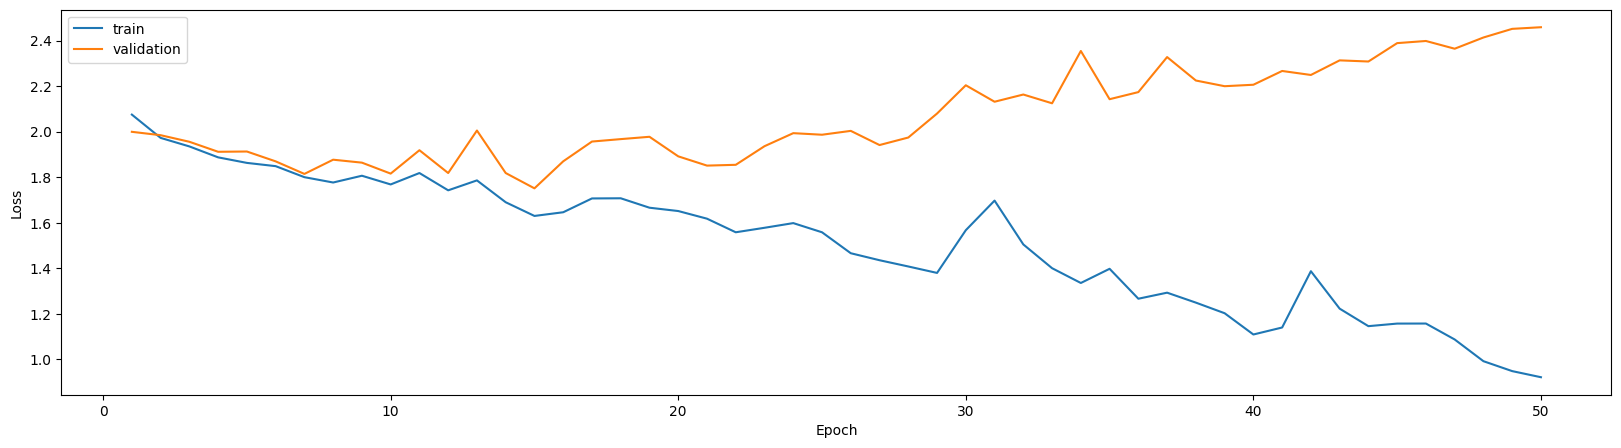

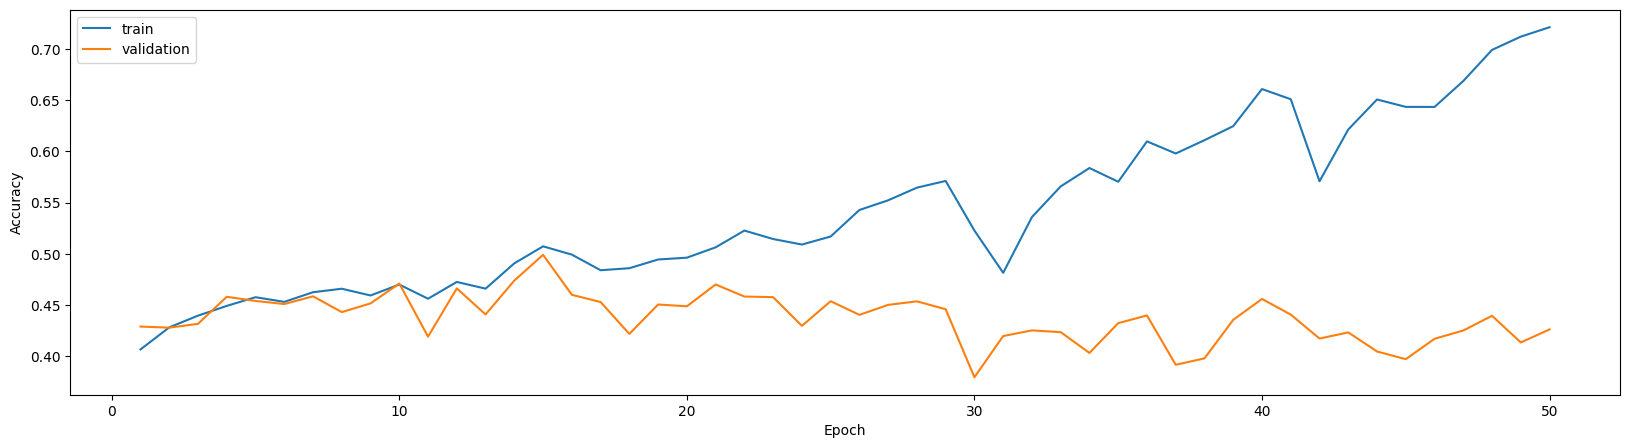

	Evaluation: 100%|██████████| 193/193 [00:01<00:00, 127.34it/s]



Test Loss: 1.729 | Test Acc: 50.46% | Test F1: 0.438 | Test ROC AUC: 0.751

Classification report:
              precision    recall  f1-score   support

           0       0.50      0.88      0.64      4983
           1       0.52      0.32      0.40       672
           2       0.40      0.19      0.25      1070
           3       0.43      0.15      0.23       667
           4       0.12      0.02      0.04       837
           5       0.33      0.08      0.12       144
           6       0.17      0.05      0.08       351
           7       0.39      0.33      0.36       551
           8       0.18      0.01      0.03       200
           9       0.75      0.67      0.71       614
          10       0.09      0.01      0.02       570
          11       0.50      0.06      0.11       208
          12       0.81      0.59      0.68       844
          13       0.40      0.28      0.33       629

    accuracy                           0.50     12340
   macro avg       0.40      0.26 

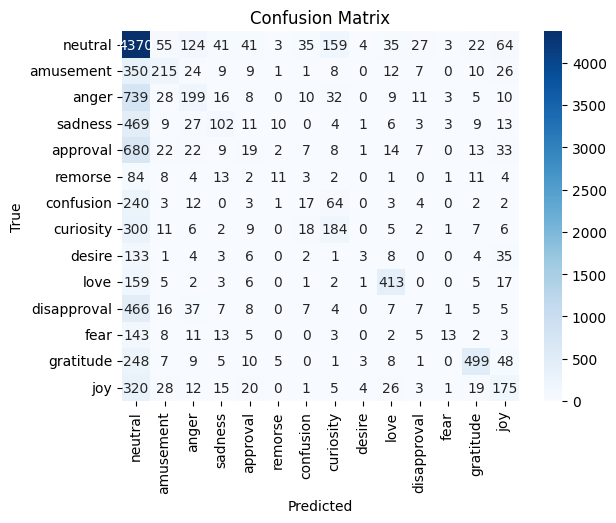

In [ ]:
# plot training curves

import matplotlib.pyplot as plt

# create epoch list
epochs = list(range(1, N_EPOCHS+1))

# plot training and validation loss
plt.figure(figsize=(20, 5))
plt.plot(epochs, train_loss_list, label='train')
plt.plot(epochs, valid_loss_list, label='validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plot training and validation accuracy
plt.figure(figsize=(20, 5))
plt.plot(epochs, train_acc_list, label='train')
plt.plot(epochs, valid_acc_list, label='validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#######
# print out required metrics

import seaborn as sns
model_fasttext_2.load_state_dict(torch.load('model_fasttext_2.pt'))

test_loss, test_acc, test_f1, test_roc_auc, test_report, test_cm = evaluate(model_fasttext_2, test_dataloader, criterion)
print(f'\nTest Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}% | Test F1: {test_f1:.3f} | Test ROC AUC: {test_roc_auc:.3f}\n')
# print(f'Confusion matrix:\n{test_cm}')
print(f'Classification report:\n{test_report}')

# plot confusion matrix
# labels for the plot - same as labels used for label_vocab
labels = OrderedDict([("neutral", 1), ("amusement", 1), ("anger", 1), ("sadness", 1), ("approval", 1), ("remorse", 1), ("confusion", 1), ("curiosity", 1), ("desire", 1), ("love", 1), ("disapproval", 1), ("fear", 1), ("gratitude", 1), ("joy", 1)])
# create the heatmap
sns.heatmap(test_cm, cmap="Blues", annot=True, fmt='g', xticklabels=labels, yticklabels=labels)
# add labels and title
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()



---



---



---

## 1.D.1. GloVe twitter vectors: 27B, dim = 100

In [ ]:
from torchtext import vocab

MAX_VOCAB_SIZE = 25_000

glove_vectors1 = vocab.GloVe(
    name="twitter.27B",
    dim="100",
    max_vectors=MAX_VOCAB_SIZE
)

.vector_cache/glove.twitter.27B.zip: 1.52GB [04:45, 5.33MB/s]                            
100%|█████████▉| 24999/25000 [00:00<00:00, 30709.69it/s]


In [ ]:
from torchtext.vocab import vocab

text_vocab = vocab(glove_vectors1.stoi, min_freq=0, specials=("<unk>", "<pad>"), special_first=True)
text_vocab.set_default_index(text_vocab["<unk>"])

pretrained_embeddings = glove_vectors1.vectors
pretrained_embeddings = torch.cat([
    torch.empty(1, glove_vectors1.dim).normal_(),  # unk token vector
    torch.zeros(1, glove_vectors1.dim),  # padding token vector
    pretrained_embeddings
])

print("Vocab size: ", len(text_vocab))
print("Pretrained vectors shape: ", pretrained_embeddings.shape)
print("<unk> vector: ", pretrained_embeddings[text_vocab["<unk>"]])
print("<pad> vector: ", pretrained_embeddings[text_vocab["<pad>"]])

Vocab size:  25002
Pretrained vectors shape:  torch.Size([25002, 100])
<unk> vector:  tensor([-3.2159e-01, -5.7777e-01, -2.9265e-02, -1.1300e+00, -3.0162e-02,
         4.9286e-01, -1.8823e-01,  7.8837e-01,  2.8984e-01, -1.5768e-01,
         2.6025e-02, -4.0680e-01,  9.8217e-01,  2.1075e+00, -8.3877e-01,
         7.2692e-01, -4.6005e-01,  9.6681e-01,  1.5570e-03,  2.8862e-01,
         7.7407e-01,  5.9272e-01, -5.3478e-01,  1.4071e+00, -2.9485e-01,
         2.2609e-02, -1.9177e-02, -2.3892e+00, -2.7957e-01,  1.6830e+00,
        -7.0656e-01,  2.2796e+00,  1.2711e+00, -4.5737e-01,  5.1229e-01,
        -6.0672e-01, -7.9999e-01,  1.3928e-01,  1.1280e+00,  7.6980e-01,
        -1.2025e+00, -1.1466e+00, -5.6061e-01,  6.0446e-01, -7.0300e-01,
         1.5256e+00, -2.6371e-01,  1.2136e+00, -5.6502e-01,  3.1753e-01,
        -9.6363e-01, -7.4075e-01, -1.0862e-02,  1.2579e-01,  4.8800e-01,
         3.4939e-01,  1.1748e+00, -1.4255e+00, -5.2518e-01, -6.4616e-01,
         3.0664e-01,  1.5075e+00,  6.4

In [ ]:
from collections import OrderedDict
label_vocab = vocab(OrderedDict([("neutral", 1), ("amusement", 1), ("anger", 1), ("sadness", 1), ("approval", 1), ("remorse", 1), ("confusion", 1), ("curiosity", 1), ("desire", 1), ("love", 1), ("disapproval", 1), ("fear", 1), ("gratitude", 1), ("joy", 1)]))


In [ ]:
import torchtext.transforms as T

text_transform = T.Sequential(
    SpacyTokenizer(),  # Tokenize
    T.VocabTransform(text_vocab),  # Conver to vocab IDs
    T.ToTensor(padding_value=text_vocab["<pad>"]),  # Convert to tensor and pad
)

label_transform = T.Sequential(
    # T.LabelToIndex(label_vocab.get_itos()),  # Convert to integer #labels are already integers
    T.ToTensor(),  # Convert to tensor
)

lengths_transform = T.Sequential(
    SpacyTokenizer(),
    ToLengths(),
    T.ToTensor(),
)

In [ ]:
train_dataloader = _get_dataloader(train_data)
valid_dataloader = _get_dataloader(valid_data)
test_dataloader = _get_dataloader(test_data)

In [ ]:
import torch.nn as nn
from torch import optim

# Define an RNN class
class pretrainedRNN(nn.Module):
    def __init__(self, input_dim, embedding_dim, hidden_dim, output_dim, pretrained_embeddings):        
        super().__init__()
        # self.embedding = nn.Embedding.from_pretrained(pretrained_embeddings, freeze=True, padding_idx=pad_idx)        

        self.embedding = nn.Embedding(input_dim, embedding_dim)
        self.embedding.weight.data.copy_(pretrained_embeddings) # copy pre-trained vectors to embedding layer
        self.rnn = nn.RNN(embedding_dim, hidden_dim, batch_first=True)        
        self.fc = nn.Linear(hidden_dim, output_dim)
        # self.fc = nn.Linear(hidden_dim, output_dim[1]) # output_dim[0] is hidden_dim, output_dim[1] is output_dim
        
    def forward(self, texts, lengths):
        embedded = self.embedding(texts)                          # VV note that lengths need to be on the CPU
        embedded = nn.utils.rnn.pack_padded_sequence(embedded, lengths.cpu(), batch_first=True, enforce_sorted=False)

        output, hidden = self.rnn(embedded)

        return self.fc(hidden.squeeze(0))


# Setting model building arguments
INPUT_DIM = len(text_vocab)
EMBEDDING_DIM = 100
HIDDEN_DIM = 256
OUTPUT_DIM = len(label_vocab) # 14 output nodes

model = pretrainedRNN(INPUT_DIM, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM, pretrained_embeddings) # create a RNN model using the arguments
print(f'The model has {count_parameters(model):,} trainable parameters')

# Set other parameters
optimizer = optim.Adam(model.parameters())
criterion = nn.CrossEntropyLoss()

# Use GPU
model = model.to(DEVICE)
criterion = criterion.to(DEVICE)

The model has 2,595,446 trainable parameters


In [ ]:
######
N_EPOCHS = 50
train_loss_list = []
train_acc_list = []
valid_loss_list = []
valid_acc_list = []

best_valid_loss = float('inf')
print(f"Using {'GPU' if str(DEVICE) == 'cuda' else 'CPU'} for training.")

for epoch in range(N_EPOCHS):
    print(f'Epoch: {epoch+1:02}')
    start_time = time.time()
    
    train_loss, train_acc = train(model, train_dataloader, optimizer, criterion)
    train_loss_list.append(train_loss)
    train_acc_list.append(train_acc)
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    
    # valid_loss, valid_acc = evaluate(model, valid_dataloader, criterion)
    valid_loss, valid_acc, valid_f1, valid_auc_roc, valid_report, valid_cm  = evaluate(model, valid_dataloader, criterion)
    valid_loss_list.append(valid_loss)
    valid_acc_list.append(valid_acc)
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')
    
    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'model-glove-twitter.pt')


Using GPU for training.
Epoch: 01


	Training: 100%|██████████| 315/315 [00:05<00:00, 53.65it/s]


	Train Loss: 1.999 | Train Acc: 41.71%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 83.87it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.839 |  Val. Acc: 45.16%
Epoch: 02


	Training: 100%|██████████| 315/315 [00:03<00:00, 79.63it/s]


	Train Loss: 1.853 | Train Acc: 44.99%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 91.57it/s]


	 Val. Loss: 1.826 |  Val. Acc: 45.85%
Epoch: 03


	Training: 100%|██████████| 315/315 [00:03<00:00, 79.95it/s]


	Train Loss: 1.785 | Train Acc: 47.57%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 135.75it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 2.307 |  Val. Acc: 28.42%
Epoch: 04


	Training: 100%|██████████| 315/315 [00:03<00:00, 79.92it/s]


	Train Loss: 1.803 | Train Acc: 46.28%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 130.35it/s]


	 Val. Loss: 1.845 |  Val. Acc: 45.74%
Epoch: 05


	Training: 100%|██████████| 315/315 [00:04<00:00, 73.68it/s]


	Train Loss: 1.656 | Train Acc: 49.20%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 86.28it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.743 |  Val. Acc: 49.06%
Epoch: 06


	Training: 100%|██████████| 315/315 [00:03<00:00, 83.44it/s]


	Train Loss: 1.525 | Train Acc: 53.03%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 136.70it/s]


	 Val. Loss: 1.685 |  Val. Acc: 50.81%
Epoch: 07


	Training: 100%|██████████| 315/315 [00:03<00:00, 91.34it/s]


	Train Loss: 1.417 | Train Acc: 56.54%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 136.70it/s]


	 Val. Loss: 1.678 |  Val. Acc: 49.69%
Epoch: 08


	Training: 100%|██████████| 315/315 [00:04<00:00, 74.04it/s]


	Train Loss: 1.353 | Train Acc: 58.68%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 88.24it/s]


	 Val. Loss: 1.647 |  Val. Acc: 51.78%
Epoch: 09


	Training: 100%|██████████| 315/315 [00:03<00:00, 87.75it/s]


	Train Loss: 1.276 | Train Acc: 60.25%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 136.91it/s]


	 Val. Loss: 1.748 |  Val. Acc: 48.83%
Epoch: 10


	Training: 100%|██████████| 315/315 [00:03<00:00, 93.44it/s]


	Train Loss: 1.296 | Train Acc: 59.11%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 134.90it/s]


	 Val. Loss: 1.806 |  Val. Acc: 46.65%
Epoch: 11


	Training: 100%|██████████| 315/315 [00:04<00:00, 73.68it/s]


	Train Loss: 1.188 | Train Acc: 63.10%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 85.41it/s]


	 Val. Loss: 1.770 |  Val. Acc: 48.93%
Epoch: 12


	Training: 100%|██████████| 315/315 [00:03<00:00, 85.96it/s]


	Train Loss: 1.084 | Train Acc: 66.24%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 133.61it/s]


	 Val. Loss: 1.730 |  Val. Acc: 51.16%
Epoch: 13


	Training: 100%|██████████| 315/315 [00:03<00:00, 81.79it/s]


	Train Loss: 0.992 | Train Acc: 69.25%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 134.79it/s]


	 Val. Loss: 1.834 |  Val. Acc: 47.98%
Epoch: 14


	Training: 100%|██████████| 315/315 [00:04<00:00, 67.74it/s]


	Train Loss: 0.917 | Train Acc: 71.45%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 95.04it/s] 


	 Val. Loss: 1.885 |  Val. Acc: 48.81%
Epoch: 15


	Training: 100%|██████████| 315/315 [00:03<00:00, 92.47it/s]


	Train Loss: 0.874 | Train Acc: 72.30%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 135.44it/s]


	 Val. Loss: 1.975 |  Val. Acc: 47.82%
Epoch: 16


	Training: 100%|██████████| 315/315 [00:03<00:00, 91.30it/s]


	Train Loss: 0.779 | Train Acc: 75.68%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 137.84it/s]


	 Val. Loss: 2.156 |  Val. Acc: 47.93%
Epoch: 17


	Training: 100%|██████████| 315/315 [00:04<00:00, 66.76it/s]


	Train Loss: 0.752 | Train Acc: 76.28%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 100.68it/s]


	 Val. Loss: 2.133 |  Val. Acc: 47.12%
Epoch: 18


	Training: 100%|██████████| 315/315 [00:03<00:00, 90.86it/s]


	Train Loss: 0.661 | Train Acc: 79.19%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 135.43it/s]


	 Val. Loss: 2.199 |  Val. Acc: 47.77%
Epoch: 19


	Training: 100%|██████████| 315/315 [00:03<00:00, 90.64it/s]


	Train Loss: 0.581 | Train Acc: 82.18%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 128.35it/s]


	 Val. Loss: 2.314 |  Val. Acc: 48.00%
Epoch: 20


	Training: 100%|██████████| 315/315 [00:04<00:00, 65.34it/s]


	Train Loss: 0.519 | Train Acc: 84.17%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 113.33it/s]


	 Val. Loss: 2.451 |  Val. Acc: 43.87%
Epoch: 21


	Training: 100%|██████████| 315/315 [00:03<00:00, 92.08it/s]


	Train Loss: 0.468 | Train Acc: 85.61%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 134.87it/s]


	 Val. Loss: 2.595 |  Val. Acc: 46.21%
Epoch: 22


	Training: 100%|██████████| 315/315 [00:03<00:00, 92.50it/s]


	Train Loss: 0.415 | Train Acc: 87.43%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 136.42it/s]


	 Val. Loss: 2.770 |  Val. Acc: 43.67%
Epoch: 23


	Training: 100%|██████████| 315/315 [00:04<00:00, 64.57it/s]


	Train Loss: 0.390 | Train Acc: 88.22%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 119.61it/s]


	 Val. Loss: 2.801 |  Val. Acc: 44.13%
Epoch: 24


	Training: 100%|██████████| 315/315 [00:03<00:00, 91.97it/s]


	Train Loss: 0.355 | Train Acc: 89.04%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 135.62it/s]


	 Val. Loss: 2.912 |  Val. Acc: 45.00%
Epoch: 25


	Training: 100%|██████████| 315/315 [00:03<00:00, 92.35it/s]


	Train Loss: 0.407 | Train Acc: 87.48%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 138.92it/s]


	 Val. Loss: 3.094 |  Val. Acc: 37.43%
Epoch: 26


	Training: 100%|██████████| 315/315 [00:04<00:00, 65.58it/s]


	Train Loss: 0.408 | Train Acc: 87.05%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 116.64it/s]


	 Val. Loss: 3.009 |  Val. Acc: 43.19%
Epoch: 27


	Training: 100%|██████████| 315/315 [00:03<00:00, 92.52it/s]


	Train Loss: 0.263 | Train Acc: 92.16%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 134.72it/s]


	 Val. Loss: 3.169 |  Val. Acc: 44.27%
Epoch: 28


	Training: 100%|██████████| 315/315 [00:03<00:00, 92.14it/s]


	Train Loss: 0.199 | Train Acc: 94.35%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 138.24it/s]


	 Val. Loss: 3.312 |  Val. Acc: 44.18%
Epoch: 29


	Training: 100%|██████████| 315/315 [00:04<00:00, 64.62it/s]


	Train Loss: 0.214 | Train Acc: 93.71%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 116.18it/s]


	 Val. Loss: 3.407 |  Val. Acc: 43.04%
Epoch: 30


	Training: 100%|██████████| 315/315 [00:03<00:00, 90.93it/s]


	Train Loss: 0.247 | Train Acc: 92.52%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 133.82it/s]


	 Val. Loss: 3.571 |  Val. Acc: 40.90%
Epoch: 31


	Training: 100%|██████████| 315/315 [00:03<00:00, 92.60it/s]


	Train Loss: 0.289 | Train Acc: 90.90%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 132.40it/s]


	 Val. Loss: 3.571 |  Val. Acc: 41.36%
Epoch: 32


	Training: 100%|██████████| 315/315 [00:04<00:00, 64.47it/s]


	Train Loss: 0.369 | Train Acc: 88.84%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 129.97it/s]


	 Val. Loss: 3.414 |  Val. Acc: 44.17%
Epoch: 33


	Training: 100%|██████████| 315/315 [00:03<00:00, 91.28it/s]


	Train Loss: 0.159 | Train Acc: 95.61%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 138.44it/s]


	 Val. Loss: 3.578 |  Val. Acc: 44.17%
Epoch: 34


	Training: 100%|██████████| 315/315 [00:03<00:00, 90.03it/s]


	Train Loss: 0.169 | Train Acc: 95.52%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 107.04it/s]


	 Val. Loss: 3.749 |  Val. Acc: 41.58%
Epoch: 35


	Training: 100%|██████████| 315/315 [00:04<00:00, 67.34it/s]


	Train Loss: 0.180 | Train Acc: 94.62%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 132.90it/s]


	 Val. Loss: 3.825 |  Val. Acc: 43.08%
Epoch: 36


	Training: 100%|██████████| 315/315 [00:03<00:00, 92.11it/s]


	Train Loss: 0.294 | Train Acc: 91.00%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 133.10it/s]


	 Val. Loss: 3.812 |  Val. Acc: 39.37%
Epoch: 37


	Training: 100%|██████████| 315/315 [00:03<00:00, 91.94it/s]


	Train Loss: 0.192 | Train Acc: 94.01%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 100.33it/s]


	 Val. Loss: 3.784 |  Val. Acc: 43.59%
Epoch: 38


	Training: 100%|██████████| 315/315 [00:04<00:00, 68.58it/s]


	Train Loss: 0.211 | Train Acc: 93.52%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 136.65it/s]


	 Val. Loss: 3.911 |  Val. Acc: 40.80%
Epoch: 39


	Training: 100%|██████████| 315/315 [00:03<00:00, 92.27it/s]


	Train Loss: 0.110 | Train Acc: 96.99%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 136.53it/s]


	 Val. Loss: 3.974 |  Val. Acc: 43.25%
Epoch: 40


	Training: 100%|██████████| 315/315 [00:03<00:00, 91.06it/s]


	Train Loss: 0.078 | Train Acc: 98.04%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 94.96it/s]


	 Val. Loss: 4.136 |  Val. Acc: 42.73%
Epoch: 41


	Training: 100%|██████████| 315/315 [00:04<00:00, 67.87it/s]


	Train Loss: 0.060 | Train Acc: 98.59%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 135.53it/s]


	 Val. Loss: 4.251 |  Val. Acc: 43.98%
Epoch: 42


	Training: 100%|██████████| 315/315 [00:03<00:00, 91.61it/s]


	Train Loss: 0.078 | Train Acc: 97.87%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 138.18it/s]


	 Val. Loss: 4.239 |  Val. Acc: 42.59%
Epoch: 43


	Training: 100%|██████████| 315/315 [00:03<00:00, 90.37it/s]


	Train Loss: 0.400 | Train Acc: 87.90%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 90.62it/s]


	 Val. Loss: 4.125 |  Val. Acc: 40.46%
Epoch: 44


	Training: 100%|██████████| 315/315 [00:04<00:00, 70.41it/s]


	Train Loss: 0.251 | Train Acc: 91.99%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 137.07it/s]


	 Val. Loss: 4.024 |  Val. Acc: 41.97%
Epoch: 45


	Training: 100%|██████████| 315/315 [00:03<00:00, 92.75it/s]


	Train Loss: 0.229 | Train Acc: 92.76%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 137.27it/s]


	 Val. Loss: 3.983 |  Val. Acc: 43.32%
Epoch: 46


	Training: 100%|██████████| 315/315 [00:03<00:00, 90.88it/s]


	Train Loss: 0.178 | Train Acc: 94.42%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 92.23it/s]


	 Val. Loss: 4.073 |  Val. Acc: 42.03%
Epoch: 47


	Training: 100%|██████████| 315/315 [00:04<00:00, 69.15it/s]


	Train Loss: 0.123 | Train Acc: 96.45%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 132.94it/s]


	 Val. Loss: 4.168 |  Val. Acc: 42.34%
Epoch: 48


	Training: 100%|██████████| 315/315 [00:03<00:00, 91.85it/s]


	Train Loss: 0.088 | Train Acc: 97.59%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 135.64it/s]


	 Val. Loss: 4.396 |  Val. Acc: 39.96%
Epoch: 49


	Training: 100%|██████████| 315/315 [00:03<00:00, 89.96it/s]


	Train Loss: 0.114 | Train Acc: 96.47%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 88.74it/s]


	 Val. Loss: 4.379 |  Val. Acc: 41.69%
Epoch: 50


	Training: 100%|██████████| 315/315 [00:04<00:00, 72.06it/s]


	Train Loss: 0.097 | Train Acc: 97.40%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 136.87it/s]


	 Val. Loss: 4.598 |  Val. Acc: 37.12%


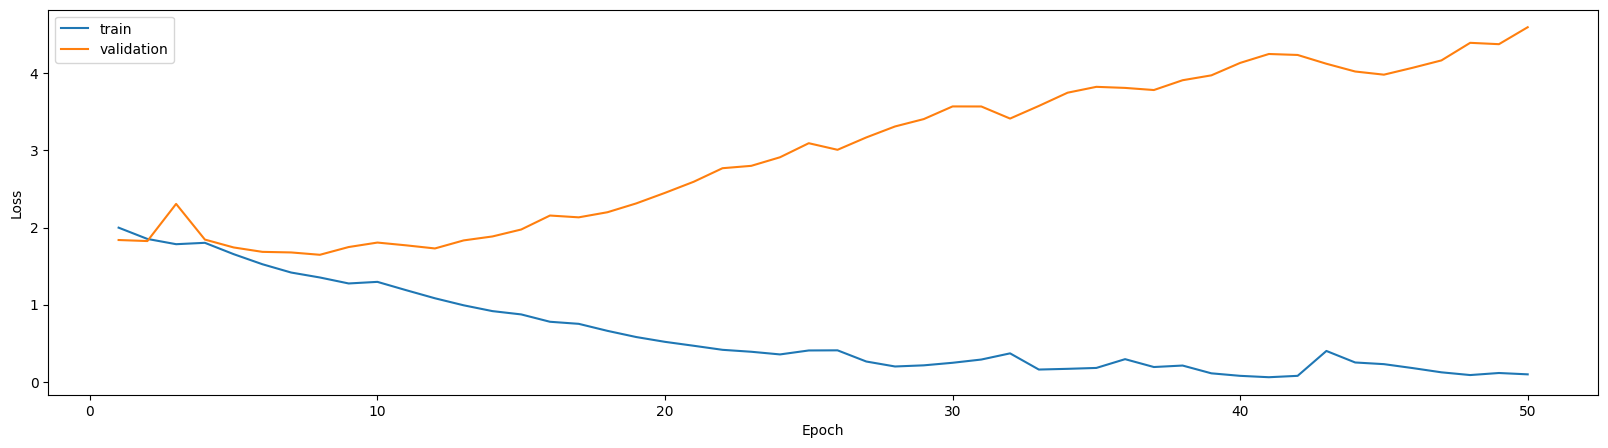

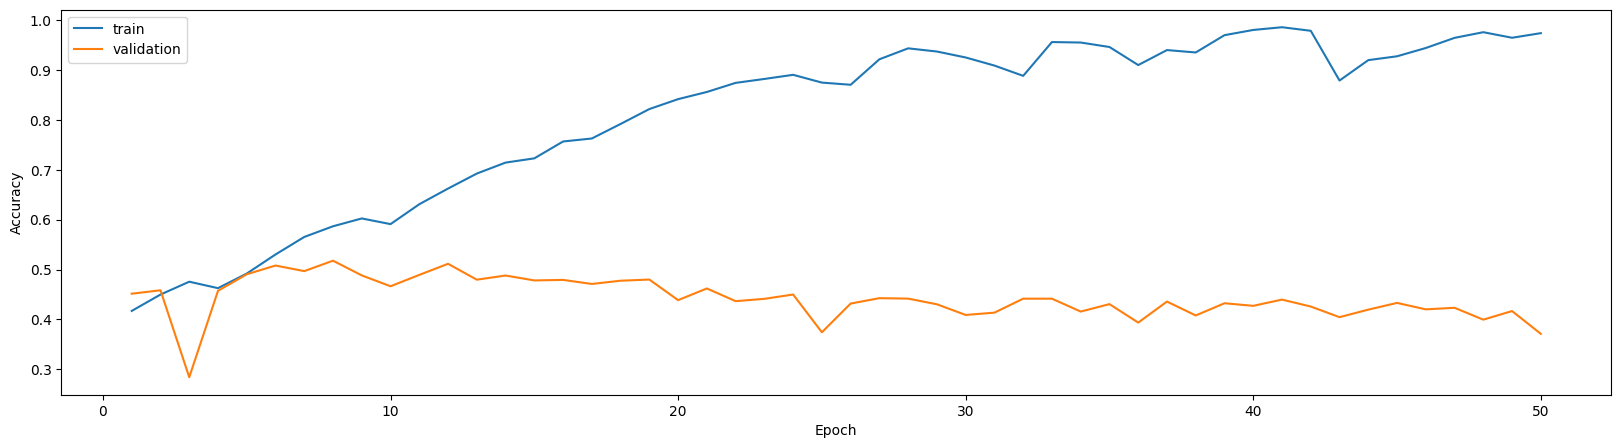

	Evaluation: 100%|██████████| 193/193 [00:02<00:00, 86.12it/s]



Test Loss: 1.641 | Test Acc: 52.18% | Test F1: 0.476 | Test ROC AUC: 0.799

Classification report:
              precision    recall  f1-score   support

           0       0.55      0.79      0.65      4983
           1       0.69      0.49      0.57       672
           2       0.42      0.38      0.40      1070
           3       0.35      0.34      0.35       667
           4       0.24      0.05      0.09       837
           5       0.49      0.13      0.21       144
           6       0.50      0.02      0.04       351
           7       0.38      0.25      0.30       551
           8       0.17      0.06      0.08       200
           9       0.61      0.73      0.67       614
          10       0.27      0.02      0.04       570
          11       0.58      0.18      0.28       208
          12       0.70      0.64      0.67       844
          13       0.33      0.44      0.38       629

    accuracy                           0.52     12340
   macro avg       0.45      0.32 

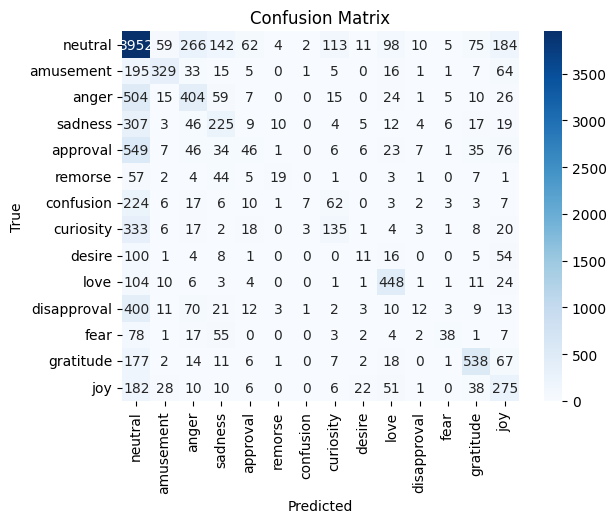

In [ ]:
# plot training curves

import matplotlib.pyplot as plt

# create epoch list
epochs = list(range(1, N_EPOCHS+1))

# plot training and validation loss
plt.figure(figsize=(20, 5))
plt.plot(epochs, train_loss_list, label='train')
plt.plot(epochs, valid_loss_list, label='validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plot training and validation accuracy
plt.figure(figsize=(20, 5))
plt.plot(epochs, train_acc_list, label='train')
plt.plot(epochs, valid_acc_list, label='validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#######
# print out required metrics

import seaborn as sns
model.load_state_dict(torch.load('model-glove-twitter.pt'))

test_loss, test_acc, test_f1, test_roc_auc, test_report, test_cm = evaluate(model, test_dataloader, criterion)
print(f'\nTest Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}% | Test F1: {test_f1:.3f} | Test ROC AUC: {test_roc_auc:.3f}\n')
# print(f'Confusion matrix:\n{test_cm}')
print(f'Classification report:\n{test_report}')

# plot confusion matrix
# labels for the plot - same as labels used for label_vocab
labels = OrderedDict([("neutral", 1), ("amusement", 1), ("anger", 1), ("sadness", 1), ("approval", 1), ("remorse", 1), ("confusion", 1), ("curiosity", 1), ("desire", 1), ("love", 1), ("disapproval", 1), ("fear", 1), ("gratitude", 1), ("joy", 1)])
# create the heatmap
sns.heatmap(test_cm, cmap="Blues", annot=True, fmt='g', xticklabels=labels, yticklabels=labels)
# add labels and title
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
import torch.nn as nn
from torch import optim

# Define an RNN class
class pretrainedRNN1(nn.Module):
    def __init__(self, input_dim, embedding_dim, hidden_dim, output_dim, pretrained_embeddings, pad_idx):        
        super().__init__()
        self.embedding = nn.Embedding.from_pretrained(pretrained_embeddings, freeze=True, padding_idx=pad_idx)        
        # self.embedding = nn.Embedding(input_dim, embedding_dim)
        # self.embedding.weight.data.copy_(pretrained_embeddings) # copy pre-trained vectors to embedding layer
        self.rnn = nn.RNN(embedding_dim, hidden_dim, batch_first=True)        
        self.fc = nn.Linear(hidden_dim, output_dim)
        # self.fc = nn.Linear(hidden_dim, output_dim[1]) # output_dim[0] is hidden_dim, output_dim[1] is output_dim
        
    def forward(self, texts, lengths):
        embedded = self.embedding(texts)                          # VV note that lengths need to be on the CPU
        embedded = nn.utils.rnn.pack_padded_sequence(embedded, lengths.cpu(), batch_first=True, enforce_sorted=False)

        output, hidden = self.rnn(embedded)

        return self.fc(hidden.squeeze(0))


# Setting model building arguments
INPUT_DIM = len(text_vocab)
EMBEDDING_DIM = 100
HIDDEN_DIM = 256
OUTPUT_DIM = len(label_vocab) # 14 output nodes
PAD_IDX = text_vocab["<pad>"]

model_glove_twitter_2 = pretrainedRNN1(INPUT_DIM, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM, pretrained_embeddings, PAD_IDX) # create a RNN model using the arguments
print(f'The model has {count_parameters(model_glove_twitter_2):,} trainable parameters')

# Set other parameters
optimizer = optim.Adam(model_glove_twitter_2.parameters())
criterion = nn.CrossEntropyLoss()

# Use GPU
model_glove_twitter_2 = model_glove_twitter_2.to(DEVICE)
criterion = criterion.to(DEVICE)

The model has 95,246 trainable parameters


In [ ]:
######
N_EPOCHS = 50
train_loss_list = []
train_acc_list = []
valid_loss_list = []
valid_acc_list = []

best_valid_loss = float('inf')
print(f"Using {'GPU' if str(DEVICE) == 'cuda' else 'CPU'} for training.")

for epoch in range(N_EPOCHS):
    print(f'Epoch: {epoch+1:02}')
    start_time = time.time()
    
    train_loss, train_acc = train(model_glove_twitter_2, train_dataloader, optimizer, criterion)
    train_loss_list.append(train_loss)
    train_acc_list.append(train_acc)
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    
    # valid_loss, valid_acc = evaluate(model, valid_dataloader, criterion)
    valid_loss, valid_acc, valid_f1, valid_auc_roc, valid_report, valid_cm  = evaluate(model_glove_twitter_2, valid_dataloader, criterion)
    valid_loss_list.append(valid_loss)
    valid_acc_list.append(valid_acc)
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')
    
    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model_glove_twitter_2.state_dict(), 'model_glove_twitter_2.pt')


Using GPU for training.
Epoch: 01


	Training: 100%|██████████| 315/315 [00:03<00:00, 101.99it/s]


	Train Loss: 2.001 | Train Acc: 41.57%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 135.07it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.913 |  Val. Acc: 44.00%
Epoch: 02


	Training: 100%|██████████| 315/315 [00:04<00:00, 71.44it/s]


	Train Loss: 1.869 | Train Acc: 43.95%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 107.36it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.831 |  Val. Acc: 45.47%
Epoch: 03


	Training: 100%|██████████| 315/315 [00:02<00:00, 106.50it/s]


	Train Loss: 1.875 | Train Acc: 44.04%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 140.27it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.924 |  Val. Acc: 44.23%
Epoch: 04


	Training: 100%|██████████| 315/315 [00:02<00:00, 107.49it/s]


	Train Loss: 1.850 | Train Acc: 44.90%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 137.32it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.836 |  Val. Acc: 45.99%
Epoch: 05


	Training: 100%|██████████| 315/315 [00:03<00:00, 80.47it/s]


	Train Loss: 1.800 | Train Acc: 45.14%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 89.06it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.799 |  Val. Acc: 48.29%
Epoch: 06


	Training: 100%|██████████| 315/315 [00:03<00:00, 99.98it/s] 


	Train Loss: 1.809 | Train Acc: 45.59%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 138.64it/s]


	 Val. Loss: 1.826 |  Val. Acc: 46.33%
Epoch: 07


	Training: 100%|██████████| 315/315 [00:02<00:00, 107.48it/s]


	Train Loss: 1.812 | Train Acc: 45.33%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 138.49it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.906 |  Val. Acc: 43.90%
Epoch: 08


	Training: 100%|██████████| 315/315 [00:03<00:00, 95.31it/s]


	Train Loss: 1.806 | Train Acc: 45.83%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 90.36it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.809 |  Val. Acc: 46.82%
Epoch: 09


	Training: 100%|██████████| 315/315 [00:03<00:00, 79.89it/s] 


	Train Loss: 1.803 | Train Acc: 45.80%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 136.01it/s]


	 Val. Loss: 1.825 |  Val. Acc: 47.07%
Epoch: 10


	Training: 100%|██████████| 315/315 [00:02<00:00, 108.05it/s]


	Train Loss: 1.730 | Train Acc: 47.18%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 137.44it/s]


	 Val. Loss: 1.779 |  Val. Acc: 47.67%
Epoch: 11


	Training: 100%|██████████| 315/315 [00:02<00:00, 106.33it/s]


	Train Loss: 1.663 | Train Acc: 49.04%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 101.79it/s]


	 Val. Loss: 1.723 |  Val. Acc: 49.30%
Epoch: 12


	Training: 100%|██████████| 315/315 [00:04<00:00, 71.36it/s]


	Train Loss: 1.819 | Train Acc: 45.30%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 134.09it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.969 |  Val. Acc: 43.07%
Epoch: 13


	Training: 100%|██████████| 315/315 [00:02<00:00, 106.68it/s]


	Train Loss: 1.831 | Train Acc: 44.77%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 137.15it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.848 |  Val. Acc: 44.58%
Epoch: 14


	Training: 100%|██████████| 315/315 [00:02<00:00, 105.67it/s]


	Train Loss: 1.702 | Train Acc: 47.62%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 137.02it/s]


	 Val. Loss: 1.870 |  Val. Acc: 45.26%
Epoch: 15


	Training: 100%|██████████| 315/315 [00:04<00:00, 71.89it/s]


	Train Loss: 1.704 | Train Acc: 47.96%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 86.84it/s]


	 Val. Loss: 1.801 |  Val. Acc: 47.72%
Epoch: 16


	Training: 100%|██████████| 315/315 [00:02<00:00, 106.48it/s]


	Train Loss: 1.784 | Train Acc: 45.71%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 138.00it/s]


	 Val. Loss: 1.799 |  Val. Acc: 46.26%
Epoch: 17


	Training: 100%|██████████| 315/315 [00:02<00:00, 105.93it/s]


	Train Loss: 1.651 | Train Acc: 48.58%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 136.64it/s]


	 Val. Loss: 1.760 |  Val. Acc: 48.55%
Epoch: 18


	Training: 100%|██████████| 315/315 [00:03<00:00, 86.33it/s]


	Train Loss: 1.635 | Train Acc: 49.50%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 90.41it/s]


	 Val. Loss: 1.959 |  Val. Acc: 40.83%
Epoch: 19


	Training: 100%|██████████| 315/315 [00:03<00:00, 91.29it/s] 


	Train Loss: 1.713 | Train Acc: 46.91%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 135.68it/s]


	 Val. Loss: 1.812 |  Val. Acc: 45.24%
Epoch: 20


	Training: 100%|██████████| 315/315 [00:02<00:00, 108.18it/s]


	Train Loss: 1.592 | Train Acc: 50.38%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 139.65it/s]


	 Val. Loss: 1.775 |  Val. Acc: 46.31%
Epoch: 21


	Training: 100%|██████████| 315/315 [00:03<00:00, 104.04it/s]


	Train Loss: 1.562 | Train Acc: 51.67%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 92.66it/s]


	 Val. Loss: 1.761 |  Val. Acc: 48.71%
Epoch: 22


	Training: 100%|██████████| 315/315 [00:04<00:00, 75.73it/s]


	Train Loss: 1.528 | Train Acc: 52.70%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 137.96it/s]


	 Val. Loss: 1.790 |  Val. Acc: 47.92%
Epoch: 23


	Training: 100%|██████████| 315/315 [00:02<00:00, 106.98it/s]


	Train Loss: 1.501 | Train Acc: 53.24%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 138.09it/s]


	 Val. Loss: 1.755 |  Val. Acc: 48.29%
Epoch: 24


	Training: 100%|██████████| 315/315 [00:02<00:00, 105.43it/s]


	Train Loss: 1.466 | Train Acc: 54.14%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 126.62it/s]


	 Val. Loss: 1.743 |  Val. Acc: 49.43%
Epoch: 25


	Training: 100%|██████████| 315/315 [00:04<00:00, 70.48it/s]


	Train Loss: 1.408 | Train Acc: 55.84%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 112.73it/s]


	 Val. Loss: 1.764 |  Val. Acc: 49.49%
Epoch: 26


	Training: 100%|██████████| 315/315 [00:02<00:00, 106.45it/s]


	Train Loss: 1.382 | Train Acc: 56.10%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 136.43it/s]


	 Val. Loss: 1.761 |  Val. Acc: 48.43%
Epoch: 27


	Training: 100%|██████████| 315/315 [00:02<00:00, 106.62it/s]


	Train Loss: 1.338 | Train Acc: 57.60%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 139.29it/s]


	 Val. Loss: 1.777 |  Val. Acc: 49.33%
Epoch: 28


	Training: 100%|██████████| 315/315 [00:04<00:00, 78.17it/s]


	Train Loss: 1.424 | Train Acc: 55.50%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 87.47it/s]


	 Val. Loss: 1.836 |  Val. Acc: 46.98%
Epoch: 29


	Training: 100%|██████████| 315/315 [00:03<00:00, 100.57it/s]


	Train Loss: 1.435 | Train Acc: 54.59%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 133.49it/s]


	 Val. Loss: 1.805 |  Val. Acc: 46.78%
Epoch: 30


	Training: 100%|██████████| 315/315 [00:02<00:00, 106.23it/s]


	Train Loss: 1.381 | Train Acc: 56.31%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 137.30it/s]


	 Val. Loss: 1.982 |  Val. Acc: 44.80%
Epoch: 31


	Training: 100%|██████████| 315/315 [00:03<00:00, 92.06it/s]


	Train Loss: 1.377 | Train Acc: 56.38%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 90.30it/s]


	 Val. Loss: 1.825 |  Val. Acc: 47.37%
Epoch: 32


	Training: 100%|██████████| 315/315 [00:03<00:00, 83.37it/s] 


	Train Loss: 1.232 | Train Acc: 60.33%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 137.04it/s]


	 Val. Loss: 1.823 |  Val. Acc: 49.35%
Epoch: 33


	Training: 100%|██████████| 315/315 [00:02<00:00, 106.41it/s]


	Train Loss: 1.199 | Train Acc: 61.63%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 140.22it/s]


	 Val. Loss: 1.843 |  Val. Acc: 48.38%
Epoch: 34


	Training: 100%|██████████| 315/315 [00:02<00:00, 108.56it/s]


	Train Loss: 1.371 | Train Acc: 56.99%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 105.11it/s]


	 Val. Loss: 1.985 |  Val. Acc: 43.79%
Epoch: 35


	Training: 100%|██████████| 315/315 [00:04<00:00, 71.75it/s]


	Train Loss: 1.697 | Train Acc: 48.48%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 137.22it/s]


	 Val. Loss: 2.029 |  Val. Acc: 43.33%
Epoch: 36


	Training: 100%|██████████| 315/315 [00:02<00:00, 106.07it/s]


	Train Loss: 1.509 | Train Acc: 52.55%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 137.14it/s]


	 Val. Loss: 1.864 |  Val. Acc: 45.88%
Epoch: 37


	Training: 100%|██████████| 315/315 [00:02<00:00, 107.24it/s]


	Train Loss: 1.403 | Train Acc: 55.35%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 142.00it/s]


	 Val. Loss: 1.871 |  Val. Acc: 46.56%
Epoch: 38


	Training: 100%|██████████| 315/315 [00:04<00:00, 75.49it/s]


	Train Loss: 1.307 | Train Acc: 58.10%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 87.48it/s]


	 Val. Loss: 1.862 |  Val. Acc: 46.82%
Epoch: 39


	Training: 100%|██████████| 315/315 [00:02<00:00, 105.27it/s]


	Train Loss: 1.313 | Train Acc: 57.72%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 136.76it/s]


	 Val. Loss: 1.872 |  Val. Acc: 48.23%
Epoch: 40


	Training: 100%|██████████| 315/315 [00:02<00:00, 107.35it/s]


	Train Loss: 1.287 | Train Acc: 58.38%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 139.95it/s]


	 Val. Loss: 1.893 |  Val. Acc: 47.12%
Epoch: 41


	Training: 100%|██████████| 315/315 [00:03<00:00, 88.93it/s]


	Train Loss: 1.194 | Train Acc: 61.33%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 91.97it/s]


	 Val. Loss: 1.903 |  Val. Acc: 47.49%
Epoch: 42


	Training: 100%|██████████| 315/315 [00:03<00:00, 85.94it/s] 


	Train Loss: 1.367 | Train Acc: 56.99%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 137.74it/s]


	 Val. Loss: 1.941 |  Val. Acc: 45.69%
Epoch: 43


	Training: 100%|██████████| 315/315 [00:02<00:00, 105.92it/s]


	Train Loss: 1.385 | Train Acc: 55.63%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 139.91it/s]


	 Val. Loss: 1.914 |  Val. Acc: 46.44%
Epoch: 44


	Training: 100%|██████████| 315/315 [00:02<00:00, 106.13it/s]


	Train Loss: 1.290 | Train Acc: 58.46%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 90.57it/s]


	 Val. Loss: 1.904 |  Val. Acc: 46.15%
Epoch: 45


	Training: 100%|██████████| 315/315 [00:04<00:00, 75.45it/s] 


	Train Loss: 1.202 | Train Acc: 61.18%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 137.62it/s]


	 Val. Loss: 1.977 |  Val. Acc: 46.46%
Epoch: 46


	Training: 100%|██████████| 315/315 [00:03<00:00, 104.92it/s]


	Train Loss: 1.193 | Train Acc: 61.51%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 138.00it/s]


	 Val. Loss: 1.971 |  Val. Acc: 45.17%
Epoch: 47


	Training: 100%|██████████| 315/315 [00:03<00:00, 104.39it/s]


	Train Loss: 1.077 | Train Acc: 64.98%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 133.24it/s]


	 Val. Loss: 1.978 |  Val. Acc: 44.96%
Epoch: 48


	Training: 100%|██████████| 315/315 [00:04<00:00, 71.50it/s]


	Train Loss: 1.083 | Train Acc: 64.71%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 103.96it/s]


	 Val. Loss: 2.004 |  Val. Acc: 44.39%
Epoch: 49


	Training: 100%|██████████| 315/315 [00:02<00:00, 105.81it/s]


	Train Loss: 1.009 | Train Acc: 67.44%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 135.58it/s]


	 Val. Loss: 2.096 |  Val. Acc: 42.79%
Epoch: 50


	Training: 100%|██████████| 315/315 [00:02<00:00, 105.35it/s]


	Train Loss: 1.046 | Train Acc: 65.98%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 140.16it/s]


	 Val. Loss: 2.094 |  Val. Acc: 44.55%


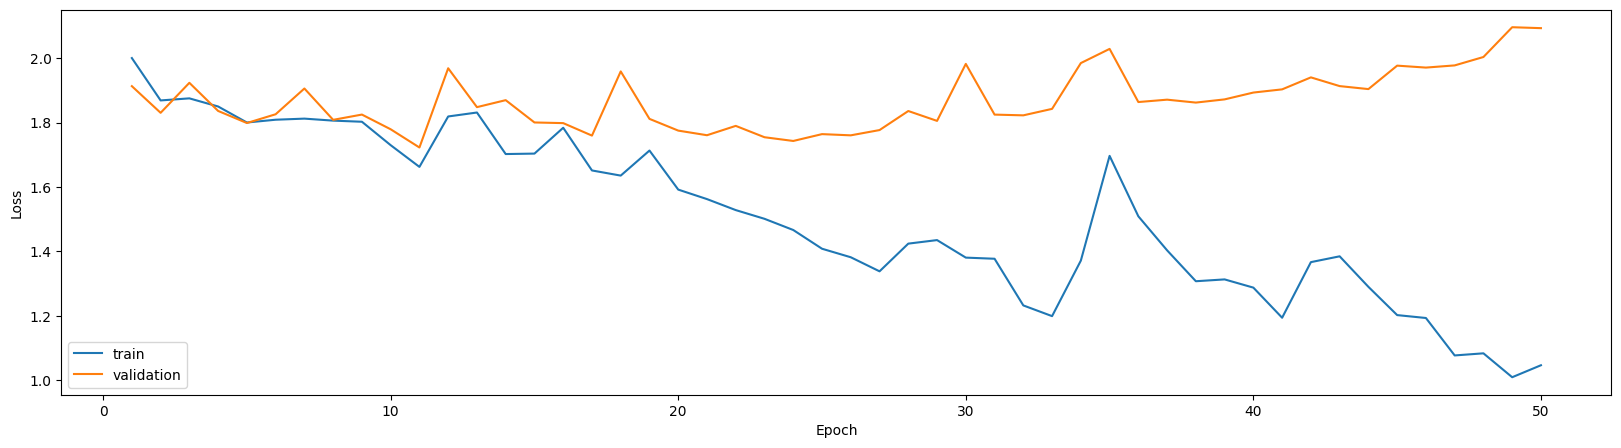

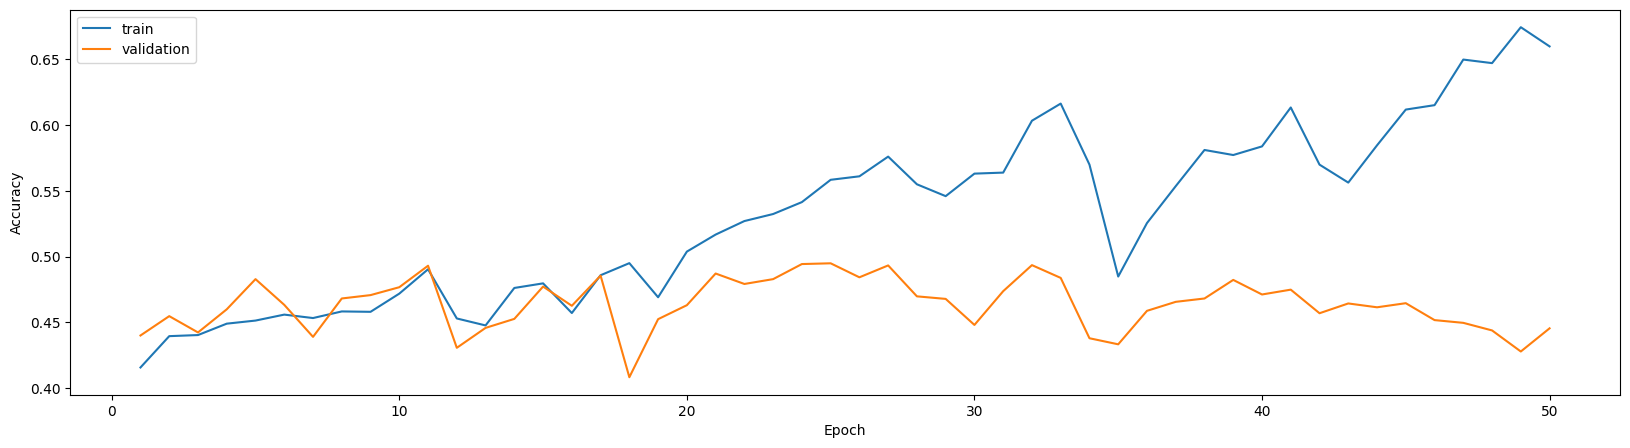

	Evaluation: 100%|██████████| 193/193 [00:01<00:00, 105.86it/s]



Test Loss: 1.703 | Test Acc: 49.60% | Test F1: 0.433 | Test ROC AUC: 0.770

Classification report:
              precision    recall  f1-score   support

           0       0.51      0.84      0.64      4983
           1       0.64      0.29      0.40       672
           2       0.36      0.30      0.32      1070
           3       0.33      0.32      0.32       667
           4       0.27      0.01      0.02       837
           5       0.31      0.11      0.16       144
           6       0.25      0.01      0.01       351
           7       0.38      0.29      0.33       551
           8       0.12      0.01      0.02       200
           9       0.51      0.63      0.57       614
          10       0.21      0.01      0.01       570
          11       0.50      0.09      0.15       208
          12       0.75      0.58      0.65       844
          13       0.34      0.22      0.27       629

    accuracy                           0.50     12340
   macro avg       0.39      0.26 

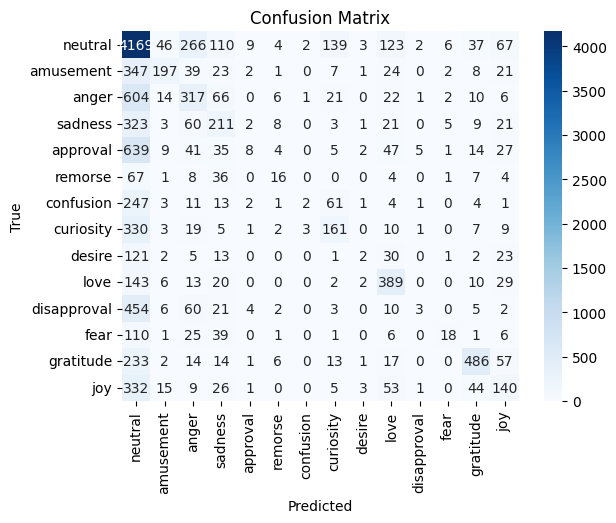

In [ ]:
# plot training curves

import matplotlib.pyplot as plt

# create epoch list
epochs = list(range(1, N_EPOCHS+1))

# plot training and validation loss
plt.figure(figsize=(20, 5))
plt.plot(epochs, train_loss_list, label='train')
plt.plot(epochs, valid_loss_list, label='validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plot training and validation accuracy
plt.figure(figsize=(20, 5))
plt.plot(epochs, train_acc_list, label='train')
plt.plot(epochs, valid_acc_list, label='validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#######
# print out required metrics

import seaborn as sns
model_glove_twitter_2.load_state_dict(torch.load('model_glove_twitter_2.pt'))

test_loss, test_acc, test_f1, test_roc_auc, test_report, test_cm = evaluate(model_glove_twitter_2, test_dataloader, criterion)
print(f'\nTest Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}% | Test F1: {test_f1:.3f} | Test ROC AUC: {test_roc_auc:.3f}\n')
# print(f'Confusion matrix:\n{test_cm}')
print(f'Classification report:\n{test_report}')

# plot confusion matrix
# labels for the plot - same as labels used for label_vocab
labels = OrderedDict([("neutral", 1), ("amusement", 1), ("anger", 1), ("sadness", 1), ("approval", 1), ("remorse", 1), ("confusion", 1), ("curiosity", 1), ("desire", 1), ("love", 1), ("disapproval", 1), ("fear", 1), ("gratitude", 1), ("joy", 1)])
# create the heatmap
sns.heatmap(test_cm, cmap="Blues", annot=True, fmt='g', xticklabels=labels, yticklabels=labels)
# add labels and title
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()



---



---



---





---



---



---

## 1.D.2 GloVe twitter vectors : 27B, dim=100
### Changing max vocab size to 100000 to check if it affects performance

In [ ]:
from torchtext import vocab

MAX_VOCAB_SIZE = 100_000

glove_vectors1 = vocab.GloVe(
    name="twitter.27B",
    dim="100",
    max_vectors=MAX_VOCAB_SIZE
)

100%|█████████▉| 99999/100000 [00:10<00:00, 9500.98it/s] 


In [ ]:
from torchtext.vocab import vocab

text_vocab = vocab(glove_vectors1.stoi, min_freq=0, specials=("<unk>", "<pad>"), special_first=True)
text_vocab.set_default_index(text_vocab["<unk>"])

pretrained_embeddings = glove_vectors1.vectors
pretrained_embeddings = torch.cat([
    torch.empty(1, glove_vectors1.dim).normal_(),  # unk token vector
    torch.zeros(1, glove_vectors1.dim),  # padding token vector
    pretrained_embeddings
])

print("Vocab size: ", len(text_vocab))
print("Pretrained vectors shape: ", pretrained_embeddings.shape)
print("<unk> vector: ", pretrained_embeddings[text_vocab["<unk>"]])
print("<pad> vector: ", pretrained_embeddings[text_vocab["<pad>"]])

Vocab size:  100002
Pretrained vectors shape:  torch.Size([100002, 100])
<unk> vector:  tensor([-0.1117, -0.4966,  0.1631, -0.8817,  0.0539,  0.6684, -0.0597, -0.4675,
        -0.2153,  0.8840, -0.7584, -0.3689, -0.3424, -1.4020,  0.3206, -1.0219,
         0.7988, -0.0923, -0.7049, -1.6024,  0.2891,  0.4899, -0.3853, -0.7120,
        -0.1706, -1.4594,  0.2207,  0.2463, -1.3248,  0.6970, -0.6631,  1.2158,
        -1.4949,  0.8810, -1.1786, -0.9340, -0.5675, -0.2772, -2.1834,  0.3668,
         0.9380,  0.0078, -0.3139, -1.1567,  1.8409, -1.0174,  1.2192,  0.1601,
         1.5985, -0.0469, -1.5270, -2.0143, -1.5173,  0.3877, -1.1849,  0.6897,
         1.3232,  1.8169,  0.6808,  0.7244,  0.0323, -1.6593, -1.8773,  0.7372,
         0.9257,  0.9247,  0.1825, -0.0737,  0.3147, -1.0369,  0.2100,  0.6144,
         0.0628, -0.3297, -1.7970,  0.8728,  0.7670, -0.1138, -0.9428,  0.7540,
         0.1407, -0.6937, -0.6159, -0.7295,  1.3204,  1.5997, -1.0792, -0.3396,
        -1.4538, -2.6740,  1.598

In [ ]:
from collections import OrderedDict
label_vocab = vocab(OrderedDict([("neutral", 1), ("amusement", 1), ("anger", 1), ("sadness", 1), ("approval", 1), ("remorse", 1), ("confusion", 1), ("curiosity", 1), ("desire", 1), ("love", 1), ("disapproval", 1), ("fear", 1), ("gratitude", 1), ("joy", 1)]))


In [ ]:
import torchtext.transforms as T

text_transform = T.Sequential(
    SpacyTokenizer(),  # Tokenize
    T.VocabTransform(text_vocab),  # Conver to vocab IDs
    T.ToTensor(padding_value=text_vocab["<pad>"]),  # Convert to tensor and pad
)

label_transform = T.Sequential(
    # T.LabelToIndex(label_vocab.get_itos()),  # Convert to integer #labels are already integers
    T.ToTensor(),  # Convert to tensor
)

lengths_transform = T.Sequential(
    SpacyTokenizer(),
    ToLengths(),
    T.ToTensor(),
)

In [ ]:
train_dataloader = _get_dataloader(train_data)
valid_dataloader = _get_dataloader(valid_data)
test_dataloader = _get_dataloader(test_data)

In [ ]:
import torch.nn as nn
from torch import optim

# Define an RNN class
class pretrainedRNN(nn.Module):
    def __init__(self, input_dim, embedding_dim, hidden_dim, output_dim, pretrained_embeddings):        
        super().__init__()
        # self.embedding = nn.Embedding.from_pretrained(pretrained_embeddings, freeze=True, padding_idx=pad_idx)        

        self.embedding = nn.Embedding(input_dim, embedding_dim)
        self.embedding.weight.data.copy_(pretrained_embeddings) # copy pre-trained vectors to embedding layer
        self.rnn = nn.RNN(embedding_dim, hidden_dim, batch_first=True)        
        self.fc = nn.Linear(hidden_dim, output_dim)
        # self.fc = nn.Linear(hidden_dim, output_dim[1]) # output_dim[0] is hidden_dim, output_dim[1] is output_dim
        
    def forward(self, texts, lengths):
        embedded = self.embedding(texts)                          # VV note that lengths need to be on the CPU
        embedded = nn.utils.rnn.pack_padded_sequence(embedded, lengths.cpu(), batch_first=True, enforce_sorted=False)

        output, hidden = self.rnn(embedded)

        return self.fc(hidden.squeeze(0))


# Setting model building arguments
INPUT_DIM = len(text_vocab)
EMBEDDING_DIM = 100
HIDDEN_DIM = 256
OUTPUT_DIM = len(label_vocab) # 14 output nodes

model = pretrainedRNN(INPUT_DIM, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM, pretrained_embeddings) # create a RNN model using the arguments
print(f'The model has {count_parameters(model):,} trainable parameters')

# Set other parameters
optimizer = optim.Adam(model.parameters())
criterion = nn.CrossEntropyLoss()

# Use GPU
model = model.to(DEVICE)
criterion = criterion.to(DEVICE)

The model has 10,095,446 trainable parameters


In [ ]:
######
N_EPOCHS = 50
train_loss_list = []
train_acc_list = []
valid_loss_list = []
valid_acc_list = []

best_valid_loss = float('inf')
print(f"Using {'GPU' if str(DEVICE) == 'cuda' else 'CPU'} for training.")

for epoch in range(N_EPOCHS):
    print(f'Epoch: {epoch+1:02}')
    start_time = time.time()
    
    train_loss, train_acc = train(model, train_dataloader, optimizer, criterion)
    train_loss_list.append(train_loss)
    train_acc_list.append(train_acc)
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    
    # valid_loss, valid_acc = evaluate(model, valid_dataloader, criterion)
    valid_loss, valid_acc, valid_f1, valid_auc_roc, valid_report, valid_cm  = evaluate(model, valid_dataloader, criterion)
    valid_loss_list.append(valid_loss)
    valid_acc_list.append(valid_acc)
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')
    
    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'model-glove-twitter.pt')


Using GPU for training.
Epoch: 01


	Training: 100%|██████████| 315/315 [00:06<00:00, 45.27it/s]


	Train Loss: 1.989 | Train Acc: 41.72%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 80.78it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.916 |  Val. Acc: 42.01%
Epoch: 02


	Training: 100%|██████████| 315/315 [00:05<00:00, 54.25it/s]


	Train Loss: 1.829 | Train Acc: 45.54%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 136.64it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.797 |  Val. Acc: 46.56%
Epoch: 03


	Training: 100%|██████████| 315/315 [00:04<00:00, 72.14it/s]


	Train Loss: 1.689 | Train Acc: 49.61%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 137.21it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.760 |  Val. Acc: 47.92%
Epoch: 04


	Training: 100%|██████████| 315/315 [00:05<00:00, 62.30it/s]


	Train Loss: 1.598 | Train Acc: 51.82%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 88.55it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.752 |  Val. Acc: 47.88%
Epoch: 05


	Training: 100%|██████████| 315/315 [00:04<00:00, 67.73it/s]


	Train Loss: 1.570 | Train Acc: 52.08%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 138.43it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.756 |  Val. Acc: 50.18%
Epoch: 06


	Training: 100%|██████████| 315/315 [00:04<00:00, 73.60it/s]


	Train Loss: 1.414 | Train Acc: 55.75%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 126.20it/s]


	 Val. Loss: 1.749 |  Val. Acc: 49.04%
Epoch: 07


	Training: 100%|██████████| 315/315 [00:05<00:00, 54.92it/s]


	Train Loss: 1.324 | Train Acc: 58.98%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 137.00it/s]


	 Val. Loss: 1.813 |  Val. Acc: 47.10%
Epoch: 08


	Training: 100%|██████████| 315/315 [00:04<00:00, 71.66it/s]


	Train Loss: 1.280 | Train Acc: 60.16%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 138.37it/s]


	 Val. Loss: 1.871 |  Val. Acc: 47.01%
Epoch: 09


	Training: 100%|██████████| 315/315 [00:04<00:00, 63.05it/s]


	Train Loss: 1.137 | Train Acc: 64.92%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 87.57it/s]


	 Val. Loss: 1.859 |  Val. Acc: 48.12%
Epoch: 10


	Training: 100%|██████████| 315/315 [00:04<00:00, 69.19it/s]


	Train Loss: 1.103 | Train Acc: 66.10%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 137.80it/s]


	 Val. Loss: 1.897 |  Val. Acc: 47.58%
Epoch: 11


	Training: 100%|██████████| 315/315 [00:04<00:00, 72.73it/s]


	Train Loss: 0.950 | Train Acc: 70.88%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 117.53it/s]


	 Val. Loss: 2.020 |  Val. Acc: 45.32%
Epoch: 12


	Training: 100%|██████████| 315/315 [00:05<00:00, 57.15it/s]


	Train Loss: 1.090 | Train Acc: 66.50%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 135.90it/s]


	 Val. Loss: 2.073 |  Val. Acc: 45.21%
Epoch: 13


	Training: 100%|██████████| 315/315 [00:04<00:00, 74.15it/s]


	Train Loss: 0.894 | Train Acc: 72.48%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 141.54it/s]


	 Val. Loss: 2.110 |  Val. Acc: 44.25%
Epoch: 14


	Training: 100%|██████████| 315/315 [00:04<00:00, 64.48it/s]


	Train Loss: 0.804 | Train Acc: 75.32%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 90.57it/s]


	 Val. Loss: 2.260 |  Val. Acc: 44.36%
Epoch: 15


	Training: 100%|██████████| 315/315 [00:04<00:00, 67.67it/s]


	Train Loss: 0.699 | Train Acc: 78.53%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 143.45it/s]


	 Val. Loss: 2.324 |  Val. Acc: 44.34%
Epoch: 16


	Training: 100%|██████████| 315/315 [00:04<00:00, 73.17it/s]


	Train Loss: 0.613 | Train Acc: 81.30%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 141.93it/s]


	 Val. Loss: 2.494 |  Val. Acc: 43.02%
Epoch: 17


	Training: 100%|██████████| 315/315 [00:05<00:00, 55.75it/s]


	Train Loss: 0.581 | Train Acc: 82.36%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 143.21it/s]


	 Val. Loss: 2.607 |  Val. Acc: 40.62%
Epoch: 18


	Training: 100%|██████████| 315/315 [00:04<00:00, 72.90it/s]


	Train Loss: 0.613 | Train Acc: 81.13%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 138.14it/s]


	 Val. Loss: 2.713 |  Val. Acc: 39.88%
Epoch: 19


	Training: 100%|██████████| 315/315 [00:04<00:00, 64.92it/s]


	Train Loss: 0.461 | Train Acc: 86.20%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 87.68it/s]


	 Val. Loss: 2.792 |  Val. Acc: 41.97%
Epoch: 20


	Training: 100%|██████████| 315/315 [00:04<00:00, 65.99it/s]


	Train Loss: 0.455 | Train Acc: 86.35%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 139.10it/s]


	 Val. Loss: 2.964 |  Val. Acc: 40.40%
Epoch: 21


	Training: 100%|██████████| 315/315 [00:04<00:00, 73.20it/s]


	Train Loss: 0.357 | Train Acc: 89.29%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 139.17it/s]


	 Val. Loss: 3.086 |  Val. Acc: 40.38%
Epoch: 22


	Training: 100%|██████████| 315/315 [00:05<00:00, 54.84it/s]


	Train Loss: 0.292 | Train Acc: 91.37%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 140.16it/s]


	 Val. Loss: 3.236 |  Val. Acc: 41.29%
Epoch: 23


	Training: 100%|██████████| 315/315 [00:04<00:00, 72.99it/s]


	Train Loss: 0.252 | Train Acc: 92.70%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 140.80it/s]


	 Val. Loss: 3.319 |  Val. Acc: 41.11%
Epoch: 24


	Training: 100%|██████████| 315/315 [00:04<00:00, 66.47it/s]


	Train Loss: 0.230 | Train Acc: 93.18%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 87.68it/s]


	 Val. Loss: 3.634 |  Val. Acc: 41.14%
Epoch: 25


	Training: 100%|██████████| 315/315 [00:04<00:00, 64.00it/s]


	Train Loss: 0.318 | Train Acc: 90.30%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 139.77it/s]


	 Val. Loss: 3.616 |  Val. Acc: 39.09%
Epoch: 26


	Training: 100%|██████████| 315/315 [00:04<00:00, 73.31it/s]


	Train Loss: 0.239 | Train Acc: 92.71%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 135.50it/s]


	 Val. Loss: 3.666 |  Val. Acc: 40.59%
Epoch: 27


	Training: 100%|██████████| 315/315 [00:05<00:00, 54.10it/s]


	Train Loss: 0.182 | Train Acc: 94.85%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 124.97it/s]


	 Val. Loss: 3.842 |  Val. Acc: 40.38%
Epoch: 28


	Training: 100%|██████████| 315/315 [00:04<00:00, 72.65it/s]


	Train Loss: 0.274 | Train Acc: 91.40%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 139.53it/s]


	 Val. Loss: 3.911 |  Val. Acc: 38.75%
Epoch: 29


	Training: 100%|██████████| 315/315 [00:04<00:00, 67.16it/s]


	Train Loss: 0.193 | Train Acc: 94.37%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 86.47it/s]


	 Val. Loss: 3.897 |  Val. Acc: 38.51%
Epoch: 30


	Training: 100%|██████████| 315/315 [00:04<00:00, 63.42it/s]


	Train Loss: 0.185 | Train Acc: 94.31%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 133.90it/s]


	 Val. Loss: 4.188 |  Val. Acc: 37.75%
Epoch: 31


	Training: 100%|██████████| 315/315 [00:04<00:00, 73.79it/s]


	Train Loss: 0.233 | Train Acc: 92.90%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 142.56it/s]


	 Val. Loss: 4.022 |  Val. Acc: 40.01%
Epoch: 32


	Training: 100%|██████████| 315/315 [00:05<00:00, 55.21it/s]


	Train Loss: 0.160 | Train Acc: 95.41%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 113.98it/s]


	 Val. Loss: 4.137 |  Val. Acc: 40.67%
Epoch: 33


	Training: 100%|██████████| 315/315 [00:04<00:00, 73.38it/s]


	Train Loss: 0.092 | Train Acc: 97.62%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 139.62it/s]


	 Val. Loss: 4.360 |  Val. Acc: 39.40%
Epoch: 34


	Training: 100%|██████████| 315/315 [00:04<00:00, 68.30it/s]


	Train Loss: 0.242 | Train Acc: 92.64%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 84.49it/s]


	 Val. Loss: 4.112 |  Val. Acc: 40.44%
Epoch: 35


	Training: 100%|██████████| 315/315 [00:05<00:00, 61.83it/s]


	Train Loss: 0.242 | Train Acc: 92.48%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 135.31it/s]


	 Val. Loss: 4.205 |  Val. Acc: 38.87%
Epoch: 36


	Training: 100%|██████████| 315/315 [00:04<00:00, 72.80it/s]


	Train Loss: 0.171 | Train Acc: 94.65%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 138.39it/s]


	 Val. Loss: 4.408 |  Val. Acc: 38.59%
Epoch: 37


	Training: 100%|██████████| 315/315 [00:05<00:00, 55.99it/s]


	Train Loss: 0.111 | Train Acc: 96.85%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 98.56it/s] 


	 Val. Loss: 4.461 |  Val. Acc: 39.23%
Epoch: 38


	Training: 100%|██████████| 315/315 [00:04<00:00, 72.71it/s]


	Train Loss: 0.080 | Train Acc: 97.79%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 138.49it/s]


	 Val. Loss: 4.692 |  Val. Acc: 38.40%
Epoch: 39


	Training: 100%|██████████| 315/315 [00:04<00:00, 71.59it/s]


	Train Loss: 0.073 | Train Acc: 98.17%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 89.93it/s]


	 Val. Loss: 4.691 |  Val. Acc: 39.65%
Epoch: 40


	Training: 100%|██████████| 315/315 [00:05<00:00, 59.40it/s]


	Train Loss: 0.093 | Train Acc: 97.28%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 141.85it/s]


	 Val. Loss: 4.718 |  Val. Acc: 39.49%
Epoch: 41


	Training: 100%|██████████| 315/315 [00:04<00:00, 72.75it/s]


	Train Loss: 0.381 | Train Acc: 88.58%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 136.34it/s]


	 Val. Loss: 4.319 |  Val. Acc: 37.26%
Epoch: 42


	Training: 100%|██████████| 315/315 [00:05<00:00, 57.33it/s]


	Train Loss: 0.307 | Train Acc: 90.49%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 87.26it/s] 


	 Val. Loss: 4.277 |  Val. Acc: 38.40%
Epoch: 43


	Training: 100%|██████████| 315/315 [00:04<00:00, 71.95it/s]


	Train Loss: 0.124 | Train Acc: 96.22%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 138.14it/s]


	 Val. Loss: 4.360 |  Val. Acc: 40.40%
Epoch: 44


	Training: 100%|██████████| 315/315 [00:04<00:00, 70.22it/s]


	Train Loss: 0.069 | Train Acc: 98.16%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 88.37it/s]


	 Val. Loss: 4.487 |  Val. Acc: 40.88%
Epoch: 45


	Training: 100%|██████████| 315/315 [00:05<00:00, 60.98it/s]


	Train Loss: 0.050 | Train Acc: 98.74%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 133.54it/s]


	 Val. Loss: 4.617 |  Val. Acc: 39.30%
Epoch: 46


	Training: 100%|██████████| 315/315 [00:04<00:00, 72.56it/s]


	Train Loss: 0.045 | Train Acc: 98.87%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 141.85it/s]


	 Val. Loss: 4.802 |  Val. Acc: 40.25%
Epoch: 47


	Training: 100%|██████████| 315/315 [00:05<00:00, 58.01it/s]


	Train Loss: 0.048 | Train Acc: 98.71%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 84.95it/s]


	 Val. Loss: 4.874 |  Val. Acc: 40.31%
Epoch: 48


	Training: 100%|██████████| 315/315 [00:04<00:00, 72.53it/s]


	Train Loss: 0.295 | Train Acc: 91.17%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 134.34it/s]


	 Val. Loss: 4.713 |  Val. Acc: 35.33%
Epoch: 49


	Training: 100%|██████████| 315/315 [00:04<00:00, 70.65it/s]


	Train Loss: 0.237 | Train Acc: 92.54%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 83.00it/s]


	 Val. Loss: 4.515 |  Val. Acc: 39.70%
Epoch: 50


	Training: 100%|██████████| 315/315 [00:05<00:00, 59.81it/s]


	Train Loss: 0.124 | Train Acc: 96.15%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 137.86it/s]


	 Val. Loss: 4.706 |  Val. Acc: 37.75%


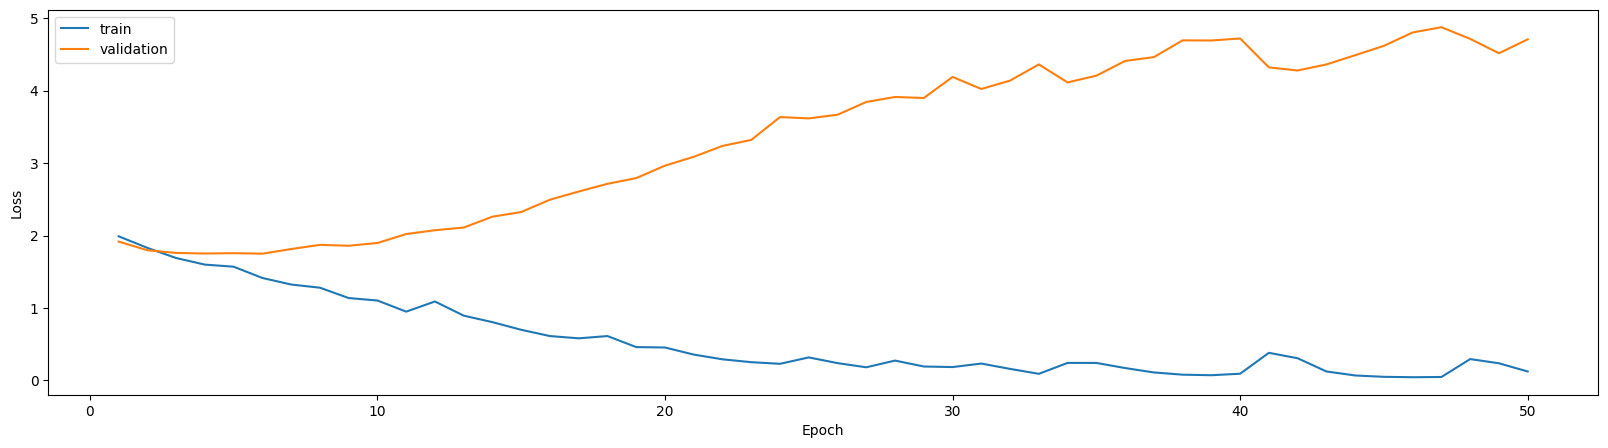

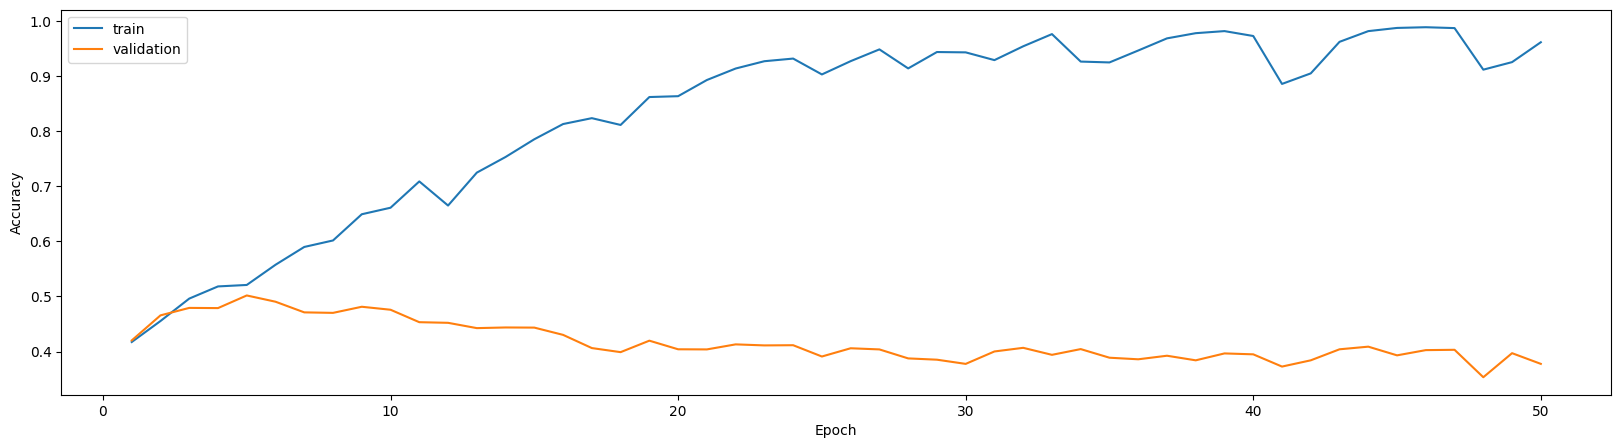

	Evaluation: 100%|██████████| 193/193 [00:02<00:00, 87.39it/s]



Test Loss: 1.746 | Test Acc: 49.18% | Test F1: 0.443 | Test ROC AUC: 0.771

Classification report:
              precision    recall  f1-score   support

           0       0.53      0.77      0.63      4960
           1       0.58      0.47      0.52       647
           2       0.43      0.32      0.37      1116
           3       0.36      0.15      0.21       690
           4       0.19      0.05      0.08       849
           5       0.30      0.17      0.22       142
           6       0.14      0.15      0.14       325
           7       0.39      0.36      0.37       557
           8       0.29      0.01      0.02       172
           9       0.60      0.69      0.64       595
          10       0.19      0.04      0.07       594
          11       0.54      0.06      0.10       231
          12       0.50      0.75      0.60       816
          13       0.37      0.17      0.23       646

    accuracy                           0.49     12340
   macro avg       0.39      0.30 

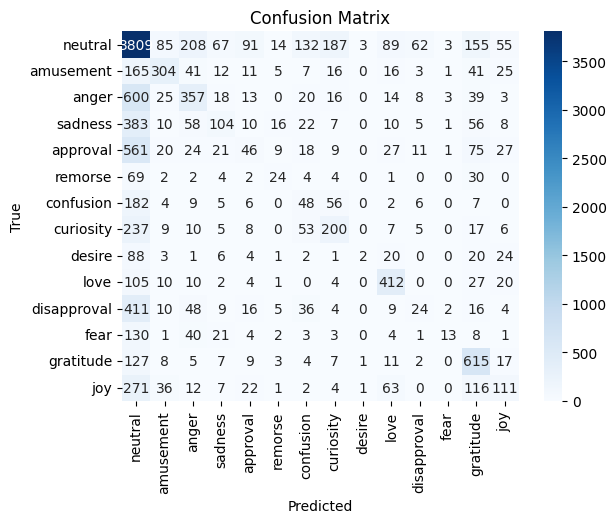

In [ ]:
# plot training curves

import matplotlib.pyplot as plt

# create epoch list
epochs = list(range(1, N_EPOCHS+1))

# plot training and validation loss
plt.figure(figsize=(20, 5))
plt.plot(epochs, train_loss_list, label='train')
plt.plot(epochs, valid_loss_list, label='validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plot training and validation accuracy
plt.figure(figsize=(20, 5))
plt.plot(epochs, train_acc_list, label='train')
plt.plot(epochs, valid_acc_list, label='validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#######
# print out required metrics

import seaborn as sns
model.load_state_dict(torch.load('model-glove-twitter.pt'))

test_loss, test_acc, test_f1, test_roc_auc, test_report, test_cm = evaluate(model, test_dataloader, criterion)
print(f'\nTest Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}% | Test F1: {test_f1:.3f} | Test ROC AUC: {test_roc_auc:.3f}\n')
# print(f'Confusion matrix:\n{test_cm}')
print(f'Classification report:\n{test_report}')

# plot confusion matrix
# labels for the plot - same as labels used for label_vocab
labels = OrderedDict([("neutral", 1), ("amusement", 1), ("anger", 1), ("sadness", 1), ("approval", 1), ("remorse", 1), ("confusion", 1), ("curiosity", 1), ("desire", 1), ("love", 1), ("disapproval", 1), ("fear", 1), ("gratitude", 1), ("joy", 1)])
# create the heatmap
sns.heatmap(test_cm, cmap="Blues", annot=True, fmt='g', xticklabels=labels, yticklabels=labels)
# add labels and title
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
import torch.nn as nn
from torch import optim

# Define an RNN class
class pretrainedRNN1(nn.Module):
    def __init__(self, input_dim, embedding_dim, hidden_dim, output_dim, pretrained_embeddings, pad_idx):        
        super().__init__()
        self.embedding = nn.Embedding.from_pretrained(pretrained_embeddings, freeze=True, padding_idx=pad_idx)        
        # self.embedding = nn.Embedding(input_dim, embedding_dim)
        # self.embedding.weight.data.copy_(pretrained_embeddings) # copy pre-trained vectors to embedding layer
        self.rnn = nn.RNN(embedding_dim, hidden_dim, batch_first=True)        
        self.fc = nn.Linear(hidden_dim, output_dim)
        # self.fc = nn.Linear(hidden_dim, output_dim[1]) # output_dim[0] is hidden_dim, output_dim[1] is output_dim
        
    def forward(self, texts, lengths):
        embedded = self.embedding(texts)                          # VV note that lengths need to be on the CPU
        embedded = nn.utils.rnn.pack_padded_sequence(embedded, lengths.cpu(), batch_first=True, enforce_sorted=False)

        output, hidden = self.rnn(embedded)

        return self.fc(hidden.squeeze(0))


# Setting model building arguments
INPUT_DIM = len(text_vocab)
EMBEDDING_DIM = 100
HIDDEN_DIM = 256
OUTPUT_DIM = len(label_vocab) # 14 output nodes
PAD_IDX = text_vocab["<pad>"]

model_glove_twitter_2 = pretrainedRNN1(INPUT_DIM, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM, pretrained_embeddings, PAD_IDX) # create a RNN model using the arguments
print(f'The model has {count_parameters(model_glove_twitter_2):,} trainable parameters')

# Set other parameters
optimizer = optim.Adam(model_glove_twitter_2.parameters())
criterion = nn.CrossEntropyLoss()

# Use GPU
model_glove_twitter_2 = model_glove_twitter_2.to(DEVICE)
criterion = criterion.to(DEVICE)

The model has 95,246 trainable parameters


In [ ]:
######
N_EPOCHS = 50
train_loss_list = []
train_acc_list = []
valid_loss_list = []
valid_acc_list = []

best_valid_loss = float('inf')
print(f"Using {'GPU' if str(DEVICE) == 'cuda' else 'CPU'} for training.")

for epoch in range(N_EPOCHS):
    print(f'Epoch: {epoch+1:02}')
    start_time = time.time()
    
    train_loss, train_acc = train(model_glove_twitter_2, train_dataloader, optimizer, criterion)
    train_loss_list.append(train_loss)
    train_acc_list.append(train_acc)
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    
    # valid_loss, valid_acc = evaluate(model, valid_dataloader, criterion)
    valid_loss, valid_acc, valid_f1, valid_auc_roc, valid_report, valid_cm  = evaluate(model_glove_twitter_2, valid_dataloader, criterion)
    valid_loss_list.append(valid_loss)
    valid_acc_list.append(valid_acc)
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')
    
    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model_glove_twitter_2.state_dict(), 'model_glove_twitter_2.pt')


Using GPU for training.
Epoch: 01


	Training: 100%|██████████| 315/315 [00:03<00:00, 104.29it/s]


	Train Loss: 2.024 | Train Acc: 40.94%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 94.99it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.976 |  Val. Acc: 43.20%
Epoch: 02


	Training: 100%|██████████| 315/315 [00:04<00:00, 72.42it/s]


	Train Loss: 1.897 | Train Acc: 43.58%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 134.83it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.844 |  Val. Acc: 45.80%
Epoch: 03


	Training: 100%|██████████| 315/315 [00:02<00:00, 105.49it/s]


	Train Loss: 1.880 | Train Acc: 43.29%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 135.62it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.874 |  Val. Acc: 43.80%
Epoch: 04


	Training: 100%|██████████| 315/315 [00:03<00:00, 103.14it/s]


	Train Loss: 1.853 | Train Acc: 44.15%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 127.80it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.858 |  Val. Acc: 44.63%
Epoch: 05


	Training: 100%|██████████| 315/315 [00:04<00:00, 68.42it/s]


	Train Loss: 1.848 | Train Acc: 44.70%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 110.26it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.871 |  Val. Acc: 44.64%
Epoch: 06


	Training: 100%|██████████| 315/315 [00:03<00:00, 104.36it/s]


	Train Loss: 1.790 | Train Acc: 45.82%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 137.70it/s]


	 Val. Loss: 1.823 |  Val. Acc: 45.53%
Epoch: 07


	Training: 100%|██████████| 315/315 [00:03<00:00, 104.84it/s]


	Train Loss: 1.703 | Train Acc: 48.14%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 135.53it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.852 |  Val. Acc: 43.94%
Epoch: 08


	Training: 100%|██████████| 315/315 [00:04<00:00, 72.94it/s]


	Train Loss: 1.681 | Train Acc: 48.98%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 86.38it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.805 |  Val. Acc: 46.70%
Epoch: 09


	Training: 100%|██████████| 315/315 [00:02<00:00, 106.20it/s]


	Train Loss: 1.695 | Train Acc: 48.16%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 133.12it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.778 |  Val. Acc: 47.62%
Epoch: 10


	Training: 100%|██████████| 315/315 [00:02<00:00, 106.39it/s]


	Train Loss: 1.638 | Train Acc: 49.98%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 131.14it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.794 |  Val. Acc: 48.10%
Epoch: 11


	Training: 100%|██████████| 315/315 [00:03<00:00, 83.53it/s]


	Train Loss: 1.601 | Train Acc: 51.02%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 88.54it/s]


	 Val. Loss: 1.739 |  Val. Acc: 49.50%
Epoch: 12


	Training: 100%|██████████| 315/315 [00:03<00:00, 90.56it/s]


	Train Loss: 1.754 | Train Acc: 46.85%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 133.35it/s]


	 Val. Loss: 2.079 |  Val. Acc: 43.27%
Epoch: 13


	Training: 100%|██████████| 315/315 [00:02<00:00, 105.41it/s]


	Train Loss: 1.763 | Train Acc: 46.62%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 133.83it/s]


	 Val. Loss: 1.797 |  Val. Acc: 45.22%
Epoch: 14


	Training: 100%|██████████| 315/315 [00:03<00:00, 93.79it/s]


	Train Loss: 1.639 | Train Acc: 49.30%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 84.97it/s]


	 Val. Loss: 1.753 |  Val. Acc: 47.65%
Epoch: 15


	Training: 100%|██████████| 315/315 [00:03<00:00, 80.47it/s] 


	Train Loss: 1.570 | Train Acc: 51.54%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 136.23it/s]


	 Val. Loss: 1.754 |  Val. Acc: 49.26%
Epoch: 16


	Training: 100%|██████████| 315/315 [00:03<00:00, 104.19it/s]


	Train Loss: 1.520 | Train Acc: 53.09%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 133.28it/s]


	 Val. Loss: 1.734 |  Val. Acc: 49.71%
Epoch: 17


	Training: 100%|██████████| 315/315 [00:03<00:00, 101.55it/s]


	Train Loss: 1.477 | Train Acc: 54.07%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 91.89it/s]


	 Val. Loss: 1.721 |  Val. Acc: 48.37%
Epoch: 18


	Training: 100%|██████████| 315/315 [00:04<00:00, 72.60it/s]


	Train Loss: 1.552 | Train Acc: 51.74%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 135.38it/s]


	 Val. Loss: 1.896 |  Val. Acc: 44.55%
Epoch: 19


	Training: 100%|██████████| 315/315 [00:03<00:00, 104.58it/s]


	Train Loss: 1.611 | Train Acc: 50.31%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 132.18it/s]


	 Val. Loss: 1.735 |  Val. Acc: 49.71%
Epoch: 20


	Training: 100%|██████████| 315/315 [00:03<00:00, 101.93it/s]


	Train Loss: 1.506 | Train Acc: 53.09%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 128.30it/s]


	 Val. Loss: 1.788 |  Val. Acc: 46.87%
Epoch: 21


	Training: 100%|██████████| 315/315 [00:04<00:00, 68.56it/s]


	Train Loss: 1.447 | Train Acc: 54.52%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 110.59it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.870 |  Val. Acc: 48.37%
Epoch: 22


	Training: 100%|██████████| 315/315 [00:02<00:00, 106.34it/s]


	Train Loss: 1.400 | Train Acc: 55.92%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 133.09it/s]


	 Val. Loss: 1.762 |  Val. Acc: 49.57%
Epoch: 23


	Training: 100%|██████████| 315/315 [00:03<00:00, 104.44it/s]


	Train Loss: 1.743 | Train Acc: 47.33%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 128.99it/s]


	 Val. Loss: 1.905 |  Val. Acc: 46.07%
Epoch: 24


	Training: 100%|██████████| 315/315 [00:04<00:00, 75.61it/s]


	Train Loss: 1.606 | Train Acc: 50.59%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 86.11it/s]


	 Val. Loss: 1.803 |  Val. Acc: 46.09%
Epoch: 25


	Training: 100%|██████████| 315/315 [00:03<00:00, 103.14it/s]


	Train Loss: 1.576 | Train Acc: 50.77%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 137.17it/s]


	 Val. Loss: 1.803 |  Val. Acc: 46.97%
Epoch: 26


	Training: 100%|██████████| 315/315 [00:02<00:00, 106.08it/s]


	Train Loss: 1.479 | Train Acc: 53.32%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 137.31it/s]


	 Val. Loss: 1.784 |  Val. Acc: 47.16%
Epoch: 27


	Training: 100%|██████████| 315/315 [00:03<00:00, 86.66it/s]


	Train Loss: 1.422 | Train Acc: 54.52%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 88.17it/s]


	 Val. Loss: 1.788 |  Val. Acc: 46.24%
Epoch: 28


	Training: 100%|██████████| 315/315 [00:03<00:00, 86.52it/s] 


	Train Loss: 1.381 | Train Acc: 55.98%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 132.65it/s]


	 Val. Loss: 1.808 |  Val. Acc: 47.39%
Epoch: 29


	Training: 100%|██████████| 315/315 [00:03<00:00, 104.60it/s]


	Train Loss: 1.360 | Train Acc: 56.39%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 137.47it/s]


	 Val. Loss: 1.818 |  Val. Acc: 46.09%
Epoch: 30


	Training: 100%|██████████| 315/315 [00:03<00:00, 98.66it/s]


	Train Loss: 1.299 | Train Acc: 58.27%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 86.88it/s]


	 Val. Loss: 1.842 |  Val. Acc: 46.40%
Epoch: 31


	Training: 100%|██████████| 315/315 [00:04<00:00, 75.06it/s] 


	Train Loss: 1.296 | Train Acc: 58.75%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 133.96it/s]


	 Val. Loss: 1.900 |  Val. Acc: 46.10%
Epoch: 32


	Training: 100%|██████████| 315/315 [00:03<00:00, 103.29it/s]


	Train Loss: 1.270 | Train Acc: 59.20%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 129.22it/s]


	 Val. Loss: 1.855 |  Val. Acc: 48.03%
Epoch: 33


	Training: 100%|██████████| 315/315 [00:03<00:00, 103.97it/s]


	Train Loss: 1.214 | Train Acc: 60.65%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 116.39it/s]


	 Val. Loss: 1.880 |  Val. Acc: 47.57%
Epoch: 34


	Training: 100%|██████████| 315/315 [00:04<00:00, 68.77it/s]


	Train Loss: 1.396 | Train Acc: 55.42%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 119.54it/s]


	 Val. Loss: 1.955 |  Val. Acc: 46.48%
Epoch: 35


	Training: 100%|██████████| 315/315 [00:03<00:00, 104.43it/s]


	Train Loss: 1.295 | Train Acc: 58.49%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 132.32it/s]


	 Val. Loss: 1.906 |  Val. Acc: 46.50%
Epoch: 36


	Training: 100%|██████████| 315/315 [00:02<00:00, 105.53it/s]


	Train Loss: 1.552 | Train Acc: 51.77%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 135.91it/s]


	 Val. Loss: 1.947 |  Val. Acc: 43.53%
Epoch: 37


	Training: 100%|██████████| 315/315 [00:04<00:00, 74.12it/s]


	Train Loss: 1.373 | Train Acc: 55.80%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 84.63it/s]


	 Val. Loss: 1.943 |  Val. Acc: 44.21%
Epoch: 38


	Training: 100%|██████████| 315/315 [00:03<00:00, 104.23it/s]


	Train Loss: 1.268 | Train Acc: 59.64%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 135.64it/s]


	 Val. Loss: 1.948 |  Val. Acc: 44.67%
Epoch: 39


	Training: 100%|██████████| 315/315 [00:03<00:00, 104.41it/s]


	Train Loss: 1.204 | Train Acc: 61.55%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 133.09it/s]


	 Val. Loss: 1.922 |  Val. Acc: 47.15%
Epoch: 40


	Training: 100%|██████████| 315/315 [00:03<00:00, 83.12it/s]


	Train Loss: 1.590 | Train Acc: 50.48%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 88.39it/s]


	 Val. Loss: 2.038 |  Val. Acc: 40.88%
Epoch: 41


	Training: 100%|██████████| 315/315 [00:03<00:00, 89.30it/s] 


	Train Loss: 1.380 | Train Acc: 55.61%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 131.18it/s]


	 Val. Loss: 1.957 |  Val. Acc: 43.84%
Epoch: 42


	Training: 100%|██████████| 315/315 [00:03<00:00, 103.68it/s]


	Train Loss: 1.229 | Train Acc: 60.11%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 129.58it/s]


	 Val. Loss: 1.924 |  Val. Acc: 46.32%
Epoch: 43


	Training: 100%|██████████| 315/315 [00:03<00:00, 92.25it/s]


	Train Loss: 1.168 | Train Acc: 62.46%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 88.43it/s]


	 Val. Loss: 1.945 |  Val. Acc: 47.87%
Epoch: 44


	Training: 100%|██████████| 315/315 [00:03<00:00, 80.46it/s] 


	Train Loss: 1.084 | Train Acc: 64.78%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 137.28it/s]


	 Val. Loss: 2.068 |  Val. Acc: 42.04%
Epoch: 45


	Training: 100%|██████████| 315/315 [00:03<00:00, 103.80it/s]


	Train Loss: 1.126 | Train Acc: 63.75%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 135.92it/s]


	 Val. Loss: 2.018 |  Val. Acc: 44.92%
Epoch: 46


	Training: 100%|██████████| 315/315 [00:03<00:00, 100.11it/s]


	Train Loss: 1.031 | Train Acc: 66.47%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 90.22it/s]


	 Val. Loss: 2.012 |  Val. Acc: 44.93%
Epoch: 47


	Training: 100%|██████████| 315/315 [00:04<00:00, 74.14it/s]


	Train Loss: 1.098 | Train Acc: 64.55%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 134.23it/s]


	 Val. Loss: 2.038 |  Val. Acc: 45.15%
Epoch: 48


	Training: 100%|██████████| 315/315 [00:03<00:00, 104.44it/s]


	Train Loss: 0.980 | Train Acc: 68.43%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 136.25it/s]


	 Val. Loss: 2.071 |  Val. Acc: 44.86%
Epoch: 49


	Training: 100%|██████████| 315/315 [00:02<00:00, 105.42it/s]


	Train Loss: 1.080 | Train Acc: 65.49%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 135.11it/s]


	 Val. Loss: 2.090 |  Val. Acc: 42.88%
Epoch: 50


	Training: 100%|██████████| 315/315 [00:04<00:00, 69.07it/s]


	Train Loss: 1.181 | Train Acc: 62.64%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 106.05it/s]


	 Val. Loss: 2.164 |  Val. Acc: 43.73%


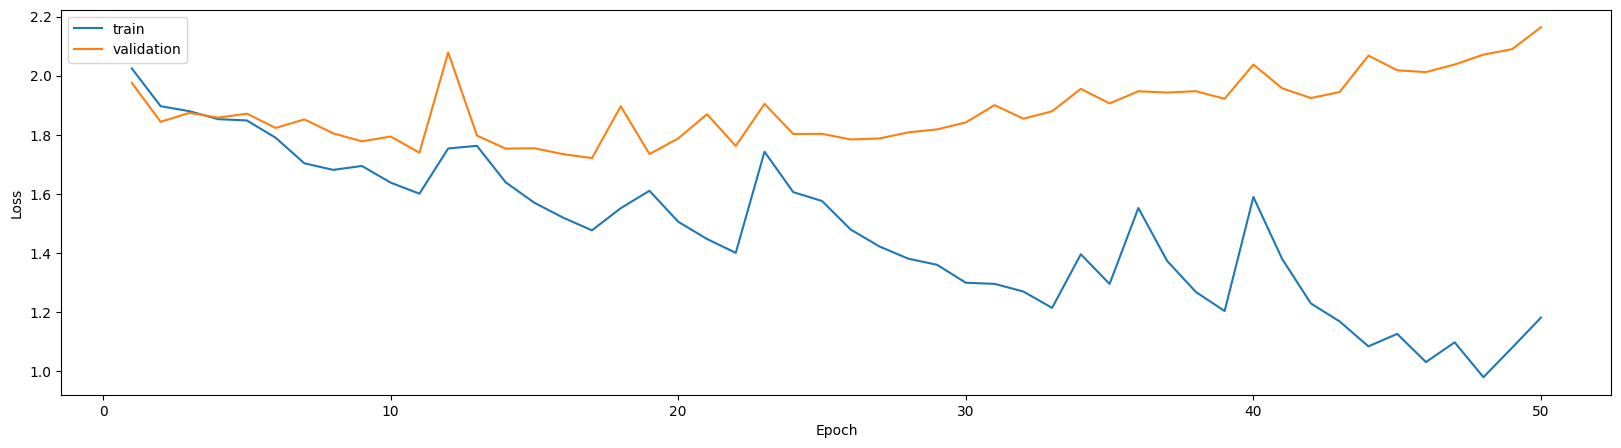

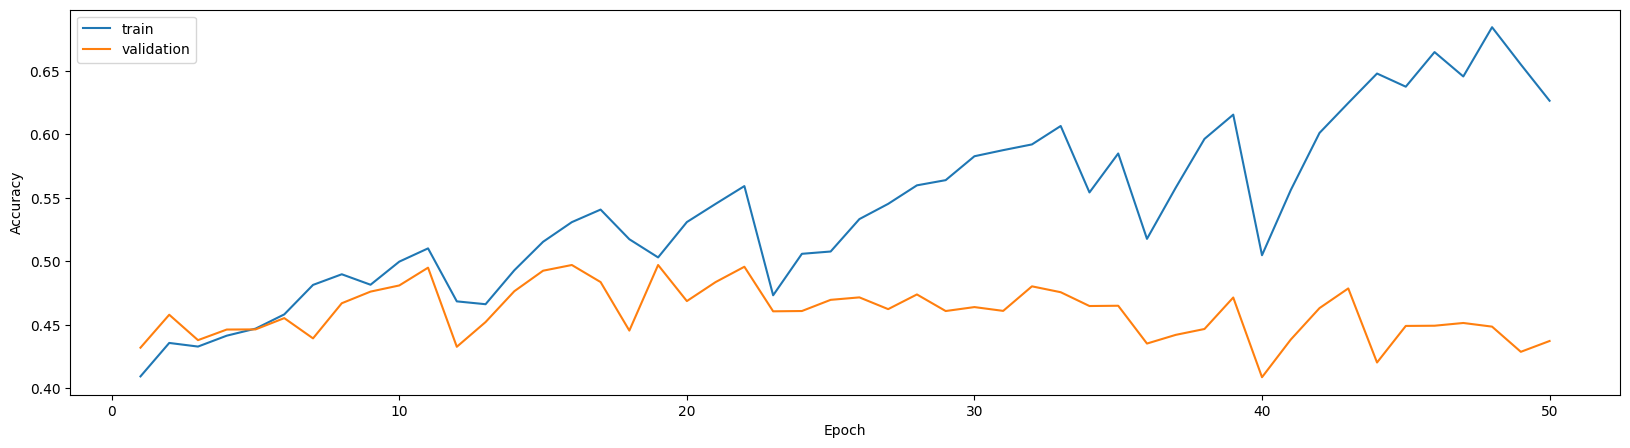

	Evaluation: 100%|██████████| 193/193 [00:01<00:00, 133.64it/s]



Test Loss: 1.708 | Test Acc: 48.94% | Test F1: 0.438 | Test ROC AUC: 0.782

Classification report:
              precision    recall  f1-score   support

           0       0.53      0.77      0.63      4960
           1       0.53      0.43      0.48       647
           2       0.36      0.31      0.34      1116
           3       0.33      0.22      0.26       690
           4       0.20      0.02      0.04       849
           5       0.32      0.17      0.22       142
           6       0.12      0.04      0.06       325
           7       0.33      0.43      0.37       557
           8       0.27      0.02      0.04       172
           9       0.72      0.65      0.68       595
          10       0.21      0.01      0.02       594
          11       0.27      0.23      0.25       231
          12       0.53      0.73      0.62       816
          13       0.33      0.17      0.23       646

    accuracy                           0.49     12340
   macro avg       0.36      0.30 

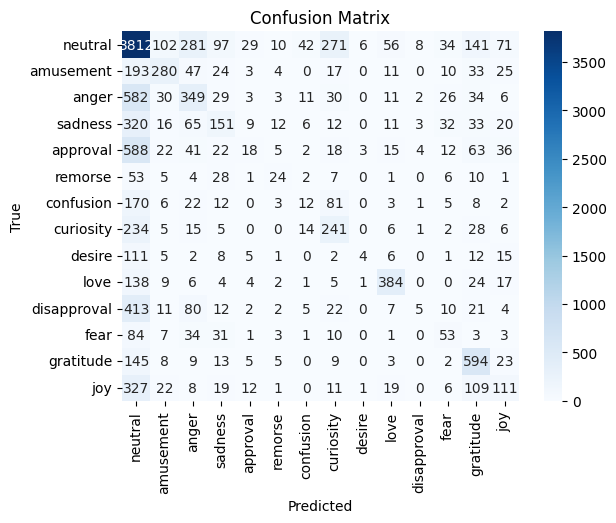

In [ ]:
# plot training curves

import matplotlib.pyplot as plt

# create epoch list
epochs = list(range(1, N_EPOCHS+1))

# plot training and validation loss
plt.figure(figsize=(20, 5))
plt.plot(epochs, train_loss_list, label='train')
plt.plot(epochs, valid_loss_list, label='validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plot training and validation accuracy
plt.figure(figsize=(20, 5))
plt.plot(epochs, train_acc_list, label='train')
plt.plot(epochs, valid_acc_list, label='validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#######
# print out required metrics

import seaborn as sns
model_glove_twitter_2.load_state_dict(torch.load('model_glove_twitter_2.pt'))

test_loss, test_acc, test_f1, test_roc_auc, test_report, test_cm = evaluate(model_glove_twitter_2, test_dataloader, criterion)
print(f'\nTest Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}% | Test F1: {test_f1:.3f} | Test ROC AUC: {test_roc_auc:.3f}\n')
# print(f'Confusion matrix:\n{test_cm}')
print(f'Classification report:\n{test_report}')

# plot confusion matrix
# labels for the plot - same as labels used for label_vocab
labels = OrderedDict([("neutral", 1), ("amusement", 1), ("anger", 1), ("sadness", 1), ("approval", 1), ("remorse", 1), ("confusion", 1), ("curiosity", 1), ("desire", 1), ("love", 1), ("disapproval", 1), ("fear", 1), ("gratitude", 1), ("joy", 1)])
# create the heatmap
sns.heatmap(test_cm, cmap="Blues", annot=True, fmt='g', xticklabels=labels, yticklabels=labels)
# add labels and title
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()



---



---



---

## Results

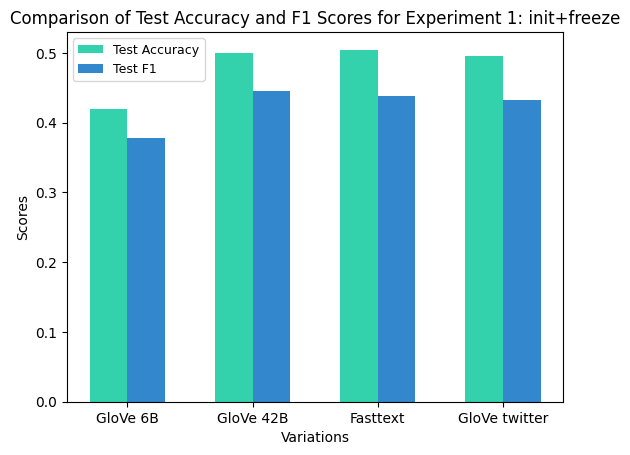

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

variations = ['GloVe 6B', 'GloVe 42B', 'Fasttext', 'GloVe twitter']
test_accuracy_list = [0.4192, 0.4996, 0.5046, 0.4960]
test_f1_list = [0.378, 0.445, 0.438, 0.433]

fig, ax = plt.subplots()

# Create x-axis values so it can be used for any number of variations
x_values = np.arange(len(variations))

# Plot the bar charts
rects1 = ax.bar(x_values, test_accuracy_list, 0.3, alpha=0.8, color='#00c698', label='Test Accuracy')
rects2 = ax.bar(x_values + 0.3, test_f1_list, 0.3, alpha=0.8, color='#0069c0', label='Test F1')

# Add labels and titles
ax.set_xlabel('Variations')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Test Accuracy and F1 Scores for Experiment 1: init+freeze')
ax.set_xticks(x_values + 0.3 / 2)
ax.set_xticklabels(variations)
ax.legend(loc='upper left', fontsize=9)

# Show the plot
plt.show()


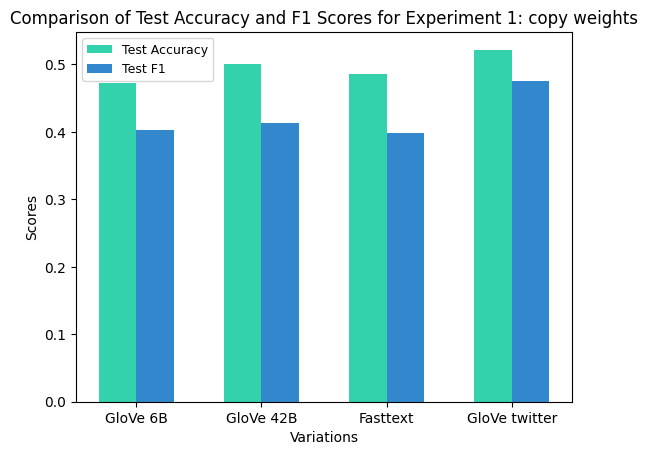

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

variations = ['GloVe 6B', 'GloVe 42B', 'Fasttext', 'GloVe twitter']
test_accuracy_list = [0.4724, 0.5007, 0.4851, 0.5218]
test_f1_list = [0.403, 0.413, 0.398, 0.476]

fig, ax = plt.subplots()

# Create x-axis values so it can be used for any number of variations
x_values = np.arange(len(variations))

# Plot the bar charts
rects1 = ax.bar(x_values, test_accuracy_list, 0.3, alpha=0.8, color='#00c698', label='Test Accuracy')
rects2 = ax.bar(x_values + 0.3, test_f1_list, 0.3, alpha=0.8, color='#0069c0', label='Test F1')

# Add labels and titles
ax.set_xlabel('Variations')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Test Accuracy and F1 Scores for Experiment 1: copy weights')
ax.set_xticks(x_values + 0.3 / 2)
ax.set_xticklabels(variations)
ax.legend(loc='upper left', fontsize=9)

# Show the plot
plt.show()


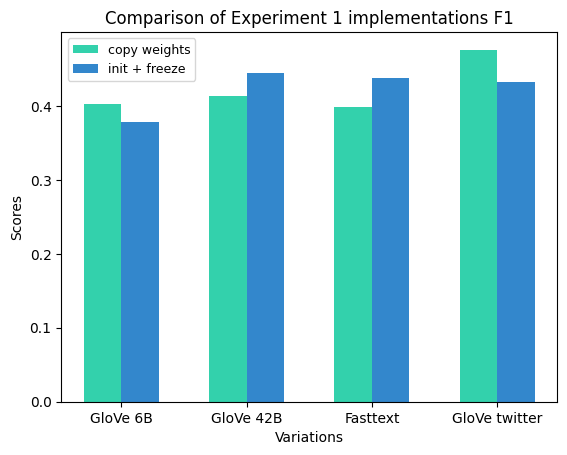

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

variations = ['GloVe 6B', 'GloVe 42B', 'Fasttext', 'GloVe twitter']
test_accuracy_list = [0.403, 0.413, 0.398, 0.476]
test_f1_list = [0.378, 0.445, 0.438, 0.433]

fig, ax = plt.subplots()

# Create x-axis values so it can be used for any number of variations
x_values = np.arange(len(variations))

# Plot the bar charts
rects1 = ax.bar(x_values, test_accuracy_list, 0.3, alpha=0.8, color='#00c698', label='copy weights')
rects2 = ax.bar(x_values + 0.3, test_f1_list, 0.3, alpha=0.8, color='#0069c0', label='init + freeze')

# Add labels and titles
ax.set_xlabel('Variations')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Experiment 1 implementations F1')
ax.set_xticks(x_values + 0.3 / 2)
ax.set_xticklabels(variations)
ax.legend(loc='upper left', fontsize=9)

# Show the plot
plt.show()




---
---
---



# 4.&nbsp;GoEmotions Experiment 2: Testing different RNN architectures and settings


In this notebook, the best performing GloVe twitter 27b pretrained vectors will be used for each experiment.
The embedding layer is frozen for all the experiments but we will unfreeze it for the best performing model to check if final accuracy goes up.

### Set up steps for notebook
---
Required packages and dependencies are installed with compatible versions and the notebook is set up to use GPU when available.

---

In [ ]:
# Install datasets
!pip install datasets

# Install dependencies
%pip install torch==1.11.0+cu113 torchdata==0.3.0 torchtext==0.12.0 -f https://download.pytorch.org/whl/cu113/torch_stable.html
%pip install spacy tqdm
!python -m spacy download en_core_web_sm

# Initialise torch and use GPU
import torch
import torchtext

SEED = 1234
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

print("PyTorch Version: ", torch.__version__)
print("torchtext Version: ", torchtext.__version__)
print(f"Using {'GPU' if str(DEVICE) == 'cuda' else 'CPU'}.")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 9.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/cu113/torch_stable.html


Use this cell to mount your Google Drive on the notebook. Some files in the zip folder are used to reduce repeating of some setup steps.

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


### Defining necessary functions and classes that will be used in each experiment

---
Functions for tokenizing the data and building vocabularies

---

In [ ]:
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator, vocab
from collections import OrderedDict
import torchtext.transforms as T

# defining a tokenizer as a PyTorch module
class SpacyTokenizer(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.tokenizer = get_tokenizer("spacy", language="en_core_web_sm")
    
    def forward(self, input):
        if isinstance(input, list):
            tokens = []
            for text in input:
                tokens.append(self.tokenizer(text))
            return tokens
        elif isinstance(input, str):
            return self.tokenizer(input)
        raise ValueError(f"Type {type(input)} is not supported.")

# defining a function to transform each text into its length
class ToLengths(torch.nn.Module):
    def forward(self, input):
        if isinstance(input[1], list):    # changed to match the order in dataset
            lengths = []
            for text in input:
                lengths.append(len(text))
            return lengths
        elif isinstance(input, list):
            return len(input)
        raise ValueError(f"Type {type(input)} is not supported.")



---


Functions required for loading data in batches


---






In [ ]:
from torch.utils.data import DataLoader

BATCH_SIZE = 64

def collate_batch(batch):
    texts, labels = zip(*batch)

    lengths = lengths_transform(list(texts))
    texts = text_transform(list(texts))
    labels = torch.tensor(list(labels), dtype=torch.int64)

    return labels.to(DEVICE), texts.to(DEVICE), lengths.cpu()


def _get_dataloader(data):
    return DataLoader(data, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_batch)
    

---
Functions required for training and evaluation

---

In [ ]:
from tqdm import tqdm
import numpy as np
from sklearn.metrics import f1_score, roc_auc_score, classification_report, confusion_matrix
import time

# defining a function for training the model
# Taken from lab but changed to be used for multi-class classification training instead of binary classification

def train(model, iterator, optimizer, criterion):    
    epoch_loss = 0
    epoch_acc = 0
    
    model.train()
    
    for batch in tqdm(iterator, desc="\tTraining"):
        optimizer.zero_grad()
                
        labels, texts, lengths = batch  # Note that this has to match the order in collate_batch
        predictions = model(texts, lengths)
        loss = criterion(predictions, labels)
        acc = categorical_accuracy(predictions, labels)
        
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

# Defining a function to evaluate using the trained model (on either validation or test sets)
# Taken from lab 5 but changed to be used for multi-class classification evaluation instead of binary classification
# Further modified to return metrics like F1 score, confusion matrix, and classification report to check scores for each class
# ChatGPT was used for debugging aur_roc code

def evaluate(model, iterator, criterion):
    epoch_loss = 0
    epoch_acc = 0
    predicted_probs = []
    true_labels = []
    
    model.eval()
    
    with torch.no_grad():
        for batch in tqdm(iterator, desc="\tEvaluation"):
            labels, texts, lengths = batch  # Note that this has to match the order in collate_batch
            predictions = model(texts, lengths)
            probs = torch.softmax(predictions, dim=1)
            loss = criterion(predictions, labels)
            acc = categorical_accuracy(predictions, labels)

            epoch_loss += loss.item()
            epoch_acc += acc.item()
            predicted_probs.extend(probs.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())
        
    predicted_probs = np.array(predicted_probs)
    true_labels = np.array(true_labels)
    predicted_labels = np.argmax(predicted_probs, axis=1)

    epoch_f1 = f1_score(true_labels, predicted_labels, average='weighted')
    epoch_auc_roc = roc_auc_score(true_labels, predicted_probs, multi_class='ovo', average='weighted')
    epoch_classification_report = classification_report(true_labels, predicted_labels)
    epoch_confusion_matrix = confusion_matrix(true_labels, predicted_labels)

    return epoch_loss / len(iterator), epoch_acc / len(iterator), epoch_f1, epoch_auc_roc, epoch_classification_report, epoch_confusion_matrix


# defining a function to check duration taken for training and testing
# taken from lab 5

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs


#defining a function to check number of parameters in the model

def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)


# defining a categorical accuracy function instead of binary accuracy
# ChatGPT was used to find this piece of code and further debugging was required to make it work as expected

def categorical_accuracy(preds, y):
    """
    Returns accuracy per batch, i.e. if you get 8/10 right, this returns 0.8, NOT 8
    """
    top_pred = preds.argmax(1, keepdim = True)
    correct = top_pred.eq(y.view_as(top_pred)).sum()
    acc = correct.float() / y.shape[0]
    return acc


---

### Other common steps for each variation of the experiment


*   Loading and splitting preprocessed data
*   Building vocabularies
*   Pretrained embeddings
*   Preparing required dataloaders

In [ ]:
from datasets import load_dataset
import pandas as pd

# load the GoEmotions dataset
goemotions_dataset = load_dataset('go_emotions')

# get the train, validation, and test splits as Pandas dataframes
train_df = goemotions_dataset['train'].to_pandas()
val_df = goemotions_dataset['validation'].to_pandas()
test_df = goemotions_dataset['test'].to_pandas()

# concatenate the splits into a single dataframe
df = pd.concat([train_df, val_df, test_df], ignore_index=True)

# duplicate the records with multiple labels
df = df.explode('labels')

# reset the index of the dataframe
df = df.reset_index(drop=True)

# print the first five rows of the resulting dataframe
print(df.head())

from torchtext.data.functional import to_map_style_dataset

### MERGING EMOTION LABELS FROM GROUP DECISIONS ###

for i, row in df.iterrows():
  # Converting Annoyance [3] into Anger [2]
  if row['labels']==3:
    row['labels']=2
  # Disappointment [9] and Grief [16] into Sadness [25]
  if row['labels']==9 or row['labels']==16:
    row['labels']=25
  # Converting Nervousness [19] into Fear [14]
  if row['labels']==19:
    row['labels']=14
  # Converting Excitement [13] into Joy [17]
  if row['labels']==13:
    row['labels']=17

#keeps just one of the records where there are labelled with both merged classes
df = df.drop_duplicates(keep = 'first')
drop_labels = (3,11,12,9,16,19,22,26,21,13,0,23,20,5)
#drops labels we are not using
df_cut = df[~df.labels.isin(drop_labels)] 
#deletes duplicates
df_cut = df_cut.drop_duplicates(subset = ['text'], keep = False)
df_cut = df_cut.reset_index(drop = True)

### REORDERING SO THAT LABELS ARE 0-13 ###
for i, row in df_cut.iterrows():
    # Converting Neutral [27] to Neutral [0]
    if row['labels']==27:
        row['labels']=0
    # Converting Sadness [25] to Sadness [3]
    if row['labels']==25:
        row['labels']=3
    # Converting Remorse [24] to Remorse [5]
    if row['labels']==24:
        row['labels']=5
    # Converting Love [18] to Love [9]
    if row['labels']==18:
        row['labels']=9
    # Converting Fear [14] to Fear [11]
    if row['labels']==14:
        row['labels']=11
    # Converting Gratitude [15] to Gratitude [12]
    if row['labels']==15:
        row['labels']=12
    # Converting Joy [17] to Joy [13]
    if row['labels']==17:
        row['labels']=13

df = df_cut
# reset the index of the dataframe
df = df.reset_index(drop=True)
df.head()

# convert dataframe to list
text = df[['text','labels']].values.tolist()

# convert the dataset into a "map-style dataset"
data = to_map_style_dataset(text)

In [ ]:
from torchtext.data.functional import to_map_style_dataset
from torch.utils.data import random_split

from torchtext.vocab import vocab
from torchtext import vocab as vc
from collections import OrderedDict

import torchtext.transforms as T

# load preprocessed data from storage
# text = torch.load("/content/drive/MyDrive/Colab Notebooks/NLP CW/preprocessed_data_1.pt")
# data = to_map_style_dataset(text)
# data[0]

split_ratio = 0.7  # 70/30 split

# split dataset into train and test sets
train_samples = int(split_ratio * len(data))
test_samples = len(data) - train_samples
train_data, test_data = random_split(data, [train_samples, test_samples])

# split train subset into train and validation sets
train_samples = int(split_ratio * len(train_data))
valid_samples = len(train_data) - train_samples
train_data, valid_data = random_split(train_data, [train_samples, valid_samples])

print(f'Number of training examples: {len(train_data)}')
print(f'Number of validation examples: {len(valid_data)}')
print(f'Number of testing examples: {len(test_data)}')

# loading pretrained vectors into text_vocab
MAX_VOCAB_SIZE = 25_000

glove_vectors = vc.GloVe(
    name="twitter.27B",
    dim="100",
    max_vectors=MAX_VOCAB_SIZE
)

text_vocab = vocab(glove_vectors.stoi, min_freq=0, specials=("<unk>", "<pad>"), special_first=True)
text_vocab.set_default_index(text_vocab["<unk>"])

pretrained_embeddings = glove_vectors.vectors
pretrained_embeddings = torch.cat([
    torch.empty(1, glove_vectors.dim).normal_(),  # unk token vector
    torch.zeros(1, glove_vectors.dim),  # padding token vector
    pretrained_embeddings
])

print("Pretrained vectors shape: ", pretrained_embeddings.shape)

# buidling label_vocab
label_vocab = vocab(OrderedDict([("neutral", 1), ("amusement", 1), ("anger", 1), ("sadness", 1), ("approval", 1), ("remorse", 1), ("confusion", 1), ("curiosity", 1), ("desire", 1), ("love", 1), ("disapproval", 1), ("fear", 1), ("gratitude", 1), ("joy", 1)]))

# transform to required tensor format
text_transform = T.Sequential(
    SpacyTokenizer(),  # Tokenize
    T.VocabTransform(text_vocab),  # Conver to vocab IDs
    T.ToTensor(padding_value=text_vocab["<pad>"]),  # Convert to tensor and pad
)

label_transform = T.Sequential(
    T.ToTensor(),  # Convert to tensor
)

lengths_transform = T.Sequential(
    SpacyTokenizer(),
    ToLengths(),
    T.ToTensor(),
)

# dataloaders
train_dataloader = _get_dataloader(train_data)
valid_dataloader = _get_dataloader(valid_data)
test_dataloader = _get_dataloader(test_data)

Number of training examples: 20153
Number of validation examples: 8638
Number of testing examples: 12340


.vector_cache/glove.twitter.27B.zip: 1.52GB [04:45, 5.33MB/s]                            
100%|█████████▉| 24999/25000 [00:00<00:00, 30732.57it/s]


Pretrained vectors shape:  torch.Size([25002, 100])




---



---



---

## 2.A. RNN1

In [ ]:
import torch.nn as nn
from torch import optim

# Define a basic RNN
class RNN1(nn.Module):
    def __init__(self, input_dim, embedding_dim, hidden_dim, output_dim, pretrained_embeddings, pad_idx):        
        super().__init__()

        self.embedding = nn.Embedding.from_pretrained(pretrained_embeddings, freeze=True, padding_idx=pad_idx)        
        self.rnn = nn.RNN(embedding_dim, hidden_dim, batch_first=True)        
        self.fc = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, texts, lengths):
        embedded = self.embedding(texts)                          # VV note that lengths need to be on the CPU
        embedded = nn.utils.rnn.pack_padded_sequence(embedded, lengths.cpu(), batch_first=True, enforce_sorted=False)
        output, hidden = self.rnn(embedded)

        return self.fc(hidden.squeeze(0))


# Setting model building arguments
INPUT_DIM = len(text_vocab)
EMBEDDING_DIM = 100
HIDDEN_DIM = 256
OUTPUT_DIM = len(label_vocab) # 14 output nodes
PAD_IDX = text_vocab["<pad>"]

model = RNN1(INPUT_DIM, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM, pretrained_embeddings, PAD_IDX) # create a RNN model using the arguments
print("Model Summary:")
print(model)
print(f'The model has {count_parameters(model):,} trainable parameters')

# Set other parameters
optimizer = optim.Adam(model.parameters())
criterion = nn.CrossEntropyLoss()

# Use GPU
model = model.to(DEVICE)
criterion = criterion.to(DEVICE)

Model Summary:
RNN1(
  (embedding): Embedding(25002, 100, padding_idx=1)
  (rnn): RNN(100, 256, batch_first=True)
  (fc): Linear(in_features=256, out_features=14, bias=True)
)
The model has 95,246 trainable parameters


In [ ]:
######
N_EPOCHS = 50
train_loss_list = []
train_acc_list = []
valid_loss_list = []
valid_acc_list = []

best_valid_loss = float('inf')
print(f"Using {'GPU' if str(DEVICE) == 'cuda' else 'CPU'} for training.")

for epoch in range(N_EPOCHS):
    print(f'Epoch: {epoch+1:02}')
    start_time = time.time()
    
    train_loss, train_acc = train(model, train_dataloader, optimizer, criterion)
    train_loss_list.append(train_loss)
    train_acc_list.append(train_acc)
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    
    valid_loss, valid_acc, valid_f1, valid_auc_roc, valid_report, valid_cm  = evaluate(model, valid_dataloader, criterion)
    valid_loss_list.append(valid_loss)
    valid_acc_list.append(valid_acc)
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')
    
    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'RNN1-model.pt')


Using GPU for training.
Epoch: 01


	Training: 100%|██████████| 315/315 [00:08<00:00, 36.74it/s]


	Train Loss: 2.011 | Train Acc: 41.25%


	Evaluation: 100%|██████████| 135/135 [00:02<00:00, 61.94it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.913 |  Val. Acc: 43.37%
Epoch: 02


	Training: 100%|██████████| 315/315 [00:02<00:00, 106.26it/s]


	Train Loss: 1.897 | Train Acc: 43.96%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 134.93it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.882 |  Val. Acc: 42.81%
Epoch: 03


	Training: 100%|██████████| 315/315 [00:02<00:00, 106.58it/s]


	Train Loss: 1.894 | Train Acc: 43.72%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 131.42it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.861 |  Val. Acc: 44.80%
Epoch: 04


	Training: 100%|██████████| 315/315 [00:04<00:00, 72.36it/s]


	Train Loss: 1.838 | Train Acc: 45.25%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 85.14it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.807 |  Val. Acc: 46.14%
Epoch: 05


	Training: 100%|██████████| 315/315 [00:03<00:00, 101.61it/s]


	Train Loss: 1.834 | Train Acc: 44.84%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 128.19it/s]


	 Val. Loss: 1.804 |  Val. Acc: 47.21%
Epoch: 06


	Training: 100%|██████████| 315/315 [00:02<00:00, 105.59it/s]


	Train Loss: 1.776 | Train Acc: 46.90%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 130.41it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.804 |  Val. Acc: 46.18%
Epoch: 07


	Training: 100%|██████████| 315/315 [00:03<00:00, 80.26it/s]


	Train Loss: 1.831 | Train Acc: 45.56%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 84.26it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.876 |  Val. Acc: 44.37%
Epoch: 08


	Training: 100%|██████████| 315/315 [00:03<00:00, 94.80it/s]


	Train Loss: 1.792 | Train Acc: 45.95%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 132.34it/s]


	 Val. Loss: 1.870 |  Val. Acc: 43.20%
Epoch: 09


	Training: 100%|██████████| 315/315 [00:03<00:00, 103.44it/s]


	Train Loss: 1.721 | Train Acc: 48.33%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 129.81it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.855 |  Val. Acc: 45.83%
Epoch: 10


	Training: 100%|██████████| 315/315 [00:04<00:00, 65.36it/s]


	Train Loss: 1.708 | Train Acc: 48.93%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 86.53it/s]


	 Val. Loss: 1.770 |  Val. Acc: 49.63%
Epoch: 11


	Training: 100%|██████████| 315/315 [00:03<00:00, 96.34it/s] 


	Train Loss: 1.852 | Train Acc: 44.93%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 131.38it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 2.022 |  Val. Acc: 41.42%
Epoch: 12


	Training: 100%|██████████| 315/315 [00:06<00:00, 52.47it/s]


	Train Loss: 1.904 | Train Acc: 43.85%


	Evaluation: 100%|██████████| 135/135 [00:04<00:00, 31.23it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.922 |  Val. Acc: 44.86%
Epoch: 13


	Training: 100%|██████████| 315/315 [00:05<00:00, 60.66it/s] 


	Train Loss: 1.881 | Train Acc: 44.27%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 134.58it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.971 |  Val. Acc: 42.24%
Epoch: 14


	Training: 100%|██████████| 315/315 [00:02<00:00, 107.94it/s]


	Train Loss: 1.852 | Train Acc: 44.76%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 134.21it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.896 |  Val. Acc: 45.66%
Epoch: 15


	Training: 100%|██████████| 315/315 [00:04<00:00, 77.78it/s]


	Train Loss: 1.714 | Train Acc: 48.39%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 85.69it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.761 |  Val. Acc: 47.80%
Epoch: 16


	Training: 100%|██████████| 315/315 [00:03<00:00, 99.50it/s] 


	Train Loss: 1.739 | Train Acc: 47.64%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 134.34it/s]


	 Val. Loss: 1.793 |  Val. Acc: 47.81%
Epoch: 17


	Training: 100%|██████████| 315/315 [00:02<00:00, 107.17it/s]


	Train Loss: 1.636 | Train Acc: 50.42%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 134.69it/s]


	 Val. Loss: 1.757 |  Val. Acc: 48.23%
Epoch: 18


	Training: 100%|██████████| 315/315 [00:03<00:00, 88.70it/s]


	Train Loss: 1.662 | Train Acc: 50.20%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 88.82it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.766 |  Val. Acc: 48.51%
Epoch: 19


	Training: 100%|██████████| 315/315 [00:03<00:00, 87.93it/s] 


	Train Loss: 1.599 | Train Acc: 51.17%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 133.38it/s]


	 Val. Loss: 1.736 |  Val. Acc: 49.26%
Epoch: 20


	Training: 100%|██████████| 315/315 [00:03<00:00, 102.51it/s]


	Train Loss: 1.560 | Train Acc: 52.05%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 134.65it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.822 |  Val. Acc: 48.12%
Epoch: 21


	Training: 100%|██████████| 315/315 [00:03<00:00, 102.73it/s]


	Train Loss: 1.527 | Train Acc: 52.88%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 88.25it/s]


	 Val. Loss: 1.799 |  Val. Acc: 49.25%
Epoch: 22


	Training: 100%|██████████| 315/315 [00:04<00:00, 76.91it/s] 


	Train Loss: 1.482 | Train Acc: 53.99%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 133.55it/s]


	 Val. Loss: 1.724 |  Val. Acc: 49.63%
Epoch: 23


	Training: 100%|██████████| 315/315 [00:02<00:00, 105.76it/s]


	Train Loss: 1.437 | Train Acc: 54.99%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 134.76it/s]


	 Val. Loss: 1.753 |  Val. Acc: 48.24%
Epoch: 24


	Training: 100%|██████████| 315/315 [00:02<00:00, 106.47it/s]


	Train Loss: 1.463 | Train Acc: 54.51%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 124.69it/s]


	 Val. Loss: 1.730 |  Val. Acc: 48.59%
Epoch: 25


	Training: 100%|██████████| 315/315 [00:04<00:00, 71.55it/s]


	Train Loss: 1.508 | Train Acc: 53.22%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 120.57it/s]


	 Val. Loss: 1.811 |  Val. Acc: 48.14%
Epoch: 26


	Training: 100%|██████████| 315/315 [00:02<00:00, 107.01it/s]


	Train Loss: 1.496 | Train Acc: 53.27%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 132.33it/s]


	 Val. Loss: 1.741 |  Val. Acc: 48.27%
Epoch: 27


	Training: 100%|██████████| 315/315 [00:02<00:00, 106.47it/s]


	Train Loss: 1.372 | Train Acc: 56.73%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 131.04it/s]


	 Val. Loss: 1.770 |  Val. Acc: 48.89%
Epoch: 28


	Training: 100%|██████████| 315/315 [00:04<00:00, 77.75it/s]


	Train Loss: 1.461 | Train Acc: 54.52%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 83.95it/s]


	 Val. Loss: 1.926 |  Val. Acc: 44.52%
Epoch: 29


	Training: 100%|██████████| 315/315 [00:03<00:00, 85.96it/s] 


	Train Loss: 1.543 | Train Acc: 51.88%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 132.60it/s]


	 Val. Loss: 1.787 |  Val. Acc: 46.17%
Epoch: 30


	Training: 100%|██████████| 315/315 [00:02<00:00, 105.40it/s]


	Train Loss: 1.566 | Train Acc: 51.61%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 131.35it/s]


	 Val. Loss: 1.887 |  Val. Acc: 45.05%
Epoch: 31


	Training: 100%|██████████| 315/315 [00:03<00:00, 79.17it/s]


	Train Loss: 1.562 | Train Acc: 51.34%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 83.88it/s]


	 Val. Loss: 1.893 |  Val. Acc: 43.46%
Epoch: 32


	Training: 100%|██████████| 315/315 [00:03<00:00, 101.68it/s]


	Train Loss: 1.473 | Train Acc: 53.49%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 128.07it/s]


	 Val. Loss: 1.800 |  Val. Acc: 45.98%
Epoch: 33


	Training: 100%|██████████| 315/315 [00:02<00:00, 105.80it/s]


	Train Loss: 1.383 | Train Acc: 55.94%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 126.18it/s]


	 Val. Loss: 1.826 |  Val. Acc: 46.58%
Epoch: 34


	Training: 100%|██████████| 315/315 [00:03<00:00, 85.87it/s]


	Train Loss: 1.334 | Train Acc: 57.20%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 86.00it/s]


	 Val. Loss: 1.923 |  Val. Acc: 46.18%
Epoch: 35


	Training: 100%|██████████| 315/315 [00:04<00:00, 77.94it/s] 


	Train Loss: 1.481 | Train Acc: 52.91%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 133.22it/s]


	 Val. Loss: 1.844 |  Val. Acc: 45.67%
Epoch: 36


	Training: 100%|██████████| 315/315 [00:02<00:00, 107.05it/s]


	Train Loss: 1.380 | Train Acc: 56.19%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 133.07it/s]


	 Val. Loss: 1.845 |  Val. Acc: 46.92%
Epoch: 37


	Training: 100%|██████████| 315/315 [00:03<00:00, 93.20it/s]


	Train Loss: 1.309 | Train Acc: 58.13%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 89.69it/s]


	 Val. Loss: 1.885 |  Val. Acc: 47.86%
Epoch: 38


	Training: 100%|██████████| 315/315 [00:03<00:00, 83.61it/s] 


	Train Loss: 1.228 | Train Acc: 60.40%


	Evaluation: 100%|██████████| 135/135 [00:00<00:00, 136.73it/s]


	 Val. Loss: 1.928 |  Val. Acc: 43.98%
Epoch: 39


	Training: 100%|██████████| 315/315 [00:02<00:00, 105.69it/s]


	Train Loss: 1.259 | Train Acc: 60.06%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 132.88it/s]


	 Val. Loss: 2.031 |  Val. Acc: 44.54%
Epoch: 40


	Training: 100%|██████████| 315/315 [00:02<00:00, 106.11it/s]


	Train Loss: 1.272 | Train Acc: 58.75%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 89.06it/s]


	 Val. Loss: 1.913 |  Val. Acc: 46.55%
Epoch: 41


	Training: 100%|██████████| 315/315 [00:04<00:00, 74.14it/s]


	Train Loss: 1.204 | Train Acc: 61.03%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 132.56it/s]


	 Val. Loss: 1.920 |  Val. Acc: 45.62%
Epoch: 42


	Training: 100%|██████████| 315/315 [00:03<00:00, 103.54it/s]


	Train Loss: 1.181 | Train Acc: 61.71%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 128.17it/s]


	 Val. Loss: 1.924 |  Val. Acc: 46.70%
Epoch: 43


	Training: 100%|██████████| 315/315 [00:03<00:00, 101.46it/s]


	Train Loss: 1.225 | Train Acc: 60.94%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 117.41it/s]


	 Val. Loss: 1.988 |  Val. Acc: 45.62%
Epoch: 44


	Training: 100%|██████████| 315/315 [00:04<00:00, 68.83it/s]


	Train Loss: 1.130 | Train Acc: 63.49%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 116.21it/s]


	 Val. Loss: 1.980 |  Val. Acc: 44.17%
Epoch: 45


	Training: 100%|██████████| 315/315 [00:05<00:00, 53.33it/s] 


	Train Loss: 1.028 | Train Acc: 66.18%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 128.09it/s]


	 Val. Loss: 1.982 |  Val. Acc: 46.19%
Epoch: 46


	Training: 100%|██████████| 315/315 [00:03<00:00, 85.70it/s]


	Train Loss: 0.991 | Train Acc: 67.49%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 88.10it/s]


	 Val. Loss: 2.037 |  Val. Acc: 47.08%
Epoch: 47


	Training: 100%|██████████| 315/315 [00:05<00:00, 59.19it/s] 


	Train Loss: 1.185 | Train Acc: 61.87%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 129.20it/s]


	 Val. Loss: 2.028 |  Val. Acc: 45.73%
Epoch: 48


	Training: 100%|██████████| 315/315 [00:03<00:00, 104.01it/s]


	Train Loss: 1.122 | Train Acc: 63.46%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 129.01it/s]


	 Val. Loss: 1.998 |  Val. Acc: 43.86%
Epoch: 49


	Training: 100%|██████████| 315/315 [00:04<00:00, 70.49it/s]


	Train Loss: 1.089 | Train Acc: 64.93%


	Evaluation: 100%|██████████| 135/135 [00:03<00:00, 44.58it/s]


	 Val. Loss: 2.000 |  Val. Acc: 44.73%
Epoch: 50


	Training: 100%|██████████| 315/315 [00:03<00:00, 101.96it/s]


	Train Loss: 1.043 | Train Acc: 65.82%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 128.11it/s]


	 Val. Loss: 2.033 |  Val. Acc: 43.64%


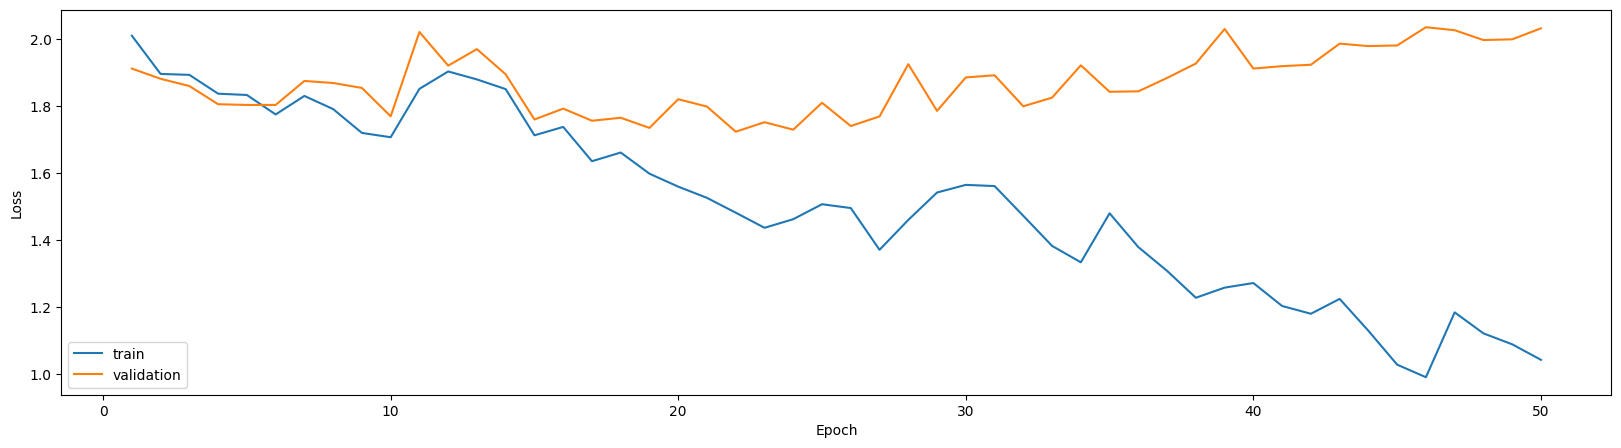

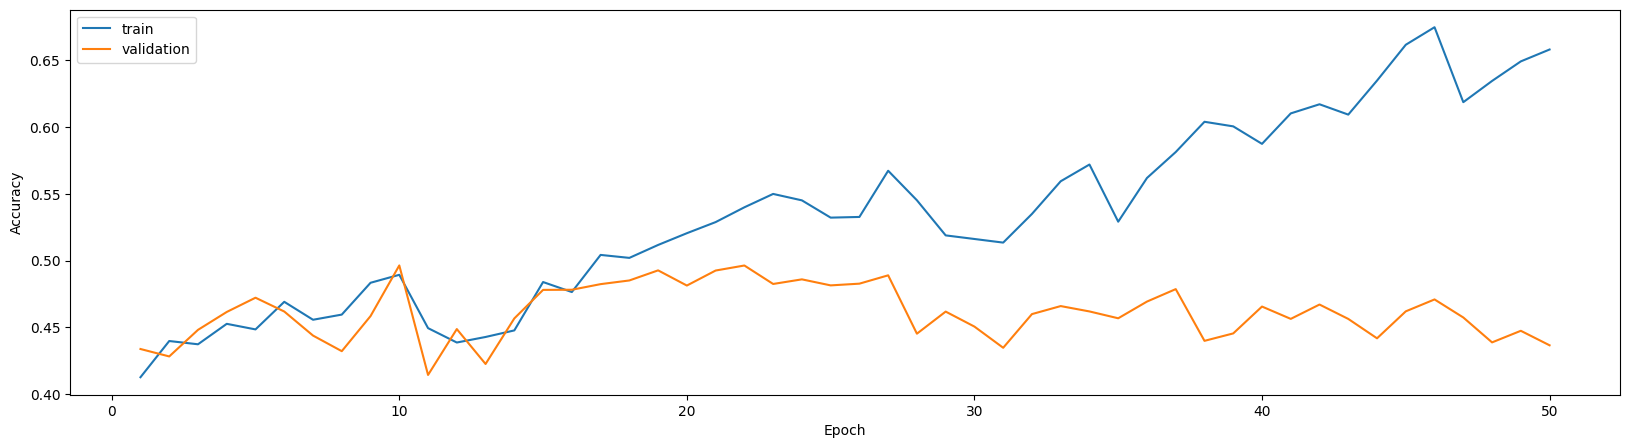

	Evaluation: 100%|██████████| 193/193 [00:02<00:00, 86.40it/s]



Test Loss: 1.712 | Test Acc: 50.22% | Test F1: 0.433 | Test ROC AUC: 0.766

Classification report:
              precision    recall  f1-score   support

           0       0.50      0.86      0.63      4964
           1       0.48      0.50      0.49       640
           2       0.46      0.21      0.29      1070
           3       0.30      0.21      0.25       696
           4       0.20      0.02      0.03       911
           5       0.36      0.06      0.10       135
           6       0.32      0.03      0.06       329
           7       0.44      0.23      0.30       577
           8       0.00      0.00      0.00       180
           9       0.69      0.68      0.68       640
          10       0.19      0.02      0.03       573
          11       0.31      0.15      0.20       225
          12       0.72      0.57      0.64       787
          13       0.42      0.21      0.28       613

    accuracy                           0.50     12340
   macro avg       0.39      0.27 

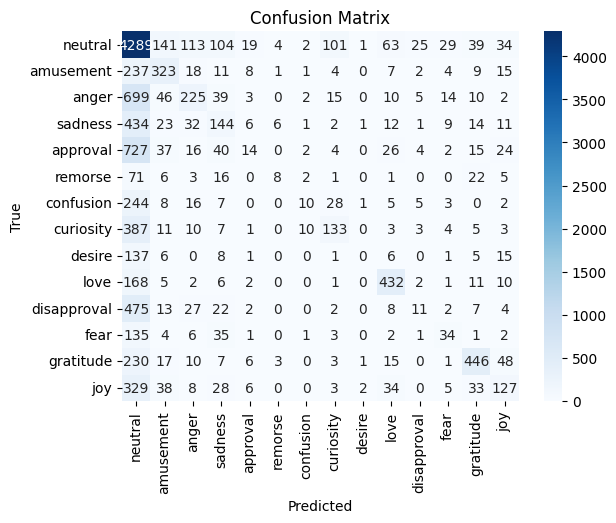

In [ ]:
# plot training curves

import matplotlib.pyplot as plt

# create epoch list
epochs = list(range(1, N_EPOCHS+1))

# plot training and validation loss
plt.figure(figsize=(20, 5))
plt.plot(epochs, train_loss_list, label='train')
plt.plot(epochs, valid_loss_list, label='validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plot training and validation accuracy
plt.figure(figsize=(20, 5))
plt.plot(epochs, train_acc_list, label='train')
plt.plot(epochs, valid_acc_list, label='validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#######
# print out required metrics

import seaborn as sns
model.load_state_dict(torch.load('RNN1-model.pt'))

test_loss, test_acc, test_f1, test_roc_auc, test_report, test_cm = evaluate(model, test_dataloader, criterion)
print(f'\nTest Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}% | Test F1: {test_f1:.3f} | Test ROC AUC: {test_roc_auc:.3f}\n')
# print(f'Confusion matrix:\n{test_cm}')
print(f'Classification report:\n{test_report}')

# plot confusion matrix
# labels for the plot - same as labels used for label_vocab
labels = OrderedDict([("neutral", 1), ("amusement", 1), ("anger", 1), ("sadness", 1), ("approval", 1), ("remorse", 1), ("confusion", 1), ("curiosity", 1), ("desire", 1), ("love", 1), ("disapproval", 1), ("fear", 1), ("gratitude", 1), ("joy", 1)])
# create the heatmap
sns.heatmap(test_cm, cmap="Blues", annot=True, fmt='g', xticklabels=labels, yticklabels=labels)
# add labels and title
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()



---



---



---

## 2.B. RNN2

In [ ]:
import torch.nn as nn
from torch import optim

# Define a bidirectional RNN
class RNN2(nn.Module):
    def __init__(self, pretrained_embeddings, hidden_dim, output_dim, n_layers, bidirectional, dropout, pad_idx):
        super().__init__()
        
        self.num_directions = 2 if bidirectional else 1
        
        self.embedding = nn.Embedding.from_pretrained(pretrained_embeddings, freeze=True, padding_idx=pad_idx)        
        self.rnn = nn.LSTM(pretrained_embeddings.shape[1], 
                           hidden_dim, 
                           num_layers=n_layers, 
                           bidirectional=bidirectional, 
                           dropout=dropout)        
        self.fc = nn.Linear(hidden_dim * self.num_directions, output_dim)

        self.dropout = nn.Dropout(dropout)
        
    def forward(self, text, lengths):
        embedded = self.dropout(self.embedding(text))                   # VV note that lengths need to be on the CPU
        packed_embedded = nn.utils.rnn.pack_padded_sequence(embedded, lengths.cpu(), batch_first=True, enforce_sorted=False)
        
        packed_output, (hidden, cell) = self.rnn(packed_embedded)

        if self.num_directions == 2:  # if bidirectional
            # Concat the final forward (hidden[-2,:,:]) and backward (hidden[-1,:,:]) hidden layers and apply dropout
            hidden = self.dropout(torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim = 1))
        else:
            hidden = self.dropout(hidden[-1,:,:])

        return self.fc(hidden)

# Setting model building arguments
HIDDEN_DIM = 256
OUTPUT_DIM = len(label_vocab)
N_LAYERS = 2
BIDIRECTIONAL = True
DROPOUT = 0.5
PAD_IDX = text_vocab["<pad>"]

model = RNN2(pretrained_embeddings, HIDDEN_DIM,  OUTPUT_DIM, N_LAYERS, BIDIRECTIONAL, DROPOUT, PAD_IDX) # create a RNN model using the arguments
print("Model Summary:")
print(model)
print(f'The model has {count_parameters(model):,} trainable parameters')


# Set other parameters
optimizer = optim.Adam(model.parameters())
criterion = nn.CrossEntropyLoss()

# Use GPU
model = model.to(DEVICE)
criterion = criterion.to(DEVICE)

Model Summary:
RNN2(
  (embedding): Embedding(25002, 100, padding_idx=1)
  (rnn): LSTM(100, 256, num_layers=2, dropout=0.5, bidirectional=True)
  (fc): Linear(in_features=512, out_features=14, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)
The model has 2,317,326 trainable parameters


In [ ]:
######
N_EPOCHS = 50
train_loss_list = []
train_acc_list = []
valid_loss_list = []
valid_acc_list = []

best_valid_loss = float('inf')
print(f"Using {'GPU' if str(DEVICE) == 'cuda' else 'CPU'} for training.")

for epoch in range(N_EPOCHS):
    print(f'Epoch: {epoch+1:02}')
    start_time = time.time()
    
    train_loss, train_acc = train(model, train_dataloader, optimizer, criterion)
    train_loss_list.append(train_loss)
    train_acc_list.append(train_acc)
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    
    valid_loss, valid_acc, valid_f1, valid_auc_roc, valid_report, valid_cm  = evaluate(model, valid_dataloader, criterion)
    valid_loss_list.append(valid_loss)
    valid_acc_list.append(valid_acc)
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')
    
    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'RNN2-model.pt')


Using GPU for training.
Epoch: 01


	Training: 100%|██████████| 315/315 [00:07<00:00, 44.07it/s]


	Train Loss: 2.007 | Train Acc: 41.34%


	Evaluation: 100%|██████████| 135/135 [00:03<00:00, 34.11it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.793 |  Val. Acc: 45.91%
Epoch: 02


	Training: 100%|██████████| 315/315 [00:05<00:00, 58.80it/s]


	Train Loss: 1.741 | Train Acc: 46.63%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 112.32it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.612 |  Val. Acc: 49.35%
Epoch: 03


	Training: 100%|██████████| 315/315 [00:06<00:00, 47.24it/s]


	Train Loss: 1.633 | Train Acc: 49.44%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 97.27it/s] 
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.503 |  Val. Acc: 53.19%
Epoch: 04


	Training: 100%|██████████| 315/315 [00:05<00:00, 62.30it/s]


	Train Loss: 1.552 | Train Acc: 51.99%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 110.65it/s]


	 Val. Loss: 1.460 |  Val. Acc: 54.99%
Epoch: 05


	Training: 100%|██████████| 315/315 [00:06<00:00, 48.17it/s]


	Train Loss: 1.507 | Train Acc: 52.99%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 83.97it/s] 


	 Val. Loss: 1.417 |  Val. Acc: 56.43%
Epoch: 06


	Training: 100%|██████████| 315/315 [00:05<00:00, 61.71it/s]


	Train Loss: 1.461 | Train Acc: 54.25%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 111.66it/s]


	 Val. Loss: 1.387 |  Val. Acc: 57.03%
Epoch: 07


	Training: 100%|██████████| 315/315 [00:06<00:00, 49.14it/s]


	Train Loss: 1.435 | Train Acc: 55.03%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 77.45it/s]


	 Val. Loss: 1.380 |  Val. Acc: 56.81%
Epoch: 08


	Training: 100%|██████████| 315/315 [00:05<00:00, 61.69it/s]


	Train Loss: 1.400 | Train Acc: 56.16%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 109.79it/s]


	 Val. Loss: 1.371 |  Val. Acc: 57.27%
Epoch: 09


	Training: 100%|██████████| 315/315 [00:06<00:00, 50.54it/s]


	Train Loss: 1.370 | Train Acc: 57.05%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 70.20it/s]


	 Val. Loss: 1.385 |  Val. Acc: 56.78%
Epoch: 10


	Training: 100%|██████████| 315/315 [00:05<00:00, 62.11it/s]


	Train Loss: 1.347 | Train Acc: 57.46%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 113.48it/s]


	 Val. Loss: 1.363 |  Val. Acc: 57.41%
Epoch: 11


	Training: 100%|██████████| 315/315 [00:06<00:00, 47.35it/s]


	Train Loss: 1.318 | Train Acc: 58.32%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 69.43it/s]


	 Val. Loss: 1.361 |  Val. Acc: 57.49%
Epoch: 12


	Training: 100%|██████████| 315/315 [00:05<00:00, 55.39it/s]


	Train Loss: 1.299 | Train Acc: 58.44%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 111.22it/s]


	 Val. Loss: 1.354 |  Val. Acc: 57.81%
Epoch: 13


	Training: 100%|██████████| 315/315 [00:06<00:00, 50.67it/s]


	Train Loss: 1.271 | Train Acc: 59.65%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 70.43it/s]


	 Val. Loss: 1.371 |  Val. Acc: 57.40%
Epoch: 14


	Training: 100%|██████████| 315/315 [00:05<00:00, 61.41it/s]


	Train Loss: 1.242 | Train Acc: 60.29%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 109.62it/s]


	 Val. Loss: 1.374 |  Val. Acc: 57.18%
Epoch: 15


	Training: 100%|██████████| 315/315 [00:05<00:00, 53.71it/s]


	Train Loss: 1.217 | Train Acc: 60.87%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 71.39it/s]


	 Val. Loss: 1.380 |  Val. Acc: 57.53%
Epoch: 16


	Training: 100%|██████████| 315/315 [00:05<00:00, 59.55it/s]


	Train Loss: 1.189 | Train Acc: 61.63%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 112.64it/s]


	 Val. Loss: 1.376 |  Val. Acc: 57.76%
Epoch: 17


	Training: 100%|██████████| 315/315 [00:05<00:00, 56.35it/s]


	Train Loss: 1.167 | Train Acc: 62.41%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 72.31it/s]


	 Val. Loss: 1.390 |  Val. Acc: 57.56%
Epoch: 18


	Training: 100%|██████████| 315/315 [00:05<00:00, 55.69it/s]


	Train Loss: 1.136 | Train Acc: 63.01%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 115.42it/s]


	 Val. Loss: 1.404 |  Val. Acc: 57.52%
Epoch: 19


	Training: 100%|██████████| 315/315 [00:05<00:00, 59.18it/s]


	Train Loss: 1.114 | Train Acc: 63.58%


	Evaluation: 100%|██████████| 135/135 [00:02<00:00, 50.14it/s]


	 Val. Loss: 1.418 |  Val. Acc: 56.90%
Epoch: 20


	Training: 100%|██████████| 315/315 [00:06<00:00, 50.08it/s]


	Train Loss: 1.088 | Train Acc: 64.82%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 115.19it/s]


	 Val. Loss: 1.463 |  Val. Acc: 55.81%
Epoch: 21


	Training: 100%|██████████| 315/315 [00:05<00:00, 57.74it/s]


	Train Loss: 1.067 | Train Acc: 65.01%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 72.33it/s]


	 Val. Loss: 1.457 |  Val. Acc: 56.69%
Epoch: 22


	Training: 100%|██████████| 315/315 [00:05<00:00, 55.03it/s]


	Train Loss: 1.042 | Train Acc: 65.92%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 113.93it/s]


	 Val. Loss: 1.486 |  Val. Acc: 56.77%
Epoch: 23


	Training: 100%|██████████| 315/315 [00:05<00:00, 60.55it/s]


	Train Loss: 1.017 | Train Acc: 66.49%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 74.04it/s]


	 Val. Loss: 1.497 |  Val. Acc: 56.30%
Epoch: 24


	Training: 100%|██████████| 315/315 [00:06<00:00, 51.41it/s]


	Train Loss: 1.003 | Train Acc: 67.03%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 111.54it/s]


	 Val. Loss: 1.502 |  Val. Acc: 56.41%
Epoch: 25


	Training: 100%|██████████| 315/315 [00:05<00:00, 61.43it/s]


	Train Loss: 0.964 | Train Acc: 68.13%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 80.61it/s]


	 Val. Loss: 1.537 |  Val. Acc: 56.16%
Epoch: 26


	Training: 100%|██████████| 315/315 [00:07<00:00, 44.19it/s]


	Train Loss: 0.951 | Train Acc: 68.19%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 114.37it/s]


	 Val. Loss: 1.551 |  Val. Acc: 55.57%
Epoch: 27


	Training: 100%|██████████| 315/315 [00:05<00:00, 62.08it/s]


	Train Loss: 0.916 | Train Acc: 69.62%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 88.58it/s]


	 Val. Loss: 1.594 |  Val. Acc: 56.03%
Epoch: 28


	Training: 100%|██████████| 315/315 [00:06<00:00, 48.06it/s]


	Train Loss: 0.896 | Train Acc: 69.95%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 111.81it/s]


	 Val. Loss: 1.586 |  Val. Acc: 55.57%
Epoch: 29


	Training: 100%|██████████| 315/315 [00:05<00:00, 61.81it/s]


	Train Loss: 0.878 | Train Acc: 70.41%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 113.13it/s]


	 Val. Loss: 1.662 |  Val. Acc: 54.46%
Epoch: 30


	Training: 100%|██████████| 315/315 [00:06<00:00, 46.06it/s]


	Train Loss: 0.866 | Train Acc: 70.79%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 110.34it/s]


	 Val. Loss: 1.663 |  Val. Acc: 53.81%
Epoch: 31


	Training: 100%|██████████| 315/315 [00:05<00:00, 61.69it/s]


	Train Loss: 0.836 | Train Acc: 71.97%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 115.14it/s]


	 Val. Loss: 1.667 |  Val. Acc: 54.76%
Epoch: 32


	Training: 100%|██████████| 315/315 [00:06<00:00, 45.72it/s]


	Train Loss: 0.814 | Train Acc: 72.39%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 110.61it/s]


	 Val. Loss: 1.724 |  Val. Acc: 53.08%
Epoch: 33


	Training: 100%|██████████| 315/315 [00:05<00:00, 62.07it/s]


	Train Loss: 0.805 | Train Acc: 72.78%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 113.46it/s]


	 Val. Loss: 1.707 |  Val. Acc: 55.01%
Epoch: 34


	Training: 100%|██████████| 315/315 [00:06<00:00, 45.92it/s]


	Train Loss: 0.778 | Train Acc: 73.87%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 112.41it/s]


	 Val. Loss: 1.764 |  Val. Acc: 53.60%
Epoch: 35


	Training: 100%|██████████| 315/315 [00:05<00:00, 62.91it/s]


	Train Loss: 0.772 | Train Acc: 73.99%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 111.06it/s]


	 Val. Loss: 1.796 |  Val. Acc: 52.63%
Epoch: 36


	Training: 100%|██████████| 315/315 [00:06<00:00, 47.31it/s]


	Train Loss: 0.749 | Train Acc: 74.69%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 94.19it/s] 


	 Val. Loss: 1.819 |  Val. Acc: 52.70%
Epoch: 37


	Training: 100%|██████████| 315/315 [00:05<00:00, 62.21it/s]


	Train Loss: 0.732 | Train Acc: 75.28%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 113.21it/s]


	 Val. Loss: 1.815 |  Val. Acc: 53.83%
Epoch: 38


	Training: 100%|██████████| 315/315 [00:06<00:00, 49.81it/s]


	Train Loss: 0.714 | Train Acc: 75.69%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 76.46it/s]


	 Val. Loss: 1.862 |  Val. Acc: 53.67%
Epoch: 39


	Training: 100%|██████████| 315/315 [00:05<00:00, 60.45it/s]


	Train Loss: 0.711 | Train Acc: 76.02%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 111.54it/s]


	 Val. Loss: 1.843 |  Val. Acc: 53.48%
Epoch: 40


	Training: 100%|██████████| 315/315 [00:06<00:00, 50.57it/s]


	Train Loss: 0.695 | Train Acc: 76.56%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 70.26it/s]


	 Val. Loss: 1.875 |  Val. Acc: 52.90%
Epoch: 41


	Training: 100%|██████████| 315/315 [00:05<00:00, 60.34it/s]


	Train Loss: 0.674 | Train Acc: 77.32%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 112.51it/s]


	 Val. Loss: 1.886 |  Val. Acc: 53.04%
Epoch: 42


	Training: 100%|██████████| 315/315 [00:05<00:00, 52.86it/s]


	Train Loss: 0.651 | Train Acc: 77.75%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 71.28it/s]


	 Val. Loss: 1.923 |  Val. Acc: 53.59%
Epoch: 43


	Training: 100%|██████████| 315/315 [00:05<00:00, 59.23it/s]


	Train Loss: 0.647 | Train Acc: 78.12%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 114.08it/s]


	 Val. Loss: 1.937 |  Val. Acc: 52.55%
Epoch: 44


	Training: 100%|██████████| 315/315 [00:05<00:00, 55.53it/s]


	Train Loss: 0.641 | Train Acc: 78.29%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 71.88it/s]


	 Val. Loss: 1.990 |  Val. Acc: 52.72%
Epoch: 45


	Training: 100%|██████████| 315/315 [00:05<00:00, 55.62it/s]


	Train Loss: 0.631 | Train Acc: 78.65%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 113.38it/s]


	 Val. Loss: 1.988 |  Val. Acc: 52.76%
Epoch: 46


	Training: 100%|██████████| 315/315 [00:05<00:00, 59.22it/s]


	Train Loss: 0.628 | Train Acc: 78.82%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 72.87it/s]


	 Val. Loss: 2.002 |  Val. Acc: 53.30%
Epoch: 47


	Training: 100%|██████████| 315/315 [00:05<00:00, 52.69it/s]


	Train Loss: 0.600 | Train Acc: 79.69%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 111.58it/s]


	 Val. Loss: 2.031 |  Val. Acc: 52.30%
Epoch: 48


	Training: 100%|██████████| 315/315 [00:05<00:00, 62.44it/s]


	Train Loss: 0.593 | Train Acc: 80.08%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 74.57it/s]


	 Val. Loss: 2.032 |  Val. Acc: 52.95%
Epoch: 49


	Training: 100%|██████████| 315/315 [00:06<00:00, 49.66it/s]


	Train Loss: 0.590 | Train Acc: 79.70%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 110.80it/s]


	 Val. Loss: 2.060 |  Val. Acc: 53.30%
Epoch: 50


	Training: 100%|██████████| 315/315 [00:05<00:00, 62.62it/s]


	Train Loss: 0.581 | Train Acc: 80.12%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 89.00it/s]


	 Val. Loss: 2.063 |  Val. Acc: 52.28%


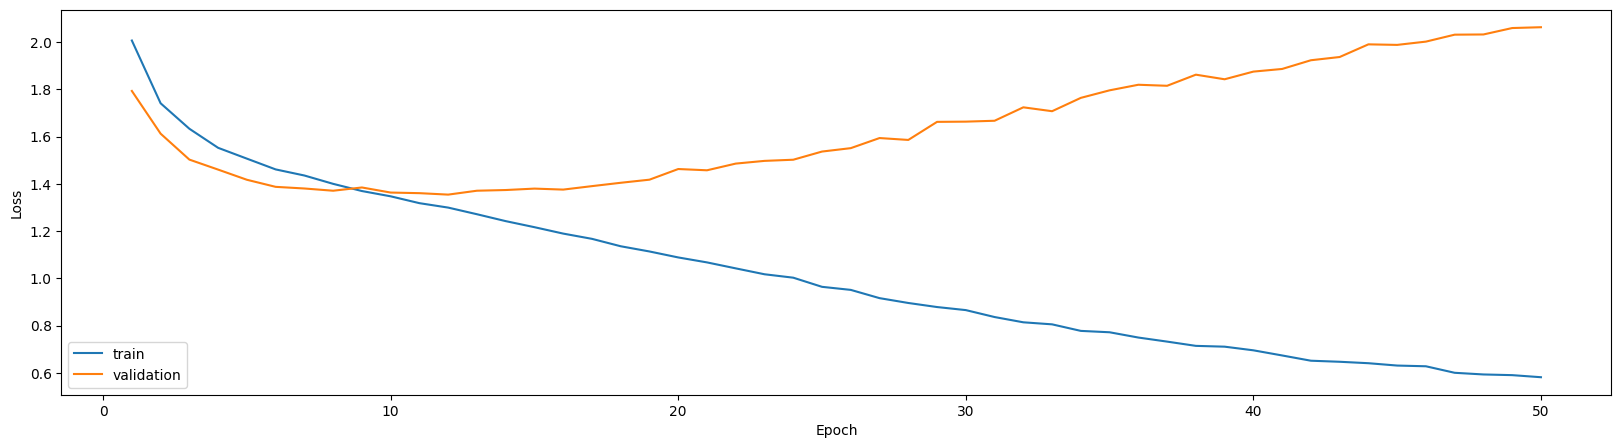

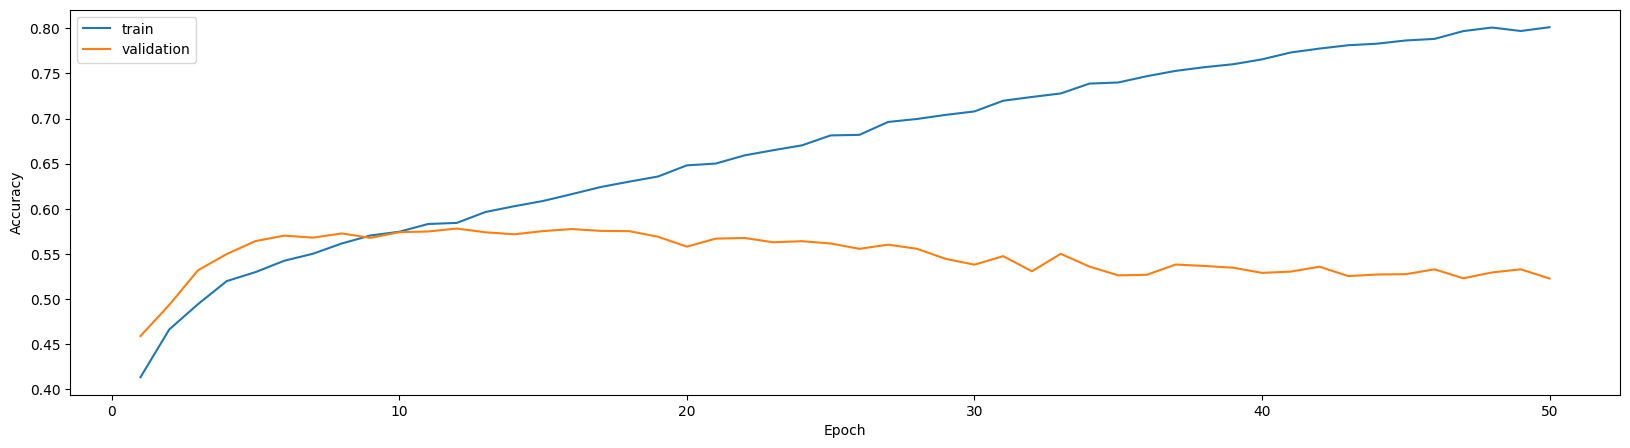

	Evaluation: 100%|██████████| 193/193 [00:02<00:00, 65.99it/s]



Test Loss: 1.346 | Test Acc: 58.12% | Test F1: 0.549 | Test ROC AUC: 0.865

Classification report:
              precision    recall  f1-score   support

           0       0.57      0.82      0.68      4964
           1       0.70      0.57      0.63       640
           2       0.57      0.30      0.39      1070
           3       0.54      0.34      0.42       696
           4       0.40      0.17      0.24       911
           5       0.55      0.41      0.47       135
           6       0.45      0.19      0.26       329
           7       0.45      0.58      0.51       577
           8       0.67      0.44      0.54       180
           9       0.74      0.75      0.74       640
          10       0.35      0.08      0.13       573
          11       0.65      0.51      0.57       225
          12       0.70      0.76      0.73       787
          13       0.59      0.39      0.47       613

    accuracy                           0.58     12340
   macro avg       0.57      0.45 

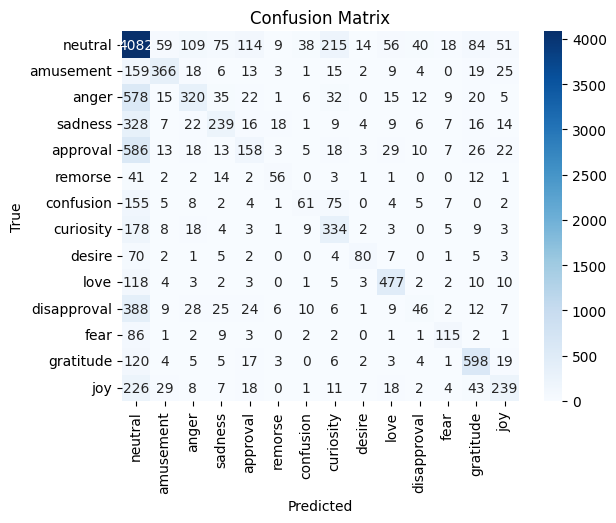

In [ ]:
# plot training curves

import matplotlib.pyplot as plt

# create epoch list
epochs = list(range(1, N_EPOCHS+1))

# plot training and validation loss
plt.figure(figsize=(20, 5))
plt.plot(epochs, train_loss_list, label='train')
plt.plot(epochs, valid_loss_list, label='validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plot training and validation accuracy
plt.figure(figsize=(20, 5))
plt.plot(epochs, train_acc_list, label='train')
plt.plot(epochs, valid_acc_list, label='validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#######
# print out required metrics

import seaborn as sns
model.load_state_dict(torch.load('RNN2-model.pt'))

test_loss, test_acc, test_f1, test_roc_auc, test_report, test_cm = evaluate(model, test_dataloader, criterion)
print(f'\nTest Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}% | Test F1: {test_f1:.3f} | Test ROC AUC: {test_roc_auc:.3f}\n')
# print(f'Confusion matrix:\n{test_cm}')
print(f'Classification report:\n{test_report}')

# plot confusion matrix
# labels for the plot - same as labels used for label_vocab
labels = OrderedDict([("neutral", 1), ("amusement", 1), ("anger", 1), ("sadness", 1), ("approval", 1), ("remorse", 1), ("confusion", 1), ("curiosity", 1), ("desire", 1), ("love", 1), ("disapproval", 1), ("fear", 1), ("gratitude", 1), ("joy", 1)])
# create the heatmap
sns.heatmap(test_cm, cmap="Blues", annot=True, fmt='g', xticklabels=labels, yticklabels=labels)
# add labels and title
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()



---



---



---

## 2.C. RNN3

In [ ]:
import torch.nn as nn
from torch import optim

# Define a multi-layer RNN
class RNN3(nn.Module):
    def __init__(self, input_dim, embedding_dim, hidden_dim, output_dim, pretrained_embeddings, pad_idx):        
        super().__init__()

        self.embedding = nn.Embedding.from_pretrained(pretrained_embeddings, freeze=True, padding_idx=pad_idx)
        self.rnn = nn.RNN(embedding_dim, hidden_dim, num_layers = 3, batch_first=True) # added num_layers argument
        self.fc = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, texts, lengths):
        embedded = self.embedding(texts)                          # VV note that lengths need to be on the CPU
        embedded = nn.utils.rnn.pack_padded_sequence(embedded, lengths.cpu(), batch_first=True, enforce_sorted=False)
        output, hidden = self.rnn(embedded)
        return self.fc(hidden[-1]) # return the hidden state of the last layer only
        # return self.fc(hidden.squeeze(0))


# Setting model building arguments
INPUT_DIM = len(text_vocab)
EMBEDDING_DIM = 100
HIDDEN_DIM = 256 # changed to 512 from 256
OUTPUT_DIM = len(label_vocab) # 14 output nodes
PAD_IDX = text_vocab["<pad>"]

model = RNN3(INPUT_DIM, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM, pretrained_embeddings, PAD_IDX) # create an RNN model using the arguments
print("Model Summary:")
print(model)
print(f'The model has {count_parameters(model):,} trainable parameters')

# Set other parameters
optimizer = optim.Adam(model.parameters())
criterion = nn.CrossEntropyLoss()

# Use GPU
model = model.to(DEVICE)
criterion = criterion.to(DEVICE)


Model Summary:
RNN3(
  (embedding): Embedding(25002, 100, padding_idx=1)
  (rnn): RNN(100, 256, num_layers=3, batch_first=True)
  (fc): Linear(in_features=256, out_features=14, bias=True)
)
The model has 358,414 trainable parameters


In [ ]:
######
N_EPOCHS = 50
train_loss_list = []
train_acc_list = []
valid_loss_list = []
valid_acc_list = []

best_valid_loss = float('inf')
print(f"Using {'GPU' if str(DEVICE) == 'cuda' else 'CPU'} for training.")

for epoch in range(N_EPOCHS):
    print(f'Epoch: {epoch+1:02}')
    start_time = time.time()
    
    train_loss, train_acc = train(model, train_dataloader, optimizer, criterion)
    train_loss_list.append(train_loss)
    train_acc_list.append(train_acc)
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    
    valid_loss, valid_acc, valid_f1, valid_auc_roc, valid_report, valid_cm  = evaluate(model, valid_dataloader, criterion)
    valid_loss_list.append(valid_loss)
    valid_acc_list.append(valid_acc)
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')
    
    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'RNN3-model.pt')


Using GPU for training.
Epoch: 01


	Training: 100%|██████████| 315/315 [00:04<00:00, 72.66it/s]


	Train Loss: 2.103 | Train Acc: 39.68%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 79.58it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.991 |  Val. Acc: 42.05%
Epoch: 02


	Training: 100%|██████████| 315/315 [00:05<00:00, 60.31it/s]


	Train Loss: 1.965 | Train Acc: 41.75%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 117.94it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.927 |  Val. Acc: 43.60%
Epoch: 03


	Training: 100%|██████████| 315/315 [00:04<00:00, 74.08it/s]


	Train Loss: 1.939 | Train Acc: 42.38%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 118.00it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.968 |  Val. Acc: 41.61%
Epoch: 04


	Training: 100%|██████████| 315/315 [00:05<00:00, 52.73it/s]


	Train Loss: 1.927 | Train Acc: 43.17%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 110.21it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.964 |  Val. Acc: 43.21%
Epoch: 05


	Training: 100%|██████████| 315/315 [00:04<00:00, 75.80it/s]


	Train Loss: 1.917 | Train Acc: 43.16%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 121.67it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.907 |  Val. Acc: 44.29%
Epoch: 06


	Training: 100%|██████████| 315/315 [00:05<00:00, 60.29it/s]


	Train Loss: 1.898 | Train Acc: 43.58%


	Evaluation: 100%|██████████| 135/135 [00:02<00:00, 67.04it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.835 |  Val. Acc: 46.35%
Epoch: 07


	Training: 100%|██████████| 315/315 [00:05<00:00, 55.30it/s]


	Train Loss: 1.910 | Train Acc: 43.33%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 117.94it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.917 |  Val. Acc: 41.85%
Epoch: 08


	Training: 100%|██████████| 315/315 [00:04<00:00, 76.95it/s]


	Train Loss: 1.911 | Train Acc: 43.23%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 125.24it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.909 |  Val. Acc: 43.04%
Epoch: 09


	Training: 100%|██████████| 315/315 [00:05<00:00, 62.56it/s]


	Train Loss: 1.887 | Train Acc: 44.13%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 79.26it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.848 |  Val. Acc: 43.33%
Epoch: 10


	Training: 100%|██████████| 315/315 [00:04<00:00, 78.15it/s]


	Train Loss: 1.891 | Train Acc: 44.42%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 123.64it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.917 |  Val. Acc: 43.24%
Epoch: 11


	Training: 100%|██████████| 315/315 [00:03<00:00, 79.01it/s]


	Train Loss: 1.919 | Train Acc: 43.21%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 106.66it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.870 |  Val. Acc: 43.86%
Epoch: 12


	Training: 100%|██████████| 315/315 [00:05<00:00, 56.96it/s]


	Train Loss: 1.906 | Train Acc: 43.11%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 122.52it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.924 |  Val. Acc: 43.25%
Epoch: 13


	Training: 100%|██████████| 315/315 [00:04<00:00, 76.39it/s]


	Train Loss: 1.857 | Train Acc: 44.53%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 119.33it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.904 |  Val. Acc: 40.99%
Epoch: 14


	Training: 100%|██████████| 315/315 [00:05<00:00, 62.05it/s]


	Train Loss: 1.894 | Train Acc: 43.82%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 77.15it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.938 |  Val. Acc: 42.90%
Epoch: 15


	Training: 100%|██████████| 315/315 [00:06<00:00, 51.26it/s]


	Train Loss: 1.871 | Train Acc: 44.57%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 113.41it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.834 |  Val. Acc: 44.48%
Epoch: 16


	Training: 100%|██████████| 315/315 [00:07<00:00, 43.82it/s]


	Train Loss: 1.819 | Train Acc: 45.39%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 85.82it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 2.226 |  Val. Acc: 40.38%
Epoch: 17


	Training: 100%|██████████| 315/315 [00:04<00:00, 78.66it/s]


	Train Loss: 2.041 | Train Acc: 41.26%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 121.00it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.976 |  Val. Acc: 43.04%
Epoch: 18


	Training: 100%|██████████| 315/315 [00:03<00:00, 81.24it/s]


	Train Loss: 1.986 | Train Acc: 41.59%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 90.87it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.972 |  Val. Acc: 41.50%
Epoch: 19


	Training: 100%|██████████| 315/315 [00:05<00:00, 59.43it/s]


	Train Loss: 1.931 | Train Acc: 42.52%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 126.06it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.904 |  Val. Acc: 42.90%
Epoch: 20


	Training: 100%|██████████| 315/315 [00:03<00:00, 79.30it/s]


	Train Loss: 1.880 | Train Acc: 43.85%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 121.88it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.828 |  Val. Acc: 46.72%
Epoch: 21


	Training: 100%|██████████| 315/315 [00:05<00:00, 62.61it/s]


	Train Loss: 1.811 | Train Acc: 45.59%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 78.09it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.837 |  Val. Acc: 44.08%
Epoch: 22


	Training: 100%|██████████| 315/315 [00:04<00:00, 75.59it/s]


	Train Loss: 1.778 | Train Acc: 46.38%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 122.93it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.761 |  Val. Acc: 47.65%
Epoch: 23


	Training: 100%|██████████| 315/315 [00:04<00:00, 78.03it/s]


	Train Loss: 1.844 | Train Acc: 44.87%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 109.87it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.806 |  Val. Acc: 46.03%
Epoch: 24


	Training: 100%|██████████| 315/315 [00:07<00:00, 44.05it/s]


	Train Loss: 1.786 | Train Acc: 46.03%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 77.69it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.758 |  Val. Acc: 47.55%
Epoch: 25


	Training: 100%|██████████| 315/315 [00:03<00:00, 79.67it/s]


	Train Loss: 1.771 | Train Acc: 46.67%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 122.15it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.799 |  Val. Acc: 45.69%
Epoch: 26


	Training: 100%|██████████| 315/315 [00:04<00:00, 78.19it/s]


	Train Loss: 1.754 | Train Acc: 47.27%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 81.06it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.746 |  Val. Acc: 48.29%
Epoch: 27


	Training: 100%|██████████| 315/315 [00:05<00:00, 60.80it/s]


	Train Loss: 1.715 | Train Acc: 47.82%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 124.21it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.716 |  Val. Acc: 48.38%
Epoch: 28


	Training: 100%|██████████| 315/315 [00:03<00:00, 80.17it/s]


	Train Loss: 1.716 | Train Acc: 48.27%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 124.23it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.728 |  Val. Acc: 49.19%
Epoch: 29


	Training: 100%|██████████| 315/315 [00:05<00:00, 60.75it/s]


	Train Loss: 1.751 | Train Acc: 46.78%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 76.43it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.703 |  Val. Acc: 48.78%
Epoch: 30


	Training: 100%|██████████| 315/315 [00:04<00:00, 76.92it/s]


	Train Loss: 1.784 | Train Acc: 46.49%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 120.93it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.842 |  Val. Acc: 47.06%
Epoch: 31


	Training: 100%|██████████| 315/315 [00:04<00:00, 74.81it/s]


	Train Loss: 1.745 | Train Acc: 47.87%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 80.98it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.759 |  Val. Acc: 48.18%
Epoch: 32


	Training: 100%|██████████| 315/315 [00:05<00:00, 53.54it/s]


	Train Loss: 1.751 | Train Acc: 47.87%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 79.11it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.804 |  Val. Acc: 47.81%
Epoch: 33


	Training: 100%|██████████| 315/315 [00:04<00:00, 66.97it/s]


	Train Loss: 1.751 | Train Acc: 47.94%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 124.98it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.796 |  Val. Acc: 48.10%
Epoch: 34


	Training: 100%|██████████| 315/315 [00:05<00:00, 54.24it/s]


	Train Loss: 1.754 | Train Acc: 47.53%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 118.93it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.801 |  Val. Acc: 47.26%
Epoch: 35


	Training: 100%|██████████| 315/315 [00:03<00:00, 79.83it/s]


	Train Loss: 1.716 | Train Acc: 48.05%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 123.98it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.706 |  Val. Acc: 49.87%
Epoch: 36


	Training: 100%|██████████| 315/315 [00:04<00:00, 68.52it/s]


	Train Loss: 1.709 | Train Acc: 48.80%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 80.37it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.699 |  Val. Acc: 49.66%
Epoch: 37


	Training: 100%|██████████| 315/315 [00:04<00:00, 68.31it/s]


	Train Loss: 1.682 | Train Acc: 49.22%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 124.60it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.806 |  Val. Acc: 47.29%
Epoch: 38


	Training: 100%|██████████| 315/315 [00:03<00:00, 79.66it/s]


	Train Loss: 1.727 | Train Acc: 48.05%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 123.37it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.753 |  Val. Acc: 47.57%
Epoch: 39


	Training: 100%|██████████| 315/315 [00:05<00:00, 54.48it/s]


	Train Loss: 1.731 | Train Acc: 48.04%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 121.03it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.741 |  Val. Acc: 48.32%
Epoch: 40


	Training: 100%|██████████| 315/315 [00:03<00:00, 79.22it/s]


	Train Loss: 1.721 | Train Acc: 48.54%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 122.65it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.734 |  Val. Acc: 47.87%
Epoch: 41


	Training: 100%|██████████| 315/315 [00:04<00:00, 72.81it/s]


	Train Loss: 1.774 | Train Acc: 46.48%


	Evaluation: 100%|██████████| 135/135 [00:02<00:00, 63.11it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.779 |  Val. Acc: 46.71%
Epoch: 42


	Training: 100%|██████████| 315/315 [00:06<00:00, 46.35it/s]


	Train Loss: 1.750 | Train Acc: 46.78%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 122.43it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.766 |  Val. Acc: 46.48%
Epoch: 43


	Training: 100%|██████████| 315/315 [00:04<00:00, 78.10it/s]


	Train Loss: 1.734 | Train Acc: 48.05%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 120.56it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.816 |  Val. Acc: 46.34%
Epoch: 44


	Training: 100%|██████████| 315/315 [00:04<00:00, 69.44it/s]


	Train Loss: 1.748 | Train Acc: 47.11%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 82.38it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.892 |  Val. Acc: 42.29%
Epoch: 45


	Training: 100%|██████████| 315/315 [00:04<00:00, 68.03it/s]


	Train Loss: 1.801 | Train Acc: 45.91%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 123.62it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.822 |  Val. Acc: 47.15%
Epoch: 46


	Training: 100%|██████████| 315/315 [00:03<00:00, 78.86it/s]


	Train Loss: 1.870 | Train Acc: 44.79%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 125.16it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.996 |  Val. Acc: 42.56%
Epoch: 47


	Training: 100%|██████████| 315/315 [00:05<00:00, 54.74it/s]


	Train Loss: 1.826 | Train Acc: 45.59%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 117.54it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.818 |  Val. Acc: 47.45%
Epoch: 48


	Training: 100%|██████████| 315/315 [00:03<00:00, 80.47it/s]


	Train Loss: 1.736 | Train Acc: 48.16%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 123.82it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.811 |  Val. Acc: 46.79%
Epoch: 49


	Training: 100%|██████████| 315/315 [00:04<00:00, 75.85it/s]


	Train Loss: 1.771 | Train Acc: 46.91%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 81.38it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.757 |  Val. Acc: 49.05%
Epoch: 50


	Training: 100%|██████████| 315/315 [00:05<00:00, 59.84it/s]


	Train Loss: 1.717 | Train Acc: 48.93%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 80.75it/s]


	 Val. Loss: 1.788 |  Val. Acc: 47.37%


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


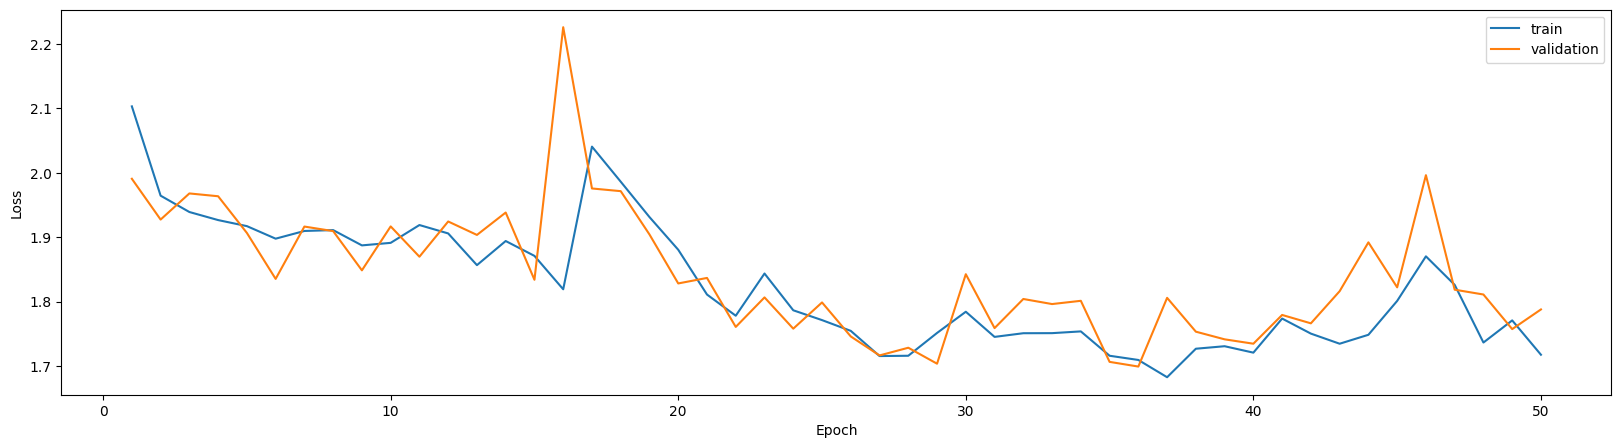

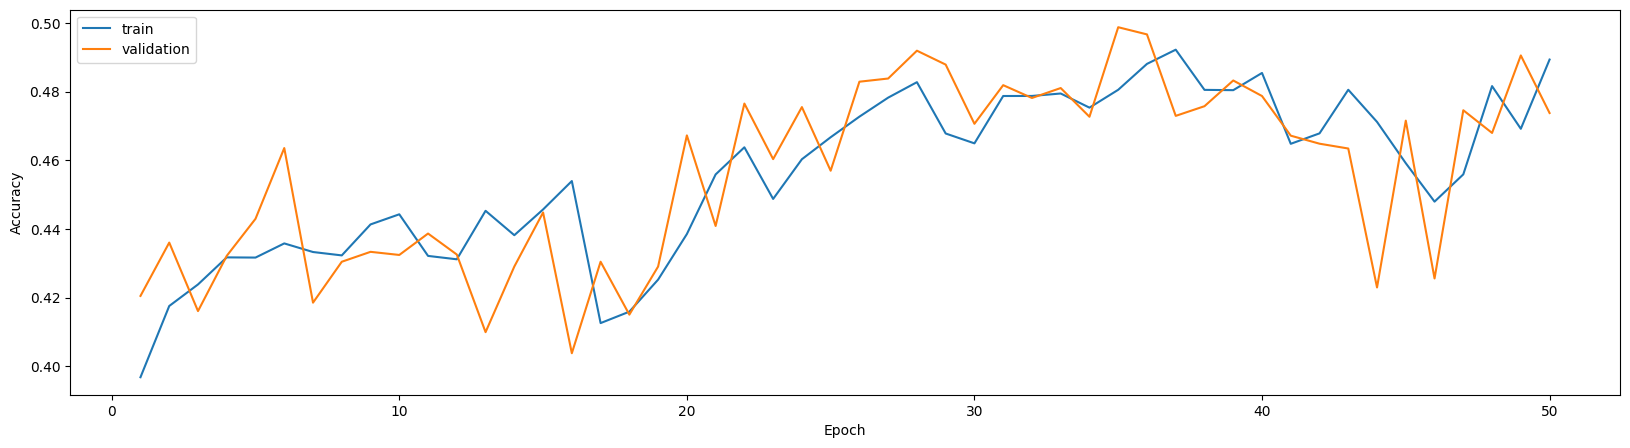

	Evaluation: 100%|██████████| 193/193 [00:05<00:00, 35.29it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Test Loss: 1.680 | Test Acc: 50.20% | Test F1: 0.425 | Test ROC AUC: 0.778

Classification report:
              precision    recall  f1-score   support

           0       0.50      0.87      0.64      4983
           1       0.59      0.41      0.49       672
           2       0.40      0.22      0.28      1070
           3       0.33      0.15      0.20       667
           4       0.21      0.01      0.01       837
           5       0.33      0.10      0.15       144
           6       0.00      0.00      0.00       351
           7       0.39      0.41      0.40       551
           8       0.00      0.00      0.00       200
           9       0.60      0.63      0.61       614
          10       0.00      0.00      0.00       570
          11       0.00      0.00      0.00       208
          12       0.66      0.61      0.63       844
          13       0.34      0.16      0.22       629

    accuracy                           0.50     12340
   macro avg       0.31      0.25 

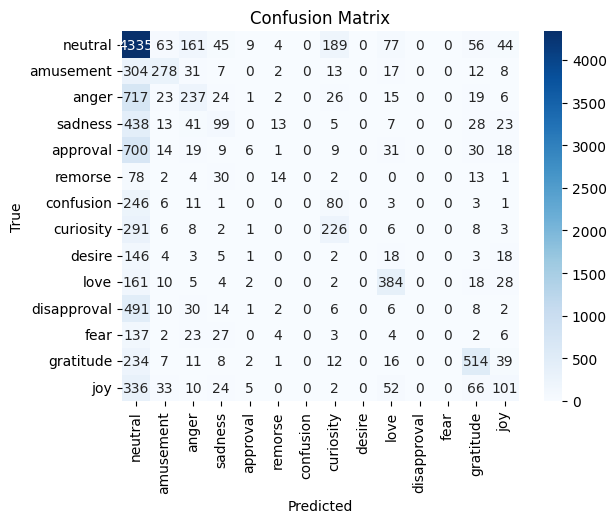

In [ ]:
# plot training curves

import matplotlib.pyplot as plt

# create epoch list
epochs = list(range(1, N_EPOCHS+1))

# plot training and validation loss
plt.figure(figsize=(20, 5))
plt.plot(epochs, train_loss_list, label='train')
plt.plot(epochs, valid_loss_list, label='validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plot training and validation accuracy
plt.figure(figsize=(20, 5))
plt.plot(epochs, train_acc_list, label='train')
plt.plot(epochs, valid_acc_list, label='validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#######
# print out required metrics

import seaborn as sns
model.load_state_dict(torch.load('RNN3-model.pt'))

test_loss, test_acc, test_f1, test_roc_auc, test_report, test_cm = evaluate(model, test_dataloader, criterion)
print(f'\nTest Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}% | Test F1: {test_f1:.3f} | Test ROC AUC: {test_roc_auc:.3f}\n')
# print(f'Confusion matrix:\n{test_cm}')
print(f'Classification report:\n{test_report}')

# plot confusion matrix
# labels for the plot - same as labels used for label_vocab
labels = OrderedDict([("neutral", 1), ("amusement", 1), ("anger", 1), ("sadness", 1), ("approval", 1), ("remorse", 1), ("confusion", 1), ("curiosity", 1), ("desire", 1), ("love", 1), ("disapproval", 1), ("fear", 1), ("gratitude", 1), ("joy", 1)])
# create the heatmap
sns.heatmap(test_cm, cmap="Blues", annot=True, fmt='g', xticklabels=labels, yticklabels=labels)
# add labels and title
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()



---



---



---

## 2.D. RNN4

In [ ]:
import torch.nn as nn
from torch import optim

# Define a bidirectional RNN
class RNN4(nn.Module):
    def __init__(self, pretrained_embeddings, hidden_dim, output_dim, n_layers, bidirectional, dropout, pad_idx):
        super().__init__()
        
        self.num_directions = 2 if bidirectional else 1
        
        self.embedding = nn.Embedding.from_pretrained(pretrained_embeddings, freeze=True, padding_idx=pad_idx)        
        self.rnn = nn.LSTM(pretrained_embeddings.shape[1], 
                           hidden_dim, 
                           num_layers=n_layers, 
                           bidirectional=bidirectional, 
                           dropout=dropout)        
        self.fc = nn.Linear(hidden_dim * self.num_directions, output_dim)

        self.dropout = nn.Dropout(dropout)
        
    def forward(self, text, lengths):
        embedded = self.dropout(self.embedding(text))                   # VV note that lengths need to be on the CPU
        packed_embedded = nn.utils.rnn.pack_padded_sequence(embedded, lengths.cpu(), batch_first=True, enforce_sorted=False)
        
        packed_output, (hidden, cell) = self.rnn(packed_embedded)

        if self.num_directions == 2:  # if bidirectional
            # Concat the final forward (hidden[-2,:,:]) and backward (hidden[-1,:,:]) hidden layers and apply dropout
            hidden = self.dropout(torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim = 1))
        else:
            hidden = self.dropout(hidden[-1,:,:])

        return self.fc(hidden)

# Setting model building arguments
HIDDEN_DIM = 256
OUTPUT_DIM = len(label_vocab)
N_LAYERS = 4
BIDIRECTIONAL = True
DROPOUT = 0.5
PAD_IDX = text_vocab["<pad>"]

model = RNN4(pretrained_embeddings, HIDDEN_DIM,  OUTPUT_DIM, N_LAYERS, BIDIRECTIONAL, DROPOUT, PAD_IDX) # create a RNN model using the arguments
print("Model Summary:")
print(model)
print(f'The model has {count_parameters(model):,} trainable parameters')


# Set other parameters
optimizer = optim.Adam(model.parameters())
criterion = nn.CrossEntropyLoss()

# Use GPU
model = model.to(DEVICE)
criterion = criterion.to(DEVICE)

Model Summary:
RNN4(
  (embedding): Embedding(25002, 100, padding_idx=1)
  (rnn): LSTM(100, 256, num_layers=4, dropout=0.5, bidirectional=True)
  (fc): Linear(in_features=512, out_features=14, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)
The model has 5,471,246 trainable parameters


In [ ]:
######
N_EPOCHS = 50
train_loss_list = []
train_acc_list = []
valid_loss_list = []
valid_acc_list = []

best_valid_loss = float('inf')
print(f"Using {'GPU' if str(DEVICE) == 'cuda' else 'CPU'} for training.")

for epoch in range(N_EPOCHS):
    print(f'Epoch: {epoch+1:02}')
    start_time = time.time()
    
    train_loss, train_acc = train(model, train_dataloader, optimizer, criterion)
    train_loss_list.append(train_loss)
    train_acc_list.append(train_acc)
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    
    valid_loss, valid_acc, valid_f1, valid_auc_roc, valid_report, valid_cm  = evaluate(model, valid_dataloader, criterion)
    valid_loss_list.append(valid_loss)
    valid_acc_list.append(valid_acc)
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')
    
    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'RNN4-model.pt')


Using GPU for training.
Epoch: 01


	Training: 100%|██████████| 315/315 [00:10<00:00, 30.68it/s]


	Train Loss: 2.071 | Train Acc: 40.50%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 90.45it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.877 |  Val. Acc: 43.61%
Epoch: 02


	Training: 100%|██████████| 315/315 [00:08<00:00, 35.64it/s]


	Train Loss: 1.859 | Train Acc: 44.21%


	Evaluation: 100%|██████████| 135/135 [00:02<00:00, 58.35it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.719 |  Val. Acc: 48.04%
Epoch: 03


	Training: 100%|██████████| 315/315 [00:10<00:00, 29.95it/s]


	Train Loss: 1.728 | Train Acc: 47.66%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 89.51it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.582 |  Val. Acc: 52.70%
Epoch: 04


	Training: 100%|██████████| 315/315 [00:09<00:00, 32.03it/s]


	Train Loss: 1.647 | Train Acc: 49.86%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 91.41it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.503 |  Val. Acc: 53.84%
Epoch: 05


	Training: 100%|██████████| 315/315 [00:09<00:00, 32.00it/s]


	Train Loss: 1.581 | Train Acc: 51.79%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 87.20it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.450 |  Val. Acc: 55.78%
Epoch: 06


	Training: 100%|██████████| 315/315 [00:08<00:00, 37.00it/s]


	Train Loss: 1.526 | Train Acc: 52.45%


	Evaluation: 100%|██████████| 135/135 [00:02<00:00, 58.79it/s]


	 Val. Loss: 1.441 |  Val. Acc: 56.42%
Epoch: 07


	Training: 100%|██████████| 315/315 [00:10<00:00, 30.56it/s]


	Train Loss: 1.488 | Train Acc: 53.63%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 76.54it/s]


	 Val. Loss: 1.383 |  Val. Acc: 57.60%
Epoch: 08


	Training: 100%|██████████| 315/315 [00:09<00:00, 31.82it/s]


	Train Loss: 1.456 | Train Acc: 54.60%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 90.37it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.382 |  Val. Acc: 57.32%
Epoch: 09


	Training: 100%|██████████| 315/315 [00:10<00:00, 29.55it/s]


	Train Loss: 1.438 | Train Acc: 55.19%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 87.79it/s]


	 Val. Loss: 1.371 |  Val. Acc: 57.45%
Epoch: 10


	Training: 100%|██████████| 315/315 [00:09<00:00, 34.54it/s]


	Train Loss: 1.404 | Train Acc: 56.13%


	Evaluation: 100%|██████████| 135/135 [00:02<00:00, 59.72it/s]


	 Val. Loss: 1.356 |  Val. Acc: 58.68%
Epoch: 11


	Training: 100%|██████████| 315/315 [00:09<00:00, 34.56it/s]


	Train Loss: 1.384 | Train Acc: 57.00%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 85.74it/s]


	 Val. Loss: 1.353 |  Val. Acc: 58.35%
Epoch: 12


	Training: 100%|██████████| 315/315 [00:12<00:00, 26.08it/s]


	Train Loss: 1.363 | Train Acc: 56.90%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 88.94it/s]


	 Val. Loss: 1.356 |  Val. Acc: 57.70%
Epoch: 13


	Training: 100%|██████████| 315/315 [00:10<00:00, 31.05it/s]


	Train Loss: 1.348 | Train Acc: 57.34%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 89.53it/s]


	 Val. Loss: 1.355 |  Val. Acc: 58.42%
Epoch: 14


	Training: 100%|██████████| 315/315 [00:08<00:00, 37.65it/s]


	Train Loss: 1.320 | Train Acc: 57.97%


	Evaluation: 100%|██████████| 135/135 [00:02<00:00, 61.56it/s]


	 Val. Loss: 1.344 |  Val. Acc: 58.99%
Epoch: 15


	Training: 100%|██████████| 315/315 [00:09<00:00, 34.29it/s]


	Train Loss: 1.309 | Train Acc: 58.32%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 91.12it/s]


	 Val. Loss: 1.323 |  Val. Acc: 59.37%
Epoch: 16


	Training: 100%|██████████| 315/315 [00:11<00:00, 28.56it/s]


	Train Loss: 1.283 | Train Acc: 59.09%


	Evaluation: 100%|██████████| 135/135 [00:02<00:00, 65.90it/s]


	 Val. Loss: 1.351 |  Val. Acc: 59.05%
Epoch: 17


	Training: 100%|██████████| 315/315 [00:09<00:00, 32.29it/s]


	Train Loss: 1.266 | Train Acc: 59.42%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 89.00it/s]


	 Val. Loss: 1.346 |  Val. Acc: 57.99%
Epoch: 18


	Training: 100%|██████████| 315/315 [00:08<00:00, 37.56it/s]


	Train Loss: 1.248 | Train Acc: 60.06%


	Evaluation: 100%|██████████| 135/135 [00:02<00:00, 61.88it/s]


	 Val. Loss: 1.358 |  Val. Acc: 57.85%
Epoch: 19


	Training: 100%|██████████| 315/315 [00:09<00:00, 34.13it/s]


	Train Loss: 1.225 | Train Acc: 60.71%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 88.80it/s]


	 Val. Loss: 1.363 |  Val. Acc: 59.02%
Epoch: 20


	Training: 100%|██████████| 315/315 [00:09<00:00, 31.73it/s]


	Train Loss: 1.210 | Train Acc: 61.05%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 88.98it/s]


	 Val. Loss: 1.351 |  Val. Acc: 58.85%
Epoch: 21


	Training: 100%|██████████| 315/315 [00:11<00:00, 27.14it/s]


	Train Loss: 1.181 | Train Acc: 61.87%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 72.34it/s]


	 Val. Loss: 1.365 |  Val. Acc: 58.50%
Epoch: 22


	Training: 100%|██████████| 315/315 [00:08<00:00, 37.50it/s]


	Train Loss: 1.182 | Train Acc: 61.98%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 70.58it/s]


	 Val. Loss: 1.346 |  Val. Acc: 58.79%
Epoch: 23


	Training: 100%|██████████| 315/315 [00:09<00:00, 33.59it/s]


	Train Loss: 1.153 | Train Acc: 62.61%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 88.69it/s]


	 Val. Loss: 1.367 |  Val. Acc: 58.50%
Epoch: 24


	Training: 100%|██████████| 315/315 [00:09<00:00, 31.57it/s]


	Train Loss: 1.142 | Train Acc: 62.84%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 89.29it/s]


	 Val. Loss: 1.374 |  Val. Acc: 58.69%
Epoch: 25


	Training: 100%|██████████| 315/315 [00:09<00:00, 34.38it/s]


	Train Loss: 1.117 | Train Acc: 63.46%


	Evaluation: 100%|██████████| 135/135 [00:02<00:00, 46.50it/s]


	 Val. Loss: 1.411 |  Val. Acc: 58.44%
Epoch: 26


	Training: 100%|██████████| 315/315 [00:09<00:00, 32.01it/s]


	Train Loss: 1.107 | Train Acc: 63.86%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 86.31it/s]


	 Val. Loss: 1.403 |  Val. Acc: 57.82%
Epoch: 27


	Training: 100%|██████████| 315/315 [00:09<00:00, 31.70it/s]


	Train Loss: 1.086 | Train Acc: 64.31%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 89.70it/s]


	 Val. Loss: 1.393 |  Val. Acc: 58.20%
Epoch: 28


	Training: 100%|██████████| 315/315 [00:09<00:00, 31.75it/s]


	Train Loss: 1.072 | Train Acc: 64.95%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 89.34it/s]


	 Val. Loss: 1.424 |  Val. Acc: 57.61%
Epoch: 29


	Training: 100%|██████████| 315/315 [00:08<00:00, 35.99it/s]


	Train Loss: 1.054 | Train Acc: 65.24%


	Evaluation: 100%|██████████| 135/135 [00:02<00:00, 62.60it/s]


	 Val. Loss: 1.438 |  Val. Acc: 57.93%
Epoch: 30


	Training: 100%|██████████| 315/315 [00:10<00:00, 30.29it/s]


	Train Loss: 1.029 | Train Acc: 66.29%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 85.14it/s]


	 Val. Loss: 1.460 |  Val. Acc: 57.23%
Epoch: 31


	Training: 100%|██████████| 315/315 [00:09<00:00, 31.65it/s]


	Train Loss: 1.009 | Train Acc: 66.56%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 86.89it/s]


	 Val. Loss: 1.478 |  Val. Acc: 56.56%
Epoch: 32


	Training: 100%|██████████| 315/315 [00:09<00:00, 31.57it/s]


	Train Loss: 1.002 | Train Acc: 66.72%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 89.03it/s]


	 Val. Loss: 1.468 |  Val. Acc: 57.34%
Epoch: 33


	Training: 100%|██████████| 315/315 [00:08<00:00, 35.89it/s]


	Train Loss: 0.993 | Train Acc: 67.46%


	Evaluation: 100%|██████████| 135/135 [00:02<00:00, 61.51it/s]


	 Val. Loss: 1.500 |  Val. Acc: 56.79%
Epoch: 34


	Training: 100%|██████████| 315/315 [00:08<00:00, 35.73it/s]


	Train Loss: 0.977 | Train Acc: 67.39%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 89.69it/s]


	 Val. Loss: 1.487 |  Val. Acc: 56.73%
Epoch: 35


	Training: 100%|██████████| 315/315 [00:12<00:00, 26.19it/s]


	Train Loss: 0.950 | Train Acc: 68.46%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 89.66it/s]


	 Val. Loss: 1.519 |  Val. Acc: 57.03%
Epoch: 36


	Training: 100%|██████████| 315/315 [00:09<00:00, 34.15it/s]


	Train Loss: 0.948 | Train Acc: 68.54%


	Evaluation: 100%|██████████| 135/135 [00:02<00:00, 58.44it/s]


	 Val. Loss: 1.550 |  Val. Acc: 56.90%
Epoch: 37


	Training: 100%|██████████| 315/315 [00:08<00:00, 37.43it/s]


	Train Loss: 0.939 | Train Acc: 68.66%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 85.42it/s]


	 Val. Loss: 1.567 |  Val. Acc: 55.43%
Epoch: 38


	Training: 100%|██████████| 315/315 [00:09<00:00, 32.24it/s]


	Train Loss: 0.918 | Train Acc: 69.35%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 88.42it/s]


	 Val. Loss: 1.538 |  Val. Acc: 56.34%
Epoch: 39


	Training: 100%|██████████| 315/315 [00:11<00:00, 27.96it/s]


	Train Loss: 0.886 | Train Acc: 70.23%


	Evaluation: 100%|██████████| 135/135 [00:02<00:00, 60.86it/s]


	 Val. Loss: 1.585 |  Val. Acc: 55.38%
Epoch: 40


	Training: 100%|██████████| 315/315 [00:09<00:00, 34.82it/s]


	Train Loss: 0.883 | Train Acc: 70.16%


	Evaluation: 100%|██████████| 135/135 [00:02<00:00, 60.69it/s]


	 Val. Loss: 1.607 |  Val. Acc: 55.43%
Epoch: 41


	Training: 100%|██████████| 315/315 [00:08<00:00, 36.37it/s]


	Train Loss: 0.882 | Train Acc: 70.38%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 87.26it/s]


	 Val. Loss: 1.606 |  Val. Acc: 56.61%
Epoch: 42


	Training: 100%|██████████| 315/315 [00:10<00:00, 30.63it/s]


	Train Loss: 0.846 | Train Acc: 71.43%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 88.62it/s]


	 Val. Loss: 1.658 |  Val. Acc: 54.64%
Epoch: 43


	Training: 100%|██████████| 315/315 [00:10<00:00, 31.14it/s]


	Train Loss: 0.847 | Train Acc: 71.88%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 90.35it/s]


	 Val. Loss: 1.660 |  Val. Acc: 55.21%
Epoch: 44


	Training: 100%|██████████| 315/315 [00:11<00:00, 28.51it/s]


	Train Loss: 0.820 | Train Acc: 72.39%


	Evaluation: 100%|██████████| 135/135 [00:02<00:00, 59.76it/s]


	 Val. Loss: 1.661 |  Val. Acc: 55.93%
Epoch: 45


	Training: 100%|██████████| 315/315 [00:08<00:00, 37.06it/s]


	Train Loss: 0.826 | Train Acc: 72.24%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 79.07it/s]


	 Val. Loss: 1.710 |  Val. Acc: 54.02%
Epoch: 46


	Training: 100%|██████████| 315/315 [00:09<00:00, 32.48it/s]


	Train Loss: 0.811 | Train Acc: 72.64%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 86.82it/s]


	 Val. Loss: 1.689 |  Val. Acc: 55.00%
Epoch: 47


	Training: 100%|██████████| 315/315 [00:10<00:00, 31.41it/s]


	Train Loss: 0.796 | Train Acc: 73.32%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 87.11it/s]


	 Val. Loss: 1.682 |  Val. Acc: 55.18%
Epoch: 48


	Training: 100%|██████████| 315/315 [00:09<00:00, 33.99it/s]


	Train Loss: 0.795 | Train Acc: 73.12%


	Evaluation: 100%|██████████| 135/135 [00:02<00:00, 53.86it/s]


	 Val. Loss: 1.731 |  Val. Acc: 53.61%
Epoch: 49


	Training: 100%|██████████| 315/315 [00:10<00:00, 30.83it/s]


	Train Loss: 0.778 | Train Acc: 73.82%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 87.45it/s]


	 Val. Loss: 1.713 |  Val. Acc: 54.87%
Epoch: 50


	Training: 100%|██████████| 315/315 [00:10<00:00, 30.90it/s]


	Train Loss: 0.749 | Train Acc: 74.70%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 86.70it/s]


	 Val. Loss: 1.767 |  Val. Acc: 53.87%


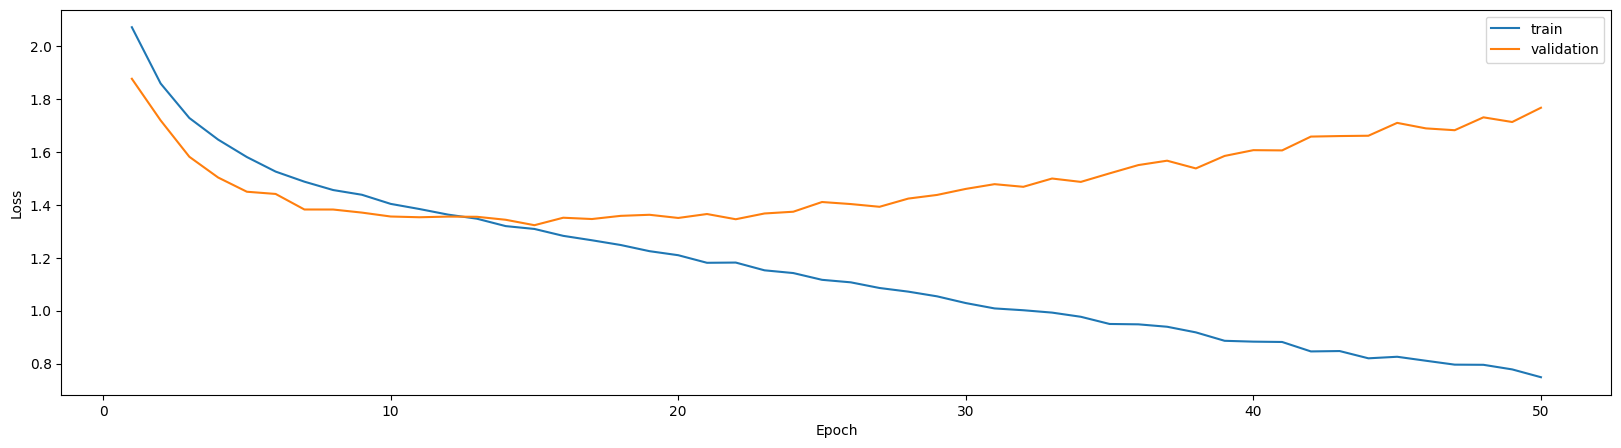

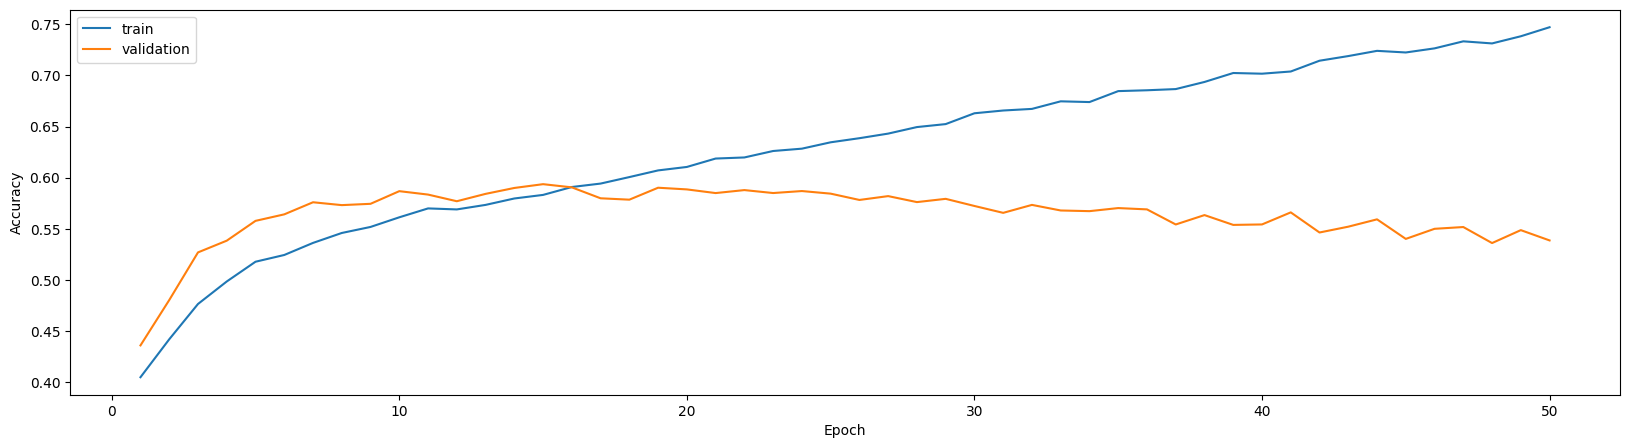

	Evaluation: 100%|██████████| 193/193 [00:02<00:00, 81.84it/s]



Test Loss: 1.323 | Test Acc: 59.07% | Test F1: 0.560 | Test ROC AUC: 0.868

Classification report:
              precision    recall  f1-score   support

           0       0.59      0.81      0.68      4983
           1       0.65      0.60      0.62       672
           2       0.51      0.41      0.46      1070
           3       0.59      0.34      0.43       667
           4       0.47      0.12      0.19       837
           5       0.60      0.30      0.40       144
           6       0.43      0.27      0.33       351
           7       0.43      0.61      0.50       551
           8       0.72      0.32      0.44       200
           9       0.69      0.78      0.73       614
          10       0.37      0.09      0.14       570
          11       0.64      0.54      0.59       208
          12       0.81      0.73      0.77       844
          13       0.62      0.42      0.50       629

    accuracy                           0.59     12340
   macro avg       0.58      0.45 

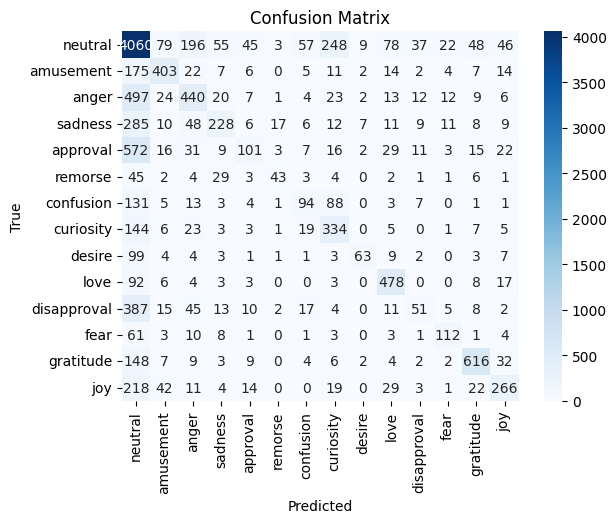

In [ ]:
# plot training curves

import matplotlib.pyplot as plt

# create epoch list
epochs = list(range(1, N_EPOCHS+1))

# plot training and validation loss
plt.figure(figsize=(20, 5))
plt.plot(epochs, train_loss_list, label='train')
plt.plot(epochs, valid_loss_list, label='validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plot training and validation accuracy
plt.figure(figsize=(20, 5))
plt.plot(epochs, train_acc_list, label='train')
plt.plot(epochs, valid_acc_list, label='validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#######
# print out required metrics

import seaborn as sns
model.load_state_dict(torch.load('RNN4-model.pt'))

test_loss, test_acc, test_f1, test_roc_auc, test_report, test_cm = evaluate(model, test_dataloader, criterion)
print(f'\nTest Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}% | Test F1: {test_f1:.3f} | Test ROC AUC: {test_roc_auc:.3f}\n')
# print(f'Confusion matrix:\n{test_cm}')
print(f'Classification report:\n{test_report}')

# plot confusion matrix
# labels for the plot - same as labels used for label_vocab
labels = OrderedDict([("neutral", 1), ("amusement", 1), ("anger", 1), ("sadness", 1), ("approval", 1), ("remorse", 1), ("confusion", 1), ("curiosity", 1), ("desire", 1), ("love", 1), ("disapproval", 1), ("fear", 1), ("gratitude", 1), ("joy", 1)])
# create the heatmap
sns.heatmap(test_cm, cmap="Blues", annot=True, fmt='g', xticklabels=labels, yticklabels=labels)
# add labels and title
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()



---



---



---

## Results

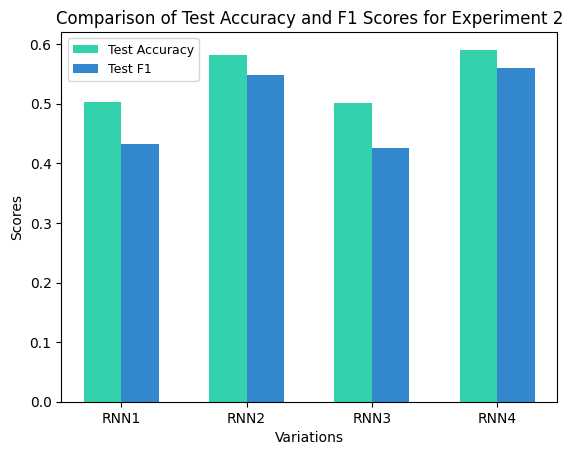

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

variations = ['RNN1', 'RNN2', 'RNN3', 'RNN4']
test_accuracy_list = [0.5022, 0.5812, 0.5020, 0.5907]
test_f1_list = [0.433, 0.548, 0.425, 0.56]

fig, ax = plt.subplots()

# Create x-axis values so it can be used for any number of variations
x_values = np.arange(len(variations))

# Plot the bar charts
rects1 = ax.bar(x_values, test_accuracy_list, 0.3, alpha=0.8, color='#00c698', label='Test Accuracy')
rects2 = ax.bar(x_values + 0.3, test_f1_list, 0.3, alpha=0.8, color='#0069c0', label='Test F1')

# Add labels and titles
ax.set_xlabel('Variations')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Test Accuracy and F1 Scores for Experiment 2')
ax.set_xticks(x_values + 0.3 / 2)
ax.set_xticklabels(variations)
ax.legend(loc='upper left', fontsize=9)

# Show the plot
plt.show()




---
---
---



# 5.&nbsp;GoEmotions Experiment 3: Testing different optimizers


In this notebook, the best performing RNN4 will be used for each experiment.
The optimizer and related hyperparameters like learning rate will be changed and performance is expected to improve.

### Set up steps for notebook
---
Required packages and dependencies are installed with compatible versions and the notebook is set up to use GPU when available.

---

In [ ]:
# Install datasets
!pip install datasets

# Install dependencies
%pip install torch==1.11.0+cu113 torchdata==0.3.0 torchtext==0.12.0 -f https://download.pytorch.org/whl/cu113/torch_stable.html
%pip install spacy tqdm
!python -m spacy download en_core_web_sm

# Initialise torch and use GPU
import torch
import torchtext

SEED = 1234
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

print("PyTorch Version: ", torch.__version__)
print("torchtext Version: ", torchtext.__version__)
print(f"Using {'GPU' if str(DEVICE) == 'cuda' else 'CPU'}.")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 kB 29.8 MB/s eta 0:00:00


Use this cell to mount your Google Drive on the notebook. Some files in the zip folder are used to reduce repeating of some setup steps.

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

### Defining necessary functions and classes that will be used in each experiment

---
Functions for tokenizing the data and building vocabularies

---

In [ ]:
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator, vocab
from collections import OrderedDict
import torchtext.transforms as T

# defining a tokenizer as a PyTorch module
class SpacyTokenizer(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.tokenizer = get_tokenizer("spacy", language="en_core_web_sm")
    
    def forward(self, input):
        if isinstance(input, list):
            tokens = []
            for text in input:
                tokens.append(self.tokenizer(text))
            return tokens
        elif isinstance(input, str):
            return self.tokenizer(input)
        raise ValueError(f"Type {type(input)} is not supported.")

# defining a function to transform each text into its length
class ToLengths(torch.nn.Module):
    def forward(self, input):
        if isinstance(input[1], list):    # changed to match the order in dataset
            lengths = []
            for text in input:
                lengths.append(len(text))
            return lengths
        elif isinstance(input, list):
            return len(input)
        raise ValueError(f"Type {type(input)} is not supported.")



---


Functions required for loading data in batches


---






In [ ]:
from torch.utils.data import DataLoader

BATCH_SIZE = 64

def collate_batch(batch):
    texts, labels = zip(*batch)

    lengths = lengths_transform(list(texts))
    texts = text_transform(list(texts))
    labels = torch.tensor(list(labels), dtype=torch.int64)

    return labels.to(DEVICE), texts.to(DEVICE), lengths.cpu()


def _get_dataloader(data):
    return DataLoader(data, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_batch)
    

---
Functions required for training and evaluation

---

In [ ]:
from tqdm import tqdm
import numpy as np
from sklearn.metrics import f1_score, roc_auc_score, classification_report, confusion_matrix
import time

# defining a function for training the model
# Taken from lab but changed to be used for multi-class classification training instead of binary classification

def train(model, iterator, optimizer, criterion):    
    epoch_loss = 0
    epoch_acc = 0
    
    model.train()
    
    for batch in tqdm(iterator, desc="\tTraining"):
        optimizer.zero_grad()
                
        labels, texts, lengths = batch  # Note that this has to match the order in collate_batch
        predictions = model(texts, lengths)
        loss = criterion(predictions, labels)
        acc = categorical_accuracy(predictions, labels)
        
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

# Defining a function to evaluate using the trained model (on either validation or test sets)
# Taken from lab 5 but changed to be used for multi-class classification evaluation instead of binary classification
# Further modified to return metrics like F1 score, confusion matrix, and classification report to check scores for each class
# ChatGPT was used for debugging aur_roc code

def evaluate(model, iterator, criterion):
    epoch_loss = 0
    epoch_acc = 0
    predicted_probs = []
    true_labels = []
    
    model.eval()
    
    with torch.no_grad():
        for batch in tqdm(iterator, desc="\tEvaluation"):
            labels, texts, lengths = batch  # Note that this has to match the order in collate_batch
            predictions = model(texts, lengths)
            probs = torch.softmax(predictions, dim=1)
            loss = criterion(predictions, labels)
            acc = categorical_accuracy(predictions, labels)

            epoch_loss += loss.item()
            epoch_acc += acc.item()
            predicted_probs.extend(probs.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())
        
    predicted_probs = np.array(predicted_probs)
    true_labels = np.array(true_labels)
    predicted_labels = np.argmax(predicted_probs, axis=1)

    epoch_f1 = f1_score(true_labels, predicted_labels, average='weighted')
    epoch_auc_roc = roc_auc_score(true_labels, predicted_probs, multi_class='ovo', average='weighted')
    epoch_classification_report = classification_report(true_labels, predicted_labels)
    epoch_confusion_matrix = confusion_matrix(true_labels, predicted_labels)

    return epoch_loss / len(iterator), epoch_acc / len(iterator), epoch_f1, epoch_auc_roc, epoch_classification_report, epoch_confusion_matrix


# defining a function to check duration taken for training and testing
# taken from lab 5

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs


#defining a function to check number of parameters in the model

def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)


# defining a categorical accuracy function instead of binary accuracy
# ChatGPT was used to find this piece of code and further debugging was required to make it work as expected

def categorical_accuracy(preds, y):
    """
    Returns accuracy per batch, i.e. if you get 8/10 right, this returns 0.8, NOT 8
    """
    top_pred = preds.argmax(1, keepdim = True)
    correct = top_pred.eq(y.view_as(top_pred)).sum()
    acc = correct.float() / y.shape[0]
    return acc


---

### Other common steps for each variation of the experiment


*   Loading and splitting preprocessed data
*   Building vocabularies
*   Pretrained embeddings
*   Preparing required dataloaders

In [ ]:
from datasets import load_dataset
import pandas as pd

# load the GoEmotions dataset
goemotions_dataset = load_dataset('go_emotions')

# get the train, validation, and test splits as Pandas dataframes
train_df = goemotions_dataset['train'].to_pandas()
val_df = goemotions_dataset['validation'].to_pandas()
test_df = goemotions_dataset['test'].to_pandas()

# concatenate the splits into a single dataframe
df = pd.concat([train_df, val_df, test_df], ignore_index=True)

# duplicate the records with multiple labels
df = df.explode('labels')

# reset the index of the dataframe
df = df.reset_index(drop=True)

# print the first five rows of the resulting dataframe
print(df.head())

from torchtext.data.functional import to_map_style_dataset

### MERGING EMOTION LABELS FROM GROUP DECISIONS ###

for i, row in df.iterrows():
  # Converting Annoyance [3] into Anger [2]
  if row['labels']==3:
    row['labels']=2
  # Disappointment [9] and Grief [16] into Sadness [25]
  if row['labels']==9 or row['labels']==16:
    row['labels']=25
  # Converting Nervousness [19] into Fear [14]
  if row['labels']==19:
    row['labels']=14
  # Converting Excitement [13] into Joy [17]
  if row['labels']==13:
    row['labels']=17

#keeps just one of the records where there are labelled with both merged classes
df = df.drop_duplicates(keep = 'first')
drop_labels = (3,11,12,9,16,19,22,26,21,13,0,23,20,5)
#drops labels we are not using
df_cut = df[~df.labels.isin(drop_labels)] 
#deletes duplicates
df_cut = df_cut.drop_duplicates(subset = ['text'], keep = False)
df_cut = df_cut.reset_index(drop = True)

### REORDERING SO THAT LABELS ARE 0-13 ###
for i, row in df_cut.iterrows():
    # Converting Neutral [27] to Neutral [0]
    if row['labels']==27:
        row['labels']=0
    # Converting Sadness [25] to Sadness [3]
    if row['labels']==25:
        row['labels']=3
    # Converting Remorse [24] to Remorse [5]
    if row['labels']==24:
        row['labels']=5
    # Converting Love [18] to Love [9]
    if row['labels']==18:
        row['labels']=9
    # Converting Fear [14] to Fear [11]
    if row['labels']==14:
        row['labels']=11
    # Converting Gratitude [15] to Gratitude [12]
    if row['labels']==15:
        row['labels']=12
    # Converting Joy [17] to Joy [13]
    if row['labels']==17:
        row['labels']=13

df = df_cut
# reset the index of the dataframe
df = df.reset_index(drop=True)
df.head()

# convert dataframe to list
text = df[['text','labels']].values.tolist()

# convert the dataset into a "map-style dataset"
data = to_map_style_dataset(text)

In [ ]:
from torchtext.data.functional import to_map_style_dataset
from torch.utils.data import random_split

from torchtext.vocab import vocab
from torchtext import vocab as vc
from collections import OrderedDict

import torchtext.transforms as T

# load preprocessed data from storage
# text = torch.load("/content/drive/MyDrive/Colab Notebooks/NLP CW/preprocessed_data_1.pt")
# data = to_map_style_dataset(text)
# data[0]

split_ratio = 0.7  # 70/30 split

# split dataset into train and test sets
train_samples = int(split_ratio * len(data))
test_samples = len(data) - train_samples
train_data, test_data = random_split(data, [train_samples, test_samples])

# split train subset into train and validation sets
train_samples = int(split_ratio * len(train_data))
valid_samples = len(train_data) - train_samples
train_data, valid_data = random_split(train_data, [train_samples, valid_samples])

print(f'Number of training examples: {len(train_data)}')
print(f'Number of validation examples: {len(valid_data)}')
print(f'Number of testing examples: {len(test_data)}')

# loading pretrained vectors into text_vocab
MAX_VOCAB_SIZE = 25_000

glove_vectors = vc.GloVe(
    name="twitter.27B",
    dim="100",
    max_vectors=MAX_VOCAB_SIZE
)

text_vocab = vocab(glove_vectors.stoi, min_freq=0, specials=("<unk>", "<pad>"), special_first=True)
text_vocab.set_default_index(text_vocab["<unk>"])

pretrained_embeddings = glove_vectors.vectors
pretrained_embeddings = torch.cat([
    torch.empty(1, glove_vectors.dim).normal_(),  # unk token vector
    torch.zeros(1, glove_vectors.dim),  # padding token vector
    pretrained_embeddings
])

print("Pretrained vectors shape: ", pretrained_embeddings.shape)

# buidling label_vocab
label_vocab = vocab(OrderedDict([("neutral", 1), ("amusement", 1), ("anger", 1), ("sadness", 1), ("approval", 1), ("remorse", 1), ("confusion", 1), ("curiosity", 1), ("desire", 1), ("love", 1), ("disapproval", 1), ("fear", 1), ("gratitude", 1), ("joy", 1)]))

# transform to required tensor format
text_transform = T.Sequential(
    SpacyTokenizer(),  # Tokenize
    T.VocabTransform(text_vocab),  # Conver to vocab IDs
    T.ToTensor(padding_value=text_vocab["<pad>"]),  # Convert to tensor and pad
)

label_transform = T.Sequential(
    T.ToTensor(),  # Convert to tensor
)

lengths_transform = T.Sequential(
    SpacyTokenizer(),
    ToLengths(),
    T.ToTensor(),
)

# dataloaders
train_dataloader = _get_dataloader(train_data)
valid_dataloader = _get_dataloader(valid_data)
test_dataloader = _get_dataloader(test_data)

Number of training examples: 20153
Number of validation examples: 8638
Number of testing examples: 12340


.vector_cache/glove.twitter.27B.zip: 1.52GB [04:45, 5.32MB/s]                            
100%|█████████▉| 24999/25000 [00:01<00:00, 24423.10it/s]


Pretrained vectors shape:  torch.Size([25002, 100])


---
### Building the RNN
---

In [ ]:
import torch.nn as nn

# Define a bidirectional RNN
class RNN4(nn.Module):
    def __init__(self, pretrained_embeddings, hidden_dim, output_dim, n_layers, bidirectional, dropout, pad_idx):
        super().__init__()
        
        self.num_directions = 2 if bidirectional else 1
        
        self.embedding = nn.Embedding.from_pretrained(pretrained_embeddings, freeze=True, padding_idx=pad_idx)        
        self.rnn = nn.LSTM(pretrained_embeddings.shape[1], 
                           hidden_dim, 
                           num_layers=n_layers, 
                           bidirectional=bidirectional, 
                           dropout=dropout)        
        self.fc = nn.Linear(hidden_dim * self.num_directions, output_dim)

        self.dropout = nn.Dropout(dropout)
        
    def forward(self, text, lengths):
        embedded = self.dropout(self.embedding(text))                   # VV note that lengths need to be on the CPU
        packed_embedded = nn.utils.rnn.pack_padded_sequence(embedded, lengths.cpu(), batch_first=True, enforce_sorted=False)
        
        packed_output, (hidden, cell) = self.rnn(packed_embedded)

        if self.num_directions == 2:  # if bidirectional
            # Concat the final forward (hidden[-2,:,:]) and backward (hidden[-1,:,:]) hidden layers and apply dropout
            hidden = self.dropout(torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim = 1))
        else:
            hidden = self.dropout(hidden[-1,:,:])

        return self.fc(hidden)

# Setting model building arguments
HIDDEN_DIM = 256
OUTPUT_DIM = len(label_vocab)
N_LAYERS = 4
BIDIRECTIONAL = True
DROPOUT = 0.5
PAD_IDX = text_vocab["<pad>"]

model = RNN4(pretrained_embeddings, HIDDEN_DIM,  OUTPUT_DIM, N_LAYERS, BIDIRECTIONAL, DROPOUT, PAD_IDX) # create a RNN model using the arguments
print("Model Summary:")
print(model)
print(f'The model has {count_parameters(model):,} trainable parameters')


Model Summary:
RNN4(
  (embedding): Embedding(25002, 100, padding_idx=1)
  (rnn): LSTM(100, 256, num_layers=4, dropout=0.5, bidirectional=True)
  (fc): Linear(in_features=512, out_features=14, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)
The model has 5,471,246 trainable parameters




---



---



---

## 3.A. Adam

In [ ]:
from torch import optim

modeladam = RNN4(pretrained_embeddings, HIDDEN_DIM,  OUTPUT_DIM, N_LAYERS, BIDIRECTIONAL, DROPOUT, PAD_IDX) # recreate a RNN model using the arguments
modeladam = modeladam.to(DEVICE)

# Set other parameters
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(modeladam.parameters(), lr=1e-3, betas=(0.9, 0.999), eps=1e-8, weight_decay=1e-5)

# Use GPU
modeladam = modeladam.to(DEVICE)
criterion = criterion.to(DEVICE)

######
N_EPOCHS = 25
train_loss_list = []
train_acc_list = []
valid_loss_list = []
valid_acc_list = []

best_valid_loss = float('inf')
print(f"Using {'GPU' if str(DEVICE) == 'cuda' else 'CPU'} for training.")

for epoch in range(N_EPOCHS):
    print(f'Epoch: {epoch+1:02}')
    start_time = time.time()
    
    train_loss, train_acc = train(modeladam, train_dataloader, optimizer, criterion)
    train_loss_list.append(train_loss)
    train_acc_list.append(train_acc)
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    
    valid_loss, valid_acc, valid_f1, valid_auc_roc, valid_report, valid_cm  = evaluate(modeladam, valid_dataloader, criterion)
    valid_loss_list.append(valid_loss)
    valid_acc_list.append(valid_acc)
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')
    
    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(modeladam.state_dict(), 'adam-model.pt')


Using GPU for training.
Epoch: 01


	Training: 100%|██████████| 315/315 [00:12<00:00, 24.56it/s]


	Train Loss: 2.093 | Train Acc: 40.12%


	Evaluation: 100%|██████████| 135/135 [00:02<00:00, 64.51it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.918 |  Val. Acc: 42.91%
Epoch: 02


	Training: 100%|██████████| 315/315 [00:10<00:00, 30.78it/s]


	Train Loss: 1.865 | Train Acc: 44.19%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 89.40it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.692 |  Val. Acc: 49.21%
Epoch: 03


	Training: 100%|██████████| 315/315 [00:09<00:00, 33.73it/s]


	Train Loss: 1.715 | Train Acc: 48.19%


	Evaluation: 100%|██████████| 135/135 [00:02<00:00, 58.01it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.582 |  Val. Acc: 52.85%
Epoch: 04


	Training: 100%|██████████| 315/315 [00:08<00:00, 37.17it/s]


	Train Loss: 1.638 | Train Acc: 50.04%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 89.00it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.504 |  Val. Acc: 53.99%
Epoch: 05


	Training: 100%|██████████| 315/315 [00:10<00:00, 30.94it/s]


	Train Loss: 1.585 | Train Acc: 51.87%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 91.11it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.441 |  Val. Acc: 56.06%
Epoch: 06


	Training: 100%|██████████| 315/315 [00:10<00:00, 31.29it/s]


	Train Loss: 1.534 | Train Acc: 52.89%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 90.04it/s]


	 Val. Loss: 1.412 |  Val. Acc: 56.60%
Epoch: 07


	Training: 100%|██████████| 315/315 [00:08<00:00, 36.63it/s]


	Train Loss: 1.505 | Train Acc: 53.40%


	Evaluation: 100%|██████████| 135/135 [00:02<00:00, 60.31it/s]


	 Val. Loss: 1.398 |  Val. Acc: 56.59%
Epoch: 08


	Training: 100%|██████████| 315/315 [00:09<00:00, 34.90it/s]


	Train Loss: 1.469 | Train Acc: 54.04%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 89.94it/s]


	 Val. Loss: 1.383 |  Val. Acc: 57.77%
Epoch: 09


	Training: 100%|██████████| 315/315 [00:10<00:00, 30.91it/s]


	Train Loss: 1.447 | Train Acc: 54.71%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 90.74it/s]


	 Val. Loss: 1.378 |  Val. Acc: 57.20%
Epoch: 10


	Training: 100%|██████████| 315/315 [00:09<00:00, 32.10it/s]


	Train Loss: 1.426 | Train Acc: 55.65%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 69.32it/s]


	 Val. Loss: 1.363 |  Val. Acc: 58.44%
Epoch: 11


	Training: 100%|██████████| 315/315 [00:08<00:00, 38.08it/s]


	Train Loss: 1.406 | Train Acc: 55.89%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 71.53it/s]


	 Val. Loss: 1.349 |  Val. Acc: 58.75%
Epoch: 12


	Training: 100%|██████████| 315/315 [00:09<00:00, 32.13it/s]


	Train Loss: 1.380 | Train Acc: 56.52%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 91.95it/s]


	 Val. Loss: 1.336 |  Val. Acc: 58.59%
Epoch: 13


	Training: 100%|██████████| 315/315 [00:10<00:00, 31.18it/s]


	Train Loss: 1.360 | Train Acc: 57.26%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 91.86it/s]


	 Val. Loss: 1.338 |  Val. Acc: 58.29%
Epoch: 14


	Training: 100%|██████████| 315/315 [00:09<00:00, 34.47it/s]


	Train Loss: 1.350 | Train Acc: 57.10%


	Evaluation: 100%|██████████| 135/135 [00:02<00:00, 58.66it/s]


	 Val. Loss: 1.336 |  Val. Acc: 58.37%
Epoch: 15


	Training: 100%|██████████| 315/315 [00:08<00:00, 37.35it/s]


	Train Loss: 1.326 | Train Acc: 57.80%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 91.65it/s]


	 Val. Loss: 1.333 |  Val. Acc: 58.75%
Epoch: 16


	Training: 100%|██████████| 315/315 [00:10<00:00, 31.22it/s]


	Train Loss: 1.310 | Train Acc: 58.36%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 91.61it/s]


	 Val. Loss: 1.336 |  Val. Acc: 58.49%
Epoch: 17


	Training: 100%|██████████| 315/315 [00:10<00:00, 31.26it/s]


	Train Loss: 1.293 | Train Acc: 58.56%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 91.32it/s]


	 Val. Loss: 1.331 |  Val. Acc: 58.83%
Epoch: 18


	Training: 100%|██████████| 315/315 [00:08<00:00, 37.70it/s]


	Train Loss: 1.278 | Train Acc: 59.03%


	Evaluation: 100%|██████████| 135/135 [00:02<00:00, 61.26it/s]


	 Val. Loss: 1.348 |  Val. Acc: 58.90%
Epoch: 19


	Training: 100%|██████████| 315/315 [00:09<00:00, 34.06it/s]


	Train Loss: 1.254 | Train Acc: 59.81%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 92.14it/s]


	 Val. Loss: 1.324 |  Val. Acc: 59.27%
Epoch: 20


	Training: 100%|██████████| 315/315 [00:10<00:00, 31.21it/s]


	Train Loss: 1.239 | Train Acc: 60.30%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 91.95it/s]


	 Val. Loss: 1.326 |  Val. Acc: 59.22%
Epoch: 21


	Training: 100%|██████████| 315/315 [00:09<00:00, 34.07it/s]


	Train Loss: 1.219 | Train Acc: 60.60%


	Evaluation: 100%|██████████| 135/135 [00:02<00:00, 57.46it/s]


	 Val. Loss: 1.357 |  Val. Acc: 58.74%
Epoch: 22


	Training: 100%|██████████| 315/315 [00:08<00:00, 37.71it/s]


	Train Loss: 1.206 | Train Acc: 61.06%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 90.10it/s]


	 Val. Loss: 1.341 |  Val. Acc: 59.31%
Epoch: 23


	Training: 100%|██████████| 315/315 [00:10<00:00, 31.43it/s]


	Train Loss: 1.188 | Train Acc: 61.32%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 90.34it/s]


	 Val. Loss: 1.354 |  Val. Acc: 58.90%
Epoch: 24


	Training: 100%|██████████| 315/315 [00:10<00:00, 31.32it/s]


	Train Loss: 1.170 | Train Acc: 61.86%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 91.03it/s]


	 Val. Loss: 1.358 |  Val. Acc: 58.98%
Epoch: 25


	Training: 100%|██████████| 315/315 [00:08<00:00, 36.43it/s]


	Train Loss: 1.158 | Train Acc: 62.33%


	Evaluation: 100%|██████████| 135/135 [00:02<00:00, 61.06it/s]


	 Val. Loss: 1.397 |  Val. Acc: 58.21%
Epoch: 26


	Training: 100%|██████████| 315/315 [00:08<00:00, 35.00it/s]


	Train Loss: 1.135 | Train Acc: 63.07%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 91.17it/s]


	 Val. Loss: 1.371 |  Val. Acc: 58.31%
Epoch: 27


	Training: 100%|██████████| 315/315 [00:09<00:00, 31.52it/s]


	Train Loss: 1.112 | Train Acc: 63.70%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 90.63it/s]


	 Val. Loss: 1.396 |  Val. Acc: 58.44%
Epoch: 28


	Training: 100%|██████████| 315/315 [00:09<00:00, 32.85it/s]


	Train Loss: 1.097 | Train Acc: 63.84%


	Evaluation: 100%|██████████| 135/135 [00:02<00:00, 65.20it/s]


	 Val. Loss: 1.412 |  Val. Acc: 57.79%
Epoch: 29


	Training: 100%|██████████| 315/315 [00:08<00:00, 37.97it/s]


	Train Loss: 1.086 | Train Acc: 64.45%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 76.11it/s]


	 Val. Loss: 1.426 |  Val. Acc: 57.21%
Epoch: 30


	Training: 100%|██████████| 315/315 [00:09<00:00, 32.42it/s]


	Train Loss: 1.061 | Train Acc: 65.00%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 92.05it/s]


	 Val. Loss: 1.418 |  Val. Acc: 57.63%
Epoch: 31


	Training: 100%|██████████| 315/315 [00:10<00:00, 31.27it/s]


	Train Loss: 1.038 | Train Acc: 65.87%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 92.33it/s]


	 Val. Loss: 1.443 |  Val. Acc: 57.84%
Epoch: 32


	Training: 100%|██████████| 315/315 [00:08<00:00, 36.31it/s]


	Train Loss: 1.033 | Train Acc: 65.83%


	Evaluation: 100%|██████████| 135/135 [00:02<00:00, 62.42it/s]


	 Val. Loss: 1.452 |  Val. Acc: 56.64%
Epoch: 33


	Training: 100%|██████████| 315/315 [00:08<00:00, 35.93it/s]


	Train Loss: 1.010 | Train Acc: 66.42%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 91.64it/s]


	 Val. Loss: 1.438 |  Val. Acc: 57.10%
Epoch: 34


	Training: 100%|██████████| 315/315 [00:10<00:00, 31.36it/s]


	Train Loss: 0.986 | Train Acc: 67.28%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 91.45it/s]


	 Val. Loss: 1.468 |  Val. Acc: 56.80%
Epoch: 35


	Training: 100%|██████████| 315/315 [00:09<00:00, 32.71it/s]


	Train Loss: 0.970 | Train Acc: 67.73%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 71.97it/s]


	 Val. Loss: 1.466 |  Val. Acc: 56.47%
Epoch: 36


	Training: 100%|██████████| 315/315 [00:08<00:00, 37.72it/s]


	Train Loss: 0.957 | Train Acc: 68.20%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 71.88it/s]


	 Val. Loss: 1.523 |  Val. Acc: 55.81%
Epoch: 37


	Training: 100%|██████████| 315/315 [00:09<00:00, 32.05it/s]


	Train Loss: 0.932 | Train Acc: 68.53%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 88.15it/s]


	 Val. Loss: 1.527 |  Val. Acc: 56.42%
Epoch: 38


	Training: 100%|██████████| 315/315 [00:10<00:00, 31.22it/s]


	Train Loss: 0.911 | Train Acc: 69.67%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 89.93it/s]


	 Val. Loss: 1.534 |  Val. Acc: 56.92%
Epoch: 39


	Training: 100%|██████████| 315/315 [00:08<00:00, 35.18it/s]


	Train Loss: 0.901 | Train Acc: 69.89%


	Evaluation: 100%|██████████| 135/135 [00:02<00:00, 59.50it/s]


	 Val. Loss: 1.552 |  Val. Acc: 56.67%
Epoch: 40


	Training: 100%|██████████| 315/315 [00:08<00:00, 37.00it/s]


	Train Loss: 0.880 | Train Acc: 70.36%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 91.96it/s]


	 Val. Loss: 1.571 |  Val. Acc: 55.86%
Epoch: 41


	Training: 100%|██████████| 315/315 [00:10<00:00, 31.34it/s]


	Train Loss: 0.864 | Train Acc: 70.65%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 88.75it/s]


	 Val. Loss: 1.601 |  Val. Acc: 55.96%
Epoch: 42


	Training: 100%|██████████| 315/315 [00:09<00:00, 32.02it/s]


	Train Loss: 0.850 | Train Acc: 71.29%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 81.77it/s]


	 Val. Loss: 1.617 |  Val. Acc: 55.23%
Epoch: 43


	Training: 100%|██████████| 315/315 [00:08<00:00, 37.88it/s]


	Train Loss: 0.832 | Train Acc: 72.03%


	Evaluation: 100%|██████████| 135/135 [00:02<00:00, 66.08it/s]


	 Val. Loss: 1.642 |  Val. Acc: 55.15%
Epoch: 44


	Training: 100%|██████████| 315/315 [00:09<00:00, 33.32it/s]


	Train Loss: 0.826 | Train Acc: 72.25%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 91.62it/s]


	 Val. Loss: 1.634 |  Val. Acc: 55.55%
Epoch: 45


	Training: 100%|██████████| 315/315 [00:10<00:00, 31.40it/s]


	Train Loss: 0.798 | Train Acc: 72.85%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 90.48it/s]


	 Val. Loss: 1.652 |  Val. Acc: 54.45%
Epoch: 46


	Training: 100%|██████████| 315/315 [00:08<00:00, 35.07it/s]


	Train Loss: 0.793 | Train Acc: 73.32%


	Evaluation: 100%|██████████| 135/135 [00:02<00:00, 61.05it/s]


	 Val. Loss: 1.680 |  Val. Acc: 54.69%
Epoch: 47


	Training: 100%|██████████| 315/315 [00:08<00:00, 37.21it/s]


	Train Loss: 0.768 | Train Acc: 73.94%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 91.10it/s]


	 Val. Loss: 1.703 |  Val. Acc: 54.34%
Epoch: 48


	Training: 100%|██████████| 315/315 [00:10<00:00, 31.41it/s]


	Train Loss: 0.761 | Train Acc: 74.58%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 91.32it/s]


	 Val. Loss: 1.704 |  Val. Acc: 54.63%
Epoch: 49


	Training: 100%|██████████| 315/315 [00:09<00:00, 32.01it/s]


	Train Loss: 0.739 | Train Acc: 74.85%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 84.74it/s]


	 Val. Loss: 1.786 |  Val. Acc: 54.67%
Epoch: 50


	Training: 100%|██████████| 315/315 [00:08<00:00, 37.99it/s]


	Train Loss: 0.731 | Train Acc: 75.32%


	Evaluation: 100%|██████████| 135/135 [00:02<00:00, 64.31it/s]


	 Val. Loss: 1.723 |  Val. Acc: 55.35%


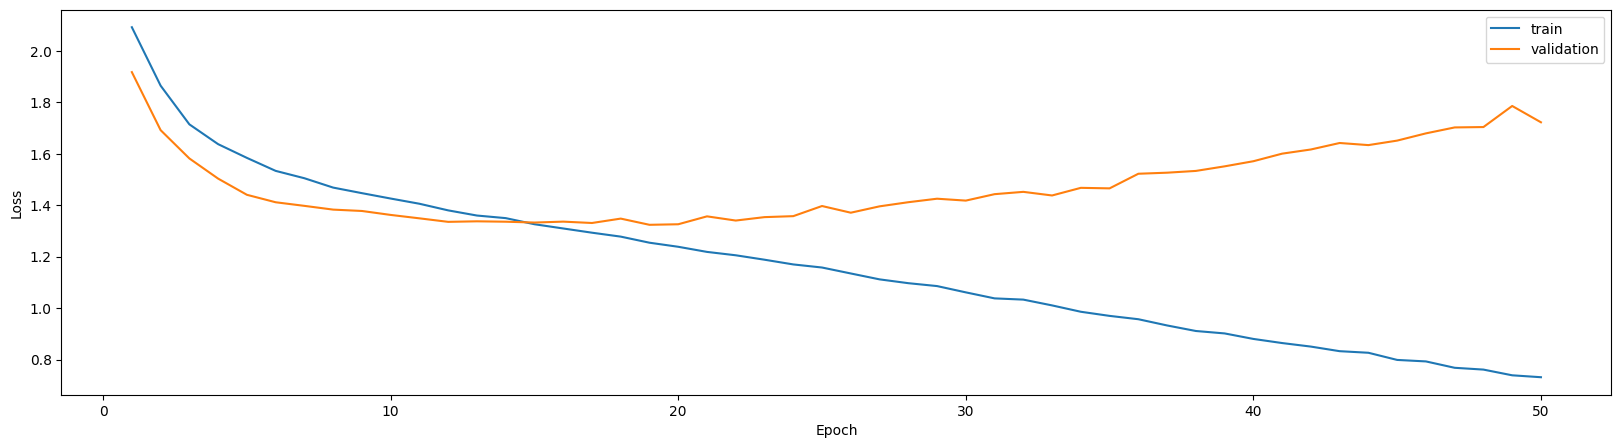

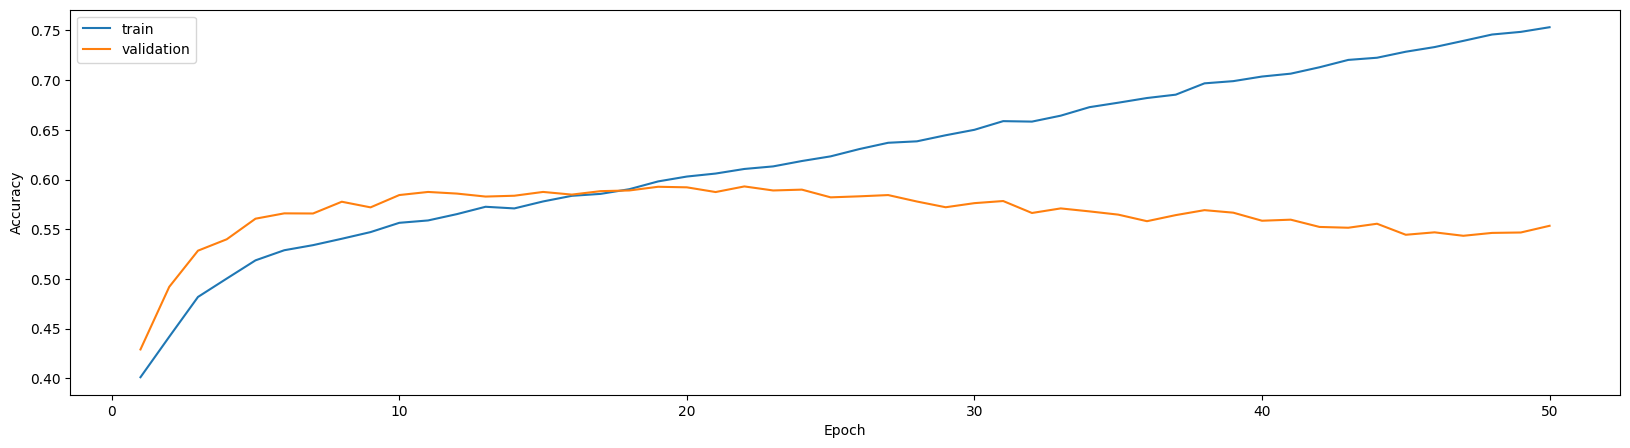

	Evaluation: 100%|██████████| 193/193 [00:04<00:00, 45.64it/s]



Test Loss: 1.328 | Test Acc: 58.73% | Test F1: 0.558 | Test ROC AUC: 0.868

Classification report:
              precision    recall  f1-score   support

           0       0.60      0.80      0.69      4983
           1       0.66      0.56      0.60       672
           2       0.54      0.39      0.45      1070
           3       0.61      0.31      0.41       667
           4       0.47      0.14      0.21       837
           5       0.52      0.38      0.44       144
           6       0.48      0.16      0.24       351
           7       0.42      0.57      0.48       551
           8       0.61      0.40      0.48       200
           9       0.68      0.81      0.74       614
          10       0.34      0.16      0.21       570
          11       0.61      0.55      0.58       208
          12       0.70      0.77      0.73       844
          13       0.55      0.44      0.49       629

    accuracy                           0.59     12340
   macro avg       0.56      0.46 

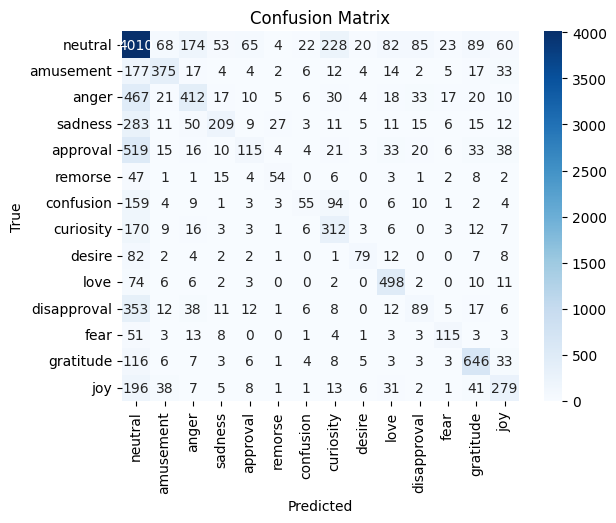

In [ ]:
# plot training curves

import matplotlib.pyplot as plt

# create epoch list
epochs = list(range(1, N_EPOCHS+1))

# plot training and validation loss
plt.figure(figsize=(20, 5))
plt.plot(epochs, train_loss_list, label='train')
plt.plot(epochs, valid_loss_list, label='validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plot training and validation accuracy
plt.figure(figsize=(20, 5))
plt.plot(epochs, train_acc_list, label='train')
plt.plot(epochs, valid_acc_list, label='validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#######
# print out required metrics

import seaborn as sns
model.load_state_dict(torch.load('adam-model.pt'))

test_loss, test_acc, test_f1, test_roc_auc, test_report, test_cm = evaluate(model, test_dataloader, criterion)
print(f'\nTest Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}% | Test F1: {test_f1:.3f} | Test ROC AUC: {test_roc_auc:.3f}\n')
# print(f'Confusion matrix:\n{test_cm}')
print(f'Classification report:\n{test_report}')

# plot confusion matrix
# labels for the plot - same as labels used for label_vocab
labels = OrderedDict([("neutral", 1), ("amusement", 1), ("anger", 1), ("sadness", 1), ("approval", 1), ("remorse", 1), ("confusion", 1), ("curiosity", 1), ("desire", 1), ("love", 1), ("disapproval", 1), ("fear", 1), ("gratitude", 1), ("joy", 1)])
# create the heatmap
sns.heatmap(test_cm, cmap="Blues", annot=True, fmt='g', xticklabels=labels, yticklabels=labels)
# add labels and title
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()



---



---



---

## 3.B. SGD

In [ ]:
from torch import optim

modelsgd = RNN4(pretrained_embeddings, HIDDEN_DIM,  OUTPUT_DIM, N_LAYERS, BIDIRECTIONAL, DROPOUT, PAD_IDX) # recreate a RNN model using the arguments
modelsgd = modelsgd.to(DEVICE)

# Set other parameters
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(modelsgd.parameters(), lr=1e-3) #, momentum=0.9, weight_decay=1e-5

# Use GPU
modelsgd = modelsgd.to(DEVICE)
criterion = criterion.to(DEVICE)

######
N_EPOCHS = 25
train_loss_list = []
train_acc_list = []
valid_loss_list = []
valid_acc_list = []

best_valid_loss = float('inf')
print(f"Using {'GPU' if str(DEVICE) == 'cuda' else 'CPU'} for training.")

for epoch in range(N_EPOCHS):
    print(f'Epoch: {epoch+1:02}')
    start_time = time.time()
    
    train_loss, train_acc = train(modelsgd, train_dataloader, optimizer, criterion)
    train_loss_list.append(train_loss)
    train_acc_list.append(train_acc)
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    
    valid_loss, valid_acc, valid_f1, valid_auc_roc, valid_report, valid_cm  = evaluate(modelsgd, valid_dataloader, criterion)
    valid_loss_list.append(valid_loss)
    valid_acc_list.append(valid_acc)
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')
    
    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(modelsgd.state_dict(), 'sgd-model.pt')


Using GPU for training.
Epoch: 01


	Training: 100%|██████████| 315/315 [00:11<00:00, 27.86it/s]


	Train Loss: 2.600 | Train Acc: 32.07%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 88.83it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 2.570 |  Val. Acc: 39.63%
Epoch: 02


	Training: 100%|██████████| 315/315 [00:09<00:00, 34.40it/s]


	Train Loss: 2.542 | Train Acc: 39.44%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 69.29it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 2.513 |  Val. Acc: 39.63%
Epoch: 03


	Training: 100%|██████████| 315/315 [00:07<00:00, 39.73it/s]


	Train Loss: 2.487 | Train Acc: 39.44%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 75.11it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 2.460 |  Val. Acc: 39.63%
Epoch: 04


	Training: 100%|██████████| 315/315 [00:09<00:00, 33.96it/s]


	Train Loss: 2.437 | Train Acc: 39.44%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 88.65it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 2.411 |  Val. Acc: 39.62%
Epoch: 05


	Training: 100%|██████████| 315/315 [00:09<00:00, 33.03it/s]


	Train Loss: 2.390 | Train Acc: 39.44%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 87.64it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 2.366 |  Val. Acc: 39.63%
Epoch: 06


	Training: 100%|██████████| 315/315 [00:08<00:00, 37.87it/s]


	Train Loss: 2.347 | Train Acc: 39.44%


	Evaluation: 100%|██████████| 135/135 [00:02<00:00, 59.91it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 2.326 |  Val. Acc: 39.63%
Epoch: 07


	Training: 100%|██████████| 315/315 [00:08<00:00, 35.74it/s]


	Train Loss: 2.310 | Train Acc: 39.44%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 87.80it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 2.291 |  Val. Acc: 39.62%
Epoch: 08


	Training: 100%|██████████| 315/315 [00:14<00:00, 22.31it/s]


	Train Loss: 2.278 | Train Acc: 39.44%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 86.32it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 2.262 |  Val. Acc: 39.63%
Epoch: 09


	Training: 100%|██████████| 315/315 [00:09<00:00, 32.82it/s]


	Train Loss: 2.252 | Train Acc: 39.44%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 87.79it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 2.239 |  Val. Acc: 39.63%
Epoch: 10


	Training: 100%|██████████| 315/315 [00:08<00:00, 37.22it/s]


	Train Loss: 2.231 | Train Acc: 39.43%


	Evaluation: 100%|██████████| 135/135 [00:02<00:00, 58.14it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 2.221 |  Val. Acc: 39.63%
Epoch: 11


	Training: 100%|██████████| 315/315 [00:08<00:00, 37.76it/s]


	Train Loss: 2.217 | Train Acc: 39.44%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 86.47it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 2.208 |  Val. Acc: 39.63%
Epoch: 12


	Training: 100%|██████████| 315/315 [00:11<00:00, 27.87it/s]


	Train Loss: 2.205 | Train Acc: 39.44%


	Evaluation: 100%|██████████| 135/135 [00:03<00:00, 40.44it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 2.198 |  Val. Acc: 39.63%
Epoch: 13


	Training: 100%|██████████| 315/315 [00:13<00:00, 23.01it/s]


	Train Loss: 2.198 | Train Acc: 39.44%


	Evaluation: 100%|██████████| 135/135 [00:02<00:00, 60.50it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 2.192 |  Val. Acc: 39.63%
Epoch: 14


	Training: 100%|██████████| 315/315 [00:14<00:00, 21.58it/s]


	Train Loss: 2.192 | Train Acc: 39.44%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 83.89it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 2.187 |  Val. Acc: 39.63%
Epoch: 15


	Training: 100%|██████████| 315/315 [00:12<00:00, 24.98it/s]


	Train Loss: 2.187 | Train Acc: 39.44%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 83.41it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 2.183 |  Val. Acc: 39.63%
Epoch: 16


	Training: 100%|██████████| 315/315 [00:09<00:00, 32.45it/s]


	Train Loss: 2.184 | Train Acc: 39.44%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 86.33it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 2.180 |  Val. Acc: 39.63%
Epoch: 17


	Training: 100%|██████████| 315/315 [00:08<00:00, 38.38it/s]


	Train Loss: 2.181 | Train Acc: 39.44%


	Evaluation: 100%|██████████| 135/135 [00:03<00:00, 36.81it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 2.178 |  Val. Acc: 39.63%
Epoch: 18


	Training: 100%|██████████| 315/315 [00:08<00:00, 35.13it/s]


	Train Loss: 2.179 | Train Acc: 39.44%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 79.91it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 2.176 |  Val. Acc: 39.63%
Epoch: 19


	Training: 100%|██████████| 315/315 [00:13<00:00, 23.13it/s]


	Train Loss: 2.178 | Train Acc: 39.44%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 67.64it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 2.174 |  Val. Acc: 39.63%
Epoch: 20


	Training: 100%|██████████| 315/315 [00:09<00:00, 32.45it/s]


	Train Loss: 2.176 | Train Acc: 39.44%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 83.81it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 2.173 |  Val. Acc: 39.63%
Epoch: 21


	Training: 100%|██████████| 315/315 [00:15<00:00, 20.77it/s]


	Train Loss: 2.174 | Train Acc: 39.44%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 85.23it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 2.171 |  Val. Acc: 39.63%
Epoch: 22


	Training: 100%|██████████| 315/315 [00:09<00:00, 33.10it/s]


	Train Loss: 2.173 | Train Acc: 39.44%


	Evaluation: 100%|██████████| 135/135 [00:02<00:00, 63.88it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 2.170 |  Val. Acc: 39.63%
Epoch: 23


	Training: 100%|██████████| 315/315 [00:08<00:00, 37.53it/s]


	Train Loss: 2.172 | Train Acc: 39.44%


	Evaluation: 100%|██████████| 135/135 [00:02<00:00, 65.13it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 2.169 |  Val. Acc: 39.63%
Epoch: 24


	Training: 100%|██████████| 315/315 [00:09<00:00, 33.69it/s]


	Train Loss: 2.170 | Train Acc: 39.44%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 83.01it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 2.168 |  Val. Acc: 39.63%
Epoch: 25


	Training: 100%|██████████| 315/315 [00:09<00:00, 31.57it/s]


	Train Loss: 2.169 | Train Acc: 39.44%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 82.34it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 2.167 |  Val. Acc: 39.63%


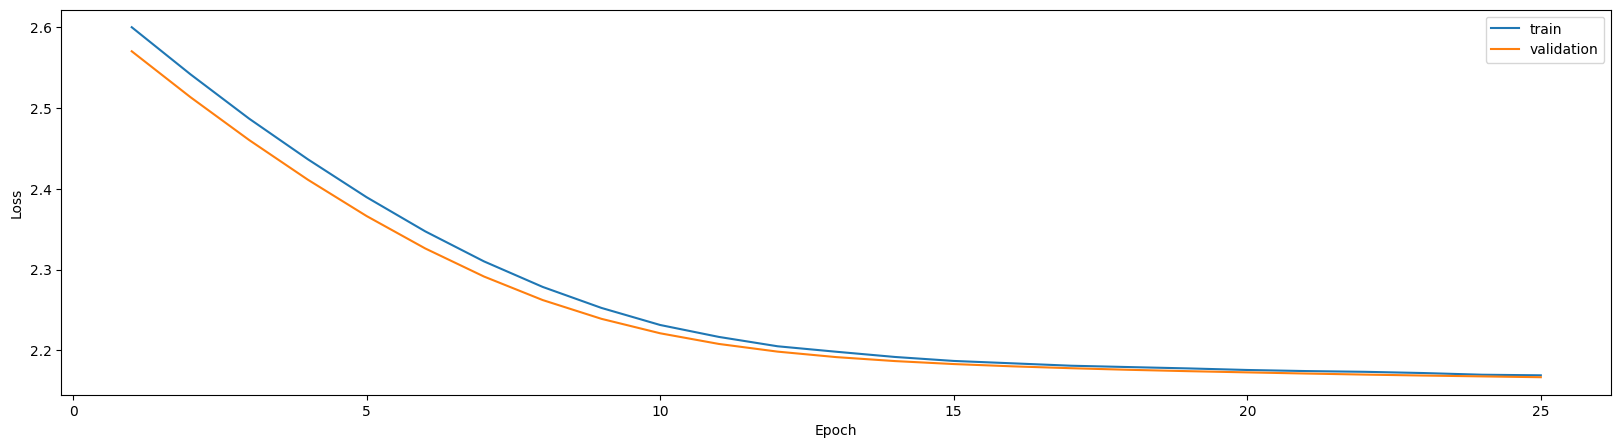

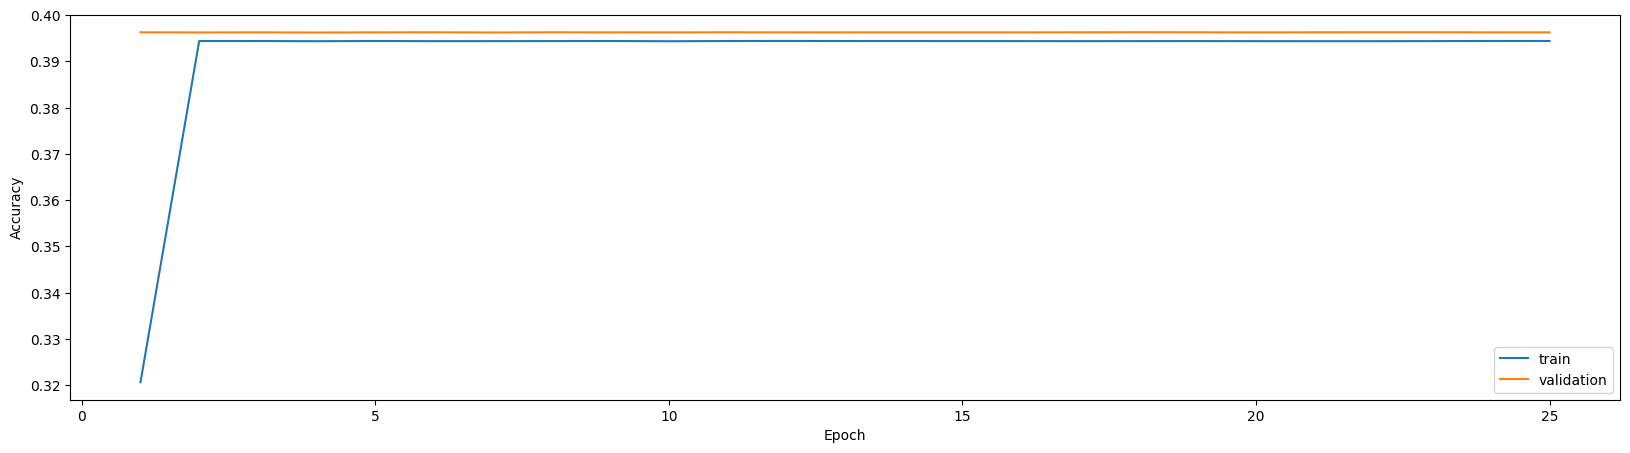

	Evaluation: 100%|██████████| 193/193 [00:03<00:00, 52.82it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Test Loss: 2.152 | Test Acc: 40.36% | Test F1: 0.232 | Test ROC AUC: 0.490

Classification report:
              precision    recall  f1-score   support

           0       0.40      1.00      0.58      4983
           1       0.00      0.00      0.00       672
           2       0.00      0.00      0.00      1070
           3       0.00      0.00      0.00       667
           4       0.00      0.00      0.00       837
           5       0.00      0.00      0.00       144
           6       0.00      0.00      0.00       351
           7       0.00      0.00      0.00       551
           8       0.00      0.00      0.00       200
           9       0.00      0.00      0.00       614
          10       0.00      0.00      0.00       570
          11       0.00      0.00      0.00       208
          12       0.00      0.00      0.00       844
          13       0.00      0.00      0.00       629

    accuracy                           0.40     12340
   macro avg       0.03      0.07 

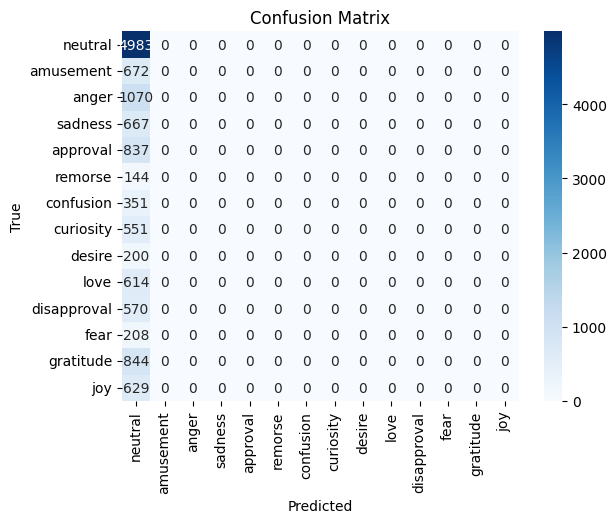

In [ ]:
# plot training curves

import matplotlib.pyplot as plt

# create epoch list
epochs = list(range(1, N_EPOCHS+1))

# plot training and validation loss
plt.figure(figsize=(20, 5))
plt.plot(epochs, train_loss_list, label='train')
plt.plot(epochs, valid_loss_list, label='validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plot training and validation accuracy
plt.figure(figsize=(20, 5))
plt.plot(epochs, train_acc_list, label='train')
plt.plot(epochs, valid_acc_list, label='validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#######
# print out required metrics

import seaborn as sns
modelsgd.load_state_dict(torch.load('sgd-model.pt'))

test_loss, test_acc, test_f1, test_roc_auc, test_report, test_cm = evaluate(modelsgd, test_dataloader, criterion)
print(f'\nTest Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}% | Test F1: {test_f1:.3f} | Test ROC AUC: {test_roc_auc:.3f}\n')
# print(f'Confusion matrix:\n{test_cm}')
print(f'Classification report:\n{test_report}')

# plot confusion matrix
# labels for the plot - same as labels used for label_vocab
labels = OrderedDict([("neutral", 1), ("amusement", 1), ("anger", 1), ("sadness", 1), ("approval", 1), ("remorse", 1), ("confusion", 1), ("curiosity", 1), ("desire", 1), ("love", 1), ("disapproval", 1), ("fear", 1), ("gratitude", 1), ("joy", 1)])
# create the heatmap
sns.heatmap(test_cm, cmap="Blues", annot=True, fmt='g', xticklabels=labels, yticklabels=labels)
# add labels and title
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()



---



---



---

## 3.C. Adagrad

In [ ]:
from torch import optim

modeladagrad = RNN4(pretrained_embeddings, HIDDEN_DIM,  OUTPUT_DIM, N_LAYERS, BIDIRECTIONAL, DROPOUT, PAD_IDX) # recreate a RNN model using the arguments
modeladagrad = modeladagrad.to(DEVICE)

# Set other parameters
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adagrad(modeladagrad.parameters(), lr=1e-3, lr_decay=1e-5, weight_decay=1e-5)

# Use GPU
modeladagrad = modeladagrad.to(DEVICE)
criterion = criterion.to(DEVICE)

######
N_EPOCHS = 25
train_loss_list = []
train_acc_list = []
valid_loss_list = []
valid_acc_list = []

best_valid_loss = float('inf')
print(f"Using {'GPU' if str(DEVICE) == 'cuda' else 'CPU'} for training.")

for epoch in range(N_EPOCHS):
    print(f'Epoch: {epoch+1:02}')
    start_time = time.time()
    
    train_loss, train_acc = train(modeladagrad, train_dataloader, optimizer, criterion)
    train_loss_list.append(train_loss)
    train_acc_list.append(train_acc)
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    
    valid_loss, valid_acc, valid_f1, valid_auc_roc, valid_report, valid_cm  = evaluate(modeladagrad, valid_dataloader, criterion)
    valid_loss_list.append(valid_loss)
    valid_acc_list.append(valid_acc)
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')
    
    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(modeladagrad.state_dict(), 'adagrad-model.pt')


Using GPU for training.
Epoch: 01


	Training: 100%|██████████| 315/315 [00:09<00:00, 32.90it/s]


	Train Loss: 2.167 | Train Acc: 39.27%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 69.33it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 2.116 |  Val. Acc: 39.62%
Epoch: 02


	Training: 100%|██████████| 315/315 [00:08<00:00, 38.03it/s]


	Train Loss: 2.114 | Train Acc: 39.69%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 71.86it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 2.070 |  Val. Acc: 40.70%
Epoch: 03


	Training: 100%|██████████| 315/315 [00:10<00:00, 29.51it/s]


	Train Loss: 2.081 | Train Acc: 40.32%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 88.39it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 2.041 |  Val. Acc: 41.26%
Epoch: 04


	Training: 100%|██████████| 315/315 [00:10<00:00, 31.15it/s]


	Train Loss: 2.055 | Train Acc: 40.70%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 85.62it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 2.016 |  Val. Acc: 41.72%
Epoch: 05


	Training: 100%|██████████| 315/315 [00:09<00:00, 31.80it/s]


	Train Loss: 2.029 | Train Acc: 40.95%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 67.64it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.975 |  Val. Acc: 42.08%
Epoch: 06


	Training: 100%|██████████| 315/315 [00:08<00:00, 38.34it/s]


	Train Loss: 2.018 | Train Acc: 40.93%


	Evaluation: 100%|██████████| 135/135 [00:02<00:00, 50.46it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.958 |  Val. Acc: 42.22%
Epoch: 07


	Training: 100%|██████████| 315/315 [00:09<00:00, 34.43it/s]


	Train Loss: 2.005 | Train Acc: 41.10%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 88.21it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.956 |  Val. Acc: 42.15%
Epoch: 08


	Training: 100%|██████████| 315/315 [00:09<00:00, 31.95it/s]


	Train Loss: 1.994 | Train Acc: 41.22%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 87.50it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.937 |  Val. Acc: 42.29%
Epoch: 09


	Training: 100%|██████████| 315/315 [00:08<00:00, 35.01it/s]


	Train Loss: 1.987 | Train Acc: 41.14%


	Evaluation: 100%|██████████| 135/135 [00:02<00:00, 58.67it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.936 |  Val. Acc: 42.32%
Epoch: 10


	Training: 100%|██████████| 315/315 [00:08<00:00, 37.56it/s]


	Train Loss: 1.980 | Train Acc: 41.31%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 88.29it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.923 |  Val. Acc: 42.34%
Epoch: 11


	Training: 100%|██████████| 315/315 [00:10<00:00, 31.30it/s]


	Train Loss: 1.975 | Train Acc: 41.30%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 86.32it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.926 |  Val. Acc: 42.38%
Epoch: 12


	Training: 100%|██████████| 315/315 [00:12<00:00, 25.05it/s]


	Train Loss: 1.972 | Train Acc: 41.18%


	Evaluation: 100%|██████████| 135/135 [00:03<00:00, 39.77it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.910 |  Val. Acc: 42.42%
Epoch: 13


	Training: 100%|██████████| 315/315 [00:14<00:00, 21.82it/s]


	Train Loss: 1.961 | Train Acc: 41.45%


	Evaluation: 100%|██████████| 135/135 [00:02<00:00, 61.39it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.902 |  Val. Acc: 42.54%
Epoch: 14


	Training: 100%|██████████| 315/315 [00:10<00:00, 30.15it/s]


	Train Loss: 1.955 | Train Acc: 41.45%


	Evaluation: 100%|██████████| 135/135 [00:02<00:00, 51.60it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.897 |  Val. Acc: 42.65%
Epoch: 15


	Training: 100%|██████████| 315/315 [00:12<00:00, 25.78it/s]


	Train Loss: 1.952 | Train Acc: 41.22%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 85.38it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.887 |  Val. Acc: 42.80%
Epoch: 16


	Training: 100%|██████████| 315/315 [00:08<00:00, 36.17it/s]


	Train Loss: 1.949 | Train Acc: 41.40%


	Evaluation: 100%|██████████| 135/135 [00:02<00:00, 57.80it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.884 |  Val. Acc: 42.96%
Epoch: 17


	Training: 100%|██████████| 315/315 [00:08<00:00, 35.73it/s]


	Train Loss: 1.941 | Train Acc: 41.40%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 87.47it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.879 |  Val. Acc: 42.90%
Epoch: 18


	Training: 100%|██████████| 315/315 [00:09<00:00, 31.79it/s]


	Train Loss: 1.931 | Train Acc: 41.71%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 87.34it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.870 |  Val. Acc: 43.20%
Epoch: 19


	Training: 100%|██████████| 315/315 [00:09<00:00, 33.26it/s]


	Train Loss: 1.928 | Train Acc: 41.83%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 71.04it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.870 |  Val. Acc: 43.43%
Epoch: 20


	Training: 100%|██████████| 315/315 [00:08<00:00, 38.30it/s]


	Train Loss: 1.922 | Train Acc: 41.68%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 69.30it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.858 |  Val. Acc: 43.50%
Epoch: 21


	Training: 100%|██████████| 315/315 [00:09<00:00, 33.21it/s]


	Train Loss: 1.920 | Train Acc: 41.74%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 88.30it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.858 |  Val. Acc: 43.65%
Epoch: 22


	Training: 100%|██████████| 315/315 [00:09<00:00, 31.87it/s]


	Train Loss: 1.905 | Train Acc: 42.05%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 86.11it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.848 |  Val. Acc: 43.75%
Epoch: 23


	Training: 100%|██████████| 315/315 [00:08<00:00, 35.27it/s]


	Train Loss: 1.909 | Train Acc: 42.05%


	Evaluation: 100%|██████████| 135/135 [00:02<00:00, 58.96it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.845 |  Val. Acc: 43.92%
Epoch: 24


	Training: 100%|██████████| 315/315 [00:08<00:00, 37.02it/s]


	Train Loss: 1.901 | Train Acc: 42.17%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 86.50it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.834 |  Val. Acc: 44.18%
Epoch: 25


	Training: 100%|██████████| 315/315 [00:09<00:00, 31.50it/s]


	Train Loss: 1.895 | Train Acc: 42.22%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 89.01it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 1.826 |  Val. Acc: 44.23%


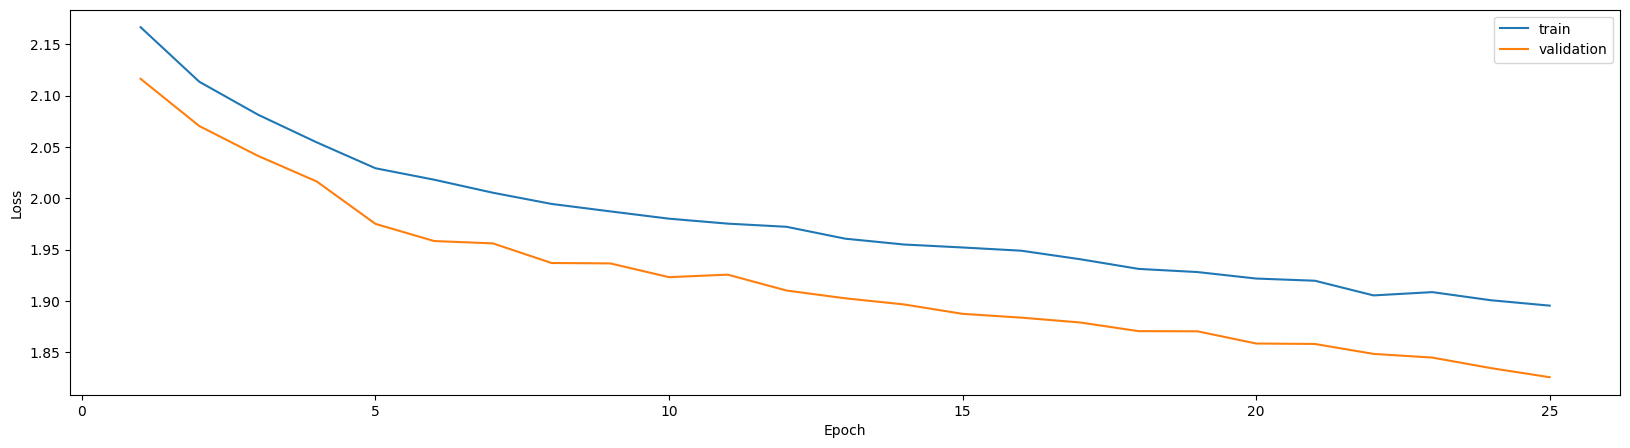

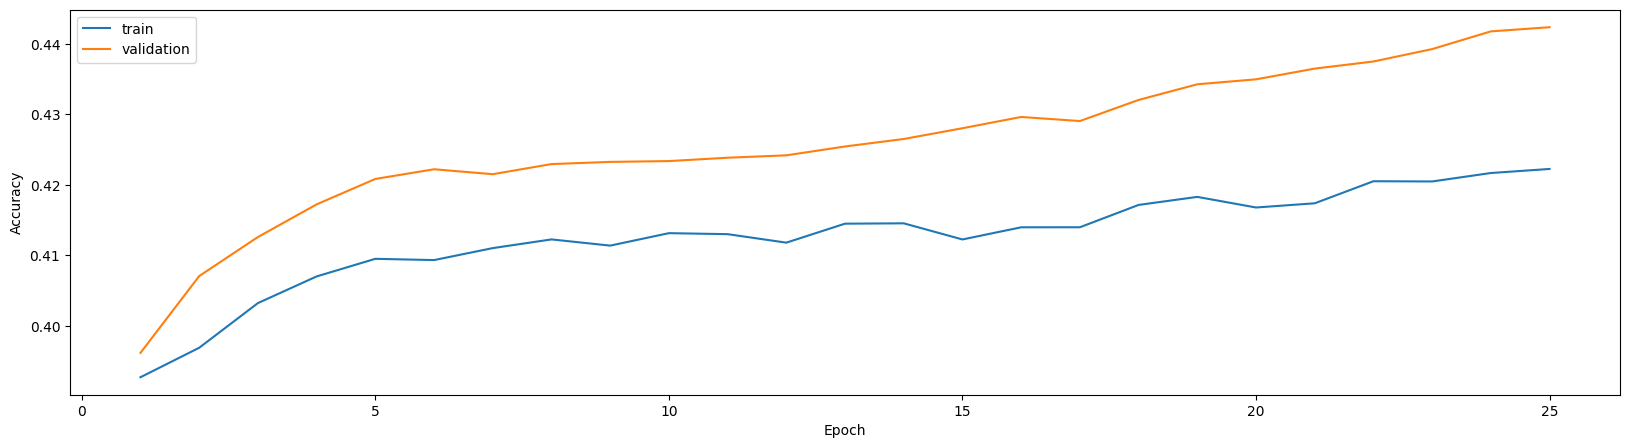

	Evaluation: 100%|██████████| 193/193 [00:02<00:00, 86.02it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Test Loss: 1.799 | Test Acc: 44.48% | Test F1: 0.315 | Test ROC AUC: 0.744

Classification report:
              precision    recall  f1-score   support

           0       0.46      0.92      0.61      4983
           1       0.12      0.00      0.00       672
           2       0.00      0.00      0.00      1070
           3       0.16      0.03      0.05       667
           4       0.00      0.00      0.00       837
           5       0.00      0.00      0.00       144
           6       0.08      0.00      0.01       351
           7       0.35      0.52      0.42       551
           8       0.00      0.00      0.00       200
           9       0.54      0.16      0.25       614
          10       0.00      0.00      0.00       570
          11       0.00      0.00      0.00       208
          12       0.41      0.60      0.49       844
          13       0.06      0.00      0.00       629

    accuracy                           0.44     12340
   macro avg       0.16      0.16 

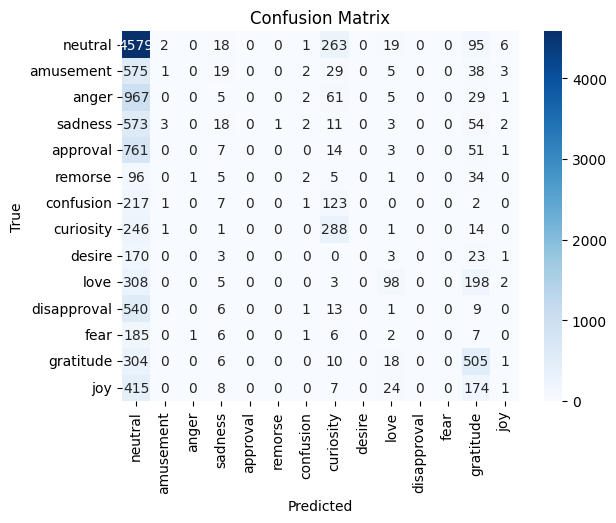

In [ ]:
# plot training curves

import matplotlib.pyplot as plt

# create epoch list
epochs = list(range(1, N_EPOCHS+1))

# plot training and validation loss
plt.figure(figsize=(20, 5))
plt.plot(epochs, train_loss_list, label='train')
plt.plot(epochs, valid_loss_list, label='validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plot training and validation accuracy
plt.figure(figsize=(20, 5))
plt.plot(epochs, train_acc_list, label='train')
plt.plot(epochs, valid_acc_list, label='validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#######
# print out required metrics

import seaborn as sns
modeladagrad.load_state_dict(torch.load('adagrad-model.pt'))

test_loss, test_acc, test_f1, test_roc_auc, test_report, test_cm = evaluate(modeladagrad, test_dataloader, criterion)
print(f'\nTest Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}% | Test F1: {test_f1:.3f} | Test ROC AUC: {test_roc_auc:.3f}\n')
# print(f'Confusion matrix:\n{test_cm}')
print(f'Classification report:\n{test_report}')

# plot confusion matrix
# labels for the plot - same as labels used for label_vocab
labels = OrderedDict([("neutral", 1), ("amusement", 1), ("anger", 1), ("sadness", 1), ("approval", 1), ("remorse", 1), ("confusion", 1), ("curiosity", 1), ("desire", 1), ("love", 1), ("disapproval", 1), ("fear", 1), ("gratitude", 1), ("joy", 1)])
# create the heatmap
sns.heatmap(test_cm, cmap="Blues", annot=True, fmt='g', xticklabels=labels, yticklabels=labels)
# add labels and title
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()



---



---



---

## 3.D. RMSprop

In [ ]:
from torch import optim

modelrmsprop = RNN4(pretrained_embeddings, HIDDEN_DIM,  OUTPUT_DIM, N_LAYERS, BIDIRECTIONAL, DROPOUT, PAD_IDX) # recreate a RNN model using the arguments

# Set other parameters
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.RMSprop(modelrmsprop.parameters(), lr=1e-3, alpha=0.99, eps=1e-8, weight_decay=1e-5, momentum=0.9, centered=False)

# Use GPU
modelrmsprop = modelrmsprop.to(DEVICE)
criterion = criterion.to(DEVICE)

######
N_EPOCHS = 25
train_loss_list = []
train_acc_list = []
valid_loss_list = []
valid_acc_list = []

best_valid_loss = float('inf')
print(f"Using {'GPU' if str(DEVICE) == 'cuda' else 'CPU'} for training.")

for epoch in range(N_EPOCHS):
    print(f'Epoch: {epoch+1:02}')
    start_time = time.time()
    
    train_loss, train_acc = train(modelrmsprop, train_dataloader, optimizer, criterion)
    train_loss_list.append(train_loss)
    train_acc_list.append(train_acc)
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    
    valid_loss, valid_acc, valid_f1, valid_auc_roc, valid_report, valid_cm  = evaluate(modelrmsprop, valid_dataloader, criterion)
    valid_loss_list.append(valid_loss)
    valid_acc_list.append(valid_acc)
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')
    
    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(modelrmsprop.state_dict(), 'rmsprop-model.pt')


Using GPU for training.
Epoch: 01


	Training: 100%|██████████| 315/315 [00:10<00:00, 31.16it/s]


	Train Loss: 2.379 | Train Acc: 36.78%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 87.73it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 2.180 |  Val. Acc: 39.63%
Epoch: 02


	Training: 100%|██████████| 315/315 [00:10<00:00, 31.24it/s]


	Train Loss: 2.249 | Train Acc: 39.23%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 87.86it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 2.172 |  Val. Acc: 39.63%
Epoch: 03


	Training: 100%|██████████| 315/315 [00:08<00:00, 36.41it/s]


	Train Loss: 2.224 | Train Acc: 39.28%


	Evaluation: 100%|██████████| 135/135 [00:02<00:00, 57.75it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 2.162 |  Val. Acc: 39.62%
Epoch: 04


	Training: 100%|██████████| 315/315 [00:09<00:00, 34.17it/s]


	Train Loss: 2.192 | Train Acc: 39.40%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 87.53it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 2.175 |  Val. Acc: 39.63%
Epoch: 05


	Training: 100%|██████████| 315/315 [00:10<00:00, 30.85it/s]


	Train Loss: 2.179 | Train Acc: 39.42%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 87.80it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 2.155 |  Val. Acc: 39.63%
Epoch: 06


	Training: 100%|██████████| 315/315 [00:09<00:00, 31.50it/s]


	Train Loss: 2.170 | Train Acc: 39.37%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 75.86it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 2.154 |  Val. Acc: 39.63%
Epoch: 07


	Training: 100%|██████████| 315/315 [00:08<00:00, 36.98it/s]


	Train Loss: 2.173 | Train Acc: 39.37%


	Evaluation: 100%|██████████| 135/135 [00:02<00:00, 61.54it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 2.146 |  Val. Acc: 39.63%
Epoch: 08


	Training: 100%|██████████| 315/315 [00:09<00:00, 33.42it/s]


	Train Loss: 2.165 | Train Acc: 39.43%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 87.31it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 2.146 |  Val. Acc: 39.63%
Epoch: 09


	Training: 100%|██████████| 315/315 [00:10<00:00, 31.04it/s]


	Train Loss: 2.167 | Train Acc: 39.41%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 88.98it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 2.147 |  Val. Acc: 39.63%
Epoch: 10


	Training: 100%|██████████| 315/315 [00:09<00:00, 32.89it/s]


	Train Loss: 2.168 | Train Acc: 39.42%


	Evaluation: 100%|██████████| 135/135 [00:02<00:00, 65.50it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 2.147 |  Val. Acc: 39.63%
Epoch: 11


	Training: 100%|██████████| 315/315 [00:08<00:00, 37.46it/s]


	Train Loss: 2.166 | Train Acc: 39.43%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 72.92it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 2.147 |  Val. Acc: 39.63%
Epoch: 12


	Training: 100%|██████████| 315/315 [00:09<00:00, 32.48it/s]


	Train Loss: 2.164 | Train Acc: 39.43%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 88.29it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 2.146 |  Val. Acc: 39.63%
Epoch: 13


	Training: 100%|██████████| 315/315 [00:10<00:00, 31.24it/s]


	Train Loss: 2.164 | Train Acc: 39.43%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 88.34it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 2.148 |  Val. Acc: 39.63%
Epoch: 14


	Training: 100%|██████████| 315/315 [00:09<00:00, 34.39it/s]


	Train Loss: 2.163 | Train Acc: 39.43%


	Evaluation: 100%|██████████| 135/135 [00:02<00:00, 59.63it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 2.147 |  Val. Acc: 39.63%
Epoch: 15


	Training: 100%|██████████| 315/315 [00:08<00:00, 37.07it/s]


	Train Loss: 2.161 | Train Acc: 39.44%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 89.86it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 2.151 |  Val. Acc: 39.63%
Epoch: 16


	Training: 100%|██████████| 315/315 [00:10<00:00, 31.34it/s]


	Train Loss: 2.162 | Train Acc: 39.37%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 88.55it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 2.146 |  Val. Acc: 39.63%
Epoch: 17


	Training: 100%|██████████| 315/315 [00:09<00:00, 31.61it/s]


	Train Loss: 2.160 | Train Acc: 39.43%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 89.94it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 2.146 |  Val. Acc: 39.63%
Epoch: 18


	Training: 100%|██████████| 315/315 [00:08<00:00, 36.31it/s]


	Train Loss: 2.165 | Train Acc: 39.42%


	Evaluation: 100%|██████████| 135/135 [00:02<00:00, 61.28it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 2.151 |  Val. Acc: 39.63%
Epoch: 19


	Training: 100%|██████████| 315/315 [00:08<00:00, 35.25it/s]


	Train Loss: 2.167 | Train Acc: 39.42%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 87.26it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 2.146 |  Val. Acc: 39.63%
Epoch: 20


	Training: 100%|██████████| 315/315 [00:09<00:00, 31.72it/s]


	Train Loss: 2.163 | Train Acc: 39.43%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 87.82it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 2.146 |  Val. Acc: 39.63%
Epoch: 21


	Training: 100%|██████████| 315/315 [00:09<00:00, 32.49it/s]


	Train Loss: 2.163 | Train Acc: 39.41%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 78.69it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 2.147 |  Val. Acc: 39.63%
Epoch: 22


	Training: 100%|██████████| 315/315 [00:08<00:00, 37.35it/s]


	Train Loss: 2.163 | Train Acc: 39.39%


	Evaluation: 100%|██████████| 135/135 [00:02<00:00, 63.80it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 2.146 |  Val. Acc: 39.63%
Epoch: 23


	Training: 100%|██████████| 315/315 [00:09<00:00, 33.89it/s]


	Train Loss: 2.165 | Train Acc: 39.43%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 87.84it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 2.147 |  Val. Acc: 39.63%
Epoch: 24


	Training: 100%|██████████| 315/315 [00:09<00:00, 31.58it/s]


	Train Loss: 2.165 | Train Acc: 39.42%


	Evaluation: 100%|██████████| 135/135 [00:01<00:00, 85.96it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	 Val. Loss: 2.149 |  Val. Acc: 39.63%
Epoch: 25


	Training: 100%|██████████| 315/315 [00:09<00:00, 32.75it/s]


	Train Loss: 2.163 | Train Acc: 39.41%


	Evaluation: 100%|██████████| 135/135 [00:02<00:00, 63.04it/s]


	 Val. Loss: 2.148 |  Val. Acc: 39.62%


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


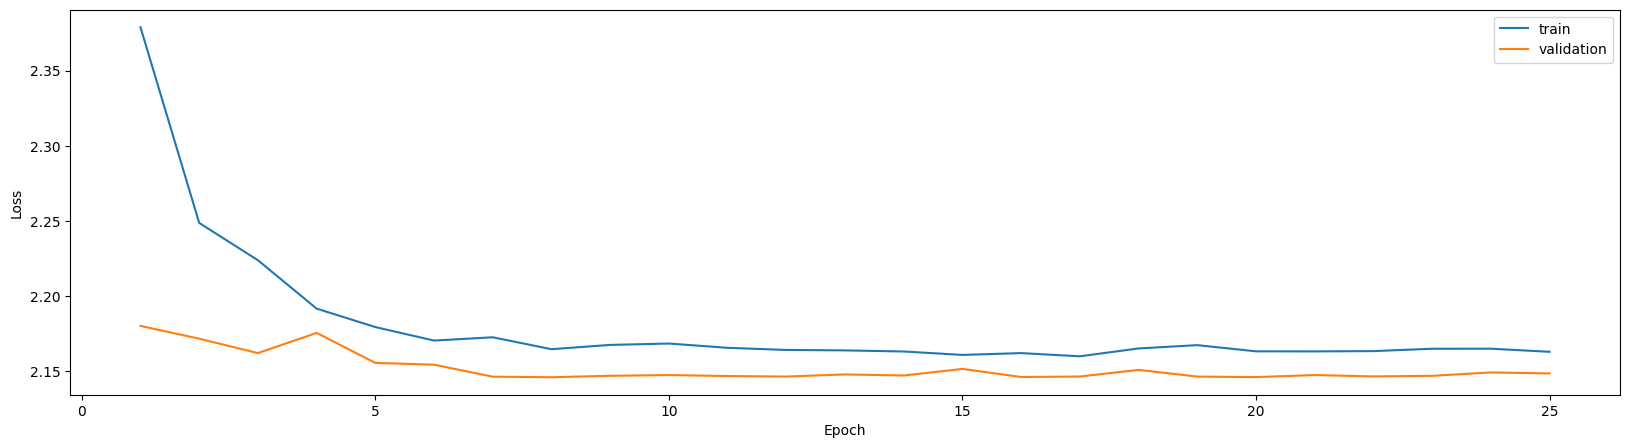

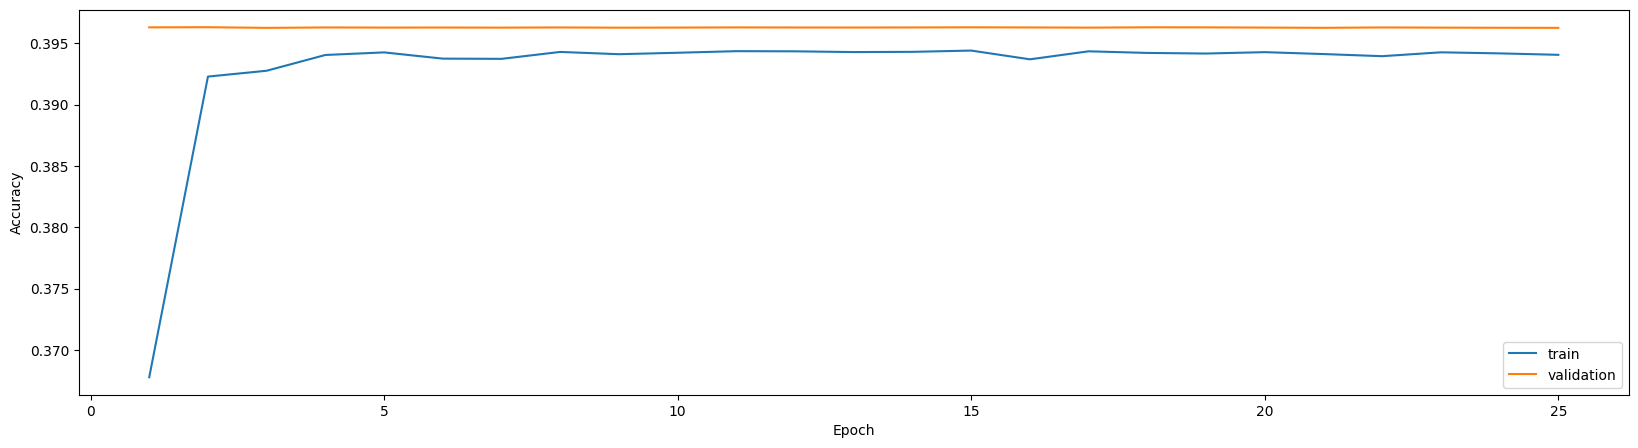

	Evaluation: 100%|██████████| 193/193 [00:02<00:00, 86.54it/s]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Test Loss: 2.133 | Test Acc: 40.37% | Test F1: 0.232 | Test ROC AUC: 0.518

Classification report:
              precision    recall  f1-score   support

           0       0.40      1.00      0.58      4983
           1       0.00      0.00      0.00       672
           2       0.00      0.00      0.00      1070
           3       0.00      0.00      0.00       667
           4       0.00      0.00      0.00       837
           5       0.00      0.00      0.00       144
           6       0.00      0.00      0.00       351
           7       0.00      0.00      0.00       551
           8       0.00      0.00      0.00       200
           9       0.00      0.00      0.00       614
          10       0.00      0.00      0.00       570
          11       0.00      0.00      0.00       208
          12       0.00      0.00      0.00       844
          13       0.00      0.00      0.00       629

    accuracy                           0.40     12340
   macro avg       0.03      0.07 

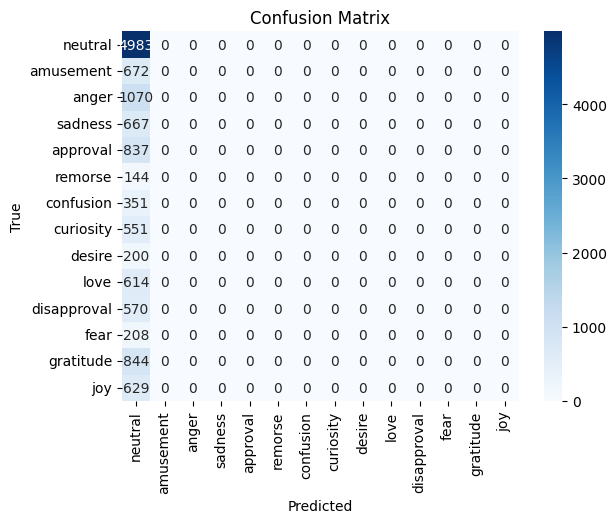

In [ ]:
# plot training curves

import matplotlib.pyplot as plt

# create epoch list
epochs = list(range(1, N_EPOCHS+1))

# plot training and validation loss
plt.figure(figsize=(20, 5))
plt.plot(epochs, train_loss_list, label='train')
plt.plot(epochs, valid_loss_list, label='validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plot training and validation accuracy
plt.figure(figsize=(20, 5))
plt.plot(epochs, train_acc_list, label='train')
plt.plot(epochs, valid_acc_list, label='validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#######
# print out required metrics

import seaborn as sns
modelrmsprop.load_state_dict(torch.load('rmsprop-model.pt'))

test_loss, test_acc, test_f1, test_roc_auc, test_report, test_cm = evaluate(modelrmsprop, test_dataloader, criterion)
print(f'\nTest Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}% | Test F1: {test_f1:.3f} | Test ROC AUC: {test_roc_auc:.3f}\n')
# print(f'Confusion matrix:\n{test_cm}')
print(f'Classification report:\n{test_report}')

# plot confusion matrix
# labels for the plot - same as labels used for label_vocab
labels = OrderedDict([("neutral", 1), ("amusement", 1), ("anger", 1), ("sadness", 1), ("approval", 1), ("remorse", 1), ("confusion", 1), ("curiosity", 1), ("desire", 1), ("love", 1), ("disapproval", 1), ("fear", 1), ("gratitude", 1), ("joy", 1)])
# create the heatmap
sns.heatmap(test_cm, cmap="Blues", annot=True, fmt='g', xticklabels=labels, yticklabels=labels)
# add labels and title
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()



---



---



---

## Results

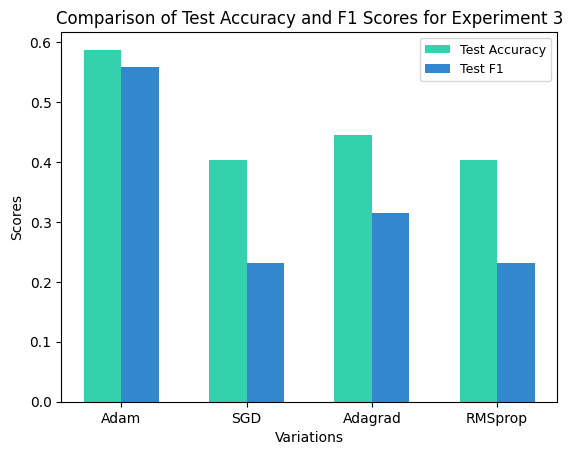

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

variations = ['Adam', 'SGD', 'Adagrad', 'RMSprop']
test_accuracy_list = [0.5873, 0.4036, 0.4448, 0.4037]
test_f1_list = [0.558, 0.232, 0.315, 0.232]

fig, ax = plt.subplots()

# Create x-axis values so it can be used for any number of variations
x_values = np.arange(len(variations))

# Plot the bar charts
rects1 = ax.bar(x_values, test_accuracy_list, 0.3, alpha=0.8, color='#00c698', label='Test Accuracy')
rects2 = ax.bar(x_values + 0.3, test_f1_list, 0.3, alpha=0.8, color='#0069c0', label='Test F1')

# Add labels and titles
ax.set_xlabel('Variations')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Test Accuracy and F1 Scores for Experiment 3')
ax.set_xticks(x_values + 0.3 / 2)
ax.set_xticklabels(variations)
ax.legend(fontsize=9)

# Show the plot
plt.show()




---
---
---



# 6.&nbsp;GoEmotions Experiment 4: Testing different language models for fine-tuning


In this notebook, instead of building models from scratch we test different pre-trained models for fine-tuning

### Set up steps for notebook
---
Required packages and dependencies are installed with compatible versions and the notebook is set up to use GPU when available.

---

In [ ]:
# Install required packages
!pip install datasets
!pip install evaluate
!pip install transformers

# Install dependencies
%pip install torch==1.11.0+cu113 torchdata==0.3.0 torchtext==0.12.0 -f https://download.pytorch.org/whl/cu113/torch_stable.html
%pip install spacy tqdm
!python -m spacy download en_core_web_sm

# Initialise torch and use GPU
import torch
import torchtext

SEED = 1234
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

print("PyTorch Version: ", torch.__version__)
print("torchtext Version: ", torchtext.__version__)
print(f"Using {'GPU' if str(DEVICE) == 'cuda' else 'CPU'}.")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/cu113/torch_stable.html
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
2023-04-23 12:47:40.399847: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-23 12:47:42.046094: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find Ten

Use this cell to mount your Google Drive on the notebook. Some files in the zip folder are used to reduce repeating of some setup steps.

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).




---



---



---





---


### Data Preprocessing

Getting our data ready to be used by pre-trained models and their tokenizers


---



In [ ]:
from datasets import load_dataset
import pandas as pd

# load the GoEmotions dataset
goemotions_dataset = load_dataset('go_emotions')

# get the train, validation, and test splits as Pandas dataframes
train_df = goemotions_dataset['train'].to_pandas()
val_df = goemotions_dataset['validation'].to_pandas()
test_df = goemotions_dataset['test'].to_pandas()

# concatenate the splits into a single dataframe
df = pd.concat([train_df, val_df, test_df], ignore_index=True)

# duplicate the records with multiple labels
df = df.explode('labels')

# reset the index of the dataframe
df = df.reset_index(drop=True)

# print the first five rows of the resulting dataframe
print(df.head())


  0%|          | 0/3 [00:00<?, ?it/s]

                                                text labels       id
0  My favourite food is anything I didn't have to...     27  eebbqej
1  Now if he does off himself, everyone will thin...     27  ed00q6i
2                     WHY THE FUCK IS BAYLESS ISOING      2  eezlygj
3                        To make her feel threatened     14  ed7ypvh
4                             Dirty Southern Wankers      3  ed0bdzj


In [ ]:
### MERGING EMOTION LABELS FROM GROUP DECISIONS ###

for i, row in df.iterrows():
  # Converting Annoyance [3] into Anger [2]
  if row['labels']==3:
    row['labels']=2
  # Disappointment [9] and Grief [16] into Sadness [25]
  if row['labels']==9 or row['labels']==16:
    row['labels']=25
  # Converting Nervousness [19] into Fear [14]
  if row['labels']==19:
    row['labels']=14
  # Converting Excitement [13] into Joy [17]
  if row['labels']==13:
    row['labels']=17

#keeps just one of the records where there are labelled with both merged classes
df = df.drop_duplicates(keep = 'first')
drop_labels = (3,11,12,9,16,19,22,26,21,13,0,23,20,5)
#drops labels we are not using
df_cut = df[~df.labels.isin(drop_labels)] 
#deletes duplicates
df_cut = df_cut.drop_duplicates(subset = ['text'], keep = False)
df_cut = df_cut.reset_index(drop = True)

### REORDERING SO THAT LABELS ARE 0-13 ###
for i, row in df_cut.iterrows():
    # Converting Neutral [27] to Neutral [0]
    if row['labels']==27:
        row['labels']=0
    # Converting Sadness [25] to Sadness [3]
    if row['labels']==25:
        row['labels']=3
    # Converting Remorse [24] to Remorse [5]
    if row['labels']==24:
        row['labels']=5
    # Converting Love [18] to Love [9]
    if row['labels']==18:
        row['labels']=9
    # Converting Fear [14] to Fear [11]
    if row['labels']==14:
        row['labels']=11
    # Converting Gratitude [15] to Gratitude [12]
    if row['labels']==15:
        row['labels']=12
    # Converting Joy [17] to Joy [13]
    if row['labels']==17:
        row['labels']=13

df = df_cut
# reset the index of the dataframe
df = df.reset_index(drop=True)
#rearrange columns
columns_titles = ["labels","text"]
df=df.reindex(columns=columns_titles)

df.head()

labels                                               text
0      0  My favourite food is anything I didn't have to...
1      0  Now if he does off himself, everyone will thin...
2      2                     WHY THE FUCK IS BAYLESS ISOING
3     11                        To make her feel threatened
4      2                             Dirty Southern Wankers

In [ ]:
# converting dataframe to dataset type
from datasets import Dataset
dataset = Dataset.from_pandas(df)

### Other common steps

In [ ]:
# define a function to get validation accuracy while training
import numpy as np
import evaluate

metric = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

# set training arguments
from transformers import TrainingArguments, Trainer
training_args = TrainingArguments(output_dir="test_trainer", evaluation_strategy="epoch", num_train_epochs=5.0)

The below cells are only used for saving and loading the models in case of a crash or runtime disconnection.

In [ ]:
# model_to_save = trainer.model.module if hasattr(trainer.model, 'module') else trainer.model  # Take care of distributed/parallel training
# model_to_save.save_pretrained('/content/drive/MyDrive/Colab Notebooks/NLP CW')

In [ ]:
# from transformers import AutoModelForSequenceClassification

# model = AutoModelForSequenceClassification.from_pretrained('/content/drive/MyDrive/Colab Notebooks/bert-base')



---



---



---

## 4.A. bert-base-cased

In [ ]:
# tokenize the data
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")


def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True)


tokenized_dataset = dataset.map(tokenize_function, batched=True)

# split the data - using only 2000 instances for training due to the time and resources taken
from torch.utils.data import random_split

# split dataset into train and test sets
train_samples = 4000
test_samples = len(tokenized_dataset) - train_samples
train_data, test_data = random_split(tokenized_dataset, [train_samples, test_samples])

# split train subset into train and validation sets
train_samples = 2000
valid_samples = 2000
train_data, valid_data = random_split(train_data, [train_samples, valid_samples])

print(f'Number of training examples: {len(train_data)}')
print(f'Number of validation examples: {len(valid_data)}')
print(f'Number of testing examples: {len(test_data)}')


Map:   0%|          | 0/41131 [00:00<?, ? examples/s]

Number of training examples: 2000
Number of validation examples: 2000
Number of testing examples: 37131


In [ ]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained("bert-base-cased", num_labels=14)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_data,
    eval_dataset=valid_data,
    compute_metrics=compute_metrics,
)

trainer.train()

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

TrainOutput(global_step=1250, training_loss=0.8629151977539062, metrics={'train_runtime': 1278.0494, 'train_samples_per_second': 7.824, 'train_steps_per_second': 0.978, 'total_flos': 2631394037760000.0, 'train_loss': 0.8629151977539062, 'epoch': 5.0})

In [ ]:
# model_to_save = trainer.model.module if hasattr(trainer.model, 'module') else trainer.model  # Take care of distributed/parallel training
# model_to_save.save_pretrained('/content/drive/MyDrive/Colab Notebooks/bert-base')

In [ ]:
small_test_data = torch.utils.data.Subset(test_data, range(5000))

Test Acc: 61.80% | Test F1: 0.619

Classification report:
              precision    recall  f1-score   support

           0       0.70      0.67      0.69      1982
           1       0.80      0.71      0.75       286
           2       0.49      0.51      0.50       416
           3       0.50      0.45      0.47       282
           4       0.36      0.42      0.39       335
           5       0.57      0.77      0.66        61
           6       0.35      0.24      0.29       137
           7       0.44      0.67      0.53       212
           8       0.59      0.49      0.54        75
           9       0.75      0.84      0.79       255
          10       0.38      0.40      0.39       267
          11       0.64      0.52      0.58        90
          12       0.90      0.89      0.90       346
          13       0.62      0.53      0.57       256

    accuracy                           0.62      5000
   macro avg       0.58      0.58      0.57      5000
weighted avg       0.6

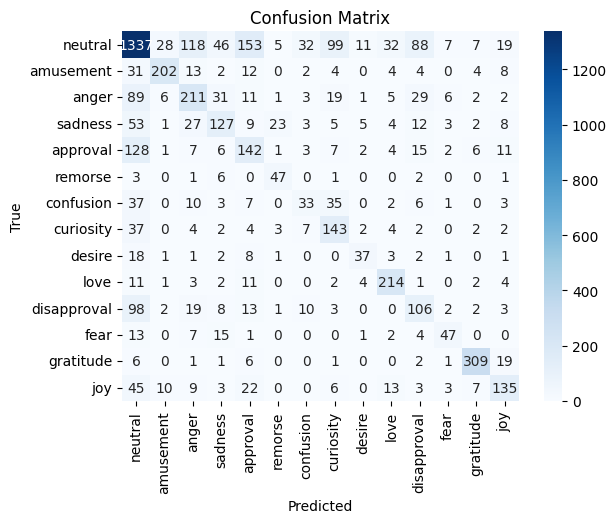

In [ ]:
## EVALUATE ON TEST DATA
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
import matplotlib.pyplot as plt
from collections import OrderedDict
import seaborn as sns

# get predictions from test dataset
predictions = trainer.predict(test_dataset=small_test_data)

# get predicted labels and true labels
pred_labels = np.argmax(predictions.predictions, axis=1)
true_labels = predictions.label_ids


# calculate required metrics and reports
test_acc = accuracy_score(true_labels, pred_labels)
test_f1 = f1_score(true_labels, pred_labels, average='weighted')
test_cm = confusion_matrix(true_labels, pred_labels)
test_report = classification_report(true_labels, pred_labels)

# print metrics
print(f'Test Acc: {test_acc*100:.2f}% | Test F1: {test_f1:.3f}')
print(f'\nClassification report:\n{test_report}')

# plot confusion matrix
# labels for the plot - same as labels used for label_vocab
labels = OrderedDict([("neutral", 1), ("amusement", 1), ("anger", 1), ("sadness", 1), ("approval", 1), ("remorse", 1), ("confusion", 1), ("curiosity", 1), ("desire", 1), ("love", 1), ("disapproval", 1), ("fear", 1), ("gratitude", 1), ("joy", 1)])
# create the heatmap
sns.heatmap(test_cm, cmap="Blues", annot=True, fmt='g', xticklabels=labels, yticklabels=labels)
# add labels and title
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()



---



---



---

## 4.B. EmoRoBERTa

In [ ]:
# tokenize the data
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("arpanghoshal/EmoRoBERTa")

def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True)


tokenized_dataset = dataset.map(tokenize_function, batched=True)

# split the data - using only 2000 instances for training due to the time and resources taken
from torch.utils.data import random_split

# split dataset into train and test sets
train_samples = 4000
test_samples = len(tokenized_dataset) - train_samples
train_data, test_data = random_split(tokenized_dataset, [train_samples, test_samples])

# split train subset into train and validation sets
train_samples = 2000
valid_samples = 2000
train_data, valid_data = random_split(train_data, [train_samples, valid_samples])

print(f'Number of training examples: {len(train_data)}')
print(f'Number of validation examples: {len(valid_data)}')
print(f'Number of testing examples: {len(test_data)}')


Map:   0%|          | 0/41131 [00:00<?, ? examples/s]

Number of training examples: 2000
Number of validation examples: 2000
Number of testing examples: 37131


In [ ]:
from transformers import AutoModelForSequenceClassification

# define the model
model = AutoModelForSequenceClassification.from_pretrained("arpanghoshal/EmoRoBERTa", from_tf=True)

# training
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_data,
    eval_dataset=valid_data,
    compute_metrics=compute_metrics,
)

trainer.train()

All TF 2.0 model weights were used when initializing RobertaForSequenceClassification.

All the weights of RobertaForSequenceClassification were initialized from the TF 2.0 model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use RobertaForSequenceClassification for predictions without further training.
/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


TrainOutput(global_step=1250, training_loss=0.3393719425201416, metrics={'train_runtime': 1232.9584, 'train_samples_per_second': 8.111, 'train_steps_per_second': 1.014, 'total_flos': 2631724769280000.0, 'train_loss': 0.3393719425201416, 'epoch': 5.0})

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Acc: 83.22% | Test F1: 0.834

Classification report:
              precision    recall  f1-score   support

           0       0.91      0.84      0.87      2030
           1       0.86      0.95      0.90       258
           2       0.83      0.81      0.82       459
           3       0.70      0.78      0.74       258
           4       0.72      0.75      0.74       353
           5       0.70      0.81      0.75        67
           6       0.65      0.68      0.66       107
           7       0.74      0.79      0.77       248
           8       0.70      0.83      0.75        69
           9       0.81      0.91      0.86       243
          10       0.79      0.77      0.78       243
          11       0.76      0.85      0.80        80
          12       0.94      0.93      0.94       341
          13       0.78      0.79      0.79       244
          22       0.00      0.00      0.00         0
          26       0.00      0.00      0.00         0

    accuracy          

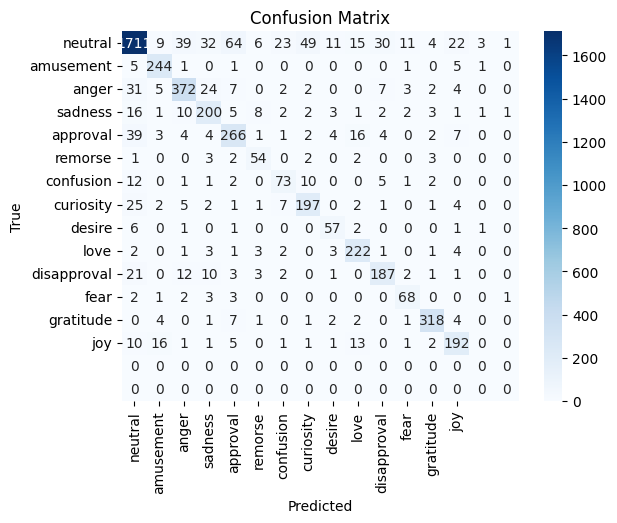

In [ ]:
## EVALUATE ON TEST DATA
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
import matplotlib.pyplot as plt
from collections import OrderedDict
import seaborn as sns

# get predictions from test dataset
predictions = trainer.predict(test_dataset=small_test_data)

# get predicted labels and true labels
pred_labels = np.argmax(predictions.predictions, axis=1)
true_labels = predictions.label_ids

# calculate required metrics and reports
test_acc = accuracy_score(true_labels, pred_labels)
test_f1 = f1_score(true_labels, pred_labels, average='weighted')
test_cm = confusion_matrix(true_labels, pred_labels)
test_report = classification_report(true_labels, pred_labels)

# print metrics
print(f'Test Acc: {test_acc*100:.2f}% | Test F1: {test_f1:.3f}')
print(f'\nClassification report:\n{test_report}')

# plot confusion matrix
# labels for the plot - same as labels used for label_vocab
labels = OrderedDict([("neutral", 1), ("amusement", 1), ("anger", 1), ("sadness", 1), ("approval", 1), ("remorse", 1), ("confusion", 1), ("curiosity", 1), ("desire", 1), ("love", 1), ("disapproval", 1), ("fear", 1), ("gratitude", 1), ("joy", 1)])
# create the heatmap
sns.heatmap(test_cm, cmap="Blues", annot=True, fmt='g', xticklabels=labels, yticklabels=labels)
# add labels and title
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()



---



---



---

## 4.C. all-MiniLM-L6-v2

In [ ]:
# tokenize the data
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("sentence-transformers/all-MiniLM-L6-v2")


def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True)


tokenized_dataset = dataset.map(tokenize_function, batched=True)

# split the data - using only 2000 instances for training due to the time and resources taken
from torch.utils.data import random_split

# split dataset into train and test sets
train_samples = 4000
test_samples = len(tokenized_dataset) - train_samples
train_data, test_data = random_split(tokenized_dataset, [train_samples, test_samples])

# split train subset into train and validation sets
train_samples = 2000
valid_samples = 2000
train_data, valid_data = random_split(train_data, [train_samples, valid_samples])

print(f'Number of training examples: {len(train_data)}')
print(f'Number of validation examples: {len(valid_data)}')
print(f'Number of testing examples: {len(test_data)}')


Map:   0%|          | 0/41131 [00:00<?, ? examples/s]

Number of training examples: 2000
Number of validation examples: 2000
Number of testing examples: 37131


In [ ]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained("sentence-transformers/all-MiniLM-L6-v2", num_labels=14)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_data,
    eval_dataset=valid_data,
    compute_metrics=compute_metrics,
)

trainer.train()

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at sentence-transformers/all-MiniLM-L6-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


TrainOutput(global_step=1250, training_loss=1.50099365234375, metrics={'train_runtime': 308.4784, 'train_samples_per_second': 32.417, 'train_steps_per_second': 4.052, 'total_flos': 331800023040000.0, 'train_loss': 1.50099365234375, 'epoch': 5.0})

In [ ]:
# model_to_save = trainer.model.module if hasattr(trainer.model, 'module') else trainer.model  # Take care of distributed/parallel training
# model_to_save.save_pretrained('/content/drive/MyDrive/Colab Notebooks/all-MiniLM-L6-v2')

In [ ]:
small_test_data = torch.utils.data.Subset(test_data, range(5000))

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Acc: 53.02% | Test F1: 0.487

Classification report:
              precision    recall  f1-score   support

           0       0.64      0.74      0.68      2007
           1       0.68      0.86      0.76       281
           2       0.27      0.63      0.37       445
           3       0.25      0.13      0.17       292
           4       0.30      0.08      0.12       369
           5       0.50      0.37      0.43        67
           6       0.00      0.00      0.00       134
           7       0.32      0.09      0.14       233
           8       0.55      0.30      0.39        77
           9       0.52      0.74      0.61       222
          10       0.15      0.02      0.04       238
          11       0.00      0.00      0.00        87
          12       0.89      0.88      0.88       325
          13       0.30      0.28      0.29       223

    accuracy                           0.53      5000
   macro avg       0.38      0.37      0.35      5000
weighted avg       0.4

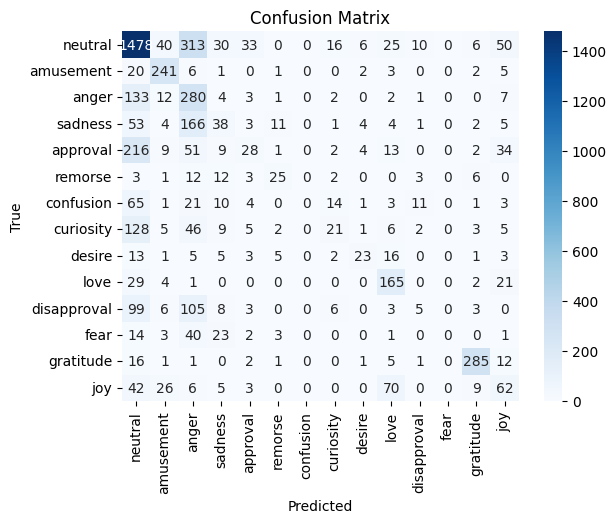

In [ ]:
## EVALUATE ON TEST DATA
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
import matplotlib.pyplot as plt
from collections import OrderedDict
import seaborn as sns

# get predictions from test dataset
predictions = trainer.predict(test_dataset=small_test_data)

# get predicted labels and true labels
pred_labels = np.argmax(predictions.predictions, axis=1)
true_labels = predictions.label_ids


# calculate required metrics and reports
test_acc = accuracy_score(true_labels, pred_labels)
test_f1 = f1_score(true_labels, pred_labels, average='weighted')
test_cm = confusion_matrix(true_labels, pred_labels)
test_report = classification_report(true_labels, pred_labels)

# print metrics
print(f'Test Acc: {test_acc*100:.2f}% | Test F1: {test_f1:.3f}')
print(f'\nClassification report:\n{test_report}')

# plot confusion matrix
# labels for the plot - same as labels used for label_vocab
labels = OrderedDict([("neutral", 1), ("amusement", 1), ("anger", 1), ("sadness", 1), ("approval", 1), ("remorse", 1), ("confusion", 1), ("curiosity", 1), ("desire", 1), ("love", 1), ("disapproval", 1), ("fear", 1), ("gratitude", 1), ("joy", 1)])
# create the heatmap
sns.heatmap(test_cm, cmap="Blues", annot=True, fmt='g', xticklabels=labels, yticklabels=labels)
# add labels and title
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()



---



---



---

## Results

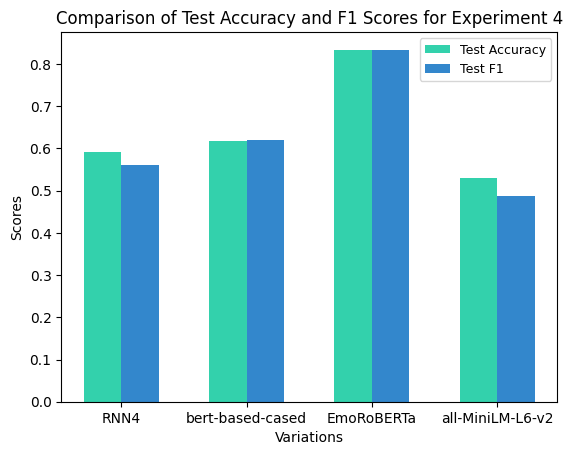

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

variations = ['RNN4', 'bert-based-cased', 'EmoRoBERTa', 'all-MiniLM-L6-v2']
test_accuracy_list = [0.5907, 0.6180, 0.8322, 0.5302]
test_f1_list = [0.56, 0.619, 0.834, 0.487]

fig, ax = plt.subplots()

# Create x-axis values so it can be used for any number of variations
x_values = np.arange(len(variations))

# Plot the bar charts
rects1 = ax.bar(x_values, test_accuracy_list, 0.3, alpha=0.8, color='#00c698', label='Test Accuracy')
rects2 = ax.bar(x_values + 0.3, test_f1_list, 0.3, alpha=0.8, color='#0069c0', label='Test F1')

# Add labels and titles
ax.set_xlabel('Variations')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Test Accuracy and F1 Scores for Experiment 4')
ax.set_xticks(x_values + 0.3 / 2)
ax.set_xticklabels(variations)
ax.legend(fontsize=9)

# Show the plot
plt.show()




---
---
---

